# Hyperparameter Optimization

Hyperparameters dictate the parameters of the training process and the architecture of the model itself. For example, the number of random trees is a hyperparameter for a random forest. In contrast, a learned parameter for a random forest is the set of features that is contained in a single node (in a single tree) and the cutoff values for each of those features that determines how the data is split at that node. A full discussion of hyperparameter optimization can be found on wikipedia.

The choice for hyperparameters strongly influence model performance, so it is important to be able to optimize them as well. AMPL offers a variety of hyperparameter optimization methods including random sampling, grid search, and Bayesian optimization. Further information for AMPL's Bayesian optimization can be found here.

# Random Forest Hyperparameter Optimization

## Scaffold Split

In [1]:
import os
os.getcwd()

'/home/jupyter/hERG_Analysis'

In [4]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

import os

dataset_key= '/home/jupyter/hERG_Analysis/herg_chembl_curated.csv'
descriptor_type = 'rdkit_raw'
model_dir = '/Models'
best_model_dir = 'Models/best_models'
split_uuid = "5f834022-46ac-4c7b-bca1-9573f6eb940f" #scaffold


if not os.path.exists(f'./{best_model_dir}'):
    os.mkdir(f'./{best_model_dir}')
    
if not os.path.exists(f'./{model_dir}'):
    os.mkdir(f'./{model_dir}')

### Computed Descriptors Featurizer

In [7]:
params = {
    "hyperparam": "True",
    "prediction_type": "classification",

    "dataset_key": dataset_key,
    "id_col": "compound_id",
    "smiles_col": "rdkit_smiles",
    "response_cols": "class",

    "splitter":"scaffold",
    "split_uuid": split_uuid,
    "previously_split": "True",

    "featurizer": "computed_descriptors",
    "descriptor_type" : descriptor_type,
    "transformers": "True",

    "search_type": "hyperopt",
    "model_type": "RF|10",
    "rfe": "uniformint|8,512",
    "rfd": "uniformint|6,32",
    "rff": "uniformint|8,200",

    "result_dir": f"./{best_model_dir},./{model_dir}"
}

In [8]:
import atomsci.ddm.utils.hyperparam_search_wrapper as hsw
import importlib
importlib.reload(hsw)
ampl_param = hsw.parse_params(params)
hs = hsw.build_search(ampl_param)
hs.run_search()

2024-04-19 13:27:18.771255: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-19 13:27:18.859608: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-19 13:27:18.859674: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-19 13:27:18.859780: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-19 13:27:18.889220: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-19 13:27:18.890498: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

model_performance|train_roc_auc|train_acc|valid_roc_auc|valid_acc|test_roc_auc|test_acc|model_params|model

rf_estimators: 364, rf_max_depth: 31, rf_max_feature: 24
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

2024-04-19 13:27:30,809 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.
RF model with computed_descriptors and rdkit_raw      
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

2024-04-19 13:27:31,361 Previous dataset split restored
/home/jupyter/AMPL/atomsci/ddm/pipeline/transformations.py:250: RuntimeWarning: invalid value encountered in divide
  X = np.nan_to_num((X - self.X_means) * X_weight / self.X_stds)



model_performance|1.000|0.993|0.786|0.718|0.804|0.737|364_31_24|.//Models/herg_chembl_curated_model_58ef1d3a-b80a-42e2-acc7-69561959599d.tar.gz

rf_estimators: 213, rf_max_depth: 17, rf_max_feature: 14                       
 10%|█         | 1/10 [00:08<01:19,  8.82s/trial, best loss: 99.21418993543476]

2024-04-19 13:27:39,599 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.                        
RF model with computed_descriptors and rdkit_raw                               
 10%|█         | 1/10 [00:08<01:19,  8.82s/trial, best loss: 99.21418993543476]

2024-04-19 13:27:40,062 Previous dataset split restored
/home/jupyter/AMPL/atomsci/ddm/pipeline/transformations.py:250: RuntimeWarning: invalid value encountered in divide
  X = np.nan_to_num((X - self.X_means) * X_weight / self.X_stds)



model_performance|1.000|0.992|0.784|0.713|0.793|0.734|213_17_14|.//Models/herg_chembl_curated_model_2a1c974c-6760-47b9-9579-2bd4635600bf.tar.gz

rf_estimators: 111, rf_max_depth: 9, rf_max_feature: 139                       
 20%|██        | 2/10 [00:12<00:48,  6.03s/trial, best loss: 99.21418993543476]

2024-04-19 13:27:43,678 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.                        
RF model with computed_descriptors and rdkit_raw                               
 20%|██        | 2/10 [00:13<00:48,  6.03s/trial, best loss: 99.21418993543476]

2024-04-19 13:27:44,135 Previous dataset split restored
/home/jupyter/AMPL/atomsci/ddm/pipeline/transformations.py:250: RuntimeWarning: invalid value encountered in divide
  X = np.nan_to_num((X - self.X_means) * X_weight / self.X_stds)



model_performance|0.978|0.922|0.770|0.696|0.795|0.728|111_9_139|.//Models/herg_chembl_curated_model_dc0911e7-37a5-420f-9119-916aecf25cdb.tar.gz

rf_estimators: 242, rf_max_depth: 15, rf_max_feature: 71                       
 30%|███       | 3/10 [00:20<00:48,  6.95s/trial, best loss: 99.21418993543476]

2024-04-19 13:27:51,721 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.                        
RF model with computed_descriptors and rdkit_raw                               
 30%|███       | 3/10 [00:21<00:48,  6.95s/trial, best loss: 99.21418993543476]

2024-04-19 13:27:52,549 Previous dataset split restored
/home/jupyter/AMPL/atomsci/ddm/pipeline/transformations.py:250: RuntimeWarning: invalid value encountered in divide
  X = np.nan_to_num((X - self.X_means) * X_weight / self.X_stds)



model_performance|0.999|0.988|0.787|0.717|0.801|0.736|242_15_71|.//Models/herg_chembl_curated_model_d98e49a3-fd44-444a-931f-593d19ae46bc.tar.gz

rf_estimators: 438, rf_max_depth: 7, rf_max_feature: 71                        
 40%|████      | 4/10 [00:34<00:56,  9.46s/trial, best loss: 99.21270773196916]

2024-04-19 13:28:05,037 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.                        
RF model with computed_descriptors and rdkit_raw                               
 40%|████      | 4/10 [00:34<00:56,  9.46s/trial, best loss: 99.21270773196916]

2024-04-19 13:28:05,504 Previous dataset split restored
/home/jupyter/AMPL/atomsci/ddm/pipeline/transformations.py:250: RuntimeWarning: invalid value encountered in divide
  X = np.nan_to_num((X - self.X_means) * X_weight / self.X_stds)



model_performance|0.934|0.844|0.759|0.684|0.775|0.710|438_7_71|.//Models/herg_chembl_curated_model_b2d46c5f-d291-4a04-b329-ae44ef974f9e.tar.gz

rf_estimators: 347, rf_max_depth: 26, rf_max_feature: 126                      
 50%|█████     | 5/10 [00:47<00:54, 10.87s/trial, best loss: 99.21270773196916]

2024-04-19 13:28:18,393 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.                        
RF model with computed_descriptors and rdkit_raw                               
 50%|█████     | 5/10 [00:47<00:54, 10.87s/trial, best loss: 99.21270773196916]

2024-04-19 13:28:18,852 Previous dataset split restored
/home/jupyter/AMPL/atomsci/ddm/pipeline/transformations.py:250: RuntimeWarning: invalid value encountered in divide
  X = np.nan_to_num((X - self.X_means) * X_weight / self.X_stds)



model_performance|1.000|0.993|0.785|0.719|0.799|0.738|347_26_126|.//Models/herg_chembl_curated_model_e0f509d6-2eda-4d3b-976b-3f4633b3b9cf.tar.gz

rf_estimators: 369, rf_max_depth: 21, rf_max_feature: 91                       
 60%|██████    | 6/10 [01:19<01:11, 17.86s/trial, best loss: 99.21270773196916]

2024-04-19 13:28:49,838 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.                        
RF model with computed_descriptors and rdkit_raw                               
 60%|██████    | 6/10 [01:19<01:11, 17.86s/trial, best loss: 99.21270773196916]

2024-04-19 13:28:50,311 Previous dataset split restored
/home/jupyter/AMPL/atomsci/ddm/pipeline/transformations.py:250: RuntimeWarning: invalid value encountered in divide
  X = np.nan_to_num((X - self.X_means) * X_weight / self.X_stds)



model_performance|1.000|0.993|0.792|0.722|0.803|0.740|369_21_91|.//Models/herg_chembl_curated_model_8e4d7604-4dfa-4767-80c4-fb0807b74bd0.tar.gz

rf_estimators: 242, rf_max_depth: 28, rf_max_feature: 151                      
 70%|███████   | 7/10 [01:44<01:00, 20.30s/trial, best loss: 99.2084918147188]

2024-04-19 13:29:15,147 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.                       
RF model with computed_descriptors and rdkit_raw                              
 70%|███████   | 7/10 [01:44<01:00, 20.30s/trial, best loss: 99.2084918147188]

2024-04-19 13:29:15,621 Previous dataset split restored
/home/jupyter/AMPL/atomsci/ddm/pipeline/transformations.py:250: RuntimeWarning: invalid value encountered in divide
  X = np.nan_to_num((X - self.X_means) * X_weight / self.X_stds)



model_performance|1.000|0.993|0.784|0.706|0.803|0.739|242_28_151|.//Models/herg_chembl_curated_model_4265aba3-6025-4bae-ab5a-3d50cf7203e7.tar.gz

rf_estimators: 320, rf_max_depth: 23, rf_max_feature: 89                      
 80%|████████  | 8/10 [02:10<00:44, 22.18s/trial, best loss: 99.2084918147188]

2024-04-19 13:29:41,358 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.                       
RF model with computed_descriptors and rdkit_raw                              
 80%|████████  | 8/10 [02:10<00:44, 22.18s/trial, best loss: 99.2084918147188]

2024-04-19 13:29:41,846 Previous dataset split restored
/home/jupyter/AMPL/atomsci/ddm/pipeline/transformations.py:250: RuntimeWarning: invalid value encountered in divide
  X = np.nan_to_num((X - self.X_means) * X_weight / self.X_stds)



model_performance|1.000|0.993|0.790|0.716|0.801|0.737|320_23_89|.//Models/herg_chembl_curated_model_5cb5633c-892c-4a00-870b-d1e3d9efe7c1.tar.gz

rf_estimators: 62, rf_max_depth: 21, rf_max_feature: 151                      
 90%|█████████ | 9/10 [02:31<00:21, 21.93s/trial, best loss: 99.2084918147188]

2024-04-19 13:30:02,738 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.                       
RF model with computed_descriptors and rdkit_raw                              
 90%|█████████ | 9/10 [02:32<00:21, 21.93s/trial, best loss: 99.2084918147188]

2024-04-19 13:30:03,247 Previous dataset split restored
/home/jupyter/AMPL/atomsci/ddm/pipeline/transformations.py:250: RuntimeWarning: invalid value encountered in divide
  X = np.nan_to_num((X - self.X_means) * X_weight / self.X_stds)



model_performance|1.000|0.991|0.781|0.711|0.795|0.734|62_21_151|.//Models/herg_chembl_curated_model_771e868c-16ee-48c8-ba93-ec4072a7f876.tar.gz

100%|██████████| 10/10 [02:39<00:00, 15.96s/trial, best loss: 99.2084918147188]
Generating the performance -- iteration table and Copy the best model tarball.
Best model: .//Models/herg_chembl_curated_model_8e4d7604-4dfa-4767-80c4-fb0807b74bd0.tar.gz, valid ROC_AUC: 0.7915081852812005


### ECFP descriptor

In [22]:
dataset_key= '/home/jupyter/hERG_Analysis/herg_chembl_curated.csv'
descriptor_type = 'rdkit_raw'
model_dir = '/Models'
best_model_dir = 'Models/best_models'
split_uuid = "5f834022-46ac-4c7b-bca1-9573f6eb940f" #scaffold

params = {
    "hyperparam": "True",
    "prediction_type": "classification",

    "dataset_key": dataset_key,
    "id_col": "compound_id",
    "smiles_col": "rdkit_smiles",
    "response_cols": "class",

    "splitter":"scaffold",
    "split_uuid": split_uuid,
    "previously_split": "True",

    "featurizer": "ecfp",
    "descriptor_type" : descriptor_type,
    "transformers": "True",

    "search_type": "hyperopt",
    "model_type": "RF|10",
    "rfe": "uniformint|8,512",
    "rfd": "uniformint|6,32",
    "rff": "uniformint|8,200",

    "result_dir": f"./{best_model_dir},./{model_dir}"
}

In [23]:
import atomsci.ddm.utils.hyperparam_search_wrapper as hsw
import importlib
importlib.reload(hsw)
ampl_param = hsw.parse_params(params)
hs = hsw.build_search(ampl_param)
hs.run_search()

model_performance|train_roc_auc|train_acc|valid_roc_auc|valid_acc|test_roc_auc|test_acc|model_params|model

rf_estimators: 340, rf_max_depth: 20, rf_max_feature: 123
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

2024-04-19 13:38:19,891 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.
RF model with ecfp and rdkit_raw                      
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

2024-04-19 13:38:36,745 Previous dataset split restored


model_performance|0.997|0.972|0.766|0.705|0.759|0.704|340_20_123|.//Models/herg_chembl_curated_model_b2166159-7738-4d46-a465-91d6c1567560.tar.gz

rf_estimators: 182, rf_max_depth: 24, rf_max_feature: 117                      
 10%|█         | 1/10 [00:26<04:00, 26.77s/trial, best loss: 99.23392861777317]

2024-04-19 13:38:46,656 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.                        
RF model with ecfp and rdkit_raw                                               
 10%|█         | 1/10 [00:26<04:00, 26.77s/trial, best loss: 99.23392861777317]

2024-04-19 13:39:03,322 Previous dataset split restored


model_performance|0.999|0.982|0.772|0.709|0.761|0.703|182_24_117|.//Models/herg_chembl_curated_model_19b6c110-2a97-40eb-b3fb-600318889719.tar.gz

rf_estimators: 71, rf_max_depth: 26, rf_max_feature: 117                       
 20%|██        | 2/10 [00:49<03:14, 24.32s/trial, best loss: 99.22844388821764]

2024-04-19 13:39:09,263 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.                        
RF model with ecfp and rdkit_raw                                               
 20%|██        | 2/10 [00:49<03:14, 24.32s/trial, best loss: 99.22844388821764]

2024-04-19 13:39:25,759 Previous dataset split restored


model_performance|0.999|0.983|0.768|0.704|0.759|0.701|71_26_117|.//Models/herg_chembl_curated_model_3984af97-cb19-4ee9-80fd-edb94322f7dd.tar.gz

rf_estimators: 101, rf_max_depth: 18, rf_max_feature: 86                       
 30%|███       | 3/10 [01:08<02:33, 21.87s/trial, best loss: 99.22844388821764]

2024-04-19 13:39:28,214 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.                        
RF model with ecfp and rdkit_raw                                               
 30%|███       | 3/10 [01:08<02:33, 21.87s/trial, best loss: 99.22844388821764]

2024-04-19 13:39:44,720 Previous dataset split restored


model_performance|0.994|0.957|0.767|0.706|0.755|0.702|101_18_86|.//Models/herg_chembl_curated_model_042dedd4-89d0-4ddd-91d6-e14277a58870.tar.gz

rf_estimators: 308, rf_max_depth: 14, rf_max_feature: 146                      
 40%|████      | 4/10 [01:27<02:04, 20.78s/trial, best loss: 99.22844388821764]

2024-04-19 13:39:47,330 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.                        
RF model with ecfp and rdkit_raw                                               
 40%|████      | 4/10 [01:27<02:04, 20.78s/trial, best loss: 99.22844388821764]

2024-04-19 13:40:03,983 Previous dataset split restored


model_performance|0.984|0.925|0.759|0.700|0.752|0.694|308_14_146|.//Models/herg_chembl_curated_model_e290d9e3-cf36-4953-a141-7cb661e3dfac.tar.gz

rf_estimators: 440, rf_max_depth: 29, rf_max_feature: 20                       
 50%|█████     | 5/10 [01:53<01:52, 22.51s/trial, best loss: 99.22844388821764]

2024-04-19 13:40:12,898 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.                        
RF model with ecfp and rdkit_raw                                               
 50%|█████     | 5/10 [01:53<01:52, 22.51s/trial, best loss: 99.22844388821764]

2024-04-19 13:40:29,295 Previous dataset split restored


model_performance|0.999|0.990|0.775|0.711|0.772|0.712|440_29_20|.//Models/herg_chembl_curated_model_1ea01d03-d8d5-4ffc-b70e-3b69a37e3284.tar.gz

rf_estimators: 418, rf_max_depth: 19, rf_max_feature: 113                      
 60%|██████    | 6/10 [02:15<01:30, 22.60s/trial, best loss: 99.2245394067149]

2024-04-19 13:40:35,663 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.                       
RF model with ecfp and rdkit_raw                                              
 60%|██████    | 6/10 [02:15<01:30, 22.60s/trial, best loss: 99.2245394067149]

2024-04-19 13:40:52,305 Previous dataset split restored


model_performance|0.997|0.967|0.769|0.705|0.764|0.706|418_19_113|.//Models/herg_chembl_curated_model_c3d5c2ae-0e4a-40fa-a0b3-fdf9bf8401fe.tar.gz

rf_estimators: 171, rf_max_depth: 19, rf_max_feature: 52                      
 70%|███████   | 7/10 [02:44<01:13, 24.59s/trial, best loss: 99.2245394067149]

2024-04-19 13:41:04,371 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.                       
RF model with ecfp and rdkit_raw                                              
 70%|███████   | 7/10 [02:44<01:13, 24.59s/trial, best loss: 99.2245394067149]

2024-04-19 13:41:20,925 Previous dataset split restored


model_performance|0.995|0.965|0.766|0.706|0.763|0.710|171_19_52|.//Models/herg_chembl_curated_model_8cabedd4-146d-41d5-ae0d-b1ee0bdf7962.tar.gz

rf_estimators: 199, rf_max_depth: 32, rf_max_feature: 114                     
 80%|████████  | 8/10 [03:04<00:46, 23.06s/trial, best loss: 99.2245394067149]

2024-04-19 13:41:24,136 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.                       
RF model with ecfp and rdkit_raw                                              
 80%|████████  | 8/10 [03:04<00:46, 23.06s/trial, best loss: 99.2245394067149]

2024-04-19 13:41:41,140 Previous dataset split restored


model_performance|1.000|0.991|0.772|0.713|0.762|0.705|199_32_114|.//Models/herg_chembl_curated_model_44dec1d6-4bf4-4137-8a9c-a20b7ab87069.tar.gz

rf_estimators: 217, rf_max_depth: 14, rf_max_feature: 98                      
 90%|█████████ | 9/10 [03:27<00:23, 23.24s/trial, best loss: 99.2245394067149]

2024-04-19 13:41:47,781 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.                       
RF model with ecfp and rdkit_raw                                              
 90%|█████████ | 9/10 [03:28<00:23, 23.24s/trial, best loss: 99.2245394067149]

2024-04-19 13:42:04,428 Previous dataset split restored


model_performance|0.981|0.919|0.756|0.692|0.749|0.701|217_14_98|.//Models/herg_chembl_curated_model_d860a874-d4af-431d-8906-2783de12b518.tar.gz

100%|██████████| 10/10 [03:49<00:00, 22.96s/trial, best loss: 99.2245394067149]
Generating the performance -- iteration table and Copy the best model tarball.
Best model: .//Models/herg_chembl_curated_model_1ea01d03-d8d5-4ffc-b70e-3b69a37e3284.tar.gz, valid ROC_AUC: 0.7754605932850992


### GRAPHCONV descriptor

In [36]:
dataset_key= '/home/jupyter/hERG_Analysis/herg_chembl_curated.csv'
descriptor_type = 'graphconv'
model_dir = '/Models'
best_model_dir = 'Models/best_models'
split_uuid = "5f834022-46ac-4c7b-bca1-9573f6eb940f" #scaffold

params = {
    "hyperparam": "True",
    "prediction_type": "classification",

    "dataset_key": dataset_key,
    "id_col": "compound_id",
    "smiles_col": "rdkit_smiles",
    "response_cols": "class",

    "splitter":"scaffold",
    "split_uuid": split_uuid,
    "previously_split": "True",

    "featurizer": "graphconv",
    "descriptor_type" : descriptor_type,
    "transformers": "True",

    "search_type": "hyperopt",
    "model_type": "RF|10",
    "rfe": "uniformint|8,512",
    "rfd": "uniformint|6,32",
    "rff": "uniformint|8,200",

    "result_dir": f"./{best_model_dir},./{model_dir}"
}

In [37]:
import atomsci.ddm.utils.hyperparam_search_wrapper as hsw
import importlib
importlib.reload(hsw)
ampl_param = hsw.parse_params(params)
hs = hsw.build_search(ampl_param)
hs.run_search()

model_performance|train_roc_auc|train_acc|valid_roc_auc|valid_acc|test_roc_auc|test_acc|model_params|model

rf_estimators: 459, rf_max_depth: 17, rf_max_feature: 146
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

2024-05-02 13:21:54,051 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.
RF model with graphconv and graphconv                 
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

2024-05-02 13:22:16,353 Previous dataset split restored


model_performance|0.000|0.000|0.000|0.000|0.000|0.000|459_17_146|.//Models/herg_chembl_curated_model_b579cfaf-36fb-4377-b0ea-59d46d3bff78.tar.gz

rf_estimators: 78, rf_max_depth: 28, rf_max_feature: 182           
 10%|█         | 1/10 [00:22<03:21, 22.44s/trial, best loss: 100.0]

2024-05-02 13:22:16,812 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.            
RF model with graphconv and graphconv                              
model_performance|0.000|0.000|0.000|0.000|0.000|0.000|78_28_182|.//Models/herg_chembl_curated_model_d14d729d-eec9-42be-834d-0a7e338e2a12.tar.gz

rf_estimators: 162, rf_max_depth: 16, rf_max_feature: 151          
 20%|██        | 2/10 [00:31<01:57, 14.70s/trial, best loss: 100.0]

2024-05-02 13:22:25,767 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.            
RF model with graphconv and graphconv                              
model_performance|0.000|0.000|0.000|0.000|0.000|0.000|162_16_151|.//Models/herg_chembl_curated_model_38e39368-b009-496d-b5f7-6bec7b70e34b.tar.gz

rf_estimators: 335, rf_max_depth: 28, rf_max_feature: 62           
 30%|███       | 3/10 [00:31<00:56,  8.09s/trial, best loss: 100.0]

2024-05-02 13:22:25,994 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.            
RF model with graphconv and graphconv                              
model_performance|0.000|0.000|0.000|0.000|0.000|0.000|335_28_62|.//Models/herg_chembl_curated_model_ea4d3a97-fd8a-4648-bdfe-e3027b120daa.tar.gz

rf_estimators: 242, rf_max_depth: 29, rf_max_feature: 80           
 40%|████      | 4/10 [00:32<00:30,  5.02s/trial, best loss: 100.0]

2024-05-02 13:22:26,308 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.            
RF model with graphconv and graphconv                              
model_performance|0.000|0.000|0.000|0.000|0.000|0.000|242_29_80|.//Models/herg_chembl_curated_model_4794a3d4-b936-4d44-8c6f-41ad1e1068c6.tar.gz

rf_estimators: 491, rf_max_depth: 19, rf_max_feature: 13           
 50%|█████     | 5/10 [00:32<00:16,  3.33s/trial, best loss: 100.0]

2024-05-02 13:22:26,635 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.            
RF model with graphconv and graphconv                              
model_performance|0.000|0.000|0.000|0.000|0.000|0.000|491_19_13|.//Models/herg_chembl_curated_model_d3e36679-c610-4abd-ab39-aa6467e489b2.tar.gz

rf_estimators: 160, rf_max_depth: 7, rf_max_feature: 114           
 60%|██████    | 6/10 [00:32<00:09,  2.29s/trial, best loss: 100.0]

2024-05-02 13:22:26,908 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.            
RF model with graphconv and graphconv                              
model_performance|0.000|0.000|0.000|0.000|0.000|0.000|160_7_114|.//Models/herg_chembl_curated_model_c38db6be-caf7-492a-b9f2-4309a73a3b4f.tar.gz

rf_estimators: 249, rf_max_depth: 21, rf_max_feature: 109          
 70%|███████   | 7/10 [00:34<00:06,  2.11s/trial, best loss: 100.0]

2024-05-02 13:22:28,676 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.            
RF model with graphconv and graphconv                              
model_performance|0.000|0.000|0.000|0.000|0.000|0.000|249_21_109|.//Models/herg_chembl_curated_model_12750e73-d945-4e17-8482-5db63a996b90.tar.gz

rf_estimators: 34, rf_max_depth: 21, rf_max_feature: 77            
 80%|████████  | 8/10 [00:36<00:04,  2.14s/trial, best loss: 100.0]

2024-05-02 13:22:30,846 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.            
RF model with graphconv and graphconv                              
model_performance|0.000|0.000|0.000|0.000|0.000|0.000|34_21_77|.//Models/herg_chembl_curated_model_c0d96b1d-55be-4fe9-9fac-9fa216a50680.tar.gz

rf_estimators: 212, rf_max_depth: 15, rf_max_feature: 158          
 90%|█████████ | 9/10 [00:37<00:01,  1.58s/trial, best loss: 100.0]

2024-05-02 13:22:31,197 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.            
RF model with graphconv and graphconv                              
model_performance|0.000|0.000|0.000|0.000|0.000|0.000|212_15_158|.//Models/herg_chembl_curated_model_48a7b6dd-e7dd-4041-8aa7-5d59fcd02eb9.tar.gz

100%|██████████| 10/10 [00:37<00:00,  3.78s/trial, best loss: 100.0]
Generating the performance -- iteration table and Copy the best model tarball.
Best model: .//Models/herg_chembl_curated_model_b579cfaf-36fb-4377-b0ea-59d46d3bff78.tar.gz, valid ROC_AUC: 0


## Random Split

In [27]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

import os

dataset_key= '/home/jupyter/hERG_Analysis/herg_chembl_curated.csv'
descriptor_type = 'rdkit_raw'
model_dir = '/Models'
best_model_dir = 'Models/best_models'
split_uuid = "ac01fe91-0793-4566-9340-2ff90e6a58c5" #random


if not os.path.exists(f'./{best_model_dir}'):
    os.mkdir(f'./{best_model_dir}')
    
if not os.path.exists(f'./{model_dir}'):
    os.mkdir(f'./{model_dir}')

### Computed Descriptors Featurizer

In [32]:
dataset_key= '/home/jupyter/hERG_Analysis/herg_chembl_curated.csv'
descriptor_type = 'rdkit_raw'
model_dir = '/Models'
best_model_dir = 'Models/best_models'
split_uuid = "ac01fe91-0793-4566-9340-2ff90e6a58c5" #random

params = {
    "hyperparam": "True",
    "prediction_type": "classification",

    "dataset_key": dataset_key,
    "id_col": "compound_id",
    "smiles_col": "rdkit_smiles",
    "response_cols": "class",

    "splitter":"random",
    "split_uuid": split_uuid,
    "previously_split": "True",

    "featurizer": "computed_descriptors",
    "descriptor_type" : descriptor_type,
    "transformers": "True",

    "search_type": "hyperopt",
    "model_type": "RF|10",
    "rfe": "uniformint|8,512",
    "rfd": "uniformint|6,32",
    "rff": "uniformint|8,200",

    "result_dir": f"./{best_model_dir},./{model_dir}"
}

In [33]:
import atomsci.ddm.utils.hyperparam_search_wrapper as hsw
import importlib
importlib.reload(hsw)
ampl_param = hsw.parse_params(params)
hs = hsw.build_search(ampl_param)
hs.run_search()

model_performance|train_roc_auc|train_acc|valid_roc_auc|valid_acc|test_roc_auc|test_acc|model_params|model

rf_estimators: 436, rf_max_depth: 17, rf_max_feature: 83
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

2024-04-19 13:53:05,965 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.
RF model with computed_descriptors and rdkit_raw      
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

2024-04-19 13:53:06,429 Previous dataset split restored
/home/jupyter/AMPL/atomsci/ddm/pipeline/transformations.py:250: RuntimeWarning: invalid value encountered in divide
  X = np.nan_to_num((X - self.X_means) * X_weight / self.X_stds)



model_performance|1.000|0.995|0.866|0.779|0.849|0.766|436_17_83|.//Models/herg_chembl_curated_model_6e72b866-c48c-42f6-adbf-992de82c654a.tar.gz

rf_estimators: 432, rf_max_depth: 22, rf_max_feature: 51                       
 10%|█         | 1/10 [00:25<03:53, 25.91s/trial, best loss: 99.13383306228096]

2024-04-19 13:53:31,887 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.                        
RF model with computed_descriptors and rdkit_raw                               
 10%|█         | 1/10 [00:26<03:53, 25.91s/trial, best loss: 99.13383306228096]

2024-04-19 13:53:32,373 Previous dataset split restored
/home/jupyter/AMPL/atomsci/ddm/pipeline/transformations.py:250: RuntimeWarning: invalid value encountered in divide
  X = np.nan_to_num((X - self.X_means) * X_weight / self.X_stds)



model_performance|1.000|0.996|0.865|0.777|0.850|0.772|432_22_51|.//Models/herg_chembl_curated_model_2e35f56a-341a-485a-a27e-be87cb3c81bc.tar.gz

rf_estimators: 483, rf_max_depth: 12, rf_max_feature: 198                      
 20%|██        | 2/10 [00:43<02:48, 21.03s/trial, best loss: 99.13383306228096]

2024-04-19 13:53:49,500 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.                        
RF model with computed_descriptors and rdkit_raw                               
 20%|██        | 2/10 [00:43<02:48, 21.03s/trial, best loss: 99.13383306228096]

2024-04-19 13:53:49,970 Previous dataset split restored
/home/jupyter/AMPL/atomsci/ddm/pipeline/transformations.py:250: RuntimeWarning: invalid value encountered in divide
  X = np.nan_to_num((X - self.X_means) * X_weight / self.X_stds)



model_performance|0.997|0.979|0.858|0.776|0.844|0.762|483_12_198|.//Models/herg_chembl_curated_model_16edbeb8-c76b-4f38-8058-7267f5be36ff.tar.gz

rf_estimators: 490, rf_max_depth: 11, rf_max_feature: 55                       
 30%|███       | 3/10 [01:39<04:19, 37.05s/trial, best loss: 99.13383306228096]

2024-04-19 13:54:45,621 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.                        
RF model with computed_descriptors and rdkit_raw                               
 30%|███       | 3/10 [01:39<04:19, 37.05s/trial, best loss: 99.13383306228096]

2024-04-19 13:54:46,082 Previous dataset split restored
/home/jupyter/AMPL/atomsci/ddm/pipeline/transformations.py:250: RuntimeWarning: invalid value encountered in divide
  X = np.nan_to_num((X - self.X_means) * X_weight / self.X_stds)



model_performance|0.995|0.967|0.859|0.762|0.843|0.761|490_11_55|.//Models/herg_chembl_curated_model_7536510e-9188-4670-9776-580d14b90ece.tar.gz

rf_estimators: 234, rf_max_depth: 14, rf_max_feature: 94                       
 40%|████      | 4/10 [01:56<02:55, 29.17s/trial, best loss: 99.13383306228096]

2024-04-19 13:55:02,702 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.                        
RF model with computed_descriptors and rdkit_raw                               
 40%|████      | 4/10 [01:56<02:55, 29.17s/trial, best loss: 99.13383306228096]

2024-04-19 13:55:03,195 Previous dataset split restored
/home/jupyter/AMPL/atomsci/ddm/pipeline/transformations.py:250: RuntimeWarning: invalid value encountered in divide
  X = np.nan_to_num((X - self.X_means) * X_weight / self.X_stds)



model_performance|0.999|0.991|0.863|0.772|0.847|0.769|234_14_94|.//Models/herg_chembl_curated_model_b9d170f9-b5cf-47b0-9830-4ea61b788d0c.tar.gz

rf_estimators: 478, rf_max_depth: 15, rf_max_feature: 166                      
 50%|█████     | 5/10 [02:12<02:01, 24.21s/trial, best loss: 99.13383306228096]

2024-04-19 13:55:18,126 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.                        
RF model with computed_descriptors and rdkit_raw                               
 50%|█████     | 5/10 [02:12<02:01, 24.21s/trial, best loss: 99.13383306228096]

2024-04-19 13:55:18,579 Previous dataset split restored
/home/jupyter/AMPL/atomsci/ddm/pipeline/transformations.py:250: RuntimeWarning: invalid value encountered in divide
  X = np.nan_to_num((X - self.X_means) * X_weight / self.X_stds)



model_performance|1.000|0.991|0.864|0.775|0.848|0.762|478_15_166|.//Models/herg_chembl_curated_model_a99cfa4e-2caf-43cd-9c7e-5055a715ea77.tar.gz

rf_estimators: 49, rf_max_depth: 9, rf_max_feature: 106                        
 60%|██████    | 6/10 [03:04<02:15, 33.80s/trial, best loss: 99.13383306228096]

2024-04-19 13:56:10,540 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.                        
RF model with computed_descriptors and rdkit_raw                               
 60%|██████    | 6/10 [03:04<02:15, 33.80s/trial, best loss: 99.13383306228096]

2024-04-19 13:56:10,998 Previous dataset split restored
/home/jupyter/AMPL/atomsci/ddm/pipeline/transformations.py:250: RuntimeWarning: invalid value encountered in divide
  X = np.nan_to_num((X - self.X_means) * X_weight / self.X_stds)



model_performance|0.976|0.918|0.842|0.761|0.823|0.746|49_9_106|.//Models/herg_chembl_curated_model_c0935585-8b21-4176-98e7-d847d3520668.tar.gz

rf_estimators: 392, rf_max_depth: 24, rf_max_feature: 56                       
 70%|███████   | 7/10 [03:07<01:11, 23.86s/trial, best loss: 99.13383306228096]

2024-04-19 13:56:13,923 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.                        
RF model with computed_descriptors and rdkit_raw                               
 70%|███████   | 7/10 [03:08<01:11, 23.86s/trial, best loss: 99.13383306228096]

2024-04-19 13:56:14,393 Previous dataset split restored
/home/jupyter/AMPL/atomsci/ddm/pipeline/transformations.py:250: RuntimeWarning: invalid value encountered in divide
  X = np.nan_to_num((X - self.X_means) * X_weight / self.X_stds)



model_performance|1.000|0.996|0.866|0.782|0.850|0.772|392_24_56|.//Models/herg_chembl_curated_model_2543ccf6-0d4c-41a6-a4d5-123111a91970.tar.gz

rf_estimators: 428, rf_max_depth: 23, rf_max_feature: 165                      
 80%|████████  | 8/10 [03:25<00:43, 21.79s/trial, best loss: 99.13383306228096]

2024-04-19 13:56:31,300 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.                        
RF model with computed_descriptors and rdkit_raw                               
 80%|████████  | 8/10 [03:25<00:43, 21.79s/trial, best loss: 99.13383306228096]

2024-04-19 13:56:31,765 Previous dataset split restored
/home/jupyter/AMPL/atomsci/ddm/pipeline/transformations.py:250: RuntimeWarning: invalid value encountered in divide
  X = np.nan_to_num((X - self.X_means) * X_weight / self.X_stds)



model_performance|1.000|0.996|0.862|0.777|0.850|0.771|428_23_165|.//Models/herg_chembl_curated_model_ddd97952-a777-403d-b63b-a45ea1ee7bc0.tar.gz

rf_estimators: 364, rf_max_depth: 10, rf_max_feature: 100                      
 90%|█████████ | 9/10 [04:16<00:31, 31.07s/trial, best loss: 99.13383306228096]

2024-04-19 13:57:22,759 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.                        
RF model with computed_descriptors and rdkit_raw                               
 90%|█████████ | 9/10 [04:16<00:31, 31.07s/trial, best loss: 99.13383306228096]

2024-04-19 13:57:23,591 Previous dataset split restored
/home/jupyter/AMPL/atomsci/ddm/pipeline/transformations.py:250: RuntimeWarning: invalid value encountered in divide
  X = np.nan_to_num((X - self.X_means) * X_weight / self.X_stds)



model_performance|0.989|0.949|0.855|0.761|0.841|0.750|364_10_100|.//Models/herg_chembl_curated_model_5c1428a1-adbd-4386-aa49-f8361c2302ea.tar.gz

100%|██████████| 10/10 [04:37<00:00, 27.70s/trial, best loss: 99.13383306228096]
Generating the performance -- iteration table and Copy the best model tarball.
Best model: .//Models/herg_chembl_curated_model_6e72b866-c48c-42f6-adbf-992de82c654a.tar.gz, valid ROC_AUC: 0.8661669377190371


### ECFP descriptor

In [34]:
params = {
    "hyperparam": "True",
    "prediction_type": "classification",

    "dataset_key": dataset_key,
    "id_col": "compound_id",
    "smiles_col": "rdkit_smiles",
    "response_cols": "class",

    "splitter":"random",
    "split_uuid": split_uuid,
    "previously_split": "True",

    "featurizer": "ecfp",
    "descriptor_type" : descriptor_type,
    "transformers": "True",

    "search_type": "hyperopt",
    "model_type": "RF|10",
    "rfe": "uniformint|8,512",
    "rfd": "uniformint|6,32",
    "rff": "uniformint|8,200",

    "result_dir": f"./{best_model_dir},./{model_dir}"
}

In [35]:
import atomsci.ddm.utils.hyperparam_search_wrapper as hsw
import importlib
importlib.reload(hsw)
ampl_param = hsw.parse_params(params)
hs = hsw.build_search(ampl_param)
hs.run_search()

model_performance|train_roc_auc|train_acc|valid_roc_auc|valid_acc|test_roc_auc|test_acc|model_params|model

rf_estimators: 148, rf_max_depth: 14, rf_max_feature: 72
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

2024-04-19 13:57:43,194 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.
RF model with ecfp and rdkit_raw                      
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

2024-04-19 13:57:59,588 Previous dataset split restored


model_performance|0.980|0.918|0.843|0.761|0.821|0.748|148_14_72|.//Models/herg_chembl_curated_model_1f9ef878-58ef-49e5-a626-e2d98c367c28.tar.gz

rf_estimators: 347, rf_max_depth: 7, rf_max_feature: 144                      
 10%|█         | 1/10 [00:19<02:53, 19.31s/trial, best loss: 99.1571826969329]

2024-04-19 13:58:02,504 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.                       
RF model with ecfp and rdkit_raw                                              
 10%|█         | 1/10 [00:19<02:53, 19.31s/trial, best loss: 99.1571826969329]

2024-04-19 13:58:18,890 Previous dataset split restored


model_performance|0.858|0.764|0.795|0.708|0.776|0.711|347_7_144|.//Models/herg_chembl_curated_model_fc3777af-df71-44a0-8f24-caf3bfe6f577.tar.gz

rf_estimators: 132, rf_max_depth: 31, rf_max_feature: 63                      
 20%|██        | 2/10 [00:42<02:51, 21.48s/trial, best loss: 99.1571826969329]

2024-04-19 13:58:25,508 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.                       
RF model with ecfp and rdkit_raw                                              
 20%|██        | 2/10 [00:42<02:51, 21.48s/trial, best loss: 99.1571826969329]

2024-04-19 13:58:41,939 Previous dataset split restored


model_performance|1.000|0.994|0.849|0.766|0.836|0.765|132_31_63|.//Models/herg_chembl_curated_model_1076bc25-c919-42da-a9f9-49d03e77d3b9.tar.gz

rf_estimators: 506, rf_max_depth: 27, rf_max_feature: 165                     
 30%|███       | 3/10 [01:01<02:24, 20.65s/trial, best loss: 99.1513617518382]

2024-04-19 13:58:45,161 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.                       
RF model with ecfp and rdkit_raw                                              
 30%|███       | 3/10 [01:02<02:24, 20.65s/trial, best loss: 99.1513617518382]

2024-04-19 13:59:01,670 Previous dataset split restored


model_performance|1.000|0.991|0.852|0.769|0.837|0.763|506_27_165|.//Models/herg_chembl_curated_model_893a6a87-ab74-48f4-b2ba-2cf402dffa01.tar.gz

rf_estimators: 84, rf_max_depth: 26, rf_max_feature: 48                        
 40%|████      | 4/10 [01:39<02:43, 27.19s/trial, best loss: 99.14834677142268]

2024-04-19 13:59:22,380 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.                        
RF model with ecfp and rdkit_raw                                               
 40%|████      | 4/10 [01:39<02:43, 27.19s/trial, best loss: 99.14834677142268]

2024-04-19 13:59:38,715 Previous dataset split restored


model_performance|1.000|0.988|0.849|0.762|0.836|0.768|84_26_48|.//Models/herg_chembl_curated_model_a199b302-d2aa-4f97-af73-b5ce2d08c5ec.tar.gz

rf_estimators: 359, rf_max_depth: 9, rf_max_feature: 93                        
 50%|█████     | 5/10 [01:57<01:59, 23.92s/trial, best loss: 99.14834677142268]

2024-04-19 13:59:40,517 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.                        
RF model with ecfp and rdkit_raw                                               
 50%|█████     | 5/10 [01:57<01:59, 23.92s/trial, best loss: 99.14834677142268]

2024-04-19 13:59:56,945 Previous dataset split restored


model_performance|0.913|0.814|0.820|0.721|0.792|0.730|359_9_93|.//Models/herg_chembl_curated_model_d1e75d3a-a734-43a6-9176-26a0244ec258.tar.gz

rf_estimators: 320, rf_max_depth: 14, rf_max_feature: 158                      
 60%|██████    | 6/10 [02:19<01:33, 23.41s/trial, best loss: 99.14834677142268]

2024-04-19 14:00:02,924 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.                        
RF model with ecfp and rdkit_raw                                               
 60%|██████    | 6/10 [02:19<01:33, 23.41s/trial, best loss: 99.14834677142268]

2024-04-19 14:00:19,401 Previous dataset split restored


model_performance|0.984|0.925|0.843|0.751|0.822|0.752|320_14_158|.//Models/herg_chembl_curated_model_9cdb40ca-ea04-4898-90a1-f5432b6afba3.tar.gz

rf_estimators: 406, rf_max_depth: 17, rf_max_feature: 52                       
 70%|███████   | 7/10 [02:46<01:13, 24.35s/trial, best loss: 99.14834677142268]

2024-04-19 14:00:29,204 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.                        
RF model with ecfp and rdkit_raw                                               
 70%|███████   | 7/10 [02:46<01:13, 24.35s/trial, best loss: 99.14834677142268]

2024-04-19 14:00:45,712 Previous dataset split restored


model_performance|0.993|0.950|0.847|0.749|0.830|0.757|406_17_52|.//Models/herg_chembl_curated_model_bf797e1e-d1fb-46e5-aefd-e8387544db60.tar.gz

rf_estimators: 72, rf_max_depth: 32, rf_max_feature: 144                       
 80%|████████  | 8/10 [03:09<00:47, 23.95s/trial, best loss: 99.14834677142268]

2024-04-19 14:00:52,315 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.                        
RF model with ecfp and rdkit_raw                                               
 80%|████████  | 8/10 [03:09<00:47, 23.95s/trial, best loss: 99.14834677142268]

2024-04-19 14:01:08,727 Previous dataset split restored


model_performance|1.000|0.994|0.852|0.770|0.833|0.759|72_32_144|.//Models/herg_chembl_curated_model_f1c7317f-fc67-4eb0-a95d-2fb2532ba37a.tar.gz

rf_estimators: 249, rf_max_depth: 16, rf_max_feature: 117                      
 90%|█████████ | 9/10 [03:28<00:22, 22.53s/trial, best loss: 99.14756224660421]

2024-04-19 14:01:11,717 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.                        
RF model with ecfp and rdkit_raw                                               
 90%|█████████ | 9/10 [03:28<00:22, 22.53s/trial, best loss: 99.14756224660421]

2024-04-19 14:01:28,238 Previous dataset split restored


model_performance|0.992|0.941|0.849|0.752|0.829|0.762|249_16_117|.//Models/herg_chembl_curated_model_c2d5c05d-8f23-4949-8d7d-ccf56bf18c03.tar.gz

100%|██████████| 10/10 [03:51<00:00, 23.17s/trial, best loss: 99.14756224660421]
Generating the performance -- iteration table and Copy the best model tarball.
Best model: .//Models/herg_chembl_curated_model_f1c7317f-fc67-4eb0-a95d-2fb2532ba37a.tar.gz, valid ROC_AUC: 0.8524377533957899


### GRAPHCONV descriptor

In [44]:
params = {
    "hyperparam": "True",
    "prediction_type": "classification",

    "dataset_key": dataset_key,
    "id_col": "compound_id",
    "smiles_col": "rdkit_smiles",
    "response_cols": "class",

    "splitter":"random",
    "split_uuid": split_uuid,
    "previously_split": "True",

    "featurizer": "graphconv",
    "descriptor_type" : descriptor_type,
    "transformers": "True",

    "search_type": "hyperopt",
    "model_type": "RF|10",
    "rfe": "uniformint|8,512",
    "rfd": "uniformint|6,32",
    "rff": "uniformint|8,200",

    "result_dir": f"./{best_model_dir},./{model_dir}"
}

In [45]:
import atomsci.ddm.utils.hyperparam_search_wrapper as hsw
import importlib
importlib.reload(hsw)
ampl_param = hsw.parse_params(params)
hs = hsw.build_search(ampl_param)
hs.run_search()

model_performance|train_roc_auc|train_acc|valid_roc_auc|valid_acc|test_roc_auc|test_acc|model_params|model

rf_estimators: 353, rf_max_depth: 21, rf_max_feature: 14
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

2024-04-19 14:14:38,402 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.
RF model with graphconv and rdkit_raw                 
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

2024-04-19 14:15:00,508 Previous dataset split restored


model_performance|0.000|0.000|0.000|0.000|0.000|0.000|353_21_14|.//Models/herg_chembl_curated_model_c96bdad6-7a07-459b-a1ee-227e9ce4f173.tar.gz

rf_estimators: 290, rf_max_depth: 12, rf_max_feature: 194          
 10%|█         | 1/10 [00:22<03:20, 22.23s/trial, best loss: 100.0]

2024-04-19 14:15:00,627 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.            
RF model with graphconv and rdkit_raw                              
 10%|█         | 1/10 [00:22<03:20, 22.23s/trial, best loss: 100.0]

2024-04-19 14:15:21,774 Previous dataset split restored


model_performance|0.000|0.000|0.000|0.000|0.000|0.000|290_12_194|.//Models/herg_chembl_curated_model_1624009b-3c25-42af-8f11-87d6310101e7.tar.gz

rf_estimators: 72, rf_max_depth: 17, rf_max_feature: 194           
 20%|██        | 2/10 [00:43<02:53, 21.66s/trial, best loss: 100.0]

2024-04-19 14:15:21,891 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.            
RF model with graphconv and rdkit_raw                              
 20%|██        | 2/10 [00:43<02:53, 21.66s/trial, best loss: 100.0]

2024-04-19 14:15:43,292 Previous dataset split restored


model_performance|0.000|0.000|0.000|0.000|0.000|0.000|72_17_194|.//Models/herg_chembl_curated_model_5a92a0e6-5302-47bc-a119-d06d51fcb7dd.tar.gz

rf_estimators: 133, rf_max_depth: 8, rf_max_feature: 136           
 30%|███       | 3/10 [01:05<02:31, 21.60s/trial, best loss: 100.0]

2024-04-19 14:15:43,411 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.            
RF model with graphconv and rdkit_raw                              
 30%|███       | 3/10 [01:05<02:31, 21.60s/trial, best loss: 100.0]

2024-04-19 14:16:04,704 Previous dataset split restored


model_performance|0.000|0.000|0.000|0.000|0.000|0.000|133_8_136|.//Models/herg_chembl_curated_model_894c26b9-6ab7-44c9-b07e-3d95b68c1551.tar.gz

rf_estimators: 345, rf_max_depth: 11, rf_max_feature: 106          
 40%|████      | 4/10 [01:26<02:09, 21.52s/trial, best loss: 100.0]

2024-04-19 14:16:04,826 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.            
RF model with graphconv and rdkit_raw                              
 40%|████      | 4/10 [01:26<02:09, 21.52s/trial, best loss: 100.0]

2024-04-19 14:16:25,913 Previous dataset split restored


model_performance|0.000|0.000|0.000|0.000|0.000|0.000|345_11_106|.//Models/herg_chembl_curated_model_aced9531-150a-4c04-920a-d11ed82d4902.tar.gz

rf_estimators: 479, rf_max_depth: 9, rf_max_feature: 143           
 50%|█████     | 5/10 [01:47<01:47, 21.41s/trial, best loss: 100.0]

2024-04-19 14:16:26,030 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.            
RF model with graphconv and rdkit_raw                              
 50%|█████     | 5/10 [01:47<01:47, 21.41s/trial, best loss: 100.0]

2024-04-19 14:16:47,155 Previous dataset split restored


model_performance|0.000|0.000|0.000|0.000|0.000|0.000|479_9_143|.//Models/herg_chembl_curated_model_b121cd1e-53b8-4cde-9638-6a083bc8a8e1.tar.gz

rf_estimators: 188, rf_max_depth: 11, rf_max_feature: 87           
 60%|██████    | 6/10 [02:08<01:25, 21.35s/trial, best loss: 100.0]

2024-04-19 14:16:47,274 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.            
RF model with graphconv and rdkit_raw                              
 60%|██████    | 6/10 [02:08<01:25, 21.35s/trial, best loss: 100.0]

2024-04-19 14:17:08,598 Previous dataset split restored


model_performance|0.000|0.000|0.000|0.000|0.000|0.000|188_11_87|.//Models/herg_chembl_curated_model_84783d96-75d7-42b1-92c6-dc7168ac48b8.tar.gz

rf_estimators: 444, rf_max_depth: 32, rf_max_feature: 190          
 70%|███████   | 7/10 [02:30<01:04, 21.38s/trial, best loss: 100.0]

2024-04-19 14:17:08,718 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.            
RF model with graphconv and rdkit_raw                              
 70%|███████   | 7/10 [02:30<01:04, 21.38s/trial, best loss: 100.0]

2024-04-19 14:17:29,984 Previous dataset split restored


model_performance|0.000|0.000|0.000|0.000|0.000|0.000|444_32_190|.//Models/herg_chembl_curated_model_c21e1d17-d193-4f9f-90a3-c6722f3a8964.tar.gz

rf_estimators: 57, rf_max_depth: 23, rf_max_feature: 85            
 80%|████████  | 8/10 [02:51<00:42, 21.38s/trial, best loss: 100.0]

2024-04-19 14:17:30,102 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.            
RF model with graphconv and rdkit_raw                              
 80%|████████  | 8/10 [02:51<00:42, 21.38s/trial, best loss: 100.0]

2024-04-19 14:17:51,437 Previous dataset split restored


model_performance|0.000|0.000|0.000|0.000|0.000|0.000|57_23_85|.//Models/herg_chembl_curated_model_1b71422f-5441-4445-9f88-3cfe5231bc25.tar.gz

rf_estimators: 252, rf_max_depth: 14, rf_max_feature: 97           
 90%|█████████ | 9/10 [03:13<00:21, 21.41s/trial, best loss: 100.0]

2024-04-19 14:17:51,562 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.            
RF model with graphconv and rdkit_raw                              
 90%|█████████ | 9/10 [03:13<00:21, 21.41s/trial, best loss: 100.0]

2024-04-19 14:18:12,950 Previous dataset split restored


model_performance|0.000|0.000|0.000|0.000|0.000|0.000|252_14_97|.//Models/herg_chembl_curated_model_f2804390-e1a2-4749-aca1-52910b8f4738.tar.gz

100%|██████████| 10/10 [03:34<00:00, 21.47s/trial, best loss: 100.0]
Generating the performance -- iteration table and Copy the best model tarball.
Best model: .//Models/herg_chembl_curated_model_c96bdad6-7a07-459b-a1ee-227e9ce4f173.tar.gz, valid ROC_AUC: 0


## Fingerprint Split

In [46]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

import os

dataset_key= '/home/jupyter/hERG_Analysis/herg_chembl_curated.csv'
descriptor_type = 'rdkit_raw'
model_dir = '/Models'
best_model_dir = 'Models/best_models'
split_uuid = "64ffab14-47a7-44e8-bfa1-8576f640e241" #fingerprint


if not os.path.exists(f'./{best_model_dir}'):
    os.mkdir(f'./{best_model_dir}')
    
if not os.path.exists(f'./{model_dir}'):
    os.mkdir(f'./{model_dir}')

### Computed Descriptors Featurizer

In [47]:
params = {
    "hyperparam": "True",
    "prediction_type": "classification",

    "dataset_key": dataset_key,
    "id_col": "compound_id",
    "smiles_col": "rdkit_smiles",
    "response_cols": "class",

    "splitter":"fingerprint",
    "split_uuid": split_uuid,
    "previously_split": "True",

    "featurizer": "computed_descriptors",
    "descriptor_type" : descriptor_type,
    "transformers": "True",

    "search_type": "hyperopt",
    "model_type": "RF|10",
    "rfe": "uniformint|8,512",
    "rfd": "uniformint|6,32",
    "rff": "uniformint|8,200",

    "result_dir": f"./{best_model_dir},./{model_dir}"
}

In [48]:
import atomsci.ddm.utils.hyperparam_search_wrapper as hsw
import importlib
importlib.reload(hsw)
ampl_param = hsw.parse_params(params)
hs = hsw.build_search(ampl_param)
hs.run_search()

model_performance|train_roc_auc|train_acc|valid_roc_auc|valid_acc|test_roc_auc|test_acc|model_params|model

rf_estimators: 9, rf_max_depth: 31, rf_max_feature: 16
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

2024-04-19 14:18:13,306 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.
RF model with computed_descriptors and rdkit_raw      
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

2024-04-19 14:18:13,780 Previous dataset split restored
/home/jupyter/AMPL/atomsci/ddm/pipeline/transformations.py:250: RuntimeWarning: invalid value encountered in divide
  X = np.nan_to_num((X - self.X_means) * X_weight / self.X_stds)



model_performance|0.999|0.984|0.660|0.623|0.612|0.604|9_31_16|.//Models/herg_chembl_curated_model_03080936-d700-4abb-9e26-7e0af0ab80be.tar.gz

rf_estimators: 470, rf_max_depth: 12, rf_max_feature: 25                       
 10%|█         | 1/10 [00:00<00:08,  1.04trial/s, best loss: 99.33966427273513]

2024-04-19 14:18:14,274 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.                        
RF model with computed_descriptors and rdkit_raw                               
 10%|█         | 1/10 [00:01<00:08,  1.04trial/s, best loss: 99.33966427273513]

2024-04-19 14:18:14,741 Previous dataset split restored
/home/jupyter/AMPL/atomsci/ddm/pipeline/transformations.py:250: RuntimeWarning: invalid value encountered in divide
  X = np.nan_to_num((X - self.X_means) * X_weight / self.X_stds)



model_performance|0.997|0.977|0.719|0.658|0.669|0.631|470_12_25|.//Models/herg_chembl_curated_model_cc56a0ac-9fce-4362-9a11-8eb20c56bcd5.tar.gz

rf_estimators: 467, rf_max_depth: 7, rf_max_feature: 127                       
 20%|██        | 2/10 [00:10<00:48,  6.07s/trial, best loss: 99.28093363329583]

2024-04-19 14:18:23,921 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.                        
RF model with computed_descriptors and rdkit_raw                               
 20%|██        | 2/10 [00:10<00:48,  6.07s/trial, best loss: 99.28093363329583]

2024-04-19 14:18:24,384 Previous dataset split restored
/home/jupyter/AMPL/atomsci/ddm/pipeline/transformations.py:250: RuntimeWarning: invalid value encountered in divide
  X = np.nan_to_num((X - self.X_means) * X_weight / self.X_stds)



model_performance|0.940|0.857|0.720|0.663|0.678|0.638|467_7_127|.//Models/herg_chembl_curated_model_10204360-2adf-4c99-8fa3-3f552c1b2578.tar.gz

rf_estimators: 175, rf_max_depth: 29, rf_max_feature: 57                       
 30%|███       | 3/10 [00:34<01:37, 13.98s/trial, best loss: 99.28035101381558]

2024-04-19 14:18:47,311 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.                        
RF model with computed_descriptors and rdkit_raw                               
 30%|███       | 3/10 [00:34<01:37, 13.98s/trial, best loss: 99.28035101381558]

2024-04-19 14:18:47,776 Previous dataset split restored
/home/jupyter/AMPL/atomsci/ddm/pipeline/transformations.py:250: RuntimeWarning: invalid value encountered in divide
  X = np.nan_to_num((X - self.X_means) * X_weight / self.X_stds)



model_performance|1.000|0.995|0.730|0.677|0.657|0.624|175_29_57|.//Models/herg_chembl_curated_model_639cd516-0f35-41bd-95db-17a43025a0ab.tar.gz

rf_estimators: 332, rf_max_depth: 27, rf_max_feature: 176                      
 40%|████      | 4/10 [00:43<01:12, 12.16s/trial, best loss: 99.2700080759136]

2024-04-19 14:18:56,674 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.                       
RF model with computed_descriptors and rdkit_raw                              
 40%|████      | 4/10 [00:43<01:12, 12.16s/trial, best loss: 99.2700080759136]

2024-04-19 14:18:57,197 Previous dataset split restored
/home/jupyter/AMPL/atomsci/ddm/pipeline/transformations.py:250: RuntimeWarning: invalid value encountered in divide
  X = np.nan_to_num((X - self.X_means) * X_weight / self.X_stds)



model_performance|1.000|0.995|0.719|0.666|0.658|0.628|332_27_176|.//Models/herg_chembl_curated_model_af333820-ae04-46fa-912b-06b2883c8a90.tar.gz

rf_estimators: 379, rf_max_depth: 24, rf_max_feature: 186                     
 50%|█████     | 5/10 [01:26<01:57, 23.43s/trial, best loss: 99.2700080759136]

2024-04-19 14:19:40,095 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.                       
RF model with computed_descriptors and rdkit_raw                              
 50%|█████     | 5/10 [01:26<01:57, 23.43s/trial, best loss: 99.2700080759136]

2024-04-19 14:19:40,564 Previous dataset split restored
/home/jupyter/AMPL/atomsci/ddm/pipeline/transformations.py:250: RuntimeWarning: invalid value encountered in divide
  X = np.nan_to_num((X - self.X_means) * X_weight / self.X_stds)



model_performance|1.000|0.995|0.729|0.670|0.661|0.637|379_24_186|.//Models/herg_chembl_curated_model_c6003fe5-5808-46c7-baaa-c4ccbdff0d76.tar.gz

rf_estimators: 200, rf_max_depth: 26, rf_max_feature: 122                     
 60%|██████    | 6/10 [02:15<02:08, 32.10s/trial, best loss: 99.2700080759136]

2024-04-19 14:20:29,034 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.                       
RF model with computed_descriptors and rdkit_raw                              
 60%|██████    | 6/10 [02:15<02:08, 32.10s/trial, best loss: 99.2700080759136]

2024-04-19 14:20:29,490 Previous dataset split restored
/home/jupyter/AMPL/atomsci/ddm/pipeline/transformations.py:250: RuntimeWarning: invalid value encountered in divide
  X = np.nan_to_num((X - self.X_means) * X_weight / self.X_stds)



model_performance|1.000|0.995|0.718|0.664|0.663|0.646|200_26_122|.//Models/herg_chembl_curated_model_da6b9750-f5c3-4f9a-a9a0-cf2ca4faca92.tar.gz

rf_estimators: 310, rf_max_depth: 14, rf_max_feature: 129                     
 70%|███████   | 7/10 [02:33<01:21, 27.33s/trial, best loss: 99.2700080759136]

2024-04-19 14:20:46,530 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.                       
RF model with computed_descriptors and rdkit_raw                              
 70%|███████   | 7/10 [02:33<01:21, 27.33s/trial, best loss: 99.2700080759136]

2024-04-19 14:20:46,998 Previous dataset split restored
/home/jupyter/AMPL/atomsci/ddm/pipeline/transformations.py:250: RuntimeWarning: invalid value encountered in divide
  X = np.nan_to_num((X - self.X_means) * X_weight / self.X_stds)



model_performance|0.999|0.989|0.723|0.660|0.669|0.636|310_14_129|.//Models/herg_chembl_curated_model_1b200cec-1950-4b56-9285-f7be6b275e2e.tar.gz

rf_estimators: 261, rf_max_depth: 17, rf_max_feature: 194                     
 80%|████████  | 8/10 [02:59<00:54, 27.06s/trial, best loss: 99.2700080759136]

2024-04-19 14:21:13,015 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.                       
RF model with computed_descriptors and rdkit_raw                              
 80%|████████  | 8/10 [02:59<00:54, 27.06s/trial, best loss: 99.2700080759136]

2024-04-19 14:21:13,476 Previous dataset split restored
/home/jupyter/AMPL/atomsci/ddm/pipeline/transformations.py:250: RuntimeWarning: invalid value encountered in divide
  X = np.nan_to_num((X - self.X_means) * X_weight / self.X_stds)



model_performance|1.000|0.993|0.726|0.666|0.668|0.627|261_17_194|.//Models/herg_chembl_curated_model_7e6f4fc9-ffb3-4dd6-9d5d-31df4be540c9.tar.gz

rf_estimators: 107, rf_max_depth: 24, rf_max_feature: 141                     
 90%|█████████ | 9/10 [03:33<00:29, 29.03s/trial, best loss: 99.2700080759136]

2024-04-19 14:21:46,366 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.                       
RF model with computed_descriptors and rdkit_raw                              
 90%|█████████ | 9/10 [03:33<00:29, 29.03s/trial, best loss: 99.2700080759136]

2024-04-19 14:21:46,833 Previous dataset split restored
/home/jupyter/AMPL/atomsci/ddm/pipeline/transformations.py:250: RuntimeWarning: invalid value encountered in divide
  X = np.nan_to_num((X - self.X_means) * X_weight / self.X_stds)



model_performance|1.000|0.995|0.710|0.649|0.659|0.622|107_24_141|.//Models/herg_chembl_curated_model_6e49bb57-81c8-474a-b184-278b60110c49.tar.gz

100%|██████████| 10/10 [03:44<00:00, 22.42s/trial, best loss: 99.2700080759136]
Generating the performance -- iteration table and Copy the best model tarball.
Best model: .//Models/herg_chembl_curated_model_639cd516-0f35-41bd-95db-17a43025a0ab.tar.gz, valid ROC_AUC: 0.7299919240864122


### ECFP descriptor

In [49]:
params = {
    "hyperparam": "True",
    "prediction_type": "classification",

    "dataset_key": dataset_key,
    "id_col": "compound_id",
    "smiles_col": "rdkit_smiles",
    "response_cols": "class",

    "splitter":"fingerprint",
    "split_uuid": split_uuid,
    "previously_split": "True",

    "featurizer": "ecfp",
    "descriptor_type" : descriptor_type,
    "transformers": "True",

    "search_type": "hyperopt",
    "model_type": "RF|10",
    "rfe": "uniformint|8,512",
    "rfd": "uniformint|6,32",
    "rff": "uniformint|8,200",

    "result_dir": f"./{best_model_dir},./{model_dir}"
}

In [50]:
import atomsci.ddm.utils.hyperparam_search_wrapper as hsw
import importlib
importlib.reload(hsw)
ampl_param = hsw.parse_params(params)
hs = hsw.build_search(ampl_param)
hs.run_search()

model_performance|train_roc_auc|train_acc|valid_roc_auc|valid_acc|test_roc_auc|test_acc|model_params|model

rf_estimators: 50, rf_max_depth: 10, rf_max_feature: 17
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

2024-04-19 14:21:57,684 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.
RF model with ecfp and rdkit_raw                      
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

2024-04-19 14:22:14,096 Previous dataset split restored


model_performance|0.915|0.825|0.704|0.632|0.603|0.593|50_10_17|.//Models/herg_chembl_curated_model_5e918827-3799-43a2-8660-898c4b1920a5.tar.gz

rf_estimators: 105, rf_max_depth: 23, rf_max_feature: 122                      
 10%|█         | 1/10 [00:17<02:33, 17.07s/trial, best loss: 99.29645957716824]

2024-04-19 14:22:14,754 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.                        
RF model with ecfp and rdkit_raw                                               
 10%|█         | 1/10 [00:17<02:33, 17.07s/trial, best loss: 99.29645957716824]

2024-04-19 14:22:31,183 Previous dataset split restored


model_performance|0.999|0.984|0.738|0.671|0.653|0.621|105_23_122|.//Models/herg_chembl_curated_model_44f54e2a-212c-4b80-800a-c343c95612ed.tar.gz

rf_estimators: 187, rf_max_depth: 21, rf_max_feature: 136                      
 20%|██        | 2/10 [00:36<02:29, 18.68s/trial, best loss: 99.26216867122379]

2024-04-19 14:22:34,563 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.                        
RF model with ecfp and rdkit_raw                                               
 20%|██        | 2/10 [00:36<02:29, 18.68s/trial, best loss: 99.26216867122379]

2024-04-19 14:22:50,973 Previous dataset split restored


model_performance|0.998|0.979|0.740|0.683|0.639|0.609|187_21_136|.//Models/herg_chembl_curated_model_d1270eed-59e8-4fb4-9e01-b108cb7884de.tar.gz

rf_estimators: 389, rf_max_depth: 20, rf_max_feature: 143                      
 30%|███       | 3/10 [00:59<02:23, 20.51s/trial, best loss: 99.26016988261082]

2024-04-19 14:22:57,246 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.                        
RF model with ecfp and rdkit_raw                                               
 30%|███       | 3/10 [00:59<02:23, 20.51s/trial, best loss: 99.26016988261082]

2024-04-19 14:23:13,684 Previous dataset split restored


model_performance|0.998|0.975|0.740|0.667|0.640|0.614|389_20_143|.//Models/herg_chembl_curated_model_bcb14714-b0ed-42d6-929d-0b6b3804027c.tar.gz

rf_estimators: 234, rf_max_depth: 12, rf_max_feature: 116                      
 40%|████      | 4/10 [01:28<02:23, 23.94s/trial, best loss: 99.25962187418881]

2024-04-19 14:23:26,448 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.                        
RF model with ecfp and rdkit_raw                                               
 40%|████      | 4/10 [01:28<02:23, 23.94s/trial, best loss: 99.25962187418881]

2024-04-19 14:23:42,908 Previous dataset split restored


model_performance|0.966|0.891|0.735|0.679|0.648|0.621|234_12_116|.//Models/herg_chembl_curated_model_39d7be1b-626e-4b04-aae9-7099e3528cb6.tar.gz

rf_estimators: 238, rf_max_depth: 13, rf_max_feature: 189                      
 50%|█████     | 5/10 [01:50<01:55, 23.15s/trial, best loss: 99.25962187418881]

2024-04-19 14:23:48,190 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.                        
RF model with ecfp and rdkit_raw                                               
 50%|█████     | 5/10 [01:50<01:55, 23.15s/trial, best loss: 99.25962187418881]

2024-04-19 14:24:04,764 Previous dataset split restored


model_performance|0.978|0.911|0.729|0.666|0.647|0.615|238_13_189|.//Models/herg_chembl_curated_model_f61e62e4-df8a-4d49-a42d-7f9f56561d03.tar.gz

rf_estimators: 279, rf_max_depth: 14, rf_max_feature: 44                       
 60%|██████    | 6/10 [02:15<01:34, 23.65s/trial, best loss: 99.25962187418881]

2024-04-19 14:24:12,810 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.                        
RF model with ecfp and rdkit_raw                                               
 60%|██████    | 6/10 [02:15<01:34, 23.65s/trial, best loss: 99.25962187418881]

2024-04-19 14:24:29,500 Previous dataset split restored


model_performance|0.978|0.914|0.744|0.688|0.634|0.622|279_14_44|.//Models/herg_chembl_curated_model_c9c4f333-94e3-406d-8651-2d96de2dcd29.tar.gz

rf_estimators: 436, rf_max_depth: 31, rf_max_feature: 86                       
 70%|███████   | 7/10 [02:35<01:07, 22.61s/trial, best loss: 99.25578004672492]

2024-04-19 14:24:33,291 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.                        
RF model with ecfp and rdkit_raw                                               
 70%|███████   | 7/10 [02:35<01:07, 22.61s/trial, best loss: 99.25578004672492]

2024-04-19 14:24:49,705 Previous dataset split restored


model_performance|1.000|0.993|0.743|0.684|0.635|0.604|436_31_86|.//Models/herg_chembl_curated_model_eb5a9159-0b0e-4934-afae-d4c20f8713bc.tar.gz

rf_estimators: 398, rf_max_depth: 10, rf_max_feature: 19                       
 80%|████████  | 8/10 [03:03<00:48, 24.35s/trial, best loss: 99.25578004672492]

2024-04-19 14:25:01,362 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.                        
RF model with ecfp and rdkit_raw                                               
 80%|████████  | 8/10 [03:03<00:48, 24.35s/trial, best loss: 99.25578004672492]

2024-04-19 14:25:17,827 Previous dataset split restored


model_performance|0.927|0.835|0.732|0.673|0.627|0.611|398_10_19|.//Models/herg_chembl_curated_model_edc0ec7f-f8ec-4332-a559-abd04b1e5b94.tar.gz

rf_estimators: 491, rf_max_depth: 29, rf_max_feature: 141                      
 90%|█████████ | 9/10 [03:23<00:22, 22.92s/trial, best loss: 99.25578004672492]

2024-04-19 14:25:21,147 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.                        
RF model with ecfp and rdkit_raw                                               
 90%|█████████ | 9/10 [03:23<00:22, 22.92s/trial, best loss: 99.25578004672492]

2024-04-19 14:25:37,622 Previous dataset split restored


model_performance|1.000|0.992|0.741|0.671|0.644|0.608|491_29_141|.//Models/herg_chembl_curated_model_a2b533bb-f0dc-49c0-8b84-7d412b4a3e6c.tar.gz

100%|██████████| 10/10 [03:57<00:00, 23.75s/trial, best loss: 99.25578004672492]
Generating the performance -- iteration table and Copy the best model tarball.
Best model: .//Models/herg_chembl_curated_model_c9c4f333-94e3-406d-8651-2d96de2dcd29.tar.gz, valid ROC_AUC: 0.7442199532750715


### GRAPHCONV descriptor

In [51]:
params = {
    "hyperparam": "True",
    "prediction_type": "classification",

    "dataset_key": dataset_key,
    "id_col": "compound_id",
    "smiles_col": "rdkit_smiles",
    "response_cols": "class",

    "splitter":"fingerprint",
    "split_uuid": split_uuid,
    "previously_split": "True",

    "featurizer": "graphconv",
    "descriptor_type" : descriptor_type,
    "transformers": "True",

    "search_type": "hyperopt",
    "model_type": "RF|10",
    "rfe": "uniformint|8,512",
    "rfd": "uniformint|6,32",
    "rff": "uniformint|8,200",

    "result_dir": f"./{best_model_dir},./{model_dir}"
}

In [52]:
import atomsci.ddm.utils.hyperparam_search_wrapper as hsw
import importlib
importlib.reload(hsw)
ampl_param = hsw.parse_params(params)
hs = hsw.build_search(ampl_param)
hs.run_search()

model_performance|train_roc_auc|train_acc|valid_roc_auc|valid_acc|test_roc_auc|test_acc|model_params|model

rf_estimators: 413, rf_max_depth: 16, rf_max_feature: 27
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

2024-04-19 14:25:55,372 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.
RF model with graphconv and rdkit_raw                 
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

2024-04-19 14:26:16,584 Previous dataset split restored


model_performance|0.000|0.000|0.000|0.000|0.000|0.000|413_16_27|.//Models/herg_chembl_curated_model_5209102c-b63e-4124-ab97-0888fce48e87.tar.gz

rf_estimators: 13, rf_max_depth: 7, rf_max_feature: 178            
 10%|█         | 1/10 [00:21<03:11, 21.33s/trial, best loss: 100.0]

2024-04-19 14:26:16,701 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.            
RF model with graphconv and rdkit_raw                              
 10%|█         | 1/10 [00:21<03:11, 21.33s/trial, best loss: 100.0]

2024-04-19 14:26:38,299 Previous dataset split restored


model_performance|0.000|0.000|0.000|0.000|0.000|0.000|13_7_178|.//Models/herg_chembl_curated_model_d5561752-c6bd-4802-873d-4fde3cdac57a.tar.gz

rf_estimators: 33, rf_max_depth: 7, rf_max_feature: 136            
 20%|██        | 2/10 [00:43<02:52, 21.55s/trial, best loss: 100.0]

2024-04-19 14:26:38,411 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.            
RF model with graphconv and rdkit_raw                              
 20%|██        | 2/10 [00:43<02:52, 21.55s/trial, best loss: 100.0]

2024-04-19 14:26:59,585 Previous dataset split restored


model_performance|0.000|0.000|0.000|0.000|0.000|0.000|33_7_136|.//Models/herg_chembl_curated_model_5cca1fbe-0622-4bf5-a5db-b05fe561f169.tar.gz

rf_estimators: 235, rf_max_depth: 30, rf_max_feature: 53           
 30%|███       | 3/10 [01:04<02:30, 21.43s/trial, best loss: 100.0]

2024-04-19 14:26:59,697 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.            
RF model with graphconv and rdkit_raw                              
 30%|███       | 3/10 [01:04<02:30, 21.43s/trial, best loss: 100.0]

2024-04-19 14:27:20,645 Previous dataset split restored


model_performance|0.000|0.000|0.000|0.000|0.000|0.000|235_30_53|.//Models/herg_chembl_curated_model_d9e46938-095b-4ffa-ae6a-96f54bba6753.tar.gz

rf_estimators: 346, rf_max_depth: 27, rf_max_feature: 81           
 40%|████      | 4/10 [01:25<02:07, 21.29s/trial, best loss: 100.0]

2024-04-19 14:27:20,761 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.            
RF model with graphconv and rdkit_raw                              
 40%|████      | 4/10 [01:25<02:07, 21.29s/trial, best loss: 100.0]

2024-04-19 14:27:41,903 Previous dataset split restored


model_performance|0.000|0.000|0.000|0.000|0.000|0.000|346_27_81|.//Models/herg_chembl_curated_model_e5749fab-fb06-4a8b-9d10-edc86e2e8cfa.tar.gz

rf_estimators: 86, rf_max_depth: 12, rf_max_feature: 73            
 50%|█████     | 5/10 [01:46<01:46, 21.27s/trial, best loss: 100.0]

2024-04-19 14:27:42,010 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.            
RF model with graphconv and rdkit_raw                              
 50%|█████     | 5/10 [01:46<01:46, 21.27s/trial, best loss: 100.0]

2024-04-19 14:28:03,221 Previous dataset split restored


model_performance|0.000|0.000|0.000|0.000|0.000|0.000|86_12_73|.//Models/herg_chembl_curated_model_9f8aec44-4fe3-41b9-9912-8efcdf50aed1.tar.gz

rf_estimators: 189, rf_max_depth: 19, rf_max_feature: 181          
 60%|██████    | 6/10 [02:07<01:25, 21.29s/trial, best loss: 100.0]

2024-04-19 14:28:03,346 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.            
RF model with graphconv and rdkit_raw                              
 60%|██████    | 6/10 [02:08<01:25, 21.29s/trial, best loss: 100.0]

2024-04-19 14:28:24,480 Previous dataset split restored


model_performance|0.000|0.000|0.000|0.000|0.000|0.000|189_19_181|.//Models/herg_chembl_curated_model_9496a201-bf1b-4f3d-a52d-28eb30162818.tar.gz

rf_estimators: 344, rf_max_depth: 20, rf_max_feature: 147          
 70%|███████   | 7/10 [02:29<01:03, 21.28s/trial, best loss: 100.0]

2024-04-19 14:28:24,588 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.            
RF model with graphconv and rdkit_raw                              
 70%|███████   | 7/10 [02:29<01:03, 21.28s/trial, best loss: 100.0]

2024-04-19 14:28:45,585 Previous dataset split restored


model_performance|0.000|0.000|0.000|0.000|0.000|0.000|344_20_147|.//Models/herg_chembl_curated_model_f289949c-36c6-4f93-95d8-496f9a428c13.tar.gz

rf_estimators: 423, rf_max_depth: 8, rf_max_feature: 107           
 80%|████████  | 8/10 [02:50<00:42, 21.22s/trial, best loss: 100.0]

2024-04-19 14:28:45,696 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.            
RF model with graphconv and rdkit_raw                              
 80%|████████  | 8/10 [02:50<00:42, 21.22s/trial, best loss: 100.0]

2024-04-19 14:29:07,526 Previous dataset split restored


model_performance|0.000|0.000|0.000|0.000|0.000|0.000|423_8_107|.//Models/herg_chembl_curated_model_9788dac7-4585-4629-bff5-b4b69049ce53.tar.gz

rf_estimators: 431, rf_max_depth: 6, rf_max_feature: 197           
 90%|█████████ | 9/10 [03:12<00:21, 21.45s/trial, best loss: 100.0]

2024-04-19 14:29:07,631 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.            
RF model with graphconv and rdkit_raw                              
 90%|█████████ | 9/10 [03:12<00:21, 21.45s/trial, best loss: 100.0]

2024-04-19 14:29:28,601 Previous dataset split restored


model_performance|0.000|0.000|0.000|0.000|0.000|0.000|431_6_197|.//Models/herg_chembl_curated_model_75d10a24-e185-4f7c-aa46-93486f7f7eb1.tar.gz

100%|██████████| 10/10 [03:33<00:00, 21.33s/trial, best loss: 100.0]
Generating the performance -- iteration table and Copy the best model tarball.
Best model: .//Models/herg_chembl_curated_model_5209102c-b63e-4124-ab97-0888fce48e87.tar.gz, valid ROC_AUC: 0


# Neural Network Hyperparameter Optimization

## Scaffold Split

In [53]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

import os

dataset_key= '/home/jupyter/hERG_Analysis/herg_chembl_curated.csv'
descriptor_type = 'rdkit_raw'
model_dir = '/Models'
best_model_dir = 'Models/best_models'
split_uuid = "5f834022-46ac-4c7b-bca1-9573f6eb940f" #scaffold


if not os.path.exists(f'./{best_model_dir}'):
    os.mkdir(f'./{best_model_dir}')
    
if not os.path.exists(f'./{model_dir}'):
    os.mkdir(f'./{model_dir}')

### Computed Descriptors Featurizer

In [54]:
params = {
    "hyperparam": "True",
    "prediction_type": "classification",

    "dataset_key": dataset_key,
    "id_col": "compound_id",
    "smiles_col": "rdkit_smiles",
    "response_cols": "class",

    "splitter":"scaffold",
    "split_uuid": split_uuid,
    "previously_split": "True",

    "featurizer": "computed_descriptors",
    "descriptor_type" : descriptor_type,
    "transformers": "True",

    "search_type": "hyperopt",
    "model_type": "NN|10",
    "lr": "loguniform|-13.8,-3",
    "ls": "uniformint|3|8,512",
    "dp": "uniform|3|0,0.4",
    "max_epochs":100,

    "result_dir": f"./{best_model_dir},./{model_dir}"
}

In [55]:
import atomsci.ddm.utils.hyperparam_search_wrapper as hsw
import importlib
importlib.reload(hsw)
ampl_param = hsw.parse_params(params)
hs = hsw.build_search(ampl_param)
hs.run_search()

model_performance|train_roc_auc|train_acc|valid_roc_auc|valid_acc|test_roc_auc|test_acc|model_params|model

learning_rate: 0.018444946056731793, layer_sizes: 129,174,479, dropouts: 0.04983681768833073,0.32188132439855865,0.3297881105097971
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

2024-04-19 14:29:28,895 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.
NN model with computed_descriptors and rdkit_raw      
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

2024-04-19 14:29:29,341 Previous dataset split restored
/home/jupyter/AMPL/atomsci/ddm/pipeline/transformations.py:250: RuntimeWarning: invalid value encountered in divide
  X = np.nan_to_num((X - self.X_means) * X_weight / self.X_stds)



['.//Models/herg_chembl_curated/NN_computed_descriptors_scaffold_classification/c3a55c7b-9499-4d0c-aeb2-fce7e7c8466d/model/checkpoint1.pt', './/Models/herg_chembl_curated/NN_computed_descriptors_scaffold_classification/c3a55c7b-9499-4d0c-aeb2-fce7e7c8466d/model/checkpoint2.pt', './/Models/herg_chembl_curated/NN_computed_descriptors_scaffold_classification/c3a55c7b-9499-4d0c-aeb2-fce7e7c8466d/model/checkpoint3.pt']
.//Models/herg_chembl_curated/NN_computed_descriptors_scaffold_classification/c3a55c7b-9499-4d0c-aeb2-fce7e7c8466d/model/checkpoint1.pt
model_performance|0.748|0.676|0.697|0.634|0.708|0.640|0.018444946056731793_129,174,479_0.04983681768833073,0.32188132439855865,0.3297881105097971|.//Models/herg_chembl_curated_model_c3a55c7b-9499-4d0c-aeb2-fce7e7c8466d.tar.gz

learning_rate: 0.008320283369490542, layer_sizes: 458,190,15, dropouts: 0.03577466511199279,0.013974363209832275,0.33656659666817684
 10%|█         | 1/10 [00:21<03:13, 21.47s/trial, best loss: 99.30345953209662]

2024-04-19 14:29:50,369 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.                        
NN model with computed_descriptors and rdkit_raw                               
 10%|█         | 1/10 [00:21<03:13, 21.47s/trial, best loss: 99.30345953209662]

2024-04-19 14:29:50,828 Previous dataset split restored
/home/jupyter/AMPL/atomsci/ddm/pipeline/transformations.py:250: RuntimeWarning: invalid value encountered in divide
  X = np.nan_to_num((X - self.X_means) * X_weight / self.X_stds)



['.//Models/herg_chembl_curated/NN_computed_descriptors_scaffold_classification/e7825c5e-f2ce-4e20-a972-552fabb50c2c/model/checkpoint1.pt', './/Models/herg_chembl_curated/NN_computed_descriptors_scaffold_classification/e7825c5e-f2ce-4e20-a972-552fabb50c2c/model/checkpoint2.pt', './/Models/herg_chembl_curated/NN_computed_descriptors_scaffold_classification/e7825c5e-f2ce-4e20-a972-552fabb50c2c/model/checkpoint3.pt']
.//Models/herg_chembl_curated/NN_computed_descriptors_scaffold_classification/e7825c5e-f2ce-4e20-a972-552fabb50c2c/model/checkpoint1.pt
 10%|█         | 1/10 [00:47<03:13, 21.47s/trial, best loss: 99.30345953209662]

/home/jupyter/AMPL/atomsci160/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))

/home/jupyter/AMPL/atomsci160/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))

/home/jupyter/AMPL/atomsci160/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))

/home/jupyter/AMPL/atomsci160/lib/python3.9/site-packages/sklearn/metr

model_performance|0.568|0.514|0.530|0.542|0.546|0.551|0.008320283369490542_458,190,15_0.03577466511199279,0.013974363209832275,0.33656659666817684|.//Models/herg_chembl_curated_model_e7825c5e-f2ce-4e20-a972-552fabb50c2c.tar.gz

learning_rate: 1.8995530234626443e-05, layer_sizes: 135,319,278, dropouts: 0.30948533837698583,0.06884512480371266,0.17405854267731546
 20%|██        | 2/10 [00:48<03:15, 24.44s/trial, best loss: 99.30345953209662]

/home/jupyter/AMPL/atomsci160/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))

/home/jupyter/AMPL/atomsci160/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))

2024-04-19 14:30:16,895 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.                        
NN model with computed_descriptors and rdkit_raw                               
 20%|██        | 2/10 [00:48<03:15, 24.44s/trial, best loss: 99.30345953209662]

2024-04-19 14:30:17,358 Previous dataset split restored
/home/jupyter/AMPL/atomsci/ddm/pipeline/transformations.py:250: RuntimeWarning: invalid value encountered in divide
  X = np.nan_to_num((X - self.X_means) * X_weight / self.X_stds)



['.//Models/herg_chembl_curated/NN_computed_descriptors_scaffold_classification/e6702531-a9be-45fb-a9bb-6657a1f5d36f/model/checkpoint1.pt', './/Models/herg_chembl_curated/NN_computed_descriptors_scaffold_classification/e6702531-a9be-45fb-a9bb-6657a1f5d36f/model/checkpoint2.pt', './/Models/herg_chembl_curated/NN_computed_descriptors_scaffold_classification/e6702531-a9be-45fb-a9bb-6657a1f5d36f/model/checkpoint3.pt', './/Models/herg_chembl_curated/NN_computed_descriptors_scaffold_classification/e6702531-a9be-45fb-a9bb-6657a1f5d36f/model/checkpoint4.pt', './/Models/herg_chembl_curated/NN_computed_descriptors_scaffold_classification/e6702531-a9be-45fb-a9bb-6657a1f5d36f/model/checkpoint5.pt']
.//Models/herg_chembl_curated/NN_computed_descriptors_scaffold_classification/e6702531-a9be-45fb-a9bb-6657a1f5d36f/model/checkpoint1.pt
model_performance|0.790|0.698|0.731|0.670|0.761|0.696|1.8995530234626443e-05_135,319,278_0.30948533837698583,0.06884512480371266,0.17405854267731546|.//Models/herg_chem

2024-04-19 14:31:06,633 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.                        
NN model with computed_descriptors and rdkit_raw                               
 30%|███       | 3/10 [01:37<04:11, 35.99s/trial, best loss: 99.26925062215058]

2024-04-19 14:31:07,112 Previous dataset split restored
/home/jupyter/AMPL/atomsci/ddm/pipeline/transformations.py:250: RuntimeWarning: invalid value encountered in divide
  X = np.nan_to_num((X - self.X_means) * X_weight / self.X_stds)



['.//Models/herg_chembl_curated/NN_computed_descriptors_scaffold_classification/becdeab2-fd9e-4343-b792-27c2ee0279ef/model/checkpoint1.pt', './/Models/herg_chembl_curated/NN_computed_descriptors_scaffold_classification/becdeab2-fd9e-4343-b792-27c2ee0279ef/model/checkpoint2.pt', './/Models/herg_chembl_curated/NN_computed_descriptors_scaffold_classification/becdeab2-fd9e-4343-b792-27c2ee0279ef/model/checkpoint3.pt', './/Models/herg_chembl_curated/NN_computed_descriptors_scaffold_classification/becdeab2-fd9e-4343-b792-27c2ee0279ef/model/checkpoint4.pt', './/Models/herg_chembl_curated/NN_computed_descriptors_scaffold_classification/becdeab2-fd9e-4343-b792-27c2ee0279ef/model/checkpoint5.pt']
.//Models/herg_chembl_curated/NN_computed_descriptors_scaffold_classification/becdeab2-fd9e-4343-b792-27c2ee0279ef/model/checkpoint1.pt
model_performance|0.748|0.672|0.715|0.648|0.731|0.661|2.8058094625122734e-06_433,321,354_0.28983129436320176,0.2365110584420491,0.22370425933455304|.//Models/herg_chemb

2024-04-19 14:32:12,695 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.                        
NN model with computed_descriptors and rdkit_raw                               
 40%|████      | 4/10 [02:43<04:47, 47.87s/trial, best loss: 99.26925062215058]

2024-04-19 14:32:13,180 Previous dataset split restored
/home/jupyter/AMPL/atomsci/ddm/pipeline/transformations.py:250: RuntimeWarning: invalid value encountered in divide
  X = np.nan_to_num((X - self.X_means) * X_weight / self.X_stds)



['.//Models/herg_chembl_curated/NN_computed_descriptors_scaffold_classification/1a4ad040-1d5a-4f2c-afcc-6bbd99d6e53e/model/checkpoint1.pt', './/Models/herg_chembl_curated/NN_computed_descriptors_scaffold_classification/1a4ad040-1d5a-4f2c-afcc-6bbd99d6e53e/model/checkpoint2.pt', './/Models/herg_chembl_curated/NN_computed_descriptors_scaffold_classification/1a4ad040-1d5a-4f2c-afcc-6bbd99d6e53e/model/checkpoint3.pt', './/Models/herg_chembl_curated/NN_computed_descriptors_scaffold_classification/1a4ad040-1d5a-4f2c-afcc-6bbd99d6e53e/model/checkpoint4.pt', './/Models/herg_chembl_curated/NN_computed_descriptors_scaffold_classification/1a4ad040-1d5a-4f2c-afcc-6bbd99d6e53e/model/checkpoint5.pt']
.//Models/herg_chembl_curated/NN_computed_descriptors_scaffold_classification/1a4ad040-1d5a-4f2c-afcc-6bbd99d6e53e/model/checkpoint1.pt
model_performance|0.960|0.880|0.777|0.712|0.801|0.731|0.0005289657739112749_341,182,96_0.17644186590729657,0.0066821764382470235,0.1069129748863713|.//Models/herg_chemb

2024-04-19 14:32:51,066 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.                        
NN model with computed_descriptors and rdkit_raw                               
 50%|█████     | 5/10 [03:22<03:42, 44.44s/trial, best loss: 99.22306008691365]

2024-04-19 14:32:51,545 Previous dataset split restored
/home/jupyter/AMPL/atomsci/ddm/pipeline/transformations.py:250: RuntimeWarning: invalid value encountered in divide
  X = np.nan_to_num((X - self.X_means) * X_weight / self.X_stds)



['.//Models/herg_chembl_curated/NN_computed_descriptors_scaffold_classification/4f1b2bbc-11b1-4a21-b3dc-84d0c881b9c5/model/checkpoint1.pt', './/Models/herg_chembl_curated/NN_computed_descriptors_scaffold_classification/4f1b2bbc-11b1-4a21-b3dc-84d0c881b9c5/model/checkpoint2.pt', './/Models/herg_chembl_curated/NN_computed_descriptors_scaffold_classification/4f1b2bbc-11b1-4a21-b3dc-84d0c881b9c5/model/checkpoint3.pt', './/Models/herg_chembl_curated/NN_computed_descriptors_scaffold_classification/4f1b2bbc-11b1-4a21-b3dc-84d0c881b9c5/model/checkpoint4.pt', './/Models/herg_chembl_curated/NN_computed_descriptors_scaffold_classification/4f1b2bbc-11b1-4a21-b3dc-84d0c881b9c5/model/checkpoint5.pt']
.//Models/herg_chembl_curated/NN_computed_descriptors_scaffold_classification/4f1b2bbc-11b1-4a21-b3dc-84d0c881b9c5/model/checkpoint1.pt
model_performance|0.815|0.720|0.733|0.668|0.772|0.697|4.287006214988434e-05_241,416,197_0.2737977868039915,0.3872214136392293,0.2515792705247367|.//Models/herg_chembl_c

2024-04-19 14:33:46,681 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.                        
NN model with computed_descriptors and rdkit_raw                               
 60%|██████    | 6/10 [04:17<03:12, 48.24s/trial, best loss: 99.22306008691365]

2024-04-19 14:33:47,151 Previous dataset split restored
/home/jupyter/AMPL/atomsci/ddm/pipeline/transformations.py:250: RuntimeWarning: invalid value encountered in divide
  X = np.nan_to_num((X - self.X_means) * X_weight / self.X_stds)



['.//Models/herg_chembl_curated/NN_computed_descriptors_scaffold_classification/9bbea3c6-fc5f-4c3b-b914-ebff08c13a00/model/checkpoint1.pt', './/Models/herg_chembl_curated/NN_computed_descriptors_scaffold_classification/9bbea3c6-fc5f-4c3b-b914-ebff08c13a00/model/checkpoint2.pt', './/Models/herg_chembl_curated/NN_computed_descriptors_scaffold_classification/9bbea3c6-fc5f-4c3b-b914-ebff08c13a00/model/checkpoint3.pt', './/Models/herg_chembl_curated/NN_computed_descriptors_scaffold_classification/9bbea3c6-fc5f-4c3b-b914-ebff08c13a00/model/checkpoint4.pt', './/Models/herg_chembl_curated/NN_computed_descriptors_scaffold_classification/9bbea3c6-fc5f-4c3b-b914-ebff08c13a00/model/checkpoint5.pt']
.//Models/herg_chembl_curated/NN_computed_descriptors_scaffold_classification/9bbea3c6-fc5f-4c3b-b914-ebff08c13a00/model/checkpoint1.pt
model_performance|0.717|0.685|0.654|0.644|0.690|0.668|0.01965234010751765_222,509,80_0.22787218570154102,0.04212469505630141,0.3140935675412548|.//Models/herg_chembl_cu

2024-04-19 14:34:09,251 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.                        
NN model with computed_descriptors and rdkit_raw                               
 70%|███████   | 7/10 [04:40<01:59, 39.85s/trial, best loss: 99.22306008691365]

2024-04-19 14:34:09,720 Previous dataset split restored
/home/jupyter/AMPL/atomsci/ddm/pipeline/transformations.py:250: RuntimeWarning: invalid value encountered in divide
  X = np.nan_to_num((X - self.X_means) * X_weight / self.X_stds)



['.//Models/herg_chembl_curated/NN_computed_descriptors_scaffold_classification/63169c39-c7c2-4d69-a89c-8af3120ed9ea/model/checkpoint1.pt', './/Models/herg_chembl_curated/NN_computed_descriptors_scaffold_classification/63169c39-c7c2-4d69-a89c-8af3120ed9ea/model/checkpoint2.pt', './/Models/herg_chembl_curated/NN_computed_descriptors_scaffold_classification/63169c39-c7c2-4d69-a89c-8af3120ed9ea/model/checkpoint3.pt', './/Models/herg_chembl_curated/NN_computed_descriptors_scaffold_classification/63169c39-c7c2-4d69-a89c-8af3120ed9ea/model/checkpoint4.pt', './/Models/herg_chembl_curated/NN_computed_descriptors_scaffold_classification/63169c39-c7c2-4d69-a89c-8af3120ed9ea/model/checkpoint5.pt']
.//Models/herg_chembl_curated/NN_computed_descriptors_scaffold_classification/63169c39-c7c2-4d69-a89c-8af3120ed9ea/model/checkpoint1.pt
model_performance|0.799|0.706|0.732|0.678|0.768|0.706|3.649029316589734e-05_116,449,431_0.20386342696130266,0.13136829604739142,0.334954361220678|.//Models/herg_chembl_

2024-04-19 14:35:10,838 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.                        
NN model with computed_descriptors and rdkit_raw                               
 80%|████████  | 8/10 [05:42<01:33, 46.77s/trial, best loss: 99.22306008691365]

2024-04-19 14:35:11,321 Previous dataset split restored
/home/jupyter/AMPL/atomsci/ddm/pipeline/transformations.py:250: RuntimeWarning: invalid value encountered in divide
  X = np.nan_to_num((X - self.X_means) * X_weight / self.X_stds)



['.//Models/herg_chembl_curated/NN_computed_descriptors_scaffold_classification/01c4a396-9bc1-4ada-be65-38fb3cce6082/model/checkpoint1.pt', './/Models/herg_chembl_curated/NN_computed_descriptors_scaffold_classification/01c4a396-9bc1-4ada-be65-38fb3cce6082/model/checkpoint2.pt', './/Models/herg_chembl_curated/NN_computed_descriptors_scaffold_classification/01c4a396-9bc1-4ada-be65-38fb3cce6082/model/checkpoint3.pt', './/Models/herg_chembl_curated/NN_computed_descriptors_scaffold_classification/01c4a396-9bc1-4ada-be65-38fb3cce6082/model/checkpoint4.pt', './/Models/herg_chembl_curated/NN_computed_descriptors_scaffold_classification/01c4a396-9bc1-4ada-be65-38fb3cce6082/model/checkpoint5.pt']
.//Models/herg_chembl_curated/NN_computed_descriptors_scaffold_classification/01c4a396-9bc1-4ada-be65-38fb3cce6082/model/checkpoint1.pt
model_performance|0.715|0.644|0.694|0.634|0.703|0.644|1.6301396213715458e-06_216,441,295_0.30885061766674343,0.38384597356285866,0.2708478094786994|.//Models/herg_chemb

2024-04-19 14:36:07,189 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.                        
NN model with computed_descriptors and rdkit_raw                               
 90%|█████████ | 9/10 [06:38<00:49, 49.77s/trial, best loss: 99.22306008691365]

2024-04-19 14:36:07,685 Previous dataset split restored
/home/jupyter/AMPL/atomsci/ddm/pipeline/transformations.py:250: RuntimeWarning: invalid value encountered in divide
  X = np.nan_to_num((X - self.X_means) * X_weight / self.X_stds)



['.//Models/herg_chembl_curated/NN_computed_descriptors_scaffold_classification/f1e8869e-d1ff-45d6-b014-9ffbbc77fbee/model/checkpoint1.pt', './/Models/herg_chembl_curated/NN_computed_descriptors_scaffold_classification/f1e8869e-d1ff-45d6-b014-9ffbbc77fbee/model/checkpoint2.pt', './/Models/herg_chembl_curated/NN_computed_descriptors_scaffold_classification/f1e8869e-d1ff-45d6-b014-9ffbbc77fbee/model/checkpoint3.pt', './/Models/herg_chembl_curated/NN_computed_descriptors_scaffold_classification/f1e8869e-d1ff-45d6-b014-9ffbbc77fbee/model/checkpoint4.pt', './/Models/herg_chembl_curated/NN_computed_descriptors_scaffold_classification/f1e8869e-d1ff-45d6-b014-9ffbbc77fbee/model/checkpoint5.pt']
.//Models/herg_chembl_curated/NN_computed_descriptors_scaffold_classification/f1e8869e-d1ff-45d6-b014-9ffbbc77fbee/model/checkpoint1.pt
model_performance|0.519|0.514|0.538|0.542|0.530|0.551|0.02314400964695137_282,64,388_0.28812235870924924,0.1889033364417684,0.2627948159071109|.//Models/herg_chembl_cur

/home/jupyter/AMPL/atomsci160/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))

/home/jupyter/AMPL/atomsci160/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))

/home/jupyter/AMPL/atomsci160/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))

/home/jupyter/AMPL/atomsci160/lib/python3.9/site-packages/sklearn/metr

### ECFP descriptor

In [56]:
params = {
    "hyperparam": "True",
    "prediction_type": "classification",

    "dataset_key": dataset_key,
    "id_col": "compound_id",
    "smiles_col": "rdkit_smiles",
    "response_cols": "class",

    "splitter":"scaffold",
    "split_uuid": split_uuid,
    "previously_split": "True",

    "featurizer": "ecfp",
    "descriptor_type" : descriptor_type,
    "transformers": "True",

    "search_type": "hyperopt",
    "model_type": "NN|10",
    "lr": "loguniform|-13.8,-3",
    "ls": "uniformint|3|8,512",
    "dp": "uniform|3|0,0.4",
    "max_epochs":100,

    "result_dir": f"./{best_model_dir},./{model_dir}"
}

In [57]:
import atomsci.ddm.utils.hyperparam_search_wrapper as hsw
import importlib
importlib.reload(hsw)
ampl_param = hsw.parse_params(params)
hs = hsw.build_search(ampl_param)
hs.run_search()

model_performance|train_roc_auc|train_acc|valid_roc_auc|valid_acc|test_roc_auc|test_acc|model_params|model

learning_rate: 0.0009621559377623182, layer_sizes: 465,420,213, dropouts: 0.1066104618809482,0.16010830514063523,0.20936391306051627
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

2024-04-19 14:37:11,997 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.
NN model with ecfp and rdkit_raw                      
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

2024-04-19 14:37:28,668 Previous dataset split restored


['.//Models/herg_chembl_curated/NN_ecfp_scaffold_classification/abe89efe-1ddc-4c2c-b7c3-f42be7be22f1/model/checkpoint1.pt', './/Models/herg_chembl_curated/NN_ecfp_scaffold_classification/abe89efe-1ddc-4c2c-b7c3-f42be7be22f1/model/checkpoint2.pt', './/Models/herg_chembl_curated/NN_ecfp_scaffold_classification/abe89efe-1ddc-4c2c-b7c3-f42be7be22f1/model/checkpoint3.pt', './/Models/herg_chembl_curated/NN_ecfp_scaffold_classification/abe89efe-1ddc-4c2c-b7c3-f42be7be22f1/model/checkpoint4.pt', './/Models/herg_chembl_curated/NN_ecfp_scaffold_classification/abe89efe-1ddc-4c2c-b7c3-f42be7be22f1/model/checkpoint5.pt']
.//Models/herg_chembl_curated/NN_ecfp_scaffold_classification/abe89efe-1ddc-4c2c-b7c3-f42be7be22f1/model/checkpoint1.pt
model_performance|1.000|0.989|0.751|0.689|0.755|0.713|0.0009621559377623182_465,420,213_0.1066104618809482,0.16010830514063523,0.20936391306051627|.//Models/herg_chembl_curated_model_abe89efe-1ddc-4c2c-b7c3-f42be7be22f1.tar.gz

learning_rate: 0.006940911758260167,

2024-04-19 14:39:18,233 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.                         
NN model with ecfp and rdkit_raw                                                
 10%|█         | 1/10 [02:06<18:56, 126.24s/trial, best loss: 99.24917599291771]

2024-04-19 14:39:34,997 Previous dataset split restored


['.//Models/herg_chembl_curated/NN_ecfp_scaffold_classification/fdd6f6e6-9eb3-4afe-baa0-db5dba57df3b/model/checkpoint1.pt', './/Models/herg_chembl_curated/NN_ecfp_scaffold_classification/fdd6f6e6-9eb3-4afe-baa0-db5dba57df3b/model/checkpoint2.pt', './/Models/herg_chembl_curated/NN_ecfp_scaffold_classification/fdd6f6e6-9eb3-4afe-baa0-db5dba57df3b/model/checkpoint3.pt', './/Models/herg_chembl_curated/NN_ecfp_scaffold_classification/fdd6f6e6-9eb3-4afe-baa0-db5dba57df3b/model/checkpoint4.pt', './/Models/herg_chembl_curated/NN_ecfp_scaffold_classification/fdd6f6e6-9eb3-4afe-baa0-db5dba57df3b/model/checkpoint5.pt']
.//Models/herg_chembl_curated/NN_ecfp_scaffold_classification/fdd6f6e6-9eb3-4afe-baa0-db5dba57df3b/model/checkpoint1.pt
model_performance|0.974|0.906|0.753|0.679|0.746|0.686|0.006940911758260167_420,401,429_0.01360403221616542,0.23893919075326264,0.10712060105212395|.//Models/herg_chembl_curated_model_fdd6f6e6-9eb3-4afe-baa0-db5dba57df3b.tar.gz

learning_rate: 1.8889319788112886e-0

2024-04-19 14:40:28,596 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.                        
NN model with ecfp and rdkit_raw                                               
 20%|██        | 2/10 [03:16<12:26, 93.37s/trial, best loss: 99.24697719886615]

2024-04-19 14:40:45,235 Previous dataset split restored


['.//Models/herg_chembl_curated/NN_ecfp_scaffold_classification/ec49db8e-4c97-4a36-a0b7-af8a6bbadde8/model/checkpoint1.pt', './/Models/herg_chembl_curated/NN_ecfp_scaffold_classification/ec49db8e-4c97-4a36-a0b7-af8a6bbadde8/model/checkpoint2.pt', './/Models/herg_chembl_curated/NN_ecfp_scaffold_classification/ec49db8e-4c97-4a36-a0b7-af8a6bbadde8/model/checkpoint3.pt', './/Models/herg_chembl_curated/NN_ecfp_scaffold_classification/ec49db8e-4c97-4a36-a0b7-af8a6bbadde8/model/checkpoint4.pt', './/Models/herg_chembl_curated/NN_ecfp_scaffold_classification/ec49db8e-4c97-4a36-a0b7-af8a6bbadde8/model/checkpoint5.pt']
.//Models/herg_chembl_curated/NN_ecfp_scaffold_classification/ec49db8e-4c97-4a36-a0b7-af8a6bbadde8/model/checkpoint1.pt
model_performance|0.769|0.700|0.675|0.634|0.696|0.648|1.8889319788112886e-06_399,491,79_0.010680433732879102,0.2064214036358878,0.32127428511048833|.//Models/herg_chembl_curated_model_ec49db8e-4c97-4a36-a0b7-af8a6bbadde8.tar.gz

learning_rate: 0.000138805799148197

2024-04-19 14:42:20,729 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.                         
NN model with ecfp and rdkit_raw                                                
 30%|███       | 3/10 [05:08<11:53, 101.94s/trial, best loss: 99.24697719886615]

2024-04-19 14:42:37,207 Previous dataset split restored


['.//Models/herg_chembl_curated/NN_ecfp_scaffold_classification/b7e956a5-9c5c-48a3-a491-bb36da6d5c02/model/checkpoint1.pt', './/Models/herg_chembl_curated/NN_ecfp_scaffold_classification/b7e956a5-9c5c-48a3-a491-bb36da6d5c02/model/checkpoint2.pt', './/Models/herg_chembl_curated/NN_ecfp_scaffold_classification/b7e956a5-9c5c-48a3-a491-bb36da6d5c02/model/checkpoint3.pt', './/Models/herg_chembl_curated/NN_ecfp_scaffold_classification/b7e956a5-9c5c-48a3-a491-bb36da6d5c02/model/checkpoint4.pt', './/Models/herg_chembl_curated/NN_ecfp_scaffold_classification/b7e956a5-9c5c-48a3-a491-bb36da6d5c02/model/checkpoint5.pt']
.//Models/herg_chembl_curated/NN_ecfp_scaffold_classification/b7e956a5-9c5c-48a3-a491-bb36da6d5c02/model/checkpoint1.pt
model_performance|0.882|0.781|0.719|0.662|0.733|0.666|0.00013880579914819763_298,187,199_0.10108974752805225,0.15333817532336838,0.3427752209707896|.//Models/herg_chembl_curated_model_b7e956a5-9c5c-48a3-a491-bb36da6d5c02.tar.gz

learning_rate: 0.031852858547356686

2024-04-19 14:43:04,848 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.                        
NN model with ecfp and rdkit_raw                                               
 40%|████      | 4/10 [05:52<07:54, 79.11s/trial, best loss: 99.24697719886615]

2024-04-19 14:43:21,650 Previous dataset split restored


['.//Models/herg_chembl_curated/NN_ecfp_scaffold_classification/37c0050e-e9de-473f-883b-fb2c3651f45c/model/checkpoint1.pt', './/Models/herg_chembl_curated/NN_ecfp_scaffold_classification/37c0050e-e9de-473f-883b-fb2c3651f45c/model/checkpoint2.pt', './/Models/herg_chembl_curated/NN_ecfp_scaffold_classification/37c0050e-e9de-473f-883b-fb2c3651f45c/model/checkpoint3.pt']
.//Models/herg_chembl_curated/NN_ecfp_scaffold_classification/37c0050e-e9de-473f-883b-fb2c3651f45c/model/checkpoint1.pt
model_performance|0.552|0.513|0.557|0.479|0.567|0.467|0.031852858547356686_30,327,496_0.31786479949281615,0.013570687682668359,0.33376354378073164|.//Models/herg_chembl_curated_model_37c0050e-e9de-473f-883b-fb2c3651f45c.tar.gz

learning_rate: 4.910142437963701e-06, layer_sizes: 406,263,210, dropouts: 0.2701316320268638,0.23488664182349536,0.2310014995053794
 50%|█████     | 5/10 [06:35<05:29, 65.92s/trial, best loss: 99.24697719886615]

2024-04-19 14:43:47,385 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.                        
NN model with ecfp and rdkit_raw                                               
 50%|█████     | 5/10 [06:35<05:29, 65.92s/trial, best loss: 99.24697719886615]

2024-04-19 14:44:04,148 Previous dataset split restored


['.//Models/herg_chembl_curated/NN_ecfp_scaffold_classification/db1c0482-124a-4649-86ca-6ad04d8045b2/model/checkpoint1.pt', './/Models/herg_chembl_curated/NN_ecfp_scaffold_classification/db1c0482-124a-4649-86ca-6ad04d8045b2/model/checkpoint2.pt', './/Models/herg_chembl_curated/NN_ecfp_scaffold_classification/db1c0482-124a-4649-86ca-6ad04d8045b2/model/checkpoint3.pt', './/Models/herg_chembl_curated/NN_ecfp_scaffold_classification/db1c0482-124a-4649-86ca-6ad04d8045b2/model/checkpoint4.pt', './/Models/herg_chembl_curated/NN_ecfp_scaffold_classification/db1c0482-124a-4649-86ca-6ad04d8045b2/model/checkpoint5.pt']
.//Models/herg_chembl_curated/NN_ecfp_scaffold_classification/db1c0482-124a-4649-86ca-6ad04d8045b2/model/checkpoint1.pt
model_performance|0.822|0.739|0.706|0.652|0.722|0.675|4.910142437963701e-06_406,263,210_0.2701316320268638,0.23488664182349536,0.2310014995053794|.//Models/herg_chembl_curated_model_db1c0482-124a-4649-86ca-6ad04d8045b2.tar.gz

learning_rate: 0.001555659890897399, 

2024-04-19 14:45:34,907 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.                        
NN model with ecfp and rdkit_raw                                               
 60%|██████    | 6/10 [08:23<05:20, 80.06s/trial, best loss: 99.24697719886615]

2024-04-19 14:45:51,564 Previous dataset split restored


['.//Models/herg_chembl_curated/NN_ecfp_scaffold_classification/df3f3254-a378-4ccc-86fa-ab914377bbb5/model/checkpoint1.pt', './/Models/herg_chembl_curated/NN_ecfp_scaffold_classification/df3f3254-a378-4ccc-86fa-ab914377bbb5/model/checkpoint2.pt', './/Models/herg_chembl_curated/NN_ecfp_scaffold_classification/df3f3254-a378-4ccc-86fa-ab914377bbb5/model/checkpoint3.pt', './/Models/herg_chembl_curated/NN_ecfp_scaffold_classification/df3f3254-a378-4ccc-86fa-ab914377bbb5/model/checkpoint4.pt', './/Models/herg_chembl_curated/NN_ecfp_scaffold_classification/df3f3254-a378-4ccc-86fa-ab914377bbb5/model/checkpoint5.pt']
.//Models/herg_chembl_curated/NN_ecfp_scaffold_classification/df3f3254-a378-4ccc-86fa-ab914377bbb5/model/checkpoint1.pt
model_performance|0.999|0.979|0.759|0.697|0.759|0.698|0.001555659890897399_325,471,319_0.03770869236041792,0.24193203750104197,0.11921410130015722|.//Models/herg_chembl_curated_model_df3f3254-a378-4ccc-86fa-ab914377bbb5.tar.gz

learning_rate: 0.002431354535631531,

2024-04-19 14:46:59,987 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.                        
NN model with ecfp and rdkit_raw                                               
 70%|███████   | 7/10 [09:48<04:05, 81.70s/trial, best loss: 99.24096043324172]

2024-04-19 14:47:16,614 Previous dataset split restored


['.//Models/herg_chembl_curated/NN_ecfp_scaffold_classification/2368cc4d-57c6-40b6-94d0-7116343189d4/model/checkpoint1.pt', './/Models/herg_chembl_curated/NN_ecfp_scaffold_classification/2368cc4d-57c6-40b6-94d0-7116343189d4/model/checkpoint2.pt', './/Models/herg_chembl_curated/NN_ecfp_scaffold_classification/2368cc4d-57c6-40b6-94d0-7116343189d4/model/checkpoint3.pt', './/Models/herg_chembl_curated/NN_ecfp_scaffold_classification/2368cc4d-57c6-40b6-94d0-7116343189d4/model/checkpoint4.pt', './/Models/herg_chembl_curated/NN_ecfp_scaffold_classification/2368cc4d-57c6-40b6-94d0-7116343189d4/model/checkpoint5.pt']
.//Models/herg_chembl_curated/NN_ecfp_scaffold_classification/2368cc4d-57c6-40b6-94d0-7116343189d4/model/checkpoint1.pt
model_performance|0.998|0.978|0.768|0.693|0.755|0.679|0.002431354535631531_330,305,452_0.21982203183969956,0.1770522625951185,0.2912065017316667|.//Models/herg_chembl_curated_model_2368cc4d-57c6-40b6-94d0-7116343189d4.tar.gz

learning_rate: 1.1375430165739723e-05,

2024-04-19 14:48:24,873 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.                        
NN model with ecfp and rdkit_raw                                               
 80%|████████  | 8/10 [11:12<02:45, 82.72s/trial, best loss: 99.23238585735666]

2024-04-19 14:48:41,776 Previous dataset split restored


['.//Models/herg_chembl_curated/NN_ecfp_scaffold_classification/322b5678-561e-4e6c-a24b-decb7aacb0b5/model/checkpoint1.pt', './/Models/herg_chembl_curated/NN_ecfp_scaffold_classification/322b5678-561e-4e6c-a24b-decb7aacb0b5/model/checkpoint2.pt', './/Models/herg_chembl_curated/NN_ecfp_scaffold_classification/322b5678-561e-4e6c-a24b-decb7aacb0b5/model/checkpoint3.pt', './/Models/herg_chembl_curated/NN_ecfp_scaffold_classification/322b5678-561e-4e6c-a24b-decb7aacb0b5/model/checkpoint4.pt', './/Models/herg_chembl_curated/NN_ecfp_scaffold_classification/322b5678-561e-4e6c-a24b-decb7aacb0b5/model/checkpoint5.pt']
.//Models/herg_chembl_curated/NN_ecfp_scaffold_classification/322b5678-561e-4e6c-a24b-decb7aacb0b5/model/checkpoint1.pt
model_performance|0.872|0.792|0.718|0.664|0.736|0.682|1.1375430165739723e-05_463,223,446_0.2524074349361029,0.325371215513944,0.2639803882690009|.//Models/herg_chembl_curated_model_322b5678-561e-4e6c-a24b-decb7aacb0b5.tar.gz

learning_rate: 1.723867876170915e-06, 

2024-04-19 14:50:27,791 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.                        
NN model with ecfp and rdkit_raw                                               
 90%|█████████ | 9/10 [13:15<01:35, 95.29s/trial, best loss: 99.23238585735666]

2024-04-19 14:50:44,346 Previous dataset split restored


['.//Models/herg_chembl_curated/NN_ecfp_scaffold_classification/326679c2-e6a9-4eb3-afc9-b5828743e337/model/checkpoint1.pt', './/Models/herg_chembl_curated/NN_ecfp_scaffold_classification/326679c2-e6a9-4eb3-afc9-b5828743e337/model/checkpoint2.pt', './/Models/herg_chembl_curated/NN_ecfp_scaffold_classification/326679c2-e6a9-4eb3-afc9-b5828743e337/model/checkpoint3.pt', './/Models/herg_chembl_curated/NN_ecfp_scaffold_classification/326679c2-e6a9-4eb3-afc9-b5828743e337/model/checkpoint4.pt', './/Models/herg_chembl_curated/NN_ecfp_scaffold_classification/326679c2-e6a9-4eb3-afc9-b5828743e337/model/checkpoint5.pt']
.//Models/herg_chembl_curated/NN_ecfp_scaffold_classification/326679c2-e6a9-4eb3-afc9-b5828743e337/model/checkpoint1.pt
model_performance|0.762|0.697|0.671|0.631|0.694|0.647|1.723867876170915e-06_106,212,86_0.317001077465167,0.007856365590063464,0.09301455122072788|.//Models/herg_chembl_curated_model_326679c2-e6a9-4eb3-afc9-b5828743e337.tar.gz

100%|██████████| 10/10 [14:17<00:00, 

### GRAPHCONV descriptor

In [58]:
params = {
    "hyperparam": "True",
    "prediction_type": "classification",

    "dataset_key": dataset_key,
    "id_col": "compound_id",
    "smiles_col": "rdkit_smiles",
    "response_cols": "class",

    "splitter":"scaffold",
    "split_uuid": split_uuid,
    "previously_split": "True",

    "featurizer": "graphconv",
    "descriptor_type" : descriptor_type,
    "transformers": "True",

    "search_type": "hyperopt",
    "model_type": "NN|10",
    "lr": "loguniform|-13.8,-3",
    "ls": "uniformint|3|8,512",
    "dp": "uniform|3|0,0.4",
    "max_epochs":100,

    "result_dir": f"./{best_model_dir},./{model_dir}"
}

In [59]:
import atomsci.ddm.utils.hyperparam_search_wrapper as hsw
import importlib
importlib.reload(hsw)
ampl_param = hsw.parse_params(params)
hs = hsw.build_search(ampl_param)
hs.run_search()

model_performance|train_roc_auc|train_acc|valid_roc_auc|valid_acc|test_roc_auc|test_acc|model_params|model

learning_rate: 2.04247609432901e-05, layer_sizes: 343,277,100, dropouts: 0.14992595850793652,0.18229478357553958,0.3015761599685117
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

2024-04-19 14:51:30,049 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.
NN model with graphconv and rdkit_raw                 
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

2024-04-19 14:51:51,870 Previous dataset split restored


model_performance|0.000|0.000|0.000|0.000|0.000|0.000|2.04247609432901e-05_343,277,100_0.14992595850793652,0.18229478357553958,0.3015761599685117|.//Models/herg_chembl_curated_model_3f562c3a-080b-437e-900b-cf6191bd182c.tar.gz

learning_rate: 0.025319204121074305, layer_sizes: 197,33,68, dropouts: 0.17844160123382521,0.3993630313426171,0.31150523788618645
 10%|█         | 1/10 [14:05<2:06:51, 845.76s/trial, best loss: 100.0]

2024-04-19 15:05:35,809 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.               
NN model with graphconv and rdkit_raw                                 
 10%|█         | 1/10 [14:05<2:06:51, 845.76s/trial, best loss: 100.0]

2024-04-19 15:05:57,523 Previous dataset split restored


model_performance|0.000|0.000|0.000|0.000|0.000|0.000|0.025319204121074305_197,33,68_0.17844160123382521,0.3993630313426171,0.31150523788618645|.//Models/herg_chembl_curated_model_37aa9a19-154c-48f6-a7e7-b0210c5987bc.tar.gz

learning_rate: 0.0010271143703155447, layer_sizes: 476,170,373, dropouts: 0.050080968383560534,0.16058326512726429,0.3834453322751891
 20%|██        | 2/10 [14:34<48:40, 365.11s/trial, best loss: 100.0]

2024-04-19 15:06:04,470 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.             
NN model with graphconv and rdkit_raw                               
model_performance|0.000|0.000|0.000|0.000|0.000|0.000|0.0010271143703155447_476,170,373_0.050080968383560534,0.16058326512726429,0.3834453322751891|.//Models/herg_chembl_curated_model_380b415e-5ff9-4ed2-83ac-e0b0d3d6eb5b.tar.gz

learning_rate: 0.0063113903071435684, layer_sizes: 296,289,473, dropouts: 0.20931120543466122,0.2957128396128456,0.12469491030849618
 30%|███       | 3/10 [14:35<23:11, 198.80s/trial, best loss: 100.0]

2024-04-19 15:06:05,340 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.             
NN model with graphconv and rdkit_raw                               
model_performance|0.000|0.000|0.000|0.000|0.000|0.000|0.0063113903071435684_296,289,473_0.20931120543466122,0.2957128396128456,0.12469491030849618|.//Models/herg_chembl_curated_model_2a0c4072-d631-4ef4-9bc2-e1b9fa6d892b.tar.gz

learning_rate: 2.268665724264878e-06, layer_sizes: 89,212,308, dropouts: 0.09427822233474861,0.11295199050105023,0.2946434643839236
 40%|████      | 4/10 [14:36<12:03, 120.62s/trial, best loss: 100.0]

2024-04-19 15:06:06,122 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.             
NN model with graphconv and rdkit_raw                               
model_performance|0.000|0.000|0.000|0.000|0.000|0.000|2.268665724264878e-06_89,212,308_0.09427822233474861,0.11295199050105023,0.2946434643839236|.//Models/herg_chembl_curated_model_b9715644-a18d-4e98-a165-6c357c210d07.tar.gz

learning_rate: 1.0542396884945143e-06, layer_sizes: 247,266,240, dropouts: 0.39439862657124397,0.1327750236824101,0.057462848496914236
 50%|█████     | 5/10 [14:36<06:26, 77.32s/trial, best loss: 100.0]

2024-04-19 15:06:06,667 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.            
NN model with graphconv and rdkit_raw                              
model_performance|0.000|0.000|0.000|0.000|0.000|0.000|1.0542396884945143e-06_247,266,240_0.39439862657124397,0.1327750236824101,0.057462848496914236|.//Models/herg_chembl_curated_model_2e012afa-a005-4304-bc16-fbf9072366e9.tar.gz

learning_rate: 2.2088420211383444e-06, layer_sizes: 480,177,208, dropouts: 0.21167325283406374,0.2697478163830148,0.0391448915291079
 60%|██████    | 6/10 [14:39<03:27, 51.95s/trial, best loss: 100.0]

2024-04-19 15:06:09,377 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.            
NN model with graphconv and rdkit_raw                              
model_performance|0.000|0.000|0.000|0.000|0.000|0.000|2.2088420211383444e-06_480,177,208_0.21167325283406374,0.2697478163830148,0.0391448915291079|.//Models/herg_chembl_curated_model_bf7f2c94-f30c-4efa-a5ac-e918d4c65849.tar.gz

learning_rate: 0.0002768915301313268, layer_sizes: 435,134,375, dropouts: 0.16798440701004091,0.19581106006934787,0.3326897839840452
 70%|███████   | 7/10 [14:39<01:45, 35.11s/trial, best loss: 100.0]

2024-04-19 15:06:09,798 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.            
NN model with graphconv and rdkit_raw                              
model_performance|0.000|0.000|0.000|0.000|0.000|0.000|0.0002768915301313268_435,134,375_0.16798440701004091,0.19581106006934787,0.3326897839840452|.//Models/herg_chembl_curated_model_daf4d223-67a4-4fdc-9b68-5309dc8724f5.tar.gz

learning_rate: 0.002049396322064714, layer_sizes: 143,363,208, dropouts: 0.37163672016165233,0.2679463873158649,0.15829674296380306
 80%|████████  | 8/10 [14:40<00:48, 24.10s/trial, best loss: 100.0]

2024-04-19 15:06:10,325 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.            
NN model with graphconv and rdkit_raw                              
model_performance|0.000|0.000|0.000|0.000|0.000|0.000|0.002049396322064714_143,363,208_0.37163672016165233,0.2679463873158649,0.15829674296380306|.//Models/herg_chembl_curated_model_c16e5f83-2672-420f-a1c5-9c6e5aeb7329.tar.gz

learning_rate: 3.6828699441567957e-06, layer_sizes: 316,196,333, dropouts: 0.03209863352833997,0.3648723957377071,0.12703542949907787
 90%|█████████ | 9/10 [14:40<00:16, 16.74s/trial, best loss: 100.0]

2024-04-19 15:06:10,901 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.            
NN model with graphconv and rdkit_raw                              
model_performance|0.000|0.000|0.000|0.000|0.000|0.000|3.6828699441567957e-06_316,196,333_0.03209863352833997,0.3648723957377071,0.12703542949907787|.//Models/herg_chembl_curated_model_61a28009-813c-487a-8c5b-2afb62fe9038.tar.gz

100%|██████████| 10/10 [14:42<00:00, 88.30s/trial, best loss: 100.0]
Generating the performance -- iteration table and Copy the best model tarball.
Best model: .//Models/herg_chembl_curated_model_3f562c3a-080b-437e-900b-cf6191bd182c.tar.gz, valid ROC_AUC: 0


## Random Split

In [60]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

import os

dataset_key= '/home/jupyter/hERG_Analysis/herg_chembl_curated.csv'
descriptor_type = 'rdkit_raw'
model_dir = '/Models'
best_model_dir = 'Models/best_models'
split_uuid = "ac01fe91-0793-4566-9340-2ff90e6a58c5" #random


if not os.path.exists(f'./{best_model_dir}'):
    os.mkdir(f'./{best_model_dir}')
    
if not os.path.exists(f'./{model_dir}'):
    os.mkdir(f'./{model_dir}')

### Computed Descriptors Featurizer

In [61]:
params = {
    "hyperparam": "True",
    "prediction_type": "classification",

    "dataset_key": dataset_key,
    "id_col": "compound_id",
    "smiles_col": "rdkit_smiles",
    "response_cols": "class",

    "splitter":"random",
    "split_uuid": split_uuid,
    "previously_split": "True",

    "featurizer": "computed_descriptors",
    "descriptor_type" : descriptor_type,
    "transformers": "True",

    "search_type": "hyperopt",
    "model_type": "NN|10",
    "lr": "loguniform|-13.8,-3",
    "ls": "uniformint|3|8,512",
    "dp": "uniform|3|0,0.4",
    "max_epochs":100,

    "result_dir": f"./{best_model_dir},./{model_dir}"
}

In [62]:
import atomsci.ddm.utils.hyperparam_search_wrapper as hsw
import importlib
importlib.reload(hsw)
ampl_param = hsw.parse_params(params)
hs = hsw.build_search(ampl_param)
hs.run_search()

model_performance|train_roc_auc|train_acc|valid_roc_auc|valid_acc|test_roc_auc|test_acc|model_params|model

learning_rate: 0.015550640220930391, layer_sizes: 257,14,286, dropouts: 0.07949817768267194,0.033549102934675105,0.13491342503276124
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

2024-04-19 15:06:13,242 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.
NN model with computed_descriptors and rdkit_raw      
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

2024-04-19 15:06:13,788 Previous dataset split restored
/home/jupyter/AMPL/atomsci/ddm/pipeline/transformations.py:250: RuntimeWarning: invalid value encountered in divide
  X = np.nan_to_num((X - self.X_means) * X_weight / self.X_stds)



['.//Models/herg_chembl_curated/NN_computed_descriptors_random_classification/25d30693-b964-42dc-8abc-2ca8c18cd34f/model/checkpoint1.pt', './/Models/herg_chembl_curated/NN_computed_descriptors_random_classification/25d30693-b964-42dc-8abc-2ca8c18cd34f/model/checkpoint2.pt', './/Models/herg_chembl_curated/NN_computed_descriptors_random_classification/25d30693-b964-42dc-8abc-2ca8c18cd34f/model/checkpoint3.pt', './/Models/herg_chembl_curated/NN_computed_descriptors_random_classification/25d30693-b964-42dc-8abc-2ca8c18cd34f/model/checkpoint4.pt', './/Models/herg_chembl_curated/NN_computed_descriptors_random_classification/25d30693-b964-42dc-8abc-2ca8c18cd34f/model/checkpoint5.pt']
.//Models/herg_chembl_curated/NN_computed_descriptors_random_classification/25d30693-b964-42dc-8abc-2ca8c18cd34f/model/checkpoint1.pt
model_performance|0.868|0.786|0.834|0.756|0.805|0.733|0.015550640220930391_257,14,286_0.07949817768267194,0.033549102934675105,0.13491342503276124|.//Models/herg_chembl_curated_mod

2024-04-19 15:08:49,312 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.                         
NN model with computed_descriptors and rdkit_raw                                
 10%|█         | 1/10 [02:36<23:24, 156.07s/trial, best loss: 99.16620186911607]

2024-04-19 15:08:49,795 Previous dataset split restored
/home/jupyter/AMPL/atomsci/ddm/pipeline/transformations.py:250: RuntimeWarning: invalid value encountered in divide
  X = np.nan_to_num((X - self.X_means) * X_weight / self.X_stds)



['.//Models/herg_chembl_curated/NN_computed_descriptors_random_classification/7544f74d-1a32-4b92-9a43-535192f25308/model/checkpoint1.pt', './/Models/herg_chembl_curated/NN_computed_descriptors_random_classification/7544f74d-1a32-4b92-9a43-535192f25308/model/checkpoint2.pt', './/Models/herg_chembl_curated/NN_computed_descriptors_random_classification/7544f74d-1a32-4b92-9a43-535192f25308/model/checkpoint3.pt', './/Models/herg_chembl_curated/NN_computed_descriptors_random_classification/7544f74d-1a32-4b92-9a43-535192f25308/model/checkpoint4.pt', './/Models/herg_chembl_curated/NN_computed_descriptors_random_classification/7544f74d-1a32-4b92-9a43-535192f25308/model/checkpoint5.pt']
.//Models/herg_chembl_curated/NN_computed_descriptors_random_classification/7544f74d-1a32-4b92-9a43-535192f25308/model/checkpoint1.pt
model_performance|0.758|0.683|0.755|0.679|0.753|0.677|7.947993073832121e-06_158,96,360_0.37123347834156384,0.007721599419732961,0.29177944436106656|.//Models/herg_chembl_curated_mo

2024-04-19 15:09:39,909 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.                        
NN model with computed_descriptors and rdkit_raw                               
 20%|██        | 2/10 [03:26<12:32, 94.02s/trial, best loss: 99.16620186911607]

2024-04-19 15:09:40,376 Previous dataset split restored
/home/jupyter/AMPL/atomsci/ddm/pipeline/transformations.py:250: RuntimeWarning: invalid value encountered in divide
  X = np.nan_to_num((X - self.X_means) * X_weight / self.X_stds)



['.//Models/herg_chembl_curated/NN_computed_descriptors_random_classification/8a5c68fb-d036-4acb-84dc-b2a5d0fd9162/model/checkpoint1.pt', './/Models/herg_chembl_curated/NN_computed_descriptors_random_classification/8a5c68fb-d036-4acb-84dc-b2a5d0fd9162/model/checkpoint2.pt', './/Models/herg_chembl_curated/NN_computed_descriptors_random_classification/8a5c68fb-d036-4acb-84dc-b2a5d0fd9162/model/checkpoint3.pt', './/Models/herg_chembl_curated/NN_computed_descriptors_random_classification/8a5c68fb-d036-4acb-84dc-b2a5d0fd9162/model/checkpoint4.pt', './/Models/herg_chembl_curated/NN_computed_descriptors_random_classification/8a5c68fb-d036-4acb-84dc-b2a5d0fd9162/model/checkpoint5.pt']
.//Models/herg_chembl_curated/NN_computed_descriptors_random_classification/8a5c68fb-d036-4acb-84dc-b2a5d0fd9162/model/checkpoint1.pt
model_performance|0.708|0.651|0.695|0.627|0.717|0.657|2.108761595244017e-06_214,48,47_0.06082257116590886,0.21037116492408514,0.33248319432795526|.//Models/herg_chembl_curated_mode

2024-04-19 15:10:23,292 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.                        
NN model with computed_descriptors and rdkit_raw                               
 30%|███       | 3/10 [04:10<08:16, 70.90s/trial, best loss: 99.16620186911607]

2024-04-19 15:10:23,753 Previous dataset split restored
/home/jupyter/AMPL/atomsci/ddm/pipeline/transformations.py:250: RuntimeWarning: invalid value encountered in divide
  X = np.nan_to_num((X - self.X_means) * X_weight / self.X_stds)



['.//Models/herg_chembl_curated/NN_computed_descriptors_random_classification/bfc7b6a8-53e5-469b-9e9f-4c8e66c3b3c8/model/checkpoint1.pt', './/Models/herg_chembl_curated/NN_computed_descriptors_random_classification/bfc7b6a8-53e5-469b-9e9f-4c8e66c3b3c8/model/checkpoint2.pt', './/Models/herg_chembl_curated/NN_computed_descriptors_random_classification/bfc7b6a8-53e5-469b-9e9f-4c8e66c3b3c8/model/checkpoint3.pt', './/Models/herg_chembl_curated/NN_computed_descriptors_random_classification/bfc7b6a8-53e5-469b-9e9f-4c8e66c3b3c8/model/checkpoint4.pt', './/Models/herg_chembl_curated/NN_computed_descriptors_random_classification/bfc7b6a8-53e5-469b-9e9f-4c8e66c3b3c8/model/checkpoint5.pt']
.//Models/herg_chembl_curated/NN_computed_descriptors_random_classification/bfc7b6a8-53e5-469b-9e9f-4c8e66c3b3c8/model/checkpoint1.pt
model_performance|0.805|0.720|0.799|0.717|0.779|0.695|3.0515455789966226e-05_127,223,102_0.11761230298145203,0.3371112820121105,0.05226400272088712|.//Models/herg_chembl_curated_mo

2024-04-19 15:11:14,167 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.                        
NN model with computed_descriptors and rdkit_raw                               
 40%|████      | 4/10 [05:01<06:17, 63.00s/trial, best loss: 99.16620186911607]

2024-04-19 15:11:14,637 Previous dataset split restored
/home/jupyter/AMPL/atomsci/ddm/pipeline/transformations.py:250: RuntimeWarning: invalid value encountered in divide
  X = np.nan_to_num((X - self.X_means) * X_weight / self.X_stds)



['.//Models/herg_chembl_curated/NN_computed_descriptors_random_classification/eb00fe12-dfff-4e87-8782-3eada75cc2d9/model/checkpoint1.pt', './/Models/herg_chembl_curated/NN_computed_descriptors_random_classification/eb00fe12-dfff-4e87-8782-3eada75cc2d9/model/checkpoint2.pt', './/Models/herg_chembl_curated/NN_computed_descriptors_random_classification/eb00fe12-dfff-4e87-8782-3eada75cc2d9/model/checkpoint3.pt', './/Models/herg_chembl_curated/NN_computed_descriptors_random_classification/eb00fe12-dfff-4e87-8782-3eada75cc2d9/model/checkpoint4.pt', './/Models/herg_chembl_curated/NN_computed_descriptors_random_classification/eb00fe12-dfff-4e87-8782-3eada75cc2d9/model/checkpoint5.pt']
.//Models/herg_chembl_curated/NN_computed_descriptors_random_classification/eb00fe12-dfff-4e87-8782-3eada75cc2d9/model/checkpoint1.pt
model_performance|0.676|0.605|0.696|0.613|0.673|0.603|0.02736411847393161_474,134,247_0.3535398979345307,0.15040194780977362,0.036102563160131586|.//Models/herg_chembl_curated_mode

2024-04-19 15:12:44,233 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.                        
NN model with computed_descriptors and rdkit_raw                               
 50%|█████     | 5/10 [06:31<06:03, 72.76s/trial, best loss: 99.16620186911607]

2024-04-19 15:12:44,714 Previous dataset split restored
/home/jupyter/AMPL/atomsci/ddm/pipeline/transformations.py:250: RuntimeWarning: invalid value encountered in divide
  X = np.nan_to_num((X - self.X_means) * X_weight / self.X_stds)



['.//Models/herg_chembl_curated/NN_computed_descriptors_random_classification/7aebcf81-38ed-4ec9-9036-e8d409250d8c/model/checkpoint1.pt', './/Models/herg_chembl_curated/NN_computed_descriptors_random_classification/7aebcf81-38ed-4ec9-9036-e8d409250d8c/model/checkpoint2.pt', './/Models/herg_chembl_curated/NN_computed_descriptors_random_classification/7aebcf81-38ed-4ec9-9036-e8d409250d8c/model/checkpoint3.pt']
.//Models/herg_chembl_curated/NN_computed_descriptors_random_classification/7aebcf81-38ed-4ec9-9036-e8d409250d8c/model/checkpoint1.pt
model_performance|0.544|0.571|0.547|0.543|0.540|0.562|0.035293600444277304_508,473,445_0.02159204400655992,0.10756998678673467,0.10939939281268721|.//Models/herg_chembl_curated_model_7aebcf81-38ed-4ec9-9036-e8d409250d8c.tar.gz

learning_rate: 0.03456485089690038, layer_sizes: 16,251,46, dropouts: 0.35168752292421934,0.00896891460528595,0.010498201961429567
 60%|██████    | 6/10 [08:29<05:52, 88.24s/trial, best loss: 99.16620186911607]

2024-04-19 15:14:42,516 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.                        
NN model with computed_descriptors and rdkit_raw                               
 60%|██████    | 6/10 [08:29<05:52, 88.24s/trial, best loss: 99.16620186911607]

2024-04-19 15:14:42,979 Previous dataset split restored
/home/jupyter/AMPL/atomsci/ddm/pipeline/transformations.py:250: RuntimeWarning: invalid value encountered in divide
  X = np.nan_to_num((X - self.X_means) * X_weight / self.X_stds)



['.//Models/herg_chembl_curated/NN_computed_descriptors_random_classification/5c93783b-2501-4eb9-967a-d97c9691474b/model/checkpoint1.pt', './/Models/herg_chembl_curated/NN_computed_descriptors_random_classification/5c93783b-2501-4eb9-967a-d97c9691474b/model/checkpoint2.pt', './/Models/herg_chembl_curated/NN_computed_descriptors_random_classification/5c93783b-2501-4eb9-967a-d97c9691474b/model/checkpoint3.pt', './/Models/herg_chembl_curated/NN_computed_descriptors_random_classification/5c93783b-2501-4eb9-967a-d97c9691474b/model/checkpoint4.pt', './/Models/herg_chembl_curated/NN_computed_descriptors_random_classification/5c93783b-2501-4eb9-967a-d97c9691474b/model/checkpoint5.pt']
.//Models/herg_chembl_curated/NN_computed_descriptors_random_classification/5c93783b-2501-4eb9-967a-d97c9691474b/model/checkpoint1.pt
model_performance|0.768|0.698|0.775|0.701|0.760|0.679|0.03456485089690038_16,251,46_0.35168752292421934,0.00896891460528595,0.010498201961429567|.//Models/herg_chembl_curated_model

2024-04-19 15:14:58,778 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.                        
NN model with computed_descriptors and rdkit_raw                               
 70%|███████   | 7/10 [08:45<03:14, 64.71s/trial, best loss: 99.16620186911607]

2024-04-19 15:14:59,235 Previous dataset split restored
/home/jupyter/AMPL/atomsci/ddm/pipeline/transformations.py:250: RuntimeWarning: invalid value encountered in divide
  X = np.nan_to_num((X - self.X_means) * X_weight / self.X_stds)



['.//Models/herg_chembl_curated/NN_computed_descriptors_random_classification/0cb6dcb3-0170-4482-a400-bddeee9fb1cb/model/checkpoint1.pt', './/Models/herg_chembl_curated/NN_computed_descriptors_random_classification/0cb6dcb3-0170-4482-a400-bddeee9fb1cb/model/checkpoint2.pt', './/Models/herg_chembl_curated/NN_computed_descriptors_random_classification/0cb6dcb3-0170-4482-a400-bddeee9fb1cb/model/checkpoint3.pt', './/Models/herg_chembl_curated/NN_computed_descriptors_random_classification/0cb6dcb3-0170-4482-a400-bddeee9fb1cb/model/checkpoint4.pt', './/Models/herg_chembl_curated/NN_computed_descriptors_random_classification/0cb6dcb3-0170-4482-a400-bddeee9fb1cb/model/checkpoint5.pt']
.//Models/herg_chembl_curated/NN_computed_descriptors_random_classification/0cb6dcb3-0170-4482-a400-bddeee9fb1cb/model/checkpoint1.pt
model_performance|0.953|0.867|0.850|0.783|0.841|0.766|0.001445471647477826_325,166,118_0.11582740415284434,0.3530588042654487,0.33817825093761017|.//Models/herg_chembl_curated_mode

2024-04-19 15:15:42,038 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.                        
NN model with computed_descriptors and rdkit_raw                               
 80%|████████  | 8/10 [09:28<01:55, 57.88s/trial, best loss: 99.14997881210344]

2024-04-19 15:15:42,503 Previous dataset split restored
/home/jupyter/AMPL/atomsci/ddm/pipeline/transformations.py:250: RuntimeWarning: invalid value encountered in divide
  X = np.nan_to_num((X - self.X_means) * X_weight / self.X_stds)



['.//Models/herg_chembl_curated/NN_computed_descriptors_random_classification/57538bbe-2d2e-45f5-bd2a-5964edeb051b/model/checkpoint1.pt', './/Models/herg_chembl_curated/NN_computed_descriptors_random_classification/57538bbe-2d2e-45f5-bd2a-5964edeb051b/model/checkpoint2.pt', './/Models/herg_chembl_curated/NN_computed_descriptors_random_classification/57538bbe-2d2e-45f5-bd2a-5964edeb051b/model/checkpoint3.pt']
.//Models/herg_chembl_curated/NN_computed_descriptors_random_classification/57538bbe-2d2e-45f5-bd2a-5964edeb051b/model/checkpoint1.pt
model_performance|0.740|0.530|0.736|0.496|0.739|0.523|0.00974603888962311_253,138,171_0.3573682146677064,0.38215435220202343,0.34430219420865527|.//Models/herg_chembl_curated_model_57538bbe-2d2e-45f5-bd2a-5964edeb051b.tar.gz

 80%|████████  | 8/10 [09:47<01:55, 57.88s/trial, best loss: 99.14997881210344]

/home/jupyter/AMPL/atomsci160/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))

/home/jupyter/AMPL/atomsci160/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))

/home/jupyter/AMPL/atomsci160/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))

/home/jupyter/AMPL/atomsci160/lib/python3.9/site-packages/sklearn/metr

learning_rate: 1.1403255028762262e-05, layer_sizes: 314,109,65, dropouts: 0.3299108825837579,0.1526143985268502,0.3104571977093851
 90%|█████████ | 9/10 [09:47<00:45, 45.58s/trial, best loss: 99.14997881210344]

2024-04-19 15:16:00,571 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.                        
NN model with computed_descriptors and rdkit_raw                               
 90%|█████████ | 9/10 [09:47<00:45, 45.58s/trial, best loss: 99.14997881210344]

2024-04-19 15:16:01,040 Previous dataset split restored
/home/jupyter/AMPL/atomsci/ddm/pipeline/transformations.py:250: RuntimeWarning: invalid value encountered in divide
  X = np.nan_to_num((X - self.X_means) * X_weight / self.X_stds)



['.//Models/herg_chembl_curated/NN_computed_descriptors_random_classification/9fdc889d-4eb8-4084-89a0-98178e2e41dd/model/checkpoint1.pt', './/Models/herg_chembl_curated/NN_computed_descriptors_random_classification/9fdc889d-4eb8-4084-89a0-98178e2e41dd/model/checkpoint2.pt', './/Models/herg_chembl_curated/NN_computed_descriptors_random_classification/9fdc889d-4eb8-4084-89a0-98178e2e41dd/model/checkpoint3.pt', './/Models/herg_chembl_curated/NN_computed_descriptors_random_classification/9fdc889d-4eb8-4084-89a0-98178e2e41dd/model/checkpoint4.pt', './/Models/herg_chembl_curated/NN_computed_descriptors_random_classification/9fdc889d-4eb8-4084-89a0-98178e2e41dd/model/checkpoint5.pt']
.//Models/herg_chembl_curated/NN_computed_descriptors_random_classification/9fdc889d-4eb8-4084-89a0-98178e2e41dd/model/checkpoint1.pt
model_performance|0.772|0.690|0.773|0.676|0.762|0.683|1.1403255028762262e-05_314,109,65_0.3299108825837579,0.1526143985268502,0.3104571977093851|.//Models/herg_chembl_curated_model

### ECFP descriptor

In [63]:
params = {
    "hyperparam": "True",
    "prediction_type": "classification",

    "dataset_key": dataset_key,
    "id_col": "compound_id",
    "smiles_col": "rdkit_smiles",
    "response_cols": "class",

    "splitter":"random",
    "split_uuid": split_uuid,
    "previously_split": "True",

    "featurizer": "ecfp",
    "descriptor_type" : descriptor_type,
    "transformers": "True",

    "search_type": "hyperopt",
    "model_type": "NN|10",
    "lr": "loguniform|-13.8,-3",
    "ls": "uniformint|3|8,512",
    "dp": "uniform|3|0,0.4",
    "max_epochs":100,

    "result_dir": f"./{best_model_dir},./{model_dir}"
}

In [64]:
import atomsci.ddm.utils.hyperparam_search_wrapper as hsw
import importlib
importlib.reload(hsw)
ampl_param = hsw.parse_params(params)
hs = hsw.build_search(ampl_param)
hs.run_search()

model_performance|train_roc_auc|train_acc|valid_roc_auc|valid_acc|test_roc_auc|test_acc|model_params|model

learning_rate: 0.0010779474942071287, layer_sizes: 307,486,461, dropouts: 0.18155395954730028,0.06982714268319375,0.13909765900858964
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

2024-04-19 15:16:49,582 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.
NN model with ecfp and rdkit_raw                      
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

2024-04-19 15:17:07,246 Previous dataset split restored


['.//Models/herg_chembl_curated/NN_ecfp_random_classification/136be418-ccce-4e9f-a7e8-5dbbeb360a74/model/checkpoint1.pt', './/Models/herg_chembl_curated/NN_ecfp_random_classification/136be418-ccce-4e9f-a7e8-5dbbeb360a74/model/checkpoint2.pt', './/Models/herg_chembl_curated/NN_ecfp_random_classification/136be418-ccce-4e9f-a7e8-5dbbeb360a74/model/checkpoint3.pt', './/Models/herg_chembl_curated/NN_ecfp_random_classification/136be418-ccce-4e9f-a7e8-5dbbeb360a74/model/checkpoint4.pt', './/Models/herg_chembl_curated/NN_ecfp_random_classification/136be418-ccce-4e9f-a7e8-5dbbeb360a74/model/checkpoint5.pt']
.//Models/herg_chembl_curated/NN_ecfp_random_classification/136be418-ccce-4e9f-a7e8-5dbbeb360a74/model/checkpoint1.pt
model_performance|0.999|0.986|0.818|0.745|0.805|0.728|0.0010779474942071287_307,486,461_0.18155395954730028,0.06982714268319375,0.13909765900858964|.//Models/herg_chembl_curated_model_136be418-ccce-4e9f-a7e8-5dbbeb360a74.tar.gz

learning_rate: 0.0003105420248041466, layer_siz

2024-04-19 15:18:19,341 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.                        
NN model with ecfp and rdkit_raw                                               
 10%|█         | 1/10 [01:29<13:27, 89.75s/trial, best loss: 99.18235764024097]

2024-04-19 15:18:36,983 Previous dataset split restored


['.//Models/herg_chembl_curated/NN_ecfp_random_classification/c1a4ce72-eca6-47e0-b3f9-531f9c88b887/model/checkpoint1.pt', './/Models/herg_chembl_curated/NN_ecfp_random_classification/c1a4ce72-eca6-47e0-b3f9-531f9c88b887/model/checkpoint2.pt', './/Models/herg_chembl_curated/NN_ecfp_random_classification/c1a4ce72-eca6-47e0-b3f9-531f9c88b887/model/checkpoint3.pt', './/Models/herg_chembl_curated/NN_ecfp_random_classification/c1a4ce72-eca6-47e0-b3f9-531f9c88b887/model/checkpoint4.pt', './/Models/herg_chembl_curated/NN_ecfp_random_classification/c1a4ce72-eca6-47e0-b3f9-531f9c88b887/model/checkpoint5.pt']
.//Models/herg_chembl_curated/NN_ecfp_random_classification/c1a4ce72-eca6-47e0-b3f9-531f9c88b887/model/checkpoint1.pt
model_performance|1.000|0.993|0.824|0.748|0.793|0.727|0.0003105420248041466_384,69,309_0.28810711859117055,0.3849124631722863,0.24774349774395193|.//Models/herg_chembl_curated_model_c1a4ce72-eca6-47e0-b3f9-531f9c88b887.tar.gz

learning_rate: 0.0002620445796077648, layer_sizes

2024-04-19 15:20:20,262 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.                         
NN model with ecfp and rdkit_raw                                                
 20%|██        | 2/10 [03:30<14:24, 108.09s/trial, best loss: 99.17585238335204]

2024-04-19 15:20:38,354 Previous dataset split restored


['.//Models/herg_chembl_curated/NN_ecfp_random_classification/8fb7ccfb-40e1-41ea-9fd2-712cf203f4f0/model/checkpoint1.pt', './/Models/herg_chembl_curated/NN_ecfp_random_classification/8fb7ccfb-40e1-41ea-9fd2-712cf203f4f0/model/checkpoint2.pt', './/Models/herg_chembl_curated/NN_ecfp_random_classification/8fb7ccfb-40e1-41ea-9fd2-712cf203f4f0/model/checkpoint3.pt', './/Models/herg_chembl_curated/NN_ecfp_random_classification/8fb7ccfb-40e1-41ea-9fd2-712cf203f4f0/model/checkpoint4.pt', './/Models/herg_chembl_curated/NN_ecfp_random_classification/8fb7ccfb-40e1-41ea-9fd2-712cf203f4f0/model/checkpoint5.pt']
.//Models/herg_chembl_curated/NN_ecfp_random_classification/8fb7ccfb-40e1-41ea-9fd2-712cf203f4f0/model/checkpoint1.pt
model_performance|1.000|0.995|0.827|0.753|0.803|0.743|0.0002620445796077648_146,83,181_0.26990510709567506,0.21908770888612633,0.1040923806016274|.//Models/herg_chembl_curated_model_8fb7ccfb-40e1-41ea-9fd2-712cf203f4f0.tar.gz

learning_rate: 1.040727968914423e-06, layer_sizes

2024-04-19 15:21:41,284 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.                        
NN model with ecfp and rdkit_raw                                               
 30%|███       | 3/10 [04:51<11:10, 95.73s/trial, best loss: 99.17313947362393]

2024-04-19 15:21:59,355 Previous dataset split restored


['.//Models/herg_chembl_curated/NN_ecfp_random_classification/3ef014b8-b357-4108-9725-c73cab95d40c/model/checkpoint1.pt', './/Models/herg_chembl_curated/NN_ecfp_random_classification/3ef014b8-b357-4108-9725-c73cab95d40c/model/checkpoint2.pt', './/Models/herg_chembl_curated/NN_ecfp_random_classification/3ef014b8-b357-4108-9725-c73cab95d40c/model/checkpoint3.pt', './/Models/herg_chembl_curated/NN_ecfp_random_classification/3ef014b8-b357-4108-9725-c73cab95d40c/model/checkpoint4.pt', './/Models/herg_chembl_curated/NN_ecfp_random_classification/3ef014b8-b357-4108-9725-c73cab95d40c/model/checkpoint5.pt']
.//Models/herg_chembl_curated/NN_ecfp_random_classification/3ef014b8-b357-4108-9725-c73cab95d40c/model/checkpoint1.pt
 30%|███       | 3/10 [06:08<11:10, 95.73s/trial, best loss: 99.17313947362393]

/home/jupyter/AMPL/atomsci160/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))

/home/jupyter/AMPL/atomsci160/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))

/home/jupyter/AMPL/atomsci160/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))

/home/jupyter/AMPL/atomsci160/lib/python3.9/site-packages/sklearn/metr

model_performance|0.680|0.530|0.675|0.496|0.662|0.523|1.040727968914423e-06_102,370,74_0.12734855304298584,0.32968534927129867,0.39703129513004914|.//Models/herg_chembl_curated_model_3ef014b8-b357-4108-9725-c73cab95d40c.tar.gz

learning_rate: 7.250630198744924e-06, layer_sizes: 104,372,214, dropouts: 0.21371126397565132,0.1872496160068946,0.21732913398268733
 40%|████      | 4/10 [06:09<08:51, 88.55s/trial, best loss: 99.17313947362393]

/home/jupyter/AMPL/atomsci160/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))

/home/jupyter/AMPL/atomsci160/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))

2024-04-19 15:22:58,838 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.                        
NN model with ecfp and rdkit_raw                                               
 40%|████      | 4/10 [06:09<08:51, 88.55s/trial, best loss: 99.17313947362393]

2024-04-19 15:23:16,689 Previous dataset split restored


['.//Models/herg_chembl_curated/NN_ecfp_random_classification/8e131194-9075-4ee2-9b82-0b3033f44eac/model/checkpoint1.pt', './/Models/herg_chembl_curated/NN_ecfp_random_classification/8e131194-9075-4ee2-9b82-0b3033f44eac/model/checkpoint2.pt', './/Models/herg_chembl_curated/NN_ecfp_random_classification/8e131194-9075-4ee2-9b82-0b3033f44eac/model/checkpoint3.pt', './/Models/herg_chembl_curated/NN_ecfp_random_classification/8e131194-9075-4ee2-9b82-0b3033f44eac/model/checkpoint4.pt', './/Models/herg_chembl_curated/NN_ecfp_random_classification/8e131194-9075-4ee2-9b82-0b3033f44eac/model/checkpoint5.pt']
.//Models/herg_chembl_curated/NN_ecfp_random_classification/8e131194-9075-4ee2-9b82-0b3033f44eac/model/checkpoint1.pt
model_performance|0.807|0.727|0.762|0.673|0.752|0.686|7.250630198744924e-06_104,372,214_0.21371126397565132,0.1872496160068946,0.21732913398268733|.//Models/herg_chembl_curated_model_8e131194-9075-4ee2-9b82-0b3033f44eac.tar.gz

learning_rate: 0.00025092209387760105, layer_siz

2024-04-19 15:24:25,265 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.                        
NN model with ecfp and rdkit_raw                                               
 50%|█████     | 5/10 [07:35<07:18, 87.79s/trial, best loss: 99.17313947362393]

2024-04-19 15:24:43,471 Previous dataset split restored


['.//Models/herg_chembl_curated/NN_ecfp_random_classification/96db7a65-83cd-43d2-9482-7f2357c5db0f/model/checkpoint1.pt', './/Models/herg_chembl_curated/NN_ecfp_random_classification/96db7a65-83cd-43d2-9482-7f2357c5db0f/model/checkpoint2.pt', './/Models/herg_chembl_curated/NN_ecfp_random_classification/96db7a65-83cd-43d2-9482-7f2357c5db0f/model/checkpoint3.pt', './/Models/herg_chembl_curated/NN_ecfp_random_classification/96db7a65-83cd-43d2-9482-7f2357c5db0f/model/checkpoint4.pt', './/Models/herg_chembl_curated/NN_ecfp_random_classification/96db7a65-83cd-43d2-9482-7f2357c5db0f/model/checkpoint5.pt']
.//Models/herg_chembl_curated/NN_ecfp_random_classification/96db7a65-83cd-43d2-9482-7f2357c5db0f/model/checkpoint1.pt
model_performance|1.000|0.993|0.825|0.751|0.807|0.734|0.00025092209387760105_458,390,211_0.39251184907768827,0.3740470886771554,0.0859921882773167|.//Models/herg_chembl_curated_model_96db7a65-83cd-43d2-9482-7f2357c5db0f.tar.gz

learning_rate: 2.042186755660179e-06, layer_size

2024-04-19 15:26:55,512 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.                         
NN model with ecfp and rdkit_raw                                                
 60%|██████    | 6/10 [10:06<07:16, 109.01s/trial, best loss: 99.17313947362393]

2024-04-19 15:27:13,452 Previous dataset split restored


['.//Models/herg_chembl_curated/NN_ecfp_random_classification/b03d2993-3342-4d1b-9fd4-dd092c063d16/model/checkpoint1.pt', './/Models/herg_chembl_curated/NN_ecfp_random_classification/b03d2993-3342-4d1b-9fd4-dd092c063d16/model/checkpoint2.pt', './/Models/herg_chembl_curated/NN_ecfp_random_classification/b03d2993-3342-4d1b-9fd4-dd092c063d16/model/checkpoint3.pt', './/Models/herg_chembl_curated/NN_ecfp_random_classification/b03d2993-3342-4d1b-9fd4-dd092c063d16/model/checkpoint4.pt', './/Models/herg_chembl_curated/NN_ecfp_random_classification/b03d2993-3342-4d1b-9fd4-dd092c063d16/model/checkpoint5.pt']
.//Models/herg_chembl_curated/NN_ecfp_random_classification/b03d2993-3342-4d1b-9fd4-dd092c063d16/model/checkpoint1.pt
model_performance|0.766|0.700|0.738|0.669|0.732|0.673|2.042186755660179e-06_303,363,464_0.01659849325866012,0.13201227420677775,0.35636777638752926|.//Models/herg_chembl_curated_model_b03d2993-3342-4d1b-9fd4-dd092c063d16.tar.gz

learning_rate: 0.013201280758079666, layer_size

2024-04-19 15:29:05,303 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.                         
NN model with ecfp and rdkit_raw                                                
 70%|███████   | 7/10 [12:15<05:47, 115.81s/trial, best loss: 99.17313947362393]

2024-04-19 15:29:23,043 Previous dataset split restored


['.//Models/herg_chembl_curated/NN_ecfp_random_classification/d292415a-6024-469a-9af3-b56e3df45cc5/model/checkpoint1.pt', './/Models/herg_chembl_curated/NN_ecfp_random_classification/d292415a-6024-469a-9af3-b56e3df45cc5/model/checkpoint2.pt', './/Models/herg_chembl_curated/NN_ecfp_random_classification/d292415a-6024-469a-9af3-b56e3df45cc5/model/checkpoint3.pt', './/Models/herg_chembl_curated/NN_ecfp_random_classification/d292415a-6024-469a-9af3-b56e3df45cc5/model/checkpoint4.pt', './/Models/herg_chembl_curated/NN_ecfp_random_classification/d292415a-6024-469a-9af3-b56e3df45cc5/model/checkpoint5.pt']
.//Models/herg_chembl_curated/NN_ecfp_random_classification/d292415a-6024-469a-9af3-b56e3df45cc5/model/checkpoint1.pt
model_performance|0.968|0.904|0.828|0.745|0.810|0.738|0.013201280758079666_331,434,130_0.20612275564754304,0.06659149274587998,0.3003629525716882|.//Models/herg_chembl_curated_model_d292415a-6024-469a-9af3-b56e3df45cc5.tar.gz

learning_rate: 0.00023022336136049347, layer_size

2024-04-19 15:30:34,560 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.                         
NN model with ecfp and rdkit_raw                                                
 80%|████████  | 8/10 [13:45<03:34, 107.36s/trial, best loss: 99.17154179169434]

2024-04-19 15:30:52,423 Previous dataset split restored


['.//Models/herg_chembl_curated/NN_ecfp_random_classification/c71e6de9-332c-419e-b45e-8432e68de1eb/model/checkpoint1.pt', './/Models/herg_chembl_curated/NN_ecfp_random_classification/c71e6de9-332c-419e-b45e-8432e68de1eb/model/checkpoint2.pt', './/Models/herg_chembl_curated/NN_ecfp_random_classification/c71e6de9-332c-419e-b45e-8432e68de1eb/model/checkpoint3.pt', './/Models/herg_chembl_curated/NN_ecfp_random_classification/c71e6de9-332c-419e-b45e-8432e68de1eb/model/checkpoint4.pt', './/Models/herg_chembl_curated/NN_ecfp_random_classification/c71e6de9-332c-419e-b45e-8432e68de1eb/model/checkpoint5.pt']
.//Models/herg_chembl_curated/NN_ecfp_random_classification/c71e6de9-332c-419e-b45e-8432e68de1eb/model/checkpoint1.pt
model_performance|0.999|0.983|0.815|0.738|0.794|0.720|0.00023022336136049347_79,364,234_0.22437320456060666,0.05019815306750872,0.3683684453819444|.//Models/herg_chembl_curated_model_c71e6de9-332c-419e-b45e-8432e68de1eb.tar.gz

learning_rate: 1.660240135159102e-05, layer_size

2024-04-19 15:31:54,341 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.                        
NN model with ecfp and rdkit_raw                                               
 90%|█████████ | 9/10 [15:04<01:38, 98.74s/trial, best loss: 99.17154179169434]

2024-04-19 15:32:12,354 Previous dataset split restored


['.//Models/herg_chembl_curated/NN_ecfp_random_classification/0b46bd0e-c5c6-4d71-8569-29a1248bfc1b/model/checkpoint1.pt', './/Models/herg_chembl_curated/NN_ecfp_random_classification/0b46bd0e-c5c6-4d71-8569-29a1248bfc1b/model/checkpoint2.pt', './/Models/herg_chembl_curated/NN_ecfp_random_classification/0b46bd0e-c5c6-4d71-8569-29a1248bfc1b/model/checkpoint3.pt', './/Models/herg_chembl_curated/NN_ecfp_random_classification/0b46bd0e-c5c6-4d71-8569-29a1248bfc1b/model/checkpoint4.pt', './/Models/herg_chembl_curated/NN_ecfp_random_classification/0b46bd0e-c5c6-4d71-8569-29a1248bfc1b/model/checkpoint5.pt']
.//Models/herg_chembl_curated/NN_ecfp_random_classification/0b46bd0e-c5c6-4d71-8569-29a1248bfc1b/model/checkpoint1.pt
model_performance|0.880|0.800|0.797|0.719|0.779|0.715|1.660240135159102e-05_173,366,199_0.07588168569870463,0.20330451616053102,0.18694104436840964|.//Models/herg_chembl_curated_model_0b46bd0e-c5c6-4d71-8569-29a1248bfc1b.tar.gz

100%|██████████| 10/10 [16:39<00:00, 99.94s/tri

### GRAPHCONV descriptor

In [65]:
params = {
    "hyperparam": "True",
    "prediction_type": "classification",

    "dataset_key": dataset_key,
    "id_col": "compound_id",
    "smiles_col": "rdkit_smiles",
    "response_cols": "class",

    "splitter":"random",
    "split_uuid": split_uuid,
    "previously_split": "True",

    "featurizer": "graphconv",
    "descriptor_type" : descriptor_type,
    "transformers": "True",

    "search_type": "hyperopt",
    "model_type": "NN|10",
    "lr": "loguniform|-13.8,-3",
    "ls": "uniformint|3|8,512",
    "dp": "uniform|3|0,0.4",
    "max_epochs":100,

    "result_dir": f"./{best_model_dir},./{model_dir}"
}

In [95]:
import atomsci.ddm.utils.hyperparam_search_wrapper as hsw
import importlib
importlib.reload(hsw)
ampl_param = hsw.parse_params(params)
hs = hsw.build_search(ampl_param)
hs.run_search()

model_performance|train_roc_auc|train_acc|valid_roc_auc|valid_acc|test_roc_auc|test_acc|model_params|model

xgb_gamma: 0.17917962886354055, xgb_learning_rate: 5.868139407198412, xgb_max_depth: 6, xgb_colsample_bytree: 1.0, xgb_subsample: 1.0, xgb_n_estimators: 100, xgb_min_child_weight: 1.0
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

2024-04-19 16:08:22,169 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.
xgboost model with graphconv and rdkit_raw            
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

2024-04-19 16:08:44,930 Previous dataset split restored


model_performance|0.000|0.000|0.000|0.000|0.000|0.000|0.17917962886354055_5.868139407198412_6_1.0_1.0_100_1.0|.//Models/herg_chembl_curated_model_2f5693f9-9e1c-41d3-acf7-bb9075584615.tar.gz

xgb_gamma: 0.02214698647701521, xgb_learning_rate: 0.7228692690588323, xgb_max_depth: 6, xgb_colsample_bytree: 1.0, xgb_subsample: 1.0, xgb_n_estimators: 100, xgb_min_child_weight: 1.0
 10%|█         | 1/10 [00:22<03:25, 22.82s/trial, best loss: 100.0]

2024-04-19 16:08:45,103 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.            
xgboost model with graphconv and rdkit_raw                         
 10%|█         | 1/10 [00:23<03:25, 22.82s/trial, best loss: 100.0]

2024-04-19 16:09:07,869 Previous dataset split restored


model_performance|0.000|0.000|0.000|0.000|0.000|0.000|0.02214698647701521_0.7228692690588323_6_1.0_1.0_100_1.0|.//Models/herg_chembl_curated_model_7affeac1-5f77-4f1d-9789-0dcc000bb369.tar.gz

xgb_gamma: 0.08957234553156651, xgb_learning_rate: 0.791088973113564, xgb_max_depth: 6, xgb_colsample_bytree: 1.0, xgb_subsample: 1.0, xgb_n_estimators: 100, xgb_min_child_weight: 1.0
 20%|██        | 2/10 [00:45<03:03, 22.89s/trial, best loss: 100.0]

2024-04-19 16:09:08,038 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.            
xgboost model with graphconv and rdkit_raw                         
 20%|██        | 2/10 [00:45<03:03, 22.89s/trial, best loss: 100.0]

2024-04-19 16:09:30,753 Previous dataset split restored


model_performance|0.000|0.000|0.000|0.000|0.000|0.000|0.08957234553156651_0.791088973113564_6_1.0_1.0_100_1.0|.//Models/herg_chembl_curated_model_ca2d65d0-037d-484a-8d62-cc7d8290a196.tar.gz

xgb_gamma: 0.1105224842192427, xgb_learning_rate: 2.8370052214278245, xgb_max_depth: 6, xgb_colsample_bytree: 1.0, xgb_subsample: 1.0, xgb_n_estimators: 100, xgb_min_child_weight: 1.0
 30%|███       | 3/10 [01:08<02:40, 22.89s/trial, best loss: 100.0]

2024-04-19 16:09:30,920 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.            
xgboost model with graphconv and rdkit_raw                         
 30%|███       | 3/10 [01:08<02:40, 22.89s/trial, best loss: 100.0]

2024-04-19 16:09:53,043 Previous dataset split restored


model_performance|0.000|0.000|0.000|0.000|0.000|0.000|0.1105224842192427_2.8370052214278245_6_1.0_1.0_100_1.0|.//Models/herg_chembl_curated_model_a63d45d3-8397-493f-b880-96c0043741a2.tar.gz

xgb_gamma: 0.05775637416746291, xgb_learning_rate: 1.6009005967977339, xgb_max_depth: 6, xgb_colsample_bytree: 1.0, xgb_subsample: 1.0, xgb_n_estimators: 100, xgb_min_child_weight: 1.0
 40%|████      | 4/10 [01:30<02:15, 22.65s/trial, best loss: 100.0]

2024-04-19 16:09:53,206 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.            
xgboost model with graphconv and rdkit_raw                         
 40%|████      | 4/10 [01:31<02:15, 22.65s/trial, best loss: 100.0]

2024-04-19 16:10:16,024 Previous dataset split restored


model_performance|0.000|0.000|0.000|0.000|0.000|0.000|0.05775637416746291_1.6009005967977339_6_1.0_1.0_100_1.0|.//Models/herg_chembl_curated_model_e72748a3-6874-457e-ba8b-577c701d2c6c.tar.gz

xgb_gamma: 0.04607533851138386, xgb_learning_rate: 6.531527920167635, xgb_max_depth: 6, xgb_colsample_bytree: 1.0, xgb_subsample: 1.0, xgb_n_estimators: 100, xgb_min_child_weight: 1.0
 50%|█████     | 5/10 [01:53<01:53, 22.77s/trial, best loss: 100.0]

2024-04-19 16:10:16,194 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.            
xgboost model with graphconv and rdkit_raw                         
 50%|█████     | 5/10 [01:54<01:53, 22.77s/trial, best loss: 100.0]

2024-04-19 16:10:38,641 Previous dataset split restored


model_performance|0.000|0.000|0.000|0.000|0.000|0.000|0.04607533851138386_6.531527920167635_6_1.0_1.0_100_1.0|.//Models/herg_chembl_curated_model_d93157eb-23f7-4609-9520-5a5b08caa73d.tar.gz

xgb_gamma: 0.10299408188590778, xgb_learning_rate: 0.512743568016568, xgb_max_depth: 6, xgb_colsample_bytree: 1.0, xgb_subsample: 1.0, xgb_n_estimators: 100, xgb_min_child_weight: 1.0
 60%|██████    | 6/10 [02:16<01:30, 22.72s/trial, best loss: 100.0]

2024-04-19 16:10:38,803 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.            
xgboost model with graphconv and rdkit_raw                         
 60%|██████    | 6/10 [02:16<01:30, 22.72s/trial, best loss: 100.0]

2024-04-19 16:11:01,312 Previous dataset split restored


model_performance|0.000|0.000|0.000|0.000|0.000|0.000|0.10299408188590778_0.512743568016568_6_1.0_1.0_100_1.0|.//Models/herg_chembl_curated_model_d2ad8b30-b1b1-4c07-946b-c11087d20fed.tar.gz

xgb_gamma: 0.04902837102984273, xgb_learning_rate: 3.4623568766551345, xgb_max_depth: 6, xgb_colsample_bytree: 1.0, xgb_subsample: 1.0, xgb_n_estimators: 100, xgb_min_child_weight: 1.0
 70%|███████   | 7/10 [02:39<01:08, 22.70s/trial, best loss: 100.0]

2024-04-19 16:11:01,473 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.            
xgboost model with graphconv and rdkit_raw                         
 70%|███████   | 7/10 [02:39<01:08, 22.70s/trial, best loss: 100.0]

2024-04-19 16:11:23,469 Previous dataset split restored


model_performance|0.000|0.000|0.000|0.000|0.000|0.000|0.04902837102984273_3.4623568766551345_6_1.0_1.0_100_1.0|.//Models/herg_chembl_curated_model_84758751-ebe1-48f4-9284-cd80c4dadfeb.tar.gz

xgb_gamma: 0.14841977315380278, xgb_learning_rate: 0.4974186276608566, xgb_max_depth: 6, xgb_colsample_bytree: 1.0, xgb_subsample: 1.0, xgb_n_estimators: 100, xgb_min_child_weight: 1.0
 80%|████████  | 8/10 [03:01<00:45, 22.53s/trial, best loss: 100.0]

2024-04-19 16:11:23,628 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.            
xgboost model with graphconv and rdkit_raw                         
 80%|████████  | 8/10 [03:01<00:45, 22.53s/trial, best loss: 100.0]

2024-04-19 16:11:46,094 Previous dataset split restored


model_performance|0.000|0.000|0.000|0.000|0.000|0.000|0.14841977315380278_0.4974186276608566_6_1.0_1.0_100_1.0|.//Models/herg_chembl_curated_model_9ffa64ce-247b-42e5-a28c-63941ebc78e7.tar.gz

xgb_gamma: 0.0883924583433075, xgb_learning_rate: 0.2038496172182197, xgb_max_depth: 6, xgb_colsample_bytree: 1.0, xgb_subsample: 1.0, xgb_n_estimators: 100, xgb_min_child_weight: 1.0
 90%|█████████ | 9/10 [03:23<00:22, 22.56s/trial, best loss: 100.0]

2024-04-19 16:11:46,250 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.            
xgboost model with graphconv and rdkit_raw                         
 90%|█████████ | 9/10 [03:24<00:22, 22.56s/trial, best loss: 100.0]

2024-04-19 16:12:08,443 Previous dataset split restored


model_performance|0.000|0.000|0.000|0.000|0.000|0.000|0.0883924583433075_0.2038496172182197_6_1.0_1.0_100_1.0|.//Models/herg_chembl_curated_model_4df66a02-2657-4d8f-8413-f9a3865a176f.tar.gz

100%|██████████| 10/10 [03:46<00:00, 22.63s/trial, best loss: 100.0]
Generating the performance -- iteration table and Copy the best model tarball.
Best model: .//Models/herg_chembl_curated_model_2f5693f9-9e1c-41d3-acf7-bb9075584615.tar.gz, valid ROC_AUC: 0


## Fingerprint Split

In [97]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

import os

dataset_key= '/home/jupyter/hERG_Analysis/herg_chembl_curated.csv'
descriptor_type = 'rdkit_raw'
model_dir = '/Models'
best_model_dir = 'Models/best_models'
split_uuid = "64ffab14-47a7-44e8-bfa1-8576f640e241" #fingerprint


if not os.path.exists(f'./{best_model_dir}'):
    os.mkdir(f'./{best_model_dir}')
    
if not os.path.exists(f'./{model_dir}'):
    os.mkdir(f'./{model_dir}')

### Computed Descriptors Featurizer

In [98]:
params = {
    "hyperparam": "True",
    "prediction_type": "classification",

    "dataset_key": dataset_key,
    "id_col": "compound_id",
    "smiles_col": "rdkit_smiles",
    "response_cols": "class",

    "splitter":"fingerprint",
    "split_uuid": split_uuid,
    "previously_split": "True",

    "featurizer": "computed_descriptors",
    "descriptor_type" : descriptor_type,
    "transformers": "True",

    "search_type": "hyperopt",
    "model_type": "NN|10",
    "lr": "loguniform|-13.8,-3",
    "ls": "uniformint|3|8,512",
    "dp": "uniform|3|0,0.4",
    "max_epochs":100,

    "result_dir": f"./{best_model_dir},./{model_dir}"
}

In [99]:
import atomsci.ddm.utils.hyperparam_search_wrapper as hsw
import importlib
importlib.reload(hsw)
ampl_param = hsw.parse_params(params)
hs = hsw.build_search(ampl_param)
hs.run_search()

model_performance|train_roc_auc|train_acc|valid_roc_auc|valid_acc|test_roc_auc|test_acc|model_params|model

learning_rate: 0.0003814919574966237, layer_sizes: 297,375,175, dropouts: 0.21288975785936373,0.3024552391408913,0.10429383030532838
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

2024-04-19 16:12:35,462 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.
NN model with computed_descriptors and rdkit_raw      
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

2024-04-19 16:12:35,932 Previous dataset split restored
/home/jupyter/AMPL/atomsci/ddm/pipeline/transformations.py:250: RuntimeWarning: invalid value encountered in divide
  X = np.nan_to_num((X - self.X_means) * X_weight / self.X_stds)



['.//Models/herg_chembl_curated/NN_computed_descriptors_fingerprint_classification/993955c0-b92f-48e6-ae89-e558495ab874/model/checkpoint1.pt', './/Models/herg_chembl_curated/NN_computed_descriptors_fingerprint_classification/993955c0-b92f-48e6-ae89-e558495ab874/model/checkpoint2.pt', './/Models/herg_chembl_curated/NN_computed_descriptors_fingerprint_classification/993955c0-b92f-48e6-ae89-e558495ab874/model/checkpoint3.pt']
.//Models/herg_chembl_curated/NN_computed_descriptors_fingerprint_classification/993955c0-b92f-48e6-ae89-e558495ab874/model/checkpoint1.pt
model_performance|0.772|0.691|0.735|0.652|0.659|0.624|0.0003814919574966237_297,375,175_0.21288975785936373,0.3024552391408913,0.10429383030532838|.//Models/herg_chembl_curated_model_993955c0-b92f-48e6-ae89-e558495ab874.tar.gz

learning_rate: 0.00011354128032945158, layer_sizes: 354,108,127, dropouts: 0.08275655198277382,0.24687615687743225,0.17413960130728778
 10%|█         | 1/10 [00:21<03:15, 21.78s/trial, best loss: 99.2649375

2024-04-19 16:12:57,238 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.                        
NN model with computed_descriptors and rdkit_raw                               
 10%|█         | 1/10 [00:21<03:15, 21.78s/trial, best loss: 99.26493755588244]

2024-04-19 16:12:57,711 Previous dataset split restored
/home/jupyter/AMPL/atomsci/ddm/pipeline/transformations.py:250: RuntimeWarning: invalid value encountered in divide
  X = np.nan_to_num((X - self.X_means) * X_weight / self.X_stds)



['.//Models/herg_chembl_curated/NN_computed_descriptors_fingerprint_classification/4cebfa29-0d1c-4c2b-8dfc-cd1c4d88e6bd/model/checkpoint1.pt', './/Models/herg_chembl_curated/NN_computed_descriptors_fingerprint_classification/4cebfa29-0d1c-4c2b-8dfc-cd1c4d88e6bd/model/checkpoint2.pt', './/Models/herg_chembl_curated/NN_computed_descriptors_fingerprint_classification/4cebfa29-0d1c-4c2b-8dfc-cd1c4d88e6bd/model/checkpoint3.pt', './/Models/herg_chembl_curated/NN_computed_descriptors_fingerprint_classification/4cebfa29-0d1c-4c2b-8dfc-cd1c4d88e6bd/model/checkpoint4.pt', './/Models/herg_chembl_curated/NN_computed_descriptors_fingerprint_classification/4cebfa29-0d1c-4c2b-8dfc-cd1c4d88e6bd/model/checkpoint5.pt']
.//Models/herg_chembl_curated/NN_computed_descriptors_fingerprint_classification/4cebfa29-0d1c-4c2b-8dfc-cd1c4d88e6bd/model/checkpoint1.pt
model_performance|0.783|0.693|0.732|0.622|0.662|0.588|0.00011354128032945158_354,108,127_0.08275655198277382,0.24687615687743225,0.17413960130728778|.

2024-04-19 16:13:17,378 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.                        
NN model with computed_descriptors and rdkit_raw                               
 20%|██        | 2/10 [00:42<02:46, 20.81s/trial, best loss: 99.26493755588244]

2024-04-19 16:13:17,839 Previous dataset split restored
/home/jupyter/AMPL/atomsci/ddm/pipeline/transformations.py:250: RuntimeWarning: invalid value encountered in divide
  X = np.nan_to_num((X - self.X_means) * X_weight / self.X_stds)



['.//Models/herg_chembl_curated/NN_computed_descriptors_fingerprint_classification/56405705-53bf-4160-ac26-765677695aa6/model/checkpoint1.pt', './/Models/herg_chembl_curated/NN_computed_descriptors_fingerprint_classification/56405705-53bf-4160-ac26-765677695aa6/model/checkpoint2.pt', './/Models/herg_chembl_curated/NN_computed_descriptors_fingerprint_classification/56405705-53bf-4160-ac26-765677695aa6/model/checkpoint3.pt', './/Models/herg_chembl_curated/NN_computed_descriptors_fingerprint_classification/56405705-53bf-4160-ac26-765677695aa6/model/checkpoint4.pt', './/Models/herg_chembl_curated/NN_computed_descriptors_fingerprint_classification/56405705-53bf-4160-ac26-765677695aa6/model/checkpoint5.pt']
.//Models/herg_chembl_curated/NN_computed_descriptors_fingerprint_classification/56405705-53bf-4160-ac26-765677695aa6/model/checkpoint1.pt
model_performance|0.779|0.691|0.736|0.621|0.664|0.609|6.910903572881302e-05_106,136,300_0.24489525503172227,0.25329449953756694,0.3464277512114775|.//

2024-04-19 16:13:40,250 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.                        
NN model with computed_descriptors and rdkit_raw                               
 30%|███       | 3/10 [01:04<02:32, 21.75s/trial, best loss: 99.26425687173719]

2024-04-19 16:13:40,714 Previous dataset split restored
/home/jupyter/AMPL/atomsci/ddm/pipeline/transformations.py:250: RuntimeWarning: invalid value encountered in divide
  X = np.nan_to_num((X - self.X_means) * X_weight / self.X_stds)



['.//Models/herg_chembl_curated/NN_computed_descriptors_fingerprint_classification/80fb5238-e8cd-461b-a459-011a7edfd342/model/checkpoint1.pt', './/Models/herg_chembl_curated/NN_computed_descriptors_fingerprint_classification/80fb5238-e8cd-461b-a459-011a7edfd342/model/checkpoint2.pt', './/Models/herg_chembl_curated/NN_computed_descriptors_fingerprint_classification/80fb5238-e8cd-461b-a459-011a7edfd342/model/checkpoint3.pt']
.//Models/herg_chembl_curated/NN_computed_descriptors_fingerprint_classification/80fb5238-e8cd-461b-a459-011a7edfd342/model/checkpoint1.pt
model_performance|0.606|0.594|0.629|0.572|0.517|0.597|0.026549451796884078_330,187,293_0.037970600349341056,0.11175737961995558,0.27046096856292373|.//Models/herg_chembl_curated_model_80fb5238-e8cd-461b-a459-011a7edfd342.tar.gz

learning_rate: 8.666393266480795e-06, layer_sizes: 375,456,266, dropouts: 0.029037326950455133,0.17755262491616453,0.14922945228011564
 40%|████      | 4/10 [01:38<02:39, 26.59s/trial, best loss: 99.264256

2024-04-19 16:14:14,246 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.                        
NN model with computed_descriptors and rdkit_raw                               
 40%|████      | 4/10 [01:38<02:39, 26.59s/trial, best loss: 99.26425687173719]

2024-04-19 16:14:14,714 Previous dataset split restored
/home/jupyter/AMPL/atomsci/ddm/pipeline/transformations.py:250: RuntimeWarning: invalid value encountered in divide
  X = np.nan_to_num((X - self.X_means) * X_weight / self.X_stds)



['.//Models/herg_chembl_curated/NN_computed_descriptors_fingerprint_classification/867a91d8-0d97-4953-97de-bd9c45ea6a3b/model/checkpoint1.pt', './/Models/herg_chembl_curated/NN_computed_descriptors_fingerprint_classification/867a91d8-0d97-4953-97de-bd9c45ea6a3b/model/checkpoint2.pt', './/Models/herg_chembl_curated/NN_computed_descriptors_fingerprint_classification/867a91d8-0d97-4953-97de-bd9c45ea6a3b/model/checkpoint3.pt', './/Models/herg_chembl_curated/NN_computed_descriptors_fingerprint_classification/867a91d8-0d97-4953-97de-bd9c45ea6a3b/model/checkpoint4.pt', './/Models/herg_chembl_curated/NN_computed_descriptors_fingerprint_classification/867a91d8-0d97-4953-97de-bd9c45ea6a3b/model/checkpoint5.pt']
.//Models/herg_chembl_curated/NN_computed_descriptors_fingerprint_classification/867a91d8-0d97-4953-97de-bd9c45ea6a3b/model/checkpoint1.pt
model_performance|0.799|0.720|0.728|0.637|0.670|0.637|8.666393266480795e-06_375,456,266_0.029037326950455133,0.17755262491616453,0.14922945228011564|.

2024-04-19 16:15:28,565 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.                        
NN model with computed_descriptors and rdkit_raw                               
 50%|█████     | 5/10 [02:53<03:38, 43.80s/trial, best loss: 99.26425687173719]

2024-04-19 16:15:29,051 Previous dataset split restored
/home/jupyter/AMPL/atomsci/ddm/pipeline/transformations.py:250: RuntimeWarning: invalid value encountered in divide
  X = np.nan_to_num((X - self.X_means) * X_weight / self.X_stds)



['.//Models/herg_chembl_curated/NN_computed_descriptors_fingerprint_classification/8ab8a2ba-6f04-4a98-a0fb-18c5e94fc662/model/checkpoint1.pt', './/Models/herg_chembl_curated/NN_computed_descriptors_fingerprint_classification/8ab8a2ba-6f04-4a98-a0fb-18c5e94fc662/model/checkpoint2.pt', './/Models/herg_chembl_curated/NN_computed_descriptors_fingerprint_classification/8ab8a2ba-6f04-4a98-a0fb-18c5e94fc662/model/checkpoint3.pt', './/Models/herg_chembl_curated/NN_computed_descriptors_fingerprint_classification/8ab8a2ba-6f04-4a98-a0fb-18c5e94fc662/model/checkpoint4.pt']
.//Models/herg_chembl_curated/NN_computed_descriptors_fingerprint_classification/8ab8a2ba-6f04-4a98-a0fb-18c5e94fc662/model/checkpoint1.pt
model_performance|0.774|0.641|0.700|0.561|0.654|0.600|0.013643528952977707_494,461,197_0.2630757455826076,0.21011654346076003,0.3765646052389075|.//Models/herg_chembl_curated_model_8ab8a2ba-6f04-4a98-a0fb-18c5e94fc662.tar.gz

learning_rate: 4.464444788513359e-06, layer_sizes: 450,480,392, dr

2024-04-19 16:16:06,265 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.                        
NN model with computed_descriptors and rdkit_raw                               
 60%|██████    | 6/10 [03:30<02:46, 41.72s/trial, best loss: 99.26425687173719]

2024-04-19 16:16:06,728 Previous dataset split restored
/home/jupyter/AMPL/atomsci/ddm/pipeline/transformations.py:250: RuntimeWarning: invalid value encountered in divide
  X = np.nan_to_num((X - self.X_means) * X_weight / self.X_stds)



['.//Models/herg_chembl_curated/NN_computed_descriptors_fingerprint_classification/9bf07c78-fd74-454d-961b-f7e2bfa537d3/model/checkpoint1.pt', './/Models/herg_chembl_curated/NN_computed_descriptors_fingerprint_classification/9bf07c78-fd74-454d-961b-f7e2bfa537d3/model/checkpoint2.pt', './/Models/herg_chembl_curated/NN_computed_descriptors_fingerprint_classification/9bf07c78-fd74-454d-961b-f7e2bfa537d3/model/checkpoint3.pt', './/Models/herg_chembl_curated/NN_computed_descriptors_fingerprint_classification/9bf07c78-fd74-454d-961b-f7e2bfa537d3/model/checkpoint4.pt', './/Models/herg_chembl_curated/NN_computed_descriptors_fingerprint_classification/9bf07c78-fd74-454d-961b-f7e2bfa537d3/model/checkpoint5.pt']
.//Models/herg_chembl_curated/NN_computed_descriptors_fingerprint_classification/9bf07c78-fd74-454d-961b-f7e2bfa537d3/model/checkpoint1.pt
model_performance|0.767|0.690|0.726|0.638|0.663|0.631|4.464444788513359e-06_450,480,392_0.36031493055552644,0.2863333778734106,0.1679974126421808|.//M

2024-04-19 16:17:37,064 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.                        
NN model with computed_descriptors and rdkit_raw                               
 70%|███████   | 7/10 [05:01<02:53, 57.77s/trial, best loss: 99.26425687173719]

2024-04-19 16:17:37,539 Previous dataset split restored
/home/jupyter/AMPL/atomsci/ddm/pipeline/transformations.py:250: RuntimeWarning: invalid value encountered in divide
  X = np.nan_to_num((X - self.X_means) * X_weight / self.X_stds)



['.//Models/herg_chembl_curated/NN_computed_descriptors_fingerprint_classification/839e13be-9307-47ff-b105-737c70e2896c/model/checkpoint1.pt', './/Models/herg_chembl_curated/NN_computed_descriptors_fingerprint_classification/839e13be-9307-47ff-b105-737c70e2896c/model/checkpoint2.pt', './/Models/herg_chembl_curated/NN_computed_descriptors_fingerprint_classification/839e13be-9307-47ff-b105-737c70e2896c/model/checkpoint3.pt']
.//Models/herg_chembl_curated/NN_computed_descriptors_fingerprint_classification/839e13be-9307-47ff-b105-737c70e2896c/model/checkpoint1.pt
model_performance|0.778|0.622|0.735|0.603|0.641|0.544|0.004254061645220955_89,23,152_0.2544647795861828,0.3013687071658699,0.0740808043112879|.//Models/herg_chembl_curated_model_839e13be-9307-47ff-b105-737c70e2896c.tar.gz

learning_rate: 0.00040447600262135926, layer_sizes: 156,190,236, dropouts: 0.038971236466402596,0.08141959914627912,0.09556119711823419
 80%|████████  | 8/10 [05:15<01:27, 43.68s/trial, best loss: 99.26425687173

2024-04-19 16:17:50,581 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.                        
NN model with computed_descriptors and rdkit_raw                               
 80%|████████  | 8/10 [05:15<01:27, 43.68s/trial, best loss: 99.26425687173719]

2024-04-19 16:17:51,067 Previous dataset split restored
/home/jupyter/AMPL/atomsci/ddm/pipeline/transformations.py:250: RuntimeWarning: invalid value encountered in divide
  X = np.nan_to_num((X - self.X_means) * X_weight / self.X_stds)



['.//Models/herg_chembl_curated/NN_computed_descriptors_fingerprint_classification/1734318b-fdde-44e9-a74d-03ae070c1acd/model/checkpoint1.pt', './/Models/herg_chembl_curated/NN_computed_descriptors_fingerprint_classification/1734318b-fdde-44e9-a74d-03ae070c1acd/model/checkpoint2.pt', './/Models/herg_chembl_curated/NN_computed_descriptors_fingerprint_classification/1734318b-fdde-44e9-a74d-03ae070c1acd/model/checkpoint3.pt', './/Models/herg_chembl_curated/NN_computed_descriptors_fingerprint_classification/1734318b-fdde-44e9-a74d-03ae070c1acd/model/checkpoint4.pt']
.//Models/herg_chembl_curated/NN_computed_descriptors_fingerprint_classification/1734318b-fdde-44e9-a74d-03ae070c1acd/model/checkpoint1.pt
model_performance|0.789|0.708|0.733|0.650|0.663|0.632|0.00040447600262135926_156,190,236_0.038971236466402596,0.08141959914627912,0.09556119711823419|.//Models/herg_chembl_curated_model_1734318b-fdde-44e9-a74d-03ae070c1acd.tar.gz

learning_rate: 0.0013786650813515757, layer_sizes: 173,363,14

2024-04-19 16:18:09,813 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.                        
NN model with computed_descriptors and rdkit_raw                               
 90%|█████████ | 9/10 [05:34<00:36, 36.04s/trial, best loss: 99.26425687173719]

2024-04-19 16:18:10,288 Previous dataset split restored
/home/jupyter/AMPL/atomsci/ddm/pipeline/transformations.py:250: RuntimeWarning: invalid value encountered in divide
  X = np.nan_to_num((X - self.X_means) * X_weight / self.X_stds)



['.//Models/herg_chembl_curated/NN_computed_descriptors_fingerprint_classification/c30f7c88-0dec-45ac-8ac5-6a61793dbdb0/model/checkpoint1.pt', './/Models/herg_chembl_curated/NN_computed_descriptors_fingerprint_classification/c30f7c88-0dec-45ac-8ac5-6a61793dbdb0/model/checkpoint2.pt']
.//Models/herg_chembl_curated/NN_computed_descriptors_fingerprint_classification/c30f7c88-0dec-45ac-8ac5-6a61793dbdb0/model/checkpoint1.pt
model_performance|0.774|0.618|0.738|0.610|0.662|0.510|0.0013786650813515757_173,363,143_0.1546142183132048,0.014266078773379176,0.2428156214570496|.//Models/herg_chembl_curated_model_c30f7c88-0dec-45ac-8ac5-6a61793dbdb0.tar.gz

100%|██████████| 10/10 [05:51<00:00, 35.15s/trial, best loss: 99.26180525511234]
Generating the performance -- iteration table and Copy the best model tarball.
Best model: .//Models/herg_chembl_curated_model_c30f7c88-0dec-45ac-8ac5-6a61793dbdb0.tar.gz, valid ROC_AUC: 0.7381947448876582


### ECFP descriptor

In [100]:
params = {
    "hyperparam": "True",
    "prediction_type": "classification",

    "dataset_key": dataset_key,
    "id_col": "compound_id",
    "smiles_col": "rdkit_smiles",
    "response_cols": "class",

    "splitter":"fingerprint",
    "split_uuid": split_uuid,
    "previously_split": "True",

    "featurizer": "ecfp",
    "descriptor_type" : descriptor_type,
    "transformers": "True",

    "search_type": "hyperopt",
    "model_type": "NN|10",
    "lr": "loguniform|-13.8,-3",
    "ls": "uniformint|3|8,512",
    "dp": "uniform|3|0,0.4",
    "max_epochs":100,

    "result_dir": f"./{best_model_dir},./{model_dir}"
}

In [ ]:
import atomsci.ddm.utils.hyperparam_search_wrapper as hsw
import importlib
importlib.reload(hsw)
ampl_param = hsw.parse_params(params)
hs = hsw.build_search(ampl_param)
hs.run_search()

model_performance|train_roc_auc|train_acc|valid_roc_auc|valid_acc|test_roc_auc|test_acc|model_params|model

learning_rate: 0.004144472062525925, layer_sizes: 224,243,201, dropouts: 0.05029296453259207,0.2915736806455897,0.09339347664695992
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

2024-04-19 16:18:53,788 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.
NN model with ecfp and rdkit_raw                      
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

2024-04-19 16:19:12,504 Previous dataset split restored


['.//Models/herg_chembl_curated/NN_ecfp_fingerprint_classification/97173517-792d-4526-b771-f8495fe40d14/model/checkpoint1.pt', './/Models/herg_chembl_curated/NN_ecfp_fingerprint_classification/97173517-792d-4526-b771-f8495fe40d14/model/checkpoint2.pt', './/Models/herg_chembl_curated/NN_ecfp_fingerprint_classification/97173517-792d-4526-b771-f8495fe40d14/model/checkpoint3.pt', './/Models/herg_chembl_curated/NN_ecfp_fingerprint_classification/97173517-792d-4526-b771-f8495fe40d14/model/checkpoint4.pt']
.//Models/herg_chembl_curated/NN_ecfp_fingerprint_classification/97173517-792d-4526-b771-f8495fe40d14/model/checkpoint1.pt
model_performance|0.895|0.813|0.695|0.638|0.565|0.549|0.004144472062525925_224,243,201_0.05029296453259207,0.2915736806455897,0.09339347664695992|.//Models/herg_chembl_curated_model_97173517-792d-4526-b771-f8495fe40d14.tar.gz

learning_rate: 0.004319395522221025, layer_sizes: 470,352,432, dropouts: 0.0924590908750984,0.3316611320840646,0.1462196957794312
 10%|█         

2024-04-19 16:19:37,215 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.                        
NN model with ecfp and rdkit_raw                                               
 10%|█         | 1/10 [00:43<06:30, 43.43s/trial, best loss: 99.30513541576533]

2024-04-19 16:19:55,620 Previous dataset split restored


['.//Models/herg_chembl_curated/NN_ecfp_fingerprint_classification/544923c7-d4c6-409a-84a6-169c48550c0a/model/checkpoint1.pt', './/Models/herg_chembl_curated/NN_ecfp_fingerprint_classification/544923c7-d4c6-409a-84a6-169c48550c0a/model/checkpoint2.pt', './/Models/herg_chembl_curated/NN_ecfp_fingerprint_classification/544923c7-d4c6-409a-84a6-169c48550c0a/model/checkpoint3.pt', './/Models/herg_chembl_curated/NN_ecfp_fingerprint_classification/544923c7-d4c6-409a-84a6-169c48550c0a/model/checkpoint4.pt', './/Models/herg_chembl_curated/NN_ecfp_fingerprint_classification/544923c7-d4c6-409a-84a6-169c48550c0a/model/checkpoint5.pt']
.//Models/herg_chembl_curated/NN_ecfp_fingerprint_classification/544923c7-d4c6-409a-84a6-169c48550c0a/model/checkpoint1.pt
 90%|█████████ | 9/10 [12:53<01:17, 77.40s/trial, best loss: 99.27115745147242]

/home/jupyter/AMPL/atomsci160/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))

/home/jupyter/AMPL/atomsci160/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))

/home/jupyter/AMPL/atomsci160/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



model_performance|0.501|0.522|0.585|0.462|0.473|0.593|0.022042589732725063_316,473,337_0.31564375833599767,0.00698541710730396,0.3038887023871398|.//Models/herg_chembl_curated_model_544923c7-d4c6-409a-84a6-169c48550c0a.tar.gz

100%|██████████| 10/10 [12:54<00:00, 77.43s/trial, best loss: 99.27115745147242] 
Generating the performance -- iteration table and Copy the best model tarball.
Best model: .//Models/herg_chembl_curated_model_52bab877-aeb5-4d67-ad10-66e86e0d9497.tar.gz, valid ROC_AUC: 0.7288425485275878


/home/jupyter/AMPL/atomsci160/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))

/home/jupyter/AMPL/atomsci160/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))

/home/jupyter/AMPL/atomsci160/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



### GRAPHCONV descriptor

In [72]:
params = {
    "hyperparam": "True",
    "prediction_type": "classification",

    "dataset_key": dataset_key,
    "id_col": "compound_id",
    "smiles_col": "rdkit_smiles",
    "response_cols": "class",

    "splitter":"fingerprint",
    "split_uuid": split_uuid,
    "previously_split": "True",

    "featurizer": "graphconv",
    "descriptor_type" : descriptor_type,
    "transformers": "True",

    "search_type": "hyperopt",
    "model_type": "NN|10",
    "lr": "loguniform|-13.8,-3",
    "ls": "uniformint|3|8,512",
    "dp": "uniform|3|0,0.4",
    "max_epochs":100,

    "result_dir": f"./{best_model_dir},./{model_dir}"
}

In [73]:
import atomsci.ddm.utils.hyperparam_search_wrapper as hsw
import importlib
importlib.reload(hsw)
ampl_param = hsw.parse_params(params)
hs = hsw.build_search(ampl_param)
hs.run_search()

model_performance|train_roc_auc|train_acc|valid_roc_auc|valid_acc|test_roc_auc|test_acc|model_params|model

learning_rate: 0.0021319658285139623, layer_sizes: 272,106,330, dropouts: 0.07665623890169707,0.03396242811408867,0.2642535762278828
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

2024-04-19 15:44:31,168 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.
NN model with graphconv and rdkit_raw                 
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

2024-04-19 15:44:54,108 Previous dataset split restored


model_performance|0.000|0.000|0.000|0.000|0.000|0.000|0.0021319658285139623_272,106,330_0.07665623890169707,0.03396242811408867,0.2642535762278828|.//Models/herg_chembl_curated_model_cc71e32e-7eab-4fcc-b4d8-af5741d43b86.tar.gz

learning_rate: 6.426591728008258e-06, layer_sizes: 71,229,37, dropouts: 0.10771403092730902,0.12167005967707274,0.11650393289687955
 10%|█         | 1/10 [01:44<15:42, 104.70s/trial, best loss: 100.0]

2024-04-19 15:46:15,880 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.             
NN model with graphconv and rdkit_raw                               
model_performance|0.000|0.000|0.000|0.000|0.000|0.000|6.426591728008258e-06_71,229,37_0.10771403092730902,0.12167005967707274,0.11650393289687955|.//Models/herg_chembl_curated_model_3d17fd6f-ed64-4e24-a653-ae03562744d3.tar.gz

learning_rate: 0.0019516344514602197, layer_sizes: 334,174,203, dropouts: 0.12538336238058712,0.05366650321423188,0.18203429159195023
 20%|██        | 2/10 [01:45<05:46, 43.32s/trial, best loss: 100.0]

2024-04-19 15:46:16,220 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.            
NN model with graphconv and rdkit_raw                              
model_performance|0.000|0.000|0.000|0.000|0.000|0.000|0.0019516344514602197_334,174,203_0.12538336238058712,0.05366650321423188,0.18203429159195023|.//Models/herg_chembl_curated_model_d7d39dbf-ebdf-4510-883e-8a93795d4047.tar.gz

learning_rate: 0.0023105677735807497, layer_sizes: 280,193,266, dropouts: 0.38862019281390603,0.38976067548176513,0.10654075086192752
 30%|███       | 3/10 [01:45<02:45, 23.70s/trial, best loss: 100.0]

2024-04-19 15:46:16,580 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.            
NN model with graphconv and rdkit_raw                              
model_performance|0.000|0.000|0.000|0.000|0.000|0.000|0.0023105677735807497_280,193,266_0.38862019281390603,0.38976067548176513,0.10654075086192752|.//Models/herg_chembl_curated_model_04011e03-70af-40b7-bd4d-4b35f8c8e298.tar.gz

learning_rate: 0.0022807781276955913, layer_sizes: 33,376,63, dropouts: 0.3322005727948841,0.08409967190589063,0.34470695350421326
 40%|████      | 4/10 [01:45<01:27, 14.56s/trial, best loss: 100.0]

2024-04-19 15:46:17,113 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.            
NN model with graphconv and rdkit_raw                              
model_performance|0.000|0.000|0.000|0.000|0.000|0.000|0.0022807781276955913_33,376,63_0.3322005727948841,0.08409967190589063,0.34470695350421326|.//Models/herg_chembl_curated_model_b2be2fa0-f611-4437-aba7-7bbc3c9a79b2.tar.gz

learning_rate: 0.0001764011844475108, layer_sizes: 462,355,507, dropouts: 0.14114662070552006,0.3889400608670635,0.19241225022460573
 50%|█████     | 5/10 [01:46<00:47,  9.53s/trial, best loss: 100.0]

2024-04-19 15:46:17,746 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.            
NN model with graphconv and rdkit_raw                              
model_performance|0.000|0.000|0.000|0.000|0.000|0.000|0.0001764011844475108_462,355,507_0.14114662070552006,0.3889400608670635,0.19241225022460573|.//Models/herg_chembl_curated_model_cdaeca29-3c90-44c7-804d-0ae6e353f261.tar.gz

learning_rate: 1.6098949852977039e-06, layer_sizes: 389,409,332, dropouts: 0.14735131674939886,0.15720239941303174,0.3701518791941367
 60%|██████    | 6/10 [01:49<00:29,  7.34s/trial, best loss: 100.0]

2024-04-19 15:46:20,815 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.            
NN model with graphconv and rdkit_raw                              
model_performance|0.000|0.000|0.000|0.000|0.000|0.000|1.6098949852977039e-06_389,409,332_0.14735131674939886,0.15720239941303174,0.3701518791941367|.//Models/herg_chembl_curated_model_fdfafaeb-d5d9-4471-bc42-97ab4c8eab97.tar.gz

learning_rate: 2.540257184697613e-06, layer_sizes: 477,308,323, dropouts: 0.15045635539542912,0.2889820865313052,0.2133684013852807
 70%|███████   | 7/10 [01:50<00:15,  5.08s/trial, best loss: 100.0]

2024-04-19 15:46:21,256 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.            
NN model with graphconv and rdkit_raw                              
model_performance|0.000|0.000|0.000|0.000|0.000|0.000|2.540257184697613e-06_477,308,323_0.15045635539542912,0.2889820865313052,0.2133684013852807|.//Models/herg_chembl_curated_model_8b9acc66-1717-47de-96fd-113f7d048399.tar.gz

learning_rate: 0.0042209000251340065, layer_sizes: 409,394,339, dropouts: 0.07720142348287964,0.011160118214174154,0.2685638531389675
 80%|████████  | 8/10 [01:50<00:07,  3.55s/trial, best loss: 100.0]

2024-04-19 15:46:21,523 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.            
NN model with graphconv and rdkit_raw                              
model_performance|0.000|0.000|0.000|0.000|0.000|0.000|0.0042209000251340065_409,394,339_0.07720142348287964,0.011160118214174154,0.2685638531389675|.//Models/herg_chembl_curated_model_5e523436-085e-437c-b6e4-e32e07c074cc.tar.gz

learning_rate: 4.714095261932818e-06, layer_sizes: 168,376,349, dropouts: 0.2568529197923434,0.06542361969005275,0.16954641060081377
 90%|█████████ | 9/10 [01:50<00:02,  2.60s/trial, best loss: 100.0]

2024-04-19 15:46:22,027 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.            
NN model with graphconv and rdkit_raw                              
model_performance|0.000|0.000|0.000|0.000|0.000|0.000|4.714095261932818e-06_168,376,349_0.2568529197923434,0.06542361969005275,0.16954641060081377|.//Models/herg_chembl_curated_model_4879070c-18a1-48ea-ba58-e7502b1f3804.tar.gz

100%|██████████| 10/10 [01:53<00:00, 11.33s/trial, best loss: 100.0]
Generating the performance -- iteration table and Copy the best model tarball.
Best model: .//Models/herg_chembl_curated_model_cc71e32e-7eab-4fcc-b4d8-af5741d43b86.tar.gz, valid ROC_AUC: 0


# XGBOOST Hyperparameter Optimization

## Scaffold Split

In [74]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

import os

dataset_key= '/home/jupyter/hERG_Analysis/herg_chembl_curated.csv'
descriptor_type = 'rdkit_raw'
model_dir = '/Models'
best_model_dir = 'Models/best_models'
split_uuid = "5f834022-46ac-4c7b-bca1-9573f6eb940f" #scaffold


if not os.path.exists(f'./{best_model_dir}'):
    os.mkdir(f'./{best_model_dir}')
    
if not os.path.exists(f'./{model_dir}'):
    os.mkdir(f'./{model_dir}')

### Computed Descriptors Featurizer

In [75]:
params = {
    "hyperparam": "True",
    "prediction_type": "classification",

    "dataset_key": dataset_key,
    "id_col": "compound_id",
    "smiles_col": "rdkit_smiles",
    "response_cols": "class",

    "splitter":"scaffold",
    "split_uuid": split_uuid,
    "previously_split": "True",

    "featurizer": "computed_descriptors",
    "descriptor_type" : descriptor_type,
    "transformers": "True",

    "search_type": "hyperopt",
    "model_type": "xgboost|10",
    "xgbg": "uniform|0,0.2",
    "xgbl": "loguniform|-2,2",

    "result_dir": f"./{best_model_dir},./{model_dir}"
}

In [76]:
import atomsci.ddm.utils.hyperparam_search_wrapper as hsw
import importlib
importlib.reload(hsw)
ampl_param = hsw.parse_params(params)
hs = hsw.build_search(ampl_param)
hs.run_search()

model_performance|train_roc_auc|train_acc|valid_roc_auc|valid_acc|test_roc_auc|test_acc|model_params|model

xgb_gamma: 0.10229662272182474, xgb_learning_rate: 0.38689023158654967, xgb_max_depth: 6, xgb_colsample_bytree: 1.0, xgb_subsample: 1.0, xgb_n_estimators: 100, xgb_min_child_weight: 1.0
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

2024-04-19 15:46:24,669 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.
xgboost model with computed_descriptors and rdkit_raw 
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

2024-04-19 15:46:25,172 Previous dataset split restored
/home/jupyter/AMPL/atomsci/ddm/pipeline/transformations.py:250: RuntimeWarning: invalid value encountered in divide
  X = np.nan_to_num((X - self.X_means) * X_weight / self.X_stds)

/home/jupyter/AMPL/atomsci160/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [15:46:25] WARNING: /workspace/src/common/error_msg.cc:45: `gpu_id` is deprecated since2.0.0, use `device` instead. E.g. device=cpu/cuda/cuda:0
  warnings.warn(smsg, UserWarning)

/home/jupyter/AMPL/atomsci160/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [15:46:25] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_gpus", "silent" } are not used.

  warnings.warn(smsg, UserWarning)



model_performance|1.000|0.992|0.779|0.714|0.791|0.732|0.10229662272182474_0.38689023158654967_6_1.0_1.0_100_1.0|.//Models/herg_chembl_curated_model_90aa09ba-e274-4fa0-9004-3bc05503fe8f.tar.gz

xgb_gamma: 0.03892392155810696, xgb_learning_rate: 0.49038645657293173, xgb_max_depth: 6, xgb_colsample_bytree: 1.0, xgb_subsample: 1.0, xgb_n_estimators: 100, xgb_min_child_weight: 1.0
 10%|█         | 1/10 [00:01<00:11,  1.24s/trial, best loss: 99.22107900951897]

2024-04-19 15:46:25,907 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.                        
xgboost model with computed_descriptors and rdkit_raw                          
 10%|█         | 1/10 [00:01<00:11,  1.24s/trial, best loss: 99.22107900951897]

2024-04-19 15:46:26,370 Previous dataset split restored
/home/jupyter/AMPL/atomsci/ddm/pipeline/transformations.py:250: RuntimeWarning: invalid value encountered in divide
  X = np.nan_to_num((X - self.X_means) * X_weight / self.X_stds)

/home/jupyter/AMPL/atomsci160/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [15:46:26] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_gpus", "silent" } are not used.

  warnings.warn(smsg, UserWarning)



model_performance|1.000|0.992|0.782|0.717|0.795|0.734|0.03892392155810696_0.49038645657293173_6_1.0_1.0_100_1.0|.//Models/herg_chembl_curated_model_5e46fc65-be95-45cb-9823-a4bbb44bac37.tar.gz

xgb_gamma: 0.0418279242901785, xgb_learning_rate: 0.23272554100636283, xgb_max_depth: 6, xgb_colsample_bytree: 1.0, xgb_subsample: 1.0, xgb_n_estimators: 100, xgb_min_child_weight: 1.0
 20%|██        | 2/10 [00:02<00:09,  1.20s/trial, best loss: 99.21803385998656]

2024-04-19 15:46:27,077 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.                        
xgboost model with computed_descriptors and rdkit_raw                          
 20%|██        | 2/10 [00:02<00:09,  1.20s/trial, best loss: 99.21803385998656]

2024-04-19 15:46:27,557 Previous dataset split restored
/home/jupyter/AMPL/atomsci/ddm/pipeline/transformations.py:250: RuntimeWarning: invalid value encountered in divide
  X = np.nan_to_num((X - self.X_means) * X_weight / self.X_stds)

/home/jupyter/AMPL/atomsci160/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [15:46:27] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_gpus", "silent" } are not used.

  warnings.warn(smsg, UserWarning)



model_performance|0.999|0.981|0.795|0.735|0.807|0.749|0.0418279242901785_0.23272554100636283_6_1.0_1.0_100_1.0|.//Models/herg_chembl_curated_model_989fa91a-32c6-4e04-a1d8-b59ab94c8d53.tar.gz

xgb_gamma: 0.14839946984888283, xgb_learning_rate: 0.802719675818505, xgb_max_depth: 6, xgb_colsample_bytree: 1.0, xgb_subsample: 1.0, xgb_n_estimators: 100, xgb_min_child_weight: 1.0
 30%|███       | 3/10 [00:03<00:08,  1.20s/trial, best loss: 99.20495067492163]

2024-04-19 15:46:28,286 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.                        
xgboost model with computed_descriptors and rdkit_raw                          
 30%|███       | 3/10 [00:03<00:08,  1.20s/trial, best loss: 99.20495067492163]

2024-04-19 15:46:28,741 Previous dataset split restored
/home/jupyter/AMPL/atomsci/ddm/pipeline/transformations.py:250: RuntimeWarning: invalid value encountered in divide
  X = np.nan_to_num((X - self.X_means) * X_weight / self.X_stds)

/home/jupyter/AMPL/atomsci160/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [15:46:28] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_gpus", "silent" } are not used.

  warnings.warn(smsg, UserWarning)



model_performance|1.000|0.992|0.773|0.698|0.782|0.710|0.14839946984888283_0.802719675818505_6_1.0_1.0_100_1.0|.//Models/herg_chembl_curated_model_3925e7be-c1b4-489a-a36b-32eaa5de53cc.tar.gz

xgb_gamma: 0.03859594655661025, xgb_learning_rate: 2.574420621051667, xgb_max_depth: 6, xgb_colsample_bytree: 1.0, xgb_subsample: 1.0, xgb_n_estimators: 100, xgb_min_child_weight: 1.0
 40%|████      | 4/10 [00:04<00:06,  1.16s/trial, best loss: 99.20495067492163]

2024-04-19 15:46:29,387 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.                        
xgboost model with computed_descriptors and rdkit_raw                          
 40%|████      | 4/10 [00:04<00:06,  1.16s/trial, best loss: 99.20495067492163]

2024-04-19 15:46:29,834 Previous dataset split restored
/home/jupyter/AMPL/atomsci/ddm/pipeline/transformations.py:250: RuntimeWarning: invalid value encountered in divide
  X = np.nan_to_num((X - self.X_means) * X_weight / self.X_stds)

/home/jupyter/AMPL/atomsci160/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [15:46:29] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_gpus", "silent" } are not used.

  warnings.warn(smsg, UserWarning)



model_performance|0.528|0.516|0.530|0.493|0.507|0.464|0.03859594655661025_2.574420621051667_6_1.0_1.0_100_1.0|.//Models/herg_chembl_curated_model_568819ab-e9c4-4222-b2bb-bb2764414af2.tar.gz

xgb_gamma: 0.07528458262295329, xgb_learning_rate: 0.41641937250629224, xgb_max_depth: 6, xgb_colsample_bytree: 1.0, xgb_subsample: 1.0, xgb_n_estimators: 100, xgb_min_child_weight: 1.0
 50%|█████     | 5/10 [00:05<00:05,  1.09s/trial, best loss: 99.20495067492163]

2024-04-19 15:46:30,340 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.                        
xgboost model with computed_descriptors and rdkit_raw                          
 50%|█████     | 5/10 [00:05<00:05,  1.09s/trial, best loss: 99.20495067492163]

2024-04-19 15:46:30,798 Previous dataset split restored
/home/jupyter/AMPL/atomsci/ddm/pipeline/transformations.py:250: RuntimeWarning: invalid value encountered in divide
  X = np.nan_to_num((X - self.X_means) * X_weight / self.X_stds)

/home/jupyter/AMPL/atomsci160/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [15:46:30] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_gpus", "silent" } are not used.

  warnings.warn(smsg, UserWarning)



model_performance|1.000|0.991|0.780|0.714|0.787|0.714|0.07528458262295329_0.41641937250629224_6_1.0_1.0_100_1.0|.//Models/herg_chembl_curated_model_faebeb1a-5ac4-4907-96e6-3fd2898e2b4e.tar.gz

xgb_gamma: 0.10472648041777355, xgb_learning_rate: 0.944449103310704, xgb_max_depth: 6, xgb_colsample_bytree: 1.0, xgb_subsample: 1.0, xgb_n_estimators: 100, xgb_min_child_weight: 1.0
 60%|██████    | 6/10 [00:06<00:04,  1.11s/trial, best loss: 99.20495067492163]

2024-04-19 15:46:31,486 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.                        
xgboost model with computed_descriptors and rdkit_raw                          
 60%|██████    | 6/10 [00:06<00:04,  1.11s/trial, best loss: 99.20495067492163]

2024-04-19 15:46:31,944 Previous dataset split restored
/home/jupyter/AMPL/atomsci/ddm/pipeline/transformations.py:250: RuntimeWarning: invalid value encountered in divide
  X = np.nan_to_num((X - self.X_means) * X_weight / self.X_stds)

/home/jupyter/AMPL/atomsci160/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [15:46:32] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_gpus", "silent" } are not used.

  warnings.warn(smsg, UserWarning)



model_performance|1.000|0.992|0.751|0.690|0.776|0.711|0.10472648041777355_0.944449103310704_6_1.0_1.0_100_1.0|.//Models/herg_chembl_curated_model_84baf24c-841c-42d9-b990-5dda8788c82d.tar.gz

xgb_gamma: 0.06646264018983668, xgb_learning_rate: 2.0180404481851046, xgb_max_depth: 6, xgb_colsample_bytree: 1.0, xgb_subsample: 1.0, xgb_n_estimators: 100, xgb_min_child_weight: 1.0
 70%|███████   | 7/10 [00:07<00:03,  1.10s/trial, best loss: 99.20495067492163]

2024-04-19 15:46:32,564 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.                        
xgboost model with computed_descriptors and rdkit_raw                          
 70%|███████   | 7/10 [00:08<00:03,  1.10s/trial, best loss: 99.20495067492163]

2024-04-19 15:46:33,030 Previous dataset split restored
/home/jupyter/AMPL/atomsci/ddm/pipeline/transformations.py:250: RuntimeWarning: invalid value encountered in divide
  X = np.nan_to_num((X - self.X_means) * X_weight / self.X_stds)

/home/jupyter/AMPL/atomsci160/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [15:46:33] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_gpus", "silent" } are not used.

  warnings.warn(smsg, UserWarning)



model_performance|0.710|0.689|0.578|0.563|0.614|0.601|0.06646264018983668_2.0180404481851046_6_1.0_1.0_100_1.0|.//Models/herg_chembl_curated_model_06125600-205a-4449-bd21-03b3f0cb4d54.tar.gz

xgb_gamma: 0.07571622857188585, xgb_learning_rate: 1.7133216017707118, xgb_max_depth: 6, xgb_colsample_bytree: 1.0, xgb_subsample: 1.0, xgb_n_estimators: 100, xgb_min_child_weight: 1.0
 80%|████████  | 8/10 [00:09<00:02,  1.13s/trial, best loss: 99.20495067492163]

2024-04-19 15:46:33,747 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.                        
xgboost model with computed_descriptors and rdkit_raw                          
 80%|████████  | 8/10 [00:09<00:02,  1.13s/trial, best loss: 99.20495067492163]

2024-04-19 15:46:34,210 Previous dataset split restored
/home/jupyter/AMPL/atomsci/ddm/pipeline/transformations.py:250: RuntimeWarning: invalid value encountered in divide
  X = np.nan_to_num((X - self.X_means) * X_weight / self.X_stds)

/home/jupyter/AMPL/atomsci160/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [15:46:34] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_gpus", "silent" } are not used.

  warnings.warn(smsg, UserWarning)



model_performance|1.000|0.993|0.721|0.663|0.737|0.683|0.07571622857188585_1.7133216017707118_6_1.0_1.0_100_1.0|.//Models/herg_chembl_curated_model_773dfbab-a05a-4fad-a378-62910e414427.tar.gz

xgb_gamma: 0.012485882251719982, xgb_learning_rate: 3.9873122672704424, xgb_max_depth: 6, xgb_colsample_bytree: 1.0, xgb_subsample: 1.0, xgb_n_estimators: 100, xgb_min_child_weight: 1.0
 90%|█████████ | 9/10 [00:10<00:01,  1.12s/trial, best loss: 99.20495067492163]

2024-04-19 15:46:34,840 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.                        
xgboost model with computed_descriptors and rdkit_raw                          
 90%|█████████ | 9/10 [00:10<00:01,  1.12s/trial, best loss: 99.20495067492163]

2024-04-19 15:46:35,329 Previous dataset split restored
/home/jupyter/AMPL/atomsci/ddm/pipeline/transformations.py:250: RuntimeWarning: invalid value encountered in divide
  X = np.nan_to_num((X - self.X_means) * X_weight / self.X_stds)

/home/jupyter/AMPL/atomsci160/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [15:46:35] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_gpus", "silent" } are not used.

  warnings.warn(smsg, UserWarning)



model_performance|0.604|0.608|0.616|0.627|0.617|0.626|0.012485882251719982_3.9873122672704424_6_1.0_1.0_100_1.0|.//Models/herg_chembl_curated_model_9179622f-8e6e-4989-a8ba-1e063cf84a8a.tar.gz

100%|██████████| 10/10 [00:11<00:00,  1.12s/trial, best loss: 99.20495067492163]
Generating the performance -- iteration table and Copy the best model tarball.
Best model: .//Models/herg_chembl_curated_model_989fa91a-32c6-4e04-a1d8-b59ab94c8d53.tar.gz, valid ROC_AUC: 0.7950493250783635


### ECFP descriptor

In [77]:
params = {
    "hyperparam": "True",
    "prediction_type": "classification",

    "dataset_key": dataset_key,
    "id_col": "compound_id",
    "smiles_col": "rdkit_smiles",
    "response_cols": "class",

    "splitter":"scaffold",
    "split_uuid": split_uuid,
    "previously_split": "True",

    "featurizer": "ecfp",
    "descriptor_type" : descriptor_type,
    "transformers": "True",

    "search_type": "hyperopt",
    "model_type": "xgboost|10",
    "xgbg": "uniform|0,0.2",
    "xgbl": "loguniform|-2,2",

    "result_dir": f"./{best_model_dir},./{model_dir}"
}

In [78]:
import atomsci.ddm.utils.hyperparam_search_wrapper as hsw
import importlib
importlib.reload(hsw)
ampl_param = hsw.parse_params(params)
hs = hsw.build_search(ampl_param)
hs.run_search()

model_performance|train_roc_auc|train_acc|valid_roc_auc|valid_acc|test_roc_auc|test_acc|model_params|model

xgb_gamma: 0.02878531036519738, xgb_learning_rate: 0.7598115109830833, xgb_max_depth: 6, xgb_colsample_bytree: 1.0, xgb_subsample: 1.0, xgb_n_estimators: 100, xgb_min_child_weight: 1.0
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

2024-04-19 15:46:36,049 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.
xgboost model with ecfp and rdkit_raw                 
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

2024-04-19 15:46:55,575 Previous dataset split restored
/home/jupyter/AMPL/atomsci160/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [15:46:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_gpus", "silent" } are not used.

  warnings.warn(smsg, UserWarning)



model_performance|0.999|0.985|0.750|0.673|0.741|0.671|0.02878531036519738_0.7598115109830833_6_1.0_1.0_100_1.0|.//Models/herg_chembl_curated_model_4c8b4fcb-bbd4-4e41-8a97-0866cd17d058.tar.gz

xgb_gamma: 0.10158423481890044, xgb_learning_rate: 1.2918272028587912, xgb_max_depth: 6, xgb_colsample_bytree: 1.0, xgb_subsample: 1.0, xgb_n_estimators: 100, xgb_min_child_weight: 1.0
 10%|█         | 1/10 [00:20<03:05, 20.63s/trial, best loss: 99.25040587575444]

2024-04-19 15:46:56,677 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.                        
xgboost model with ecfp and rdkit_raw                                          
 10%|█         | 1/10 [00:20<03:05, 20.63s/trial, best loss: 99.25040587575444]

2024-04-19 15:47:16,431 Previous dataset split restored
/home/jupyter/AMPL/atomsci160/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [15:47:16] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_gpus", "silent" } are not used.

  warnings.warn(smsg, UserWarning)



model_performance|1.000|0.992|0.740|0.678|0.733|0.661|0.10158423481890044_1.2918272028587912_6_1.0_1.0_100_1.0|.//Models/herg_chembl_curated_model_69b7007f-ae9f-4553-bb0e-58927050350c.tar.gz

xgb_gamma: 0.1803376330478441, xgb_learning_rate: 0.8478787553986946, xgb_max_depth: 6, xgb_colsample_bytree: 1.0, xgb_subsample: 1.0, xgb_n_estimators: 100, xgb_min_child_weight: 1.0
 20%|██        | 2/10 [00:41<02:46, 20.77s/trial, best loss: 99.25040587575444]

2024-04-19 15:47:17,550 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.                        
xgboost model with ecfp and rdkit_raw                                          
 20%|██        | 2/10 [00:41<02:46, 20.77s/trial, best loss: 99.25040587575444]

2024-04-19 15:47:36,957 Previous dataset split restored
/home/jupyter/AMPL/atomsci160/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [15:47:37] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_gpus", "silent" } are not used.

  warnings.warn(smsg, UserWarning)



model_performance|0.999|0.986|0.740|0.694|0.742|0.673|0.1803376330478441_0.8478787553986946_6_1.0_1.0_100_1.0|.//Models/herg_chembl_curated_model_1ccaf8d5-5d13-48b6-ae01-0ea7f2694d98.tar.gz

xgb_gamma: 0.04744087680197784, xgb_learning_rate: 0.3652401614779853, xgb_max_depth: 6, xgb_colsample_bytree: 1.0, xgb_subsample: 1.0, xgb_n_estimators: 100, xgb_min_child_weight: 1.0
 30%|███       | 3/10 [01:01<02:24, 20.61s/trial, best loss: 99.25040587575444]

2024-04-19 15:47:37,980 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.                        
xgboost model with ecfp and rdkit_raw                                          
 30%|███       | 3/10 [01:02<02:24, 20.61s/trial, best loss: 99.25040587575444]

2024-04-19 15:47:57,364 Previous dataset split restored
/home/jupyter/AMPL/atomsci160/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [15:47:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_gpus", "silent" } are not used.

  warnings.warn(smsg, UserWarning)



model_performance|0.993|0.958|0.743|0.684|0.755|0.691|0.04744087680197784_0.3652401614779853_6_1.0_1.0_100_1.0|.//Models/herg_chembl_curated_model_86def88a-1373-4bd9-93ef-86ffcf24d99c.tar.gz

xgb_gamma: 0.19013557743226503, xgb_learning_rate: 0.9502792310146, xgb_max_depth: 6, xgb_colsample_bytree: 1.0, xgb_subsample: 1.0, xgb_n_estimators: 100, xgb_min_child_weight: 1.0
 40%|████      | 4/10 [01:22<02:03, 20.52s/trial, best loss: 99.25040587575444]

2024-04-19 15:47:58,357 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.                        
xgboost model with ecfp and rdkit_raw                                          
 40%|████      | 4/10 [01:22<02:03, 20.52s/trial, best loss: 99.25040587575444]

2024-04-19 15:48:17,617 Previous dataset split restored
/home/jupyter/AMPL/atomsci160/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [15:48:17] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_gpus", "silent" } are not used.

  warnings.warn(smsg, UserWarning)



model_performance|1.000|0.991|0.739|0.684|0.731|0.667|0.19013557743226503_0.9502792310146_6_1.0_1.0_100_1.0|.//Models/herg_chembl_curated_model_e286eb2a-fc59-4c22-a66e-2f03da58394f.tar.gz

xgb_gamma: 0.10607667070640935, xgb_learning_rate: 0.5665853404706754, xgb_max_depth: 6, xgb_colsample_bytree: 1.0, xgb_subsample: 1.0, xgb_n_estimators: 100, xgb_min_child_weight: 1.0
 50%|█████     | 5/10 [01:42<01:42, 20.42s/trial, best loss: 99.25040587575444]

2024-04-19 15:48:18,579 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.                        
xgboost model with ecfp and rdkit_raw                                          
 50%|█████     | 5/10 [01:42<01:42, 20.42s/trial, best loss: 99.25040587575444]

2024-04-19 15:48:38,135 Previous dataset split restored
/home/jupyter/AMPL/atomsci160/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [15:48:38] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_gpus", "silent" } are not used.

  warnings.warn(smsg, UserWarning)



model_performance|0.997|0.975|0.750|0.700|0.749|0.679|0.10607667070640935_0.5665853404706754_6_1.0_1.0_100_1.0|.//Models/herg_chembl_curated_model_ac785b91-24d2-428f-aa7d-47b15aac1758.tar.gz

xgb_gamma: 0.08633428564778466, xgb_learning_rate: 0.9514291830730579, xgb_max_depth: 6, xgb_colsample_bytree: 1.0, xgb_subsample: 1.0, xgb_n_estimators: 100, xgb_min_child_weight: 1.0
 60%|██████    | 6/10 [02:03<01:21, 20.49s/trial, best loss: 99.24973109830124]

2024-04-19 15:48:39,209 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.                        
xgboost model with ecfp and rdkit_raw                                          
 60%|██████    | 6/10 [02:03<01:21, 20.49s/trial, best loss: 99.24973109830124]

2024-04-19 15:48:59,588 Previous dataset split restored
/home/jupyter/AMPL/atomsci160/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [15:48:59] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_gpus", "silent" } are not used.

  warnings.warn(smsg, UserWarning)



model_performance|1.000|0.990|0.730|0.667|0.729|0.679|0.08633428564778466_0.9514291830730579_6_1.0_1.0_100_1.0|.//Models/herg_chembl_curated_model_4f92aea9-ba67-4e62-a72e-8cf55626ddc0.tar.gz

xgb_gamma: 0.17477278606169172, xgb_learning_rate: 0.46882468393633525, xgb_max_depth: 6, xgb_colsample_bytree: 1.0, xgb_subsample: 1.0, xgb_n_estimators: 100, xgb_min_child_weight: 1.0
 70%|███████   | 7/10 [02:24<01:02, 20.78s/trial, best loss: 99.24973109830124]

2024-04-19 15:49:00,584 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.                        
xgboost model with ecfp and rdkit_raw                                          
 70%|███████   | 7/10 [02:24<01:02, 20.78s/trial, best loss: 99.24973109830124]

2024-04-19 15:49:20,306 Previous dataset split restored
/home/jupyter/AMPL/atomsci160/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [15:49:20] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_gpus", "silent" } are not used.

  warnings.warn(smsg, UserWarning)



model_performance|0.996|0.965|0.744|0.682|0.746|0.703|0.17477278606169172_0.46882468393633525_6_1.0_1.0_100_1.0|.//Models/herg_chembl_curated_model_bb8e0850-777d-4e72-b5ca-9c27444309ab.tar.gz

xgb_gamma: 0.12280886200192219, xgb_learning_rate: 0.765504392405604, xgb_max_depth: 6, xgb_colsample_bytree: 1.0, xgb_subsample: 1.0, xgb_n_estimators: 100, xgb_min_child_weight: 1.0
 80%|████████  | 8/10 [02:45<00:41, 20.75s/trial, best loss: 99.24973109830124]

2024-04-19 15:49:21,281 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.                        
xgboost model with ecfp and rdkit_raw                                          
 80%|████████  | 8/10 [02:45<00:41, 20.75s/trial, best loss: 99.24973109830124]

2024-04-19 15:49:40,731 Previous dataset split restored
/home/jupyter/AMPL/atomsci160/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [15:49:40] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_gpus", "silent" } are not used.

  warnings.warn(smsg, UserWarning)



model_performance|0.999|0.985|0.740|0.677|0.723|0.658|0.12280886200192219_0.765504392405604_6_1.0_1.0_100_1.0|.//Models/herg_chembl_curated_model_1a9da19e-cf48-43e6-b636-548b956a2c10.tar.gz

xgb_gamma: 0.19326186248583, xgb_learning_rate: 1.3128289000273896, xgb_max_depth: 6, xgb_colsample_bytree: 1.0, xgb_subsample: 1.0, xgb_n_estimators: 100, xgb_min_child_weight: 1.0
 90%|█████████ | 9/10 [03:05<00:20, 20.65s/trial, best loss: 99.24973109830124]

2024-04-19 15:49:41,703 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.                        
xgboost model with ecfp and rdkit_raw                                          
 90%|█████████ | 9/10 [03:05<00:20, 20.65s/trial, best loss: 99.24973109830124]

2024-04-19 15:50:01,128 Previous dataset split restored
/home/jupyter/AMPL/atomsci160/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [15:50:01] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_gpus", "silent" } are not used.

  warnings.warn(smsg, UserWarning)



model_performance|1.000|0.991|0.731|0.679|0.722|0.659|0.19326186248583_1.3128289000273896_6_1.0_1.0_100_1.0|.//Models/herg_chembl_curated_model_3b774734-9ce2-49e2-b170-56205d0af5dd.tar.gz

100%|██████████| 10/10 [03:26<00:00, 20.63s/trial, best loss: 99.24973109830124]
Generating the performance -- iteration table and Copy the best model tarball.
Best model: .//Models/herg_chembl_curated_model_ac785b91-24d2-428f-aa7d-47b15aac1758.tar.gz, valid ROC_AUC: 0.7502689016987667


### GRAPHCONV descriptor

In [79]:
params = {
    "hyperparam": "True",
    "prediction_type": "classification",

    "dataset_key": dataset_key,
    "id_col": "compound_id",
    "smiles_col": "rdkit_smiles",
    "response_cols": "class",

    "splitter":"scaffold",
    "split_uuid": split_uuid,
    "previously_split": "True",

    "featurizer": "graphconv",
    "descriptor_type" : descriptor_type,
    "transformers": "True",

    "search_type": "hyperopt",
    "model_type": "xgboost|10",
    "xgbg": "uniform|0,0.2",
    "xgbl": "loguniform|-2,2",

    "result_dir": f"./{best_model_dir},./{model_dir}"
}

In [80]:
import atomsci.ddm.utils.hyperparam_search_wrapper as hsw
import importlib
importlib.reload(hsw)
ampl_param = hsw.parse_params(params)
hs = hsw.build_search(ampl_param)
hs.run_search()

model_performance|train_roc_auc|train_acc|valid_roc_auc|valid_acc|test_roc_auc|test_acc|model_params|model

xgb_gamma: 0.1557965538782638, xgb_learning_rate: 0.23015421355848223, xgb_max_depth: 6, xgb_colsample_bytree: 1.0, xgb_subsample: 1.0, xgb_n_estimators: 100, xgb_min_child_weight: 1.0
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

2024-04-19 15:50:02,593 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.
xgboost model with graphconv and rdkit_raw            
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

2024-04-19 15:50:26,435 Previous dataset split restored


model_performance|0.000|0.000|0.000|0.000|0.000|0.000|0.1557965538782638_0.23015421355848223_6_1.0_1.0_100_1.0|.//Models/herg_chembl_curated_model_41cc9428-ca0f-4f5a-8b0a-e7d468531b2b.tar.gz

xgb_gamma: 0.1312803831540297, xgb_learning_rate: 1.582933764035511, xgb_max_depth: 6, xgb_colsample_bytree: 1.0, xgb_subsample: 1.0, xgb_n_estimators: 100, xgb_min_child_weight: 1.0
 10%|█         | 1/10 [00:24<03:35, 23.91s/trial, best loss: 100.0]

2024-04-19 15:50:26,636 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.            
xgboost model with graphconv and rdkit_raw                         
 10%|█         | 1/10 [00:24<03:35, 23.91s/trial, best loss: 100.0]

2024-04-19 15:50:49,380 Previous dataset split restored


model_performance|0.000|0.000|0.000|0.000|0.000|0.000|0.1312803831540297_1.582933764035511_6_1.0_1.0_100_1.0|.//Models/herg_chembl_curated_model_3a279f2f-4414-4a72-8511-66d98748cc59.tar.gz

xgb_gamma: 0.025943342288934093, xgb_learning_rate: 1.1362639317925343, xgb_max_depth: 6, xgb_colsample_bytree: 1.0, xgb_subsample: 1.0, xgb_n_estimators: 100, xgb_min_child_weight: 1.0
 20%|██        | 2/10 [00:46<03:06, 23.33s/trial, best loss: 100.0]

2024-04-19 15:50:49,551 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.            
xgboost model with graphconv and rdkit_raw                         
 20%|██        | 2/10 [00:47<03:06, 23.33s/trial, best loss: 100.0]

2024-04-19 15:51:12,177 Previous dataset split restored


model_performance|0.000|0.000|0.000|0.000|0.000|0.000|0.025943342288934093_1.1362639317925343_6_1.0_1.0_100_1.0|.//Models/herg_chembl_curated_model_a917a16a-fbd3-479a-8287-200581af7424.tar.gz

xgb_gamma: 0.010435645131299, xgb_learning_rate: 2.3931086129777417, xgb_max_depth: 6, xgb_colsample_bytree: 1.0, xgb_subsample: 1.0, xgb_n_estimators: 100, xgb_min_child_weight: 1.0
 30%|███       | 3/10 [01:09<02:41, 23.09s/trial, best loss: 100.0]

2024-04-19 15:51:12,354 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.            
xgboost model with graphconv and rdkit_raw                         
 30%|███       | 3/10 [01:09<02:41, 23.09s/trial, best loss: 100.0]

2024-04-19 15:51:34,284 Previous dataset split restored


model_performance|0.000|0.000|0.000|0.000|0.000|0.000|0.010435645131299_2.3931086129777417_6_1.0_1.0_100_1.0|.//Models/herg_chembl_curated_model_b727cab7-b1af-41bc-b469-dcdb7333efbb.tar.gz

xgb_gamma: 0.16998428055675363, xgb_learning_rate: 0.30408032103677685, xgb_max_depth: 6, xgb_colsample_bytree: 1.0, xgb_subsample: 1.0, xgb_n_estimators: 100, xgb_min_child_weight: 1.0
 40%|████      | 4/10 [01:31<02:16, 22.70s/trial, best loss: 100.0]

2024-04-19 15:51:34,461 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.            
xgboost model with graphconv and rdkit_raw                         
 40%|████      | 4/10 [01:31<02:16, 22.70s/trial, best loss: 100.0]

2024-04-19 15:51:57,211 Previous dataset split restored


model_performance|0.000|0.000|0.000|0.000|0.000|0.000|0.16998428055675363_0.30408032103677685_6_1.0_1.0_100_1.0|.//Models/herg_chembl_curated_model_a841aaba-6e54-4807-9d09-a64411922d57.tar.gz

xgb_gamma: 0.09862580964190798, xgb_learning_rate: 0.9372121131423095, xgb_max_depth: 6, xgb_colsample_bytree: 1.0, xgb_subsample: 1.0, xgb_n_estimators: 100, xgb_min_child_weight: 1.0
 50%|█████     | 5/10 [01:54<01:53, 22.78s/trial, best loss: 100.0]

2024-04-19 15:51:57,393 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.            
xgboost model with graphconv and rdkit_raw                         
 50%|█████     | 5/10 [01:54<01:53, 22.78s/trial, best loss: 100.0]

2024-04-19 15:52:20,685 Previous dataset split restored


model_performance|0.000|0.000|0.000|0.000|0.000|0.000|0.09862580964190798_0.9372121131423095_6_1.0_1.0_100_1.0|.//Models/herg_chembl_curated_model_32dd64fb-eb85-4c7e-b80b-4178685efb02.tar.gz

xgb_gamma: 0.09226385454438289, xgb_learning_rate: 0.38110681493425663, xgb_max_depth: 6, xgb_colsample_bytree: 1.0, xgb_subsample: 1.0, xgb_n_estimators: 100, xgb_min_child_weight: 1.0
 60%|██████    | 6/10 [02:18<01:32, 23.02s/trial, best loss: 100.0]

2024-04-19 15:52:20,862 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.            
xgboost model with graphconv and rdkit_raw                         
 60%|██████    | 6/10 [02:18<01:32, 23.02s/trial, best loss: 100.0]

2024-04-19 15:52:43,760 Previous dataset split restored


model_performance|0.000|0.000|0.000|0.000|0.000|0.000|0.09226385454438289_0.38110681493425663_6_1.0_1.0_100_1.0|.//Models/herg_chembl_curated_model_ea43903b-5933-40ae-b806-40503a2d50c2.tar.gz

xgb_gamma: 0.009495052578779651, xgb_learning_rate: 1.8595220576444809, xgb_max_depth: 6, xgb_colsample_bytree: 1.0, xgb_subsample: 1.0, xgb_n_estimators: 100, xgb_min_child_weight: 1.0
 70%|███████   | 7/10 [02:41<01:09, 23.04s/trial, best loss: 100.0]

2024-04-19 15:52:43,942 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.            
xgboost model with graphconv and rdkit_raw                         
 70%|███████   | 7/10 [02:41<01:09, 23.04s/trial, best loss: 100.0]

2024-04-19 15:53:05,852 Previous dataset split restored


model_performance|0.000|0.000|0.000|0.000|0.000|0.000|0.009495052578779651_1.8595220576444809_6_1.0_1.0_100_1.0|.//Models/herg_chembl_curated_model_d4f8f981-e232-4c3a-8bc2-7ed4287602d2.tar.gz

xgb_gamma: 0.02471705118290839, xgb_learning_rate: 7.3380536967704195, xgb_max_depth: 6, xgb_colsample_bytree: 1.0, xgb_subsample: 1.0, xgb_n_estimators: 100, xgb_min_child_weight: 1.0
 80%|████████  | 8/10 [03:03<00:45, 22.74s/trial, best loss: 100.0]

2024-04-19 15:53:06,034 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.            
xgboost model with graphconv and rdkit_raw                         
 80%|████████  | 8/10 [03:03<00:45, 22.74s/trial, best loss: 100.0]

2024-04-19 15:53:28,730 Previous dataset split restored


model_performance|0.000|0.000|0.000|0.000|0.000|0.000|0.02471705118290839_7.3380536967704195_6_1.0_1.0_100_1.0|.//Models/herg_chembl_curated_model_ef059f1d-33a1-4dbf-a93b-29b570fee371.tar.gz

xgb_gamma: 0.07520099802087843, xgb_learning_rate: 0.19687685945667074, xgb_max_depth: 6, xgb_colsample_bytree: 1.0, xgb_subsample: 1.0, xgb_n_estimators: 100, xgb_min_child_weight: 1.0
 90%|█████████ | 9/10 [03:26<00:22, 22.78s/trial, best loss: 100.0]

2024-04-19 15:53:28,906 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.            
xgboost model with graphconv and rdkit_raw                         
 90%|█████████ | 9/10 [03:26<00:22, 22.78s/trial, best loss: 100.0]

2024-04-19 15:53:51,965 Previous dataset split restored


model_performance|0.000|0.000|0.000|0.000|0.000|0.000|0.07520099802087843_0.19687685945667074_6_1.0_1.0_100_1.0|.//Models/herg_chembl_curated_model_1835baaa-70e5-42b4-825a-9bc83d260d14.tar.gz

100%|██████████| 10/10 [03:49<00:00, 22.94s/trial, best loss: 100.0]
Generating the performance -- iteration table and Copy the best model tarball.
Best model: .//Models/herg_chembl_curated_model_41cc9428-ca0f-4f5a-8b0a-e7d468531b2b.tar.gz, valid ROC_AUC: 0


## Random Split

In [81]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

import os

dataset_key= '/home/jupyter/hERG_Analysis/herg_chembl_curated.csv'
descriptor_type = 'rdkit_raw'
model_dir = '/Models'
best_model_dir = 'Models/best_models'
split_uuid = "ac01fe91-0793-4566-9340-2ff90e6a58c5" #random


if not os.path.exists(f'./{best_model_dir}'):
    os.mkdir(f'./{best_model_dir}')
    
if not os.path.exists(f'./{model_dir}'):
    os.mkdir(f'./{model_dir}')

### Computed Descriptors Featurizer

In [82]:
params = {
    "hyperparam": "True",
    "prediction_type": "classification",

    "dataset_key": dataset_key,
    "id_col": "compound_id",
    "smiles_col": "rdkit_smiles",
    "response_cols": "class",

    "splitter":"random",
    "split_uuid": split_uuid,
    "previously_split": "True",

    "featurizer": "computed_descriptors",
    "descriptor_type" : descriptor_type,
    "transformers": "True",

    "search_type": "hyperopt",
    "model_type": "xgboost|10",
    "xgbg": "uniform|0,0.2",
    "xgbl": "loguniform|-2,2",

    "result_dir": f"./{best_model_dir},./{model_dir}"
}

In [83]:
import atomsci.ddm.utils.hyperparam_search_wrapper as hsw
import importlib
importlib.reload(hsw)
ampl_param = hsw.parse_params(params)
hs = hsw.build_search(ampl_param)
hs.run_search()

model_performance|train_roc_auc|train_acc|valid_roc_auc|valid_acc|test_roc_auc|test_acc|model_params|model

xgb_gamma: 0.010170076010598562, xgb_learning_rate: 1.1232851911806654, xgb_max_depth: 6, xgb_colsample_bytree: 1.0, xgb_subsample: 1.0, xgb_n_estimators: 100, xgb_min_child_weight: 1.0
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

2024-04-19 15:53:52,406 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.
xgboost model with computed_descriptors and rdkit_raw 
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

2024-04-19 15:53:52,893 Previous dataset split restored
/home/jupyter/AMPL/atomsci/ddm/pipeline/transformations.py:250: RuntimeWarning: invalid value encountered in divide
  X = np.nan_to_num((X - self.X_means) * X_weight / self.X_stds)

/home/jupyter/AMPL/atomsci160/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [15:53:53] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_gpus", "silent" } are not used.

  warnings.warn(smsg, UserWarning)



model_performance|1.000|0.996|0.843|0.771|0.838|0.766|0.010170076010598562_1.1232851911806654_6_1.0_1.0_100_1.0|.//Models/herg_chembl_curated_model_6e687d55-e2ef-4b35-a4fa-519668fc64db.tar.gz

xgb_gamma: 0.18642250391695525, xgb_learning_rate: 0.15258968647603657, xgb_max_depth: 6, xgb_colsample_bytree: 1.0, xgb_subsample: 1.0, xgb_n_estimators: 100, xgb_min_child_weight: 1.0
 10%|█         | 1/10 [00:01<00:10,  1.20s/trial, best loss: 99.1568004558261]

2024-04-19 15:53:53,610 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.                       
xgboost model with computed_descriptors and rdkit_raw                         
 10%|█         | 1/10 [00:01<00:10,  1.20s/trial, best loss: 99.1568004558261]

2024-04-19 15:53:54,086 Previous dataset split restored
/home/jupyter/AMPL/atomsci/ddm/pipeline/transformations.py:250: RuntimeWarning: invalid value encountered in divide
  X = np.nan_to_num((X - self.X_means) * X_weight / self.X_stds)

/home/jupyter/AMPL/atomsci160/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [15:53:54] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_gpus", "silent" } are not used.

  warnings.warn(smsg, UserWarning)



model_performance|0.996|0.967|0.873|0.794|0.852|0.777|0.18642250391695525_0.15258968647603657_6_1.0_1.0_100_1.0|.//Models/herg_chembl_curated_model_51d232f4-5c52-4b7e-a7e0-922504cbba8b.tar.gz

xgb_gamma: 0.1251310763143635, xgb_learning_rate: 1.6800762010925736, xgb_max_depth: 6, xgb_colsample_bytree: 1.0, xgb_subsample: 1.0, xgb_n_estimators: 100, xgb_min_child_weight: 1.0
 20%|██        | 2/10 [00:02<00:09,  1.21s/trial, best loss: 99.12747383008453]

2024-04-19 15:53:54,813 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.                        
xgboost model with computed_descriptors and rdkit_raw                          
 20%|██        | 2/10 [00:02<00:09,  1.21s/trial, best loss: 99.12747383008453]

2024-04-19 15:53:55,278 Previous dataset split restored
/home/jupyter/AMPL/atomsci/ddm/pipeline/transformations.py:250: RuntimeWarning: invalid value encountered in divide
  X = np.nan_to_num((X - self.X_means) * X_weight / self.X_stds)

/home/jupyter/AMPL/atomsci160/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [15:53:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_gpus", "silent" } are not used.

  warnings.warn(smsg, UserWarning)



model_performance|1.000|0.996|0.814|0.755|0.799|0.733|0.1251310763143635_1.6800762010925736_6_1.0_1.0_100_1.0|.//Models/herg_chembl_curated_model_21a29899-49ae-4189-8481-b2d5e9c8eeb7.tar.gz

xgb_gamma: 0.03470067487268693, xgb_learning_rate: 0.26693581656403376, xgb_max_depth: 6, xgb_colsample_bytree: 1.0, xgb_subsample: 1.0, xgb_n_estimators: 100, xgb_min_child_weight: 1.0
 30%|███       | 3/10 [00:03<00:08,  1.15s/trial, best loss: 99.12747383008453]

2024-04-19 15:53:55,907 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.                        
xgboost model with computed_descriptors and rdkit_raw                          
 30%|███       | 3/10 [00:03<00:08,  1.15s/trial, best loss: 99.12747383008453]

2024-04-19 15:53:56,386 Previous dataset split restored
/home/jupyter/AMPL/atomsci/ddm/pipeline/transformations.py:250: RuntimeWarning: invalid value encountered in divide
  X = np.nan_to_num((X - self.X_means) * X_weight / self.X_stds)

/home/jupyter/AMPL/atomsci160/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [15:53:56] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_gpus", "silent" } are not used.

  warnings.warn(smsg, UserWarning)



model_performance|1.000|0.989|0.862|0.783|0.847|0.765|0.03470067487268693_0.26693581656403376_6_1.0_1.0_100_1.0|.//Models/herg_chembl_curated_model_6754e2b1-8bd3-4f43-835a-482a8fc29b9c.tar.gz

xgb_gamma: 0.087139104435609, xgb_learning_rate: 0.7454243490374428, xgb_max_depth: 6, xgb_colsample_bytree: 1.0, xgb_subsample: 1.0, xgb_n_estimators: 100, xgb_min_child_weight: 1.0
 40%|████      | 4/10 [00:04<00:06,  1.16s/trial, best loss: 99.12747383008453]

2024-04-19 15:53:57,092 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.                        
xgboost model with computed_descriptors and rdkit_raw                          
 40%|████      | 4/10 [00:04<00:06,  1.16s/trial, best loss: 99.12747383008453]

2024-04-19 15:53:57,569 Previous dataset split restored
/home/jupyter/AMPL/atomsci/ddm/pipeline/transformations.py:250: RuntimeWarning: invalid value encountered in divide
  X = np.nan_to_num((X - self.X_means) * X_weight / self.X_stds)

/home/jupyter/AMPL/atomsci160/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [15:53:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_gpus", "silent" } are not used.

  warnings.warn(smsg, UserWarning)



model_performance|1.000|0.996|0.855|0.782|0.840|0.766|0.087139104435609_0.7454243490374428_6_1.0_1.0_100_1.0|.//Models/herg_chembl_curated_model_a1d43053-35e0-40e3-a193-6a2db430bf55.tar.gz

xgb_gamma: 0.08710890664357218, xgb_learning_rate: 3.659927568042983, xgb_max_depth: 6, xgb_colsample_bytree: 1.0, xgb_subsample: 1.0, xgb_n_estimators: 100, xgb_min_child_weight: 1.0
 50%|█████     | 5/10 [00:05<00:05,  1.15s/trial, best loss: 99.12747383008453]

2024-04-19 15:53:58,222 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.                        
xgboost model with computed_descriptors and rdkit_raw                          
 50%|█████     | 5/10 [00:05<00:05,  1.15s/trial, best loss: 99.12747383008453]

2024-04-19 15:53:58,697 Previous dataset split restored
/home/jupyter/AMPL/atomsci/ddm/pipeline/transformations.py:250: RuntimeWarning: invalid value encountered in divide
  X = np.nan_to_num((X - self.X_means) * X_weight / self.X_stds)

/home/jupyter/AMPL/atomsci160/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [15:53:58] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_gpus", "silent" } are not used.

  warnings.warn(smsg, UserWarning)



model_performance|0.598|0.593|0.601|0.602|0.628|0.624|0.08710890664357218_3.659927568042983_6_1.0_1.0_100_1.0|.//Models/herg_chembl_curated_model_1d617b11-e27a-4157-8587-b2138fa6259d.tar.gz

xgb_gamma: 0.14610400283564057, xgb_learning_rate: 0.37822727376907067, xgb_max_depth: 6, xgb_colsample_bytree: 1.0, xgb_subsample: 1.0, xgb_n_estimators: 100, xgb_min_child_weight: 1.0
 60%|██████    | 6/10 [00:06<00:04,  1.09s/trial, best loss: 99.12747383008453]

2024-04-19 15:53:59,194 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.                        
xgboost model with computed_descriptors and rdkit_raw                          
 60%|██████    | 6/10 [00:06<00:04,  1.09s/trial, best loss: 99.12747383008453]

2024-04-19 15:53:59,660 Previous dataset split restored
/home/jupyter/AMPL/atomsci/ddm/pipeline/transformations.py:250: RuntimeWarning: invalid value encountered in divide
  X = np.nan_to_num((X - self.X_means) * X_weight / self.X_stds)

/home/jupyter/AMPL/atomsci160/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [15:53:59] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_gpus", "silent" } are not used.

  warnings.warn(smsg, UserWarning)



model_performance|1.000|0.995|0.863|0.793|0.849|0.778|0.14610400283564057_0.37822727376907067_6_1.0_1.0_100_1.0|.//Models/herg_chembl_curated_model_d78faf80-390a-41c2-8ce0-080f14dae58e.tar.gz

xgb_gamma: 0.11426432034463084, xgb_learning_rate: 3.3588127245997845, xgb_max_depth: 6, xgb_colsample_bytree: 1.0, xgb_subsample: 1.0, xgb_n_estimators: 100, xgb_min_child_weight: 1.0
 70%|███████   | 7/10 [00:07<00:03,  1.13s/trial, best loss: 99.12747383008453]

2024-04-19 15:54:00,412 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.                        
xgboost model with computed_descriptors and rdkit_raw                          
 70%|███████   | 7/10 [00:08<00:03,  1.13s/trial, best loss: 99.12747383008453]

2024-04-19 15:54:00,937 Previous dataset split restored
/home/jupyter/AMPL/atomsci/ddm/pipeline/transformations.py:250: RuntimeWarning: invalid value encountered in divide
  X = np.nan_to_num((X - self.X_means) * X_weight / self.X_stds)

/home/jupyter/AMPL/atomsci160/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [15:54:01] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_gpus", "silent" } are not used.

  warnings.warn(smsg, UserWarning)



model_performance|0.529|0.504|0.536|0.540|0.537|0.518|0.11426432034463084_3.3588127245997845_6_1.0_1.0_100_1.0|.//Models/herg_chembl_curated_model_5f5f2306-1683-4a24-87ea-b8f2e451d4d8.tar.gz

xgb_gamma: 0.17159731764016797, xgb_learning_rate: 5.784694347294516, xgb_max_depth: 6, xgb_colsample_bytree: 1.0, xgb_subsample: 1.0, xgb_n_estimators: 100, xgb_min_child_weight: 1.0
 80%|████████  | 8/10 [00:09<00:02,  1.09s/trial, best loss: 99.12747383008453]

2024-04-19 15:54:01,407 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.                        
xgboost model with computed_descriptors and rdkit_raw                          
 80%|████████  | 8/10 [00:09<00:02,  1.09s/trial, best loss: 99.12747383008453]

2024-04-19 15:54:01,885 Previous dataset split restored
/home/jupyter/AMPL/atomsci/ddm/pipeline/transformations.py:250: RuntimeWarning: invalid value encountered in divide
  X = np.nan_to_num((X - self.X_means) * X_weight / self.X_stds)

/home/jupyter/AMPL/atomsci160/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [15:54:02] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_gpus", "silent" } are not used.

  warnings.warn(smsg, UserWarning)



model_performance|0.505|0.476|0.509|0.514|0.506|0.484|0.17159731764016797_5.784694347294516_6_1.0_1.0_100_1.0|.//Models/herg_chembl_curated_model_3dc8819e-829e-40c5-84dc-0c94c676c14e.tar.gz

xgb_gamma: 0.1830055824044499, xgb_learning_rate: 0.928001130504354, xgb_max_depth: 6, xgb_colsample_bytree: 1.0, xgb_subsample: 1.0, xgb_n_estimators: 100, xgb_min_child_weight: 1.0
 90%|█████████ | 9/10 [00:10<00:01,  1.07s/trial, best loss: 99.12747383008453]

2024-04-19 15:54:02,430 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.                        
xgboost model with computed_descriptors and rdkit_raw                          
 90%|█████████ | 9/10 [00:10<00:01,  1.07s/trial, best loss: 99.12747383008453]

2024-04-19 15:54:02,945 Previous dataset split restored
/home/jupyter/AMPL/atomsci/ddm/pipeline/transformations.py:250: RuntimeWarning: invalid value encountered in divide
  X = np.nan_to_num((X - self.X_means) * X_weight / self.X_stds)

/home/jupyter/AMPL/atomsci160/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [15:54:03] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_gpus", "silent" } are not used.

  warnings.warn(smsg, UserWarning)



model_performance|1.000|0.996|0.846|0.776|0.830|0.746|0.1830055824044499_0.928001130504354_6_1.0_1.0_100_1.0|.//Models/herg_chembl_curated_model_6489bdce-a50c-4bcb-b9a2-138f4ffe98b2.tar.gz

100%|██████████| 10/10 [00:11<00:00,  1.13s/trial, best loss: 99.12747383008453]
Generating the performance -- iteration table and Copy the best model tarball.
Best model: .//Models/herg_chembl_curated_model_51d232f4-5c52-4b7e-a7e0-922504cbba8b.tar.gz, valid ROC_AUC: 0.8725261699154775


### ECFP descriptor

In [84]:
params = {
    "hyperparam": "True",
    "prediction_type": "classification",

    "dataset_key": dataset_key,
    "id_col": "compound_id",
    "smiles_col": "rdkit_smiles",
    "response_cols": "class",

    "splitter":"random",
    "split_uuid": split_uuid,
    "previously_split": "True",

    "featurizer": "ecfp",
    "descriptor_type" : descriptor_type,
    "transformers": "True",

    "search_type": "hyperopt",
    "model_type": "xgboost|10",
    "xgbg": "uniform|0,0.2",
    "xgbl": "loguniform|-2,2",

    "result_dir": f"./{best_model_dir},./{model_dir}"
}

In [85]:
import atomsci.ddm.utils.hyperparam_search_wrapper as hsw
import importlib
importlib.reload(hsw)
ampl_param = hsw.parse_params(params)
hs = hsw.build_search(ampl_param)
hs.run_search()

model_performance|train_roc_auc|train_acc|valid_roc_auc|valid_acc|test_roc_auc|test_acc|model_params|model

xgb_gamma: 0.16570305677625918, xgb_learning_rate: 0.3955997488917645, xgb_max_depth: 6, xgb_colsample_bytree: 1.0, xgb_subsample: 1.0, xgb_n_estimators: 100, xgb_min_child_weight: 1.0
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

2024-04-19 15:54:03,886 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.
xgboost model with ecfp and rdkit_raw                 
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

2024-04-19 15:54:23,213 Previous dataset split restored
/home/jupyter/AMPL/atomsci160/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [15:54:23] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_gpus", "silent" } are not used.

  warnings.warn(smsg, UserWarning)



model_performance|0.996|0.968|0.850|0.771|0.818|0.735|0.16570305677625918_0.3955997488917645_6_1.0_1.0_100_1.0|.//Models/herg_chembl_curated_model_25676545-9c72-497d-9c6b-2d61c9543b34.tar.gz

xgb_gamma: 0.11262101313595417, xgb_learning_rate: 0.35037860022438033, xgb_max_depth: 6, xgb_colsample_bytree: 1.0, xgb_subsample: 1.0, xgb_n_estimators: 100, xgb_min_child_weight: 1.0
 10%|█         | 1/10 [00:20<03:03, 20.37s/trial, best loss: 99.15044838170282]

2024-04-19 15:54:24,247 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.                        
xgboost model with ecfp and rdkit_raw                                          
 10%|█         | 1/10 [00:20<03:03, 20.37s/trial, best loss: 99.15044838170282]

2024-04-19 15:54:43,481 Previous dataset split restored
/home/jupyter/AMPL/atomsci160/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [15:54:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_gpus", "silent" } are not used.

  warnings.warn(smsg, UserWarning)



model_performance|0.994|0.964|0.840|0.770|0.823|0.750|0.11262101313595417_0.35037860022438033_6_1.0_1.0_100_1.0|.//Models/herg_chembl_curated_model_b1a4fb0e-ea3e-4eb6-90cf-a27e96997f9c.tar.gz

xgb_gamma: 0.0025922654811511682, xgb_learning_rate: 3.2657439636299825, xgb_max_depth: 6, xgb_colsample_bytree: 1.0, xgb_subsample: 1.0, xgb_n_estimators: 100, xgb_min_child_weight: 1.0
 20%|██        | 2/10 [00:40<02:42, 20.35s/trial, best loss: 99.15044838170282]

2024-04-19 15:54:44,592 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.                        
xgboost model with ecfp and rdkit_raw                                          
 20%|██        | 2/10 [00:40<02:42, 20.35s/trial, best loss: 99.15044838170282]

2024-04-19 15:55:03,863 Previous dataset split restored
/home/jupyter/AMPL/atomsci160/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [15:55:04] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_gpus", "silent" } are not used.

  warnings.warn(smsg, UserWarning)



model_performance|0.519|0.536|0.538|0.525|0.523|0.537|0.0025922654811511682_3.2657439636299825_6_1.0_1.0_100_1.0|.//Models/herg_chembl_curated_model_79495fa5-e5f2-45b3-9729-659b565520cb.tar.gz

xgb_gamma: 0.09099376330722475, xgb_learning_rate: 0.5591134355951481, xgb_max_depth: 6, xgb_colsample_bytree: 1.0, xgb_subsample: 1.0, xgb_n_estimators: 100, xgb_min_child_weight: 1.0
 30%|███       | 3/10 [01:01<02:22, 20.36s/trial, best loss: 99.15044838170282]

2024-04-19 15:55:04,947 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.                        
xgboost model with ecfp and rdkit_raw                                          
 30%|███       | 3/10 [01:01<02:22, 20.36s/trial, best loss: 99.15044838170282]

2024-04-19 15:55:24,306 Previous dataset split restored
/home/jupyter/AMPL/atomsci160/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [15:55:24] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_gpus", "silent" } are not used.

  warnings.warn(smsg, UserWarning)



model_performance|0.999|0.987|0.836|0.745|0.818|0.737|0.09099376330722475_0.5591134355951481_6_1.0_1.0_100_1.0|.//Models/herg_chembl_curated_model_2637ce55-dd4a-426e-bb54-d405ce72c4f9.tar.gz

xgb_gamma: 0.12775362455740435, xgb_learning_rate: 0.4025265945399952, xgb_max_depth: 6, xgb_colsample_bytree: 1.0, xgb_subsample: 1.0, xgb_n_estimators: 100, xgb_min_child_weight: 1.0
 40%|████      | 4/10 [01:21<02:02, 20.39s/trial, best loss: 99.15044838170282]

2024-04-19 15:55:25,395 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.                        
xgboost model with ecfp and rdkit_raw                                          
 40%|████      | 4/10 [01:21<02:02, 20.39s/trial, best loss: 99.15044838170282]

2024-04-19 15:55:44,316 Previous dataset split restored
/home/jupyter/AMPL/atomsci160/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [15:55:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_gpus", "silent" } are not used.

  warnings.warn(smsg, UserWarning)



model_performance|0.996|0.972|0.844|0.755|0.822|0.745|0.12775362455740435_0.4025265945399952_6_1.0_1.0_100_1.0|.//Models/herg_chembl_curated_model_6ec10596-fd44-448d-b995-72004e7e58ec.tar.gz

xgb_gamma: 0.046448706762277574, xgb_learning_rate: 0.27621154225294914, xgb_max_depth: 6, xgb_colsample_bytree: 1.0, xgb_subsample: 1.0, xgb_n_estimators: 100, xgb_min_child_weight: 1.0
 50%|█████     | 5/10 [01:41<01:41, 20.25s/trial, best loss: 99.15044838170282]

2024-04-19 15:55:45,400 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.                        
xgboost model with ecfp and rdkit_raw                                          
 50%|█████     | 5/10 [01:41<01:41, 20.25s/trial, best loss: 99.15044838170282]

2024-04-19 15:56:04,510 Previous dataset split restored
/home/jupyter/AMPL/atomsci160/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [15:56:04] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_gpus", "silent" } are not used.

  warnings.warn(smsg, UserWarning)



model_performance|0.989|0.943|0.842|0.762|0.822|0.755|0.046448706762277574_0.27621154225294914_6_1.0_1.0_100_1.0|.//Models/herg_chembl_curated_model_927b36a8-512d-490a-83e3-78dde381ff1c.tar.gz

xgb_gamma: 0.0778826980590887, xgb_learning_rate: 2.3050307341173073, xgb_max_depth: 6, xgb_colsample_bytree: 1.0, xgb_subsample: 1.0, xgb_n_estimators: 100, xgb_min_child_weight: 1.0
 60%|██████    | 6/10 [02:01<01:20, 20.20s/trial, best loss: 99.15044838170282]

2024-04-19 15:56:05,513 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.                        
xgboost model with ecfp and rdkit_raw                                          
 60%|██████    | 6/10 [02:01<01:20, 20.20s/trial, best loss: 99.15044838170282]

2024-04-19 15:56:24,422 Previous dataset split restored
/home/jupyter/AMPL/atomsci160/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [15:56:24] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_gpus", "silent" } are not used.

  warnings.warn(smsg, UserWarning)



model_performance|0.513|0.537|0.514|0.513|0.523|0.535|0.0778826980590887_2.3050307341173073_6_1.0_1.0_100_1.0|.//Models/herg_chembl_curated_model_f439618a-6100-424b-b5d1-9a1c2e8bae58.tar.gz

xgb_gamma: 0.013773014447440925, xgb_learning_rate: 0.38468808000653465, xgb_max_depth: 6, xgb_colsample_bytree: 1.0, xgb_subsample: 1.0, xgb_n_estimators: 100, xgb_min_child_weight: 1.0
 70%|███████   | 7/10 [02:21<01:00, 20.11s/trial, best loss: 99.15044838170282]

2024-04-19 15:56:25,417 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.                        
xgboost model with ecfp and rdkit_raw                                          
 70%|███████   | 7/10 [02:21<01:00, 20.11s/trial, best loss: 99.15044838170282]

2024-04-19 15:56:44,404 Previous dataset split restored
/home/jupyter/AMPL/atomsci160/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [15:56:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_gpus", "silent" } are not used.

  warnings.warn(smsg, UserWarning)



model_performance|0.996|0.967|0.845|0.765|0.823|0.748|0.013773014447440925_0.38468808000653465_6_1.0_1.0_100_1.0|.//Models/herg_chembl_curated_model_862c75bd-e23d-4a48-bff8-515b187fafc9.tar.gz

xgb_gamma: 0.05508081620761392, xgb_learning_rate: 0.1989898738725966, xgb_max_depth: 6, xgb_colsample_bytree: 1.0, xgb_subsample: 1.0, xgb_n_estimators: 100, xgb_min_child_weight: 1.0
 80%|████████  | 8/10 [02:41<00:40, 20.14s/trial, best loss: 99.15044838170282]

2024-04-19 15:56:45,641 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.                        
xgboost model with ecfp and rdkit_raw                                          
 80%|████████  | 8/10 [02:41<00:40, 20.14s/trial, best loss: 99.15044838170282]

2024-04-19 15:57:05,523 Previous dataset split restored
/home/jupyter/AMPL/atomsci160/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [15:57:05] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_gpus", "silent" } are not used.

  warnings.warn(smsg, UserWarning)



model_performance|0.982|0.931|0.839|0.747|0.824|0.752|0.05508081620761392_0.1989898738725966_6_1.0_1.0_100_1.0|.//Models/herg_chembl_curated_model_8e3085cc-d9e8-46ff-9eb6-f6162e0ccd87.tar.gz

xgb_gamma: 0.13088970803628694, xgb_learning_rate: 1.3272468045854189, xgb_max_depth: 6, xgb_colsample_bytree: 1.0, xgb_subsample: 1.0, xgb_n_estimators: 100, xgb_min_child_weight: 1.0
 90%|█████████ | 9/10 [03:02<00:20, 20.39s/trial, best loss: 99.15044838170282]

2024-04-19 15:57:06,563 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.                        
xgboost model with ecfp and rdkit_raw                                          
 90%|█████████ | 9/10 [03:02<00:20, 20.39s/trial, best loss: 99.15044838170282]

2024-04-19 15:57:25,526 Previous dataset split restored
/home/jupyter/AMPL/atomsci160/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [15:57:25] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_gpus", "silent" } are not used.

  warnings.warn(smsg, UserWarning)



model_performance|1.000|0.995|0.823|0.741|0.810|0.739|0.13088970803628694_1.3272468045854189_6_1.0_1.0_100_1.0|.//Models/herg_chembl_curated_model_1554b370-d0e5-404b-9465-b9497e6745aa.tar.gz

100%|██████████| 10/10 [03:22<00:00, 20.27s/trial, best loss: 99.15044838170282]
Generating the performance -- iteration table and Copy the best model tarball.
Best model: .//Models/herg_chembl_curated_model_25676545-9c72-497d-9c6b-2d61c9543b34.tar.gz, valid ROC_AUC: 0.8495516182971803


### GRAPHCONV descriptor

In [86]:
params = {
    "hyperparam": "True",
    "prediction_type": "classification",

    "dataset_key": dataset_key,
    "id_col": "compound_id",
    "smiles_col": "rdkit_smiles",
    "response_cols": "class",

    "splitter":"random",
    "split_uuid": split_uuid,
    "previously_split": "True",

    "featurizer": "graphconv",
    "descriptor_type" : descriptor_type,
    "transformers": "True",

    "search_type": "hyperopt",
    "model_type": "xgboost|10",
    "xgbg": "uniform|0,0.2",
    "xgbl": "loguniform|-2,2",

    "result_dir": f"./{best_model_dir},./{model_dir}"
}

In [87]:
import atomsci.ddm.utils.hyperparam_search_wrapper as hsw
import importlib
importlib.reload(hsw)
ampl_param = hsw.parse_params(params)
hs = hsw.build_search(ampl_param)
hs.run_search()

model_performance|train_roc_auc|train_acc|valid_roc_auc|valid_acc|test_roc_auc|test_acc|model_params|model

xgb_gamma: 0.026686150600948835, xgb_learning_rate: 1.722027668463693, xgb_max_depth: 6, xgb_colsample_bytree: 1.0, xgb_subsample: 1.0, xgb_n_estimators: 100, xgb_min_child_weight: 1.0
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

2024-04-19 15:57:26,673 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.
xgboost model with graphconv and rdkit_raw            
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

2024-04-19 15:57:49,106 Previous dataset split restored


model_performance|0.000|0.000|0.000|0.000|0.000|0.000|0.026686150600948835_1.722027668463693_6_1.0_1.0_100_1.0|.//Models/herg_chembl_curated_model_74df3ce7-d4ba-44ad-8720-be2fb562a72a.tar.gz

xgb_gamma: 0.11994186158406286, xgb_learning_rate: 1.6521005964923416, xgb_max_depth: 6, xgb_colsample_bytree: 1.0, xgb_subsample: 1.0, xgb_n_estimators: 100, xgb_min_child_weight: 1.0
 10%|█         | 1/10 [00:22<03:22, 22.48s/trial, best loss: 100.0]

2024-04-19 15:57:49,279 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.            
xgboost model with graphconv and rdkit_raw                         
 10%|█         | 1/10 [00:22<03:22, 22.48s/trial, best loss: 100.0]

2024-04-19 15:58:11,021 Previous dataset split restored


model_performance|0.000|0.000|0.000|0.000|0.000|0.000|0.11994186158406286_1.6521005964923416_6_1.0_1.0_100_1.0|.//Models/herg_chembl_curated_model_b79bdd26-b7ee-4436-9629-0e75a97493f8.tar.gz

xgb_gamma: 0.1332571476547023, xgb_learning_rate: 1.102377805064247, xgb_max_depth: 6, xgb_colsample_bytree: 1.0, xgb_subsample: 1.0, xgb_n_estimators: 100, xgb_min_child_weight: 1.0
 20%|██        | 2/10 [00:44<02:57, 22.15s/trial, best loss: 100.0]

2024-04-19 15:58:11,183 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.            
xgboost model with graphconv and rdkit_raw                         
 20%|██        | 2/10 [00:44<02:57, 22.15s/trial, best loss: 100.0]

2024-04-19 15:58:33,469 Previous dataset split restored


model_performance|0.000|0.000|0.000|0.000|0.000|0.000|0.1332571476547023_1.102377805064247_6_1.0_1.0_100_1.0|.//Models/herg_chembl_curated_model_873c4bdd-1a12-4369-ac2f-d5e4ff1b92ac.tar.gz

xgb_gamma: 0.05324279559565637, xgb_learning_rate: 1.5657124092514727, xgb_max_depth: 6, xgb_colsample_bytree: 1.0, xgb_subsample: 1.0, xgb_n_estimators: 100, xgb_min_child_weight: 1.0
 30%|███       | 3/10 [01:06<02:35, 22.29s/trial, best loss: 100.0]

2024-04-19 15:58:33,641 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.            
xgboost model with graphconv and rdkit_raw                         
 30%|███       | 3/10 [01:07<02:35, 22.29s/trial, best loss: 100.0]

2024-04-19 15:58:55,932 Previous dataset split restored


model_performance|0.000|0.000|0.000|0.000|0.000|0.000|0.05324279559565637_1.5657124092514727_6_1.0_1.0_100_1.0|.//Models/herg_chembl_curated_model_37117d74-3595-404e-8b04-ecec99e19cfb.tar.gz

xgb_gamma: 0.18309121129808303, xgb_learning_rate: 2.5632363268958422, xgb_max_depth: 6, xgb_colsample_bytree: 1.0, xgb_subsample: 1.0, xgb_n_estimators: 100, xgb_min_child_weight: 1.0
 40%|████      | 4/10 [01:29<02:14, 22.36s/trial, best loss: 100.0]

2024-04-19 15:58:56,104 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.            
xgboost model with graphconv and rdkit_raw                         
 40%|████      | 4/10 [01:29<02:14, 22.36s/trial, best loss: 100.0]

2024-04-19 15:59:18,539 Previous dataset split restored


model_performance|0.000|0.000|0.000|0.000|0.000|0.000|0.18309121129808303_2.5632363268958422_6_1.0_1.0_100_1.0|.//Models/herg_chembl_curated_model_1fce6b36-00ac-4655-9eec-c3c694cc14d2.tar.gz

xgb_gamma: 0.1409112443106232, xgb_learning_rate: 2.1149594394017566, xgb_max_depth: 6, xgb_colsample_bytree: 1.0, xgb_subsample: 1.0, xgb_n_estimators: 100, xgb_min_child_weight: 1.0
 50%|█████     | 5/10 [01:51<01:52, 22.45s/trial, best loss: 100.0]

2024-04-19 15:59:18,705 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.            
xgboost model with graphconv and rdkit_raw                         
 50%|█████     | 5/10 [01:52<01:52, 22.45s/trial, best loss: 100.0]

2024-04-19 15:59:40,366 Previous dataset split restored


model_performance|0.000|0.000|0.000|0.000|0.000|0.000|0.1409112443106232_2.1149594394017566_6_1.0_1.0_100_1.0|.//Models/herg_chembl_curated_model_0c22c0c6-6001-45ba-85e4-1beacfc4b435.tar.gz

xgb_gamma: 0.1682850754635122, xgb_learning_rate: 2.493431619706184, xgb_max_depth: 6, xgb_colsample_bytree: 1.0, xgb_subsample: 1.0, xgb_n_estimators: 100, xgb_min_child_weight: 1.0
 60%|██████    | 6/10 [02:13<01:28, 22.24s/trial, best loss: 100.0]

2024-04-19 15:59:40,534 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.            
xgboost model with graphconv and rdkit_raw                         
 60%|██████    | 6/10 [02:13<01:28, 22.24s/trial, best loss: 100.0]

2024-04-19 16:00:02,793 Previous dataset split restored


model_performance|0.000|0.000|0.000|0.000|0.000|0.000|0.1682850754635122_2.493431619706184_6_1.0_1.0_100_1.0|.//Models/herg_chembl_curated_model_b5f52445-1f37-48a6-a8ed-297d4d1b3234.tar.gz

xgb_gamma: 0.015286411338280171, xgb_learning_rate: 1.2781127109786863, xgb_max_depth: 6, xgb_colsample_bytree: 1.0, xgb_subsample: 1.0, xgb_n_estimators: 100, xgb_min_child_weight: 1.0
 70%|███████   | 7/10 [02:36<01:06, 22.30s/trial, best loss: 100.0]

2024-04-19 16:00:02,964 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.            
xgboost model with graphconv and rdkit_raw                         
 70%|███████   | 7/10 [02:36<01:06, 22.30s/trial, best loss: 100.0]

2024-04-19 16:00:25,244 Previous dataset split restored


model_performance|0.000|0.000|0.000|0.000|0.000|0.000|0.015286411338280171_1.2781127109786863_6_1.0_1.0_100_1.0|.//Models/herg_chembl_curated_model_479881a3-2ae0-4568-836b-6917628420e2.tar.gz

xgb_gamma: 0.013532343915036084, xgb_learning_rate: 0.1530367247871195, xgb_max_depth: 6, xgb_colsample_bytree: 1.0, xgb_subsample: 1.0, xgb_n_estimators: 100, xgb_min_child_weight: 1.0
 80%|████████  | 8/10 [02:58<00:44, 22.35s/trial, best loss: 100.0]

2024-04-19 16:00:25,418 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.            
xgboost model with graphconv and rdkit_raw                         
 80%|████████  | 8/10 [02:58<00:44, 22.35s/trial, best loss: 100.0]

2024-04-19 16:00:47,618 Previous dataset split restored


model_performance|0.000|0.000|0.000|0.000|0.000|0.000|0.013532343915036084_0.1530367247871195_6_1.0_1.0_100_1.0|.//Models/herg_chembl_curated_model_d66434b5-dbc0-4666-af9c-1d081d3a8fff.tar.gz

xgb_gamma: 0.06459582273209288, xgb_learning_rate: 0.23259629161029963, xgb_max_depth: 6, xgb_colsample_bytree: 1.0, xgb_subsample: 1.0, xgb_n_estimators: 100, xgb_min_child_weight: 1.0
 90%|█████████ | 9/10 [03:21<00:22, 22.36s/trial, best loss: 100.0]

2024-04-19 16:00:47,788 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.            
xgboost model with graphconv and rdkit_raw                         
 90%|█████████ | 9/10 [03:21<00:22, 22.36s/trial, best loss: 100.0]

2024-04-19 16:01:10,190 Previous dataset split restored


model_performance|0.000|0.000|0.000|0.000|0.000|0.000|0.06459582273209288_0.23259629161029963_6_1.0_1.0_100_1.0|.//Models/herg_chembl_curated_model_aecc436e-124e-4ed8-8a2a-b98dc3aab935.tar.gz

100%|██████████| 10/10 [03:43<00:00, 22.36s/trial, best loss: 100.0]
Generating the performance -- iteration table and Copy the best model tarball.
Best model: .//Models/herg_chembl_curated_model_74df3ce7-d4ba-44ad-8720-be2fb562a72a.tar.gz, valid ROC_AUC: 0


## Fingerprint Split

In [88]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

import os

dataset_key= '/home/jupyter/hERG_Analysis/herg_chembl_curated.csv'
descriptor_type = 'rdkit_raw'
model_dir = '/Models'
best_model_dir = 'Models/best_models'
split_uuid = "64ffab14-47a7-44e8-bfa1-8576f640e241" #fingerprint

if not os.path.exists(f'./{best_model_dir}'):
    os.mkdir(f'./{best_model_dir}')
    
if not os.path.exists(f'./{model_dir}'):
    os.mkdir(f'./{model_dir}')

### Computed Descriptors Featurizer

In [89]:
params = {
    "hyperparam": "True",
    "prediction_type": "classification",

    "dataset_key": dataset_key,
    "id_col": "compound_id",
    "smiles_col": "rdkit_smiles",
    "response_cols": "class",

    "splitter":"fingerprint",
    "split_uuid": split_uuid,
    "previously_split": "True",

    "featurizer": "computed_descriptors",
    "descriptor_type" : descriptor_type,
    "transformers": "True",

    "search_type": "hyperopt",
    "model_type": "xgboost|10",
    "xgbg": "uniform|0,0.2",
    "xgbl": "loguniform|-2,2",

    "result_dir": f"./{best_model_dir},./{model_dir}"
}

In [90]:
import atomsci.ddm.utils.hyperparam_search_wrapper as hsw
import importlib
importlib.reload(hsw)
ampl_param = hsw.parse_params(params)
hs = hsw.build_search(ampl_param)
hs.run_search()

model_performance|train_roc_auc|train_acc|valid_roc_auc|valid_acc|test_roc_auc|test_acc|model_params|model

xgb_gamma: 0.08652846870221982, xgb_learning_rate: 0.16099579037779904, xgb_max_depth: 6, xgb_colsample_bytree: 1.0, xgb_subsample: 1.0, xgb_n_estimators: 100, xgb_min_child_weight: 1.0
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

2024-04-19 16:01:10,580 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.
xgboost model with computed_descriptors and rdkit_raw 
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

2024-04-19 16:01:11,050 Previous dataset split restored
/home/jupyter/AMPL/atomsci/ddm/pipeline/transformations.py:250: RuntimeWarning: invalid value encountered in divide
  X = np.nan_to_num((X - self.X_means) * X_weight / self.X_stds)

/home/jupyter/AMPL/atomsci160/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [16:01:11] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_gpus", "silent" } are not used.

  warnings.warn(smsg, UserWarning)



model_performance|0.997|0.970|0.723|0.667|0.648|0.626|0.08652846870221982_0.16099579037779904_6_1.0_1.0_100_1.0|.//Models/herg_chembl_curated_model_80d0796e-e912-4429-a650-07f3d3548038.tar.gz

xgb_gamma: 0.07653703589339676, xgb_learning_rate: 0.40234242059120995, xgb_max_depth: 6, xgb_colsample_bytree: 1.0, xgb_subsample: 1.0, xgb_n_estimators: 100, xgb_min_child_weight: 1.0
 10%|█         | 1/10 [00:01<00:10,  1.17s/trial, best loss: 99.27674713737706]

2024-04-19 16:01:11,752 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.                        
xgboost model with computed_descriptors and rdkit_raw                          
 10%|█         | 1/10 [00:01<00:10,  1.17s/trial, best loss: 99.27674713737706]

2024-04-19 16:01:12,218 Previous dataset split restored
/home/jupyter/AMPL/atomsci/ddm/pipeline/transformations.py:250: RuntimeWarning: invalid value encountered in divide
  X = np.nan_to_num((X - self.X_means) * X_weight / self.X_stds)

/home/jupyter/AMPL/atomsci160/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [16:01:12] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_gpus", "silent" } are not used.

  warnings.warn(smsg, UserWarning)



model_performance|1.000|0.994|0.736|0.680|0.661|0.637|0.07653703589339676_0.40234242059120995_6_1.0_1.0_100_1.0|.//Models/herg_chembl_curated_model_c81940f1-4237-4d60-98dd-b30713f22d6f.tar.gz

xgb_gamma: 0.16274312392265564, xgb_learning_rate: 0.6213138482917577, xgb_max_depth: 6, xgb_colsample_bytree: 1.0, xgb_subsample: 1.0, xgb_n_estimators: 100, xgb_min_child_weight: 1.0
 20%|██        | 2/10 [00:02<00:09,  1.16s/trial, best loss: 99.26430446194226]

2024-04-19 16:01:12,901 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.                        
xgboost model with computed_descriptors and rdkit_raw                          
 20%|██        | 2/10 [00:02<00:09,  1.16s/trial, best loss: 99.26430446194226]

2024-04-19 16:01:13,356 Previous dataset split restored
/home/jupyter/AMPL/atomsci/ddm/pipeline/transformations.py:250: RuntimeWarning: invalid value encountered in divide
  X = np.nan_to_num((X - self.X_means) * X_weight / self.X_stds)

/home/jupyter/AMPL/atomsci160/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [16:01:13] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_gpus", "silent" } are not used.

  warnings.warn(smsg, UserWarning)



model_performance|1.000|0.994|0.715|0.676|0.632|0.595|0.16274312392265564_0.6213138482917577_6_1.0_1.0_100_1.0|.//Models/herg_chembl_curated_model_571ebb52-8d4c-4ad2-9ae3-aea26807609a.tar.gz

xgb_gamma: 0.18494468297197425, xgb_learning_rate: 0.8541517377422337, xgb_max_depth: 6, xgb_colsample_bytree: 1.0, xgb_subsample: 1.0, xgb_n_estimators: 100, xgb_min_child_weight: 1.0
 30%|███       | 3/10 [00:03<00:07,  1.12s/trial, best loss: 99.26430446194226]

2024-04-19 16:01:13,962 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.                        
xgboost model with computed_descriptors and rdkit_raw                          
 30%|███       | 3/10 [00:03<00:07,  1.12s/trial, best loss: 99.26430446194226]

2024-04-19 16:01:14,421 Previous dataset split restored
/home/jupyter/AMPL/atomsci/ddm/pipeline/transformations.py:250: RuntimeWarning: invalid value encountered in divide
  X = np.nan_to_num((X - self.X_means) * X_weight / self.X_stds)

/home/jupyter/AMPL/atomsci160/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [16:01:14] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_gpus", "silent" } are not used.

  warnings.warn(smsg, UserWarning)



model_performance|1.000|0.994|0.692|0.633|0.630|0.626|0.18494468297197425_0.8541517377422337_6_1.0_1.0_100_1.0|.//Models/herg_chembl_curated_model_c608c5a4-4849-4c5a-a1aa-539adb3ed318.tar.gz

xgb_gamma: 0.039705162410768095, xgb_learning_rate: 0.9939320271381118, xgb_max_depth: 6, xgb_colsample_bytree: 1.0, xgb_subsample: 1.0, xgb_n_estimators: 100, xgb_min_child_weight: 1.0
 40%|████      | 4/10 [00:04<00:06,  1.08s/trial, best loss: 99.26430446194226]

2024-04-19 16:01:15,004 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.                        
xgboost model with computed_descriptors and rdkit_raw                          
 40%|████      | 4/10 [00:04<00:06,  1.08s/trial, best loss: 99.26430446194226]

2024-04-19 16:01:15,476 Previous dataset split restored
/home/jupyter/AMPL/atomsci/ddm/pipeline/transformations.py:250: RuntimeWarning: invalid value encountered in divide
  X = np.nan_to_num((X - self.X_means) * X_weight / self.X_stds)

/home/jupyter/AMPL/atomsci160/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [16:01:15] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_gpus", "silent" } are not used.

  warnings.warn(smsg, UserWarning)



model_performance|1.000|0.995|0.709|0.649|0.624|0.620|0.039705162410768095_0.9939320271381118_6_1.0_1.0_100_1.0|.//Models/herg_chembl_curated_model_2e2a4ab7-269e-4c23-bc55-0aeec489d53c.tar.gz

xgb_gamma: 0.18355535322198602, xgb_learning_rate: 0.3840519756013451, xgb_max_depth: 6, xgb_colsample_bytree: 1.0, xgb_subsample: 1.0, xgb_n_estimators: 100, xgb_min_child_weight: 1.0
 50%|█████     | 5/10 [00:05<00:05,  1.11s/trial, best loss: 99.26430446194226]

2024-04-19 16:01:16,170 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.                        
xgboost model with computed_descriptors and rdkit_raw                          
 50%|█████     | 5/10 [00:05<00:05,  1.11s/trial, best loss: 99.26430446194226]

2024-04-19 16:01:16,617 Previous dataset split restored
/home/jupyter/AMPL/atomsci/ddm/pipeline/transformations.py:250: RuntimeWarning: invalid value encountered in divide
  X = np.nan_to_num((X - self.X_means) * X_weight / self.X_stds)

/home/jupyter/AMPL/atomsci160/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [16:01:16] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_gpus", "silent" } are not used.

  warnings.warn(smsg, UserWarning)



model_performance|1.000|0.993|0.726|0.655|0.630|0.600|0.18355535322198602_0.3840519756013451_6_1.0_1.0_100_1.0|.//Models/herg_chembl_curated_model_ab478a41-f95c-4063-b854-38b25d0a675e.tar.gz

xgb_gamma: 0.026557428568011777, xgb_learning_rate: 2.822442502536257, xgb_max_depth: 6, xgb_colsample_bytree: 1.0, xgb_subsample: 1.0, xgb_n_estimators: 100, xgb_min_child_weight: 1.0
 60%|██████    | 6/10 [00:06<00:04,  1.12s/trial, best loss: 99.26430446194226]

2024-04-19 16:01:17,299 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.                        
xgboost model with computed_descriptors and rdkit_raw                          
 60%|██████    | 6/10 [00:06<00:04,  1.12s/trial, best loss: 99.26430446194226]

2024-04-19 16:01:17,760 Previous dataset split restored
/home/jupyter/AMPL/atomsci/ddm/pipeline/transformations.py:250: RuntimeWarning: invalid value encountered in divide
  X = np.nan_to_num((X - self.X_means) * X_weight / self.X_stds)

/home/jupyter/AMPL/atomsci160/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [16:01:17] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_gpus", "silent" } are not used.

  warnings.warn(smsg, UserWarning)



model_performance|0.547|0.554|0.589|0.575|0.481|0.543|0.026557428568011777_2.822442502536257_6_1.0_1.0_100_1.0|.//Models/herg_chembl_curated_model_30fadd15-1427-439f-915c-c2c55002f2fd.tar.gz

xgb_gamma: 0.18647532859536586, xgb_learning_rate: 2.4141372797010594, xgb_max_depth: 6, xgb_colsample_bytree: 1.0, xgb_subsample: 1.0, xgb_n_estimators: 100, xgb_min_child_weight: 1.0
 70%|███████   | 7/10 [00:07<00:03,  1.07s/trial, best loss: 99.26430446194226]

2024-04-19 16:01:18,254 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.                        
xgboost model with computed_descriptors and rdkit_raw                          
 70%|███████   | 7/10 [00:07<00:03,  1.07s/trial, best loss: 99.26430446194226]

2024-04-19 16:01:18,723 Previous dataset split restored
/home/jupyter/AMPL/atomsci/ddm/pipeline/transformations.py:250: RuntimeWarning: invalid value encountered in divide
  X = np.nan_to_num((X - self.X_means) * X_weight / self.X_stds)

/home/jupyter/AMPL/atomsci160/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [16:01:18] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_gpus", "silent" } are not used.

  warnings.warn(smsg, UserWarning)



model_performance|0.511|0.531|0.563|0.526|0.453|0.543|0.18647532859536586_2.4141372797010594_6_1.0_1.0_100_1.0|.//Models/herg_chembl_curated_model_60887183-3a5d-41b0-b9b8-d5892e723dc2.tar.gz

xgb_gamma: 0.0034276584976588257, xgb_learning_rate: 1.3257377058911821, xgb_max_depth: 6, xgb_colsample_bytree: 1.0, xgb_subsample: 1.0, xgb_n_estimators: 100, xgb_min_child_weight: 1.0
 80%|████████  | 8/10 [00:08<00:02,  1.06s/trial, best loss: 99.26430446194226]

2024-04-19 16:01:19,306 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.                        
xgboost model with computed_descriptors and rdkit_raw                          
 80%|████████  | 8/10 [00:08<00:02,  1.06s/trial, best loss: 99.26430446194226]

2024-04-19 16:01:19,756 Previous dataset split restored
/home/jupyter/AMPL/atomsci/ddm/pipeline/transformations.py:250: RuntimeWarning: invalid value encountered in divide
  X = np.nan_to_num((X - self.X_means) * X_weight / self.X_stds)

/home/jupyter/AMPL/atomsci160/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [16:01:19] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_gpus", "silent" } are not used.

  warnings.warn(smsg, UserWarning)



model_performance|1.000|0.995|0.674|0.630|0.618|0.609|0.0034276584976588257_1.3257377058911821_6_1.0_1.0_100_1.0|.//Models/herg_chembl_curated_model_77314e75-d8b7-4f6d-8e02-88db0a9ec608.tar.gz

xgb_gamma: 0.01224738459725987, xgb_learning_rate: 2.822557318034176, xgb_max_depth: 6, xgb_colsample_bytree: 1.0, xgb_subsample: 1.0, xgb_n_estimators: 100, xgb_min_child_weight: 1.0
 90%|█████████ | 9/10 [00:09<00:01,  1.09s/trial, best loss: 99.26430446194226]

2024-04-19 16:01:20,461 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.                        
xgboost model with computed_descriptors and rdkit_raw                          
 90%|█████████ | 9/10 [00:09<00:01,  1.09s/trial, best loss: 99.26430446194226]

2024-04-19 16:01:20,923 Previous dataset split restored
/home/jupyter/AMPL/atomsci/ddm/pipeline/transformations.py:250: RuntimeWarning: invalid value encountered in divide
  X = np.nan_to_num((X - self.X_means) * X_weight / self.X_stds)

/home/jupyter/AMPL/atomsci160/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [16:01:21] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_gpus", "silent" } are not used.

  warnings.warn(smsg, UserWarning)



model_performance|0.575|0.577|0.595|0.592|0.514|0.503|0.01224738459725987_2.822557318034176_6_1.0_1.0_100_1.0|.//Models/herg_chembl_curated_model_8eda599e-bce1-4881-8d83-eacb6fa9ac3f.tar.gz

100%|██████████| 10/10 [00:10<00:00,  1.09s/trial, best loss: 99.26430446194226]
Generating the performance -- iteration table and Copy the best model tarball.
Best model: .//Models/herg_chembl_curated_model_c81940f1-4237-4d60-98dd-b30713f22d6f.tar.gz, valid ROC_AUC: 0.7356955380577429


### ECFP descriptor

In [91]:
params = {
    "hyperparam": "True",
    "prediction_type": "classification",

    "dataset_key": dataset_key,
    "id_col": "compound_id",
    "smiles_col": "rdkit_smiles",
    "response_cols": "class",

    "splitter":"fingerprint",
    "split_uuid": split_uuid,
    "previously_split": "True",

    "featurizer": "ecfp",
    "descriptor_type" : descriptor_type,
    "transformers": "True",

    "search_type": "hyperopt",
    "model_type": "xgboost|10",
    "xgbg": "uniform|0,0.2",
    "xgbl": "loguniform|-2,2",
    
    "result_dir": f"./{best_model_dir},./{model_dir}"
}

In [92]:
import atomsci.ddm.utils.hyperparam_search_wrapper as hsw
import importlib
importlib.reload(hsw)
ampl_param = hsw.parse_params(params)
hs = hsw.build_search(ampl_param)
hs.run_search()

model_performance|train_roc_auc|train_acc|valid_roc_auc|valid_acc|test_roc_auc|test_acc|model_params|model

xgb_gamma: 0.03826949892998097, xgb_learning_rate: 0.25140420411495507, xgb_max_depth: 6, xgb_colsample_bytree: 1.0, xgb_subsample: 1.0, xgb_n_estimators: 100, xgb_min_child_weight: 1.0
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

2024-04-19 16:01:21,572 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.
xgboost model with ecfp and rdkit_raw                 
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

2024-04-19 16:01:40,130 Previous dataset split restored
/home/jupyter/AMPL/atomsci160/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [16:01:40] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_gpus", "silent" } are not used.

  warnings.warn(smsg, UserWarning)



model_performance|0.988|0.941|0.683|0.635|0.599|0.566|0.03826949892998097_0.25140420411495507_6_1.0_1.0_100_1.0|.//Models/herg_chembl_curated_model_73727bc9-a3e6-4d2c-82cb-49d686cd6693.tar.gz

xgb_gamma: 0.13019947033969737, xgb_learning_rate: 5.8443994978270135, xgb_max_depth: 6, xgb_colsample_bytree: 1.0, xgb_subsample: 1.0, xgb_n_estimators: 100, xgb_min_child_weight: 1.0
 10%|█         | 1/10 [00:19<02:56, 19.60s/trial, best loss: 99.31671714112659]

2024-04-19 16:01:41,172 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.                        
xgboost model with ecfp and rdkit_raw                                          
 10%|█         | 1/10 [00:19<02:56, 19.60s/trial, best loss: 99.31671714112659]

2024-04-19 16:01:59,681 Previous dataset split restored
/home/jupyter/AMPL/atomsci160/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [16:01:59] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_gpus", "silent" } are not used.

  warnings.warn(smsg, UserWarning)



model_performance|0.595|0.595|0.572|0.574|0.555|0.525|0.13019947033969737_5.8443994978270135_6_1.0_1.0_100_1.0|.//Models/herg_chembl_curated_model_8522e35f-2c11-4d7f-8dae-65c8de7f9118.tar.gz

xgb_gamma: 0.15565224665052185, xgb_learning_rate: 0.5086139489729176, xgb_max_depth: 6, xgb_colsample_bytree: 1.0, xgb_subsample: 1.0, xgb_n_estimators: 100, xgb_min_child_weight: 1.0
 20%|██        | 2/10 [00:38<02:35, 19.40s/trial, best loss: 99.31671714112659]

2024-04-19 16:02:00,431 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.                        
xgboost model with ecfp and rdkit_raw                                          
 20%|██        | 2/10 [00:38<02:35, 19.40s/trial, best loss: 99.31671714112659]

2024-04-19 16:02:19,091 Previous dataset split restored
/home/jupyter/AMPL/atomsci160/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [16:02:19] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_gpus", "silent" } are not used.

  warnings.warn(smsg, UserWarning)



model_performance|0.998|0.977|0.673|0.623|0.593|0.569|0.15565224665052185_0.5086139489729176_6_1.0_1.0_100_1.0|.//Models/herg_chembl_curated_model_db2c3903-9b2c-4888-974b-8af6fd718b66.tar.gz

xgb_gamma: 0.0884886439608011, xgb_learning_rate: 0.25726417110117816, xgb_max_depth: 6, xgb_colsample_bytree: 1.0, xgb_subsample: 1.0, xgb_n_estimators: 100, xgb_min_child_weight: 1.0
 30%|███       | 3/10 [00:58<02:17, 19.57s/trial, best loss: 99.31671714112659]

2024-04-19 16:02:20,211 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.                        
xgboost model with ecfp and rdkit_raw                                          
 30%|███       | 3/10 [00:58<02:17, 19.57s/trial, best loss: 99.31671714112659]

2024-04-19 16:02:38,730 Previous dataset split restored
/home/jupyter/AMPL/atomsci160/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [16:02:38] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_gpus", "silent" } are not used.

  warnings.warn(smsg, UserWarning)



model_performance|0.987|0.940|0.687|0.643|0.581|0.561|0.0884886439608011_0.25726417110117816_6_1.0_1.0_100_1.0|.//Models/herg_chembl_curated_model_70b55f7d-22e6-4d3d-8c8a-385d6323301b.tar.gz

xgb_gamma: 0.1514087659702182, xgb_learning_rate: 0.8574387150153119, xgb_max_depth: 6, xgb_colsample_bytree: 1.0, xgb_subsample: 1.0, xgb_n_estimators: 100, xgb_min_child_weight: 1.0
 40%|████      | 4/10 [01:18<01:57, 19.55s/trial, best loss: 99.31309595915896]

2024-04-19 16:02:39,733 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.                        
xgboost model with ecfp and rdkit_raw                                          
 40%|████      | 4/10 [01:18<01:57, 19.55s/trial, best loss: 99.31309595915896]

2024-04-19 16:02:58,223 Previous dataset split restored
/home/jupyter/AMPL/atomsci160/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [16:02:58] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_gpus", "silent" } are not used.

  warnings.warn(smsg, UserWarning)



model_performance|1.000|0.990|0.642|0.599|0.585|0.553|0.1514087659702182_0.8574387150153119_6_1.0_1.0_100_1.0|.//Models/herg_chembl_curated_model_43a768c6-7791-4a48-8ec3-fbbe41b20a03.tar.gz

xgb_gamma: 0.16640193748155283, xgb_learning_rate: 0.5388109360143468, xgb_max_depth: 6, xgb_colsample_bytree: 1.0, xgb_subsample: 1.0, xgb_n_estimators: 100, xgb_min_child_weight: 1.0
 50%|█████     | 5/10 [01:37<01:37, 19.53s/trial, best loss: 99.31309595915896]

2024-04-19 16:02:59,223 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.                        
xgboost model with ecfp and rdkit_raw                                          
 50%|█████     | 5/10 [01:37<01:37, 19.53s/trial, best loss: 99.31309595915896]

2024-04-19 16:03:17,752 Previous dataset split restored
/home/jupyter/AMPL/atomsci160/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [16:03:17] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_gpus", "silent" } are not used.

  warnings.warn(smsg, UserWarning)



model_performance|0.998|0.976|0.664|0.625|0.589|0.575|0.16640193748155283_0.5388109360143468_6_1.0_1.0_100_1.0|.//Models/herg_chembl_curated_model_e1f529c0-6644-42e4-9b7f-48104dafc175.tar.gz

xgb_gamma: 0.04132260482873693, xgb_learning_rate: 0.592435387888048, xgb_max_depth: 6, xgb_colsample_bytree: 1.0, xgb_subsample: 1.0, xgb_n_estimators: 100, xgb_min_child_weight: 1.0
 60%|██████    | 6/10 [01:57<01:18, 19.53s/trial, best loss: 99.31309595915896]

2024-04-19 16:03:18,733 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.                        
xgboost model with ecfp and rdkit_raw                                          
 60%|██████    | 6/10 [01:57<01:18, 19.53s/trial, best loss: 99.31309595915896]

2024-04-19 16:03:37,454 Previous dataset split restored
/home/jupyter/AMPL/atomsci160/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [16:03:37] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_gpus", "silent" } are not used.

  warnings.warn(smsg, UserWarning)



model_performance|0.999|0.982|0.671|0.626|0.551|0.535|0.04132260482873693_0.592435387888048_6_1.0_1.0_100_1.0|.//Models/herg_chembl_curated_model_4d661b5e-daea-4413-9295-ce1a95862482.tar.gz

xgb_gamma: 0.10620452412404975, xgb_learning_rate: 3.1719572174463138, xgb_max_depth: 6, xgb_colsample_bytree: 1.0, xgb_subsample: 1.0, xgb_n_estimators: 100, xgb_min_child_weight: 1.0
 70%|███████   | 7/10 [02:16<00:58, 19.59s/trial, best loss: 99.31309595915896]

2024-04-19 16:03:38,463 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.                        
xgboost model with ecfp and rdkit_raw                                          
 70%|███████   | 7/10 [02:17<00:58, 19.59s/trial, best loss: 99.31309595915896]

2024-04-19 16:03:56,937 Previous dataset split restored
/home/jupyter/AMPL/atomsci160/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [16:03:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_gpus", "silent" } are not used.

  warnings.warn(smsg, UserWarning)



model_performance|0.500|0.523|0.499|0.462|0.499|0.592|0.10620452412404975_3.1719572174463138_6_1.0_1.0_100_1.0|.//Models/herg_chembl_curated_model_a7c95957-d4a1-44de-bb45-58ba910c277f.tar.gz

xgb_gamma: 0.11874033516064005, xgb_learning_rate: 0.5528277358502024, xgb_max_depth: 6, xgb_colsample_bytree: 1.0, xgb_subsample: 1.0, xgb_n_estimators: 100, xgb_min_child_weight: 1.0
 80%|████████  | 8/10 [02:36<00:38, 19.49s/trial, best loss: 99.31309595915896]

/home/jupyter/AMPL/atomsci160/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))

/home/jupyter/AMPL/atomsci160/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))

2024-04-19 16:03:57,742 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.                        
xgboost model with ecfp and rdkit_raw                                          
 80%|████████  | 8/10 [02:36<00:38, 19.49s/trial, best loss: 99.31309595915896]

2024-04-19 16:04:16,419 Previous dataset split restored
/home/jupyter/AMPL/atomsci160/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [16:04:16] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_gpus", "silent" } are not used.

  warnings.warn(smsg, UserWarning)



model_performance|0.998|0.981|0.658|0.620|0.597|0.572|0.11874033516064005_0.5528277358502024_6_1.0_1.0_100_1.0|.//Models/herg_chembl_curated_model_e01b4402-18d4-4e44-96b3-b4ae293788b8.tar.gz

xgb_gamma: 0.06769143696407065, xgb_learning_rate: 1.6650091861611678, xgb_max_depth: 6, xgb_colsample_bytree: 1.0, xgb_subsample: 1.0, xgb_n_estimators: 100, xgb_min_child_weight: 1.0
 90%|█████████ | 9/10 [02:55<00:19, 19.55s/trial, best loss: 99.31309595915896]

2024-04-19 16:04:17,417 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.                        
xgboost model with ecfp and rdkit_raw                                          
 90%|█████████ | 9/10 [02:55<00:19, 19.55s/trial, best loss: 99.31309595915896]

2024-04-19 16:04:35,789 Previous dataset split restored
/home/jupyter/AMPL/atomsci160/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [16:04:35] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_gpus", "silent" } are not used.

  warnings.warn(smsg, UserWarning)



model_performance|1.000|0.994|0.616|0.588|0.612|0.583|0.06769143696407065_1.6650091861611678_6_1.0_1.0_100_1.0|.//Models/herg_chembl_curated_model_d917bd82-d064-476a-8939-43a52930b46d.tar.gz

100%|██████████| 10/10 [03:15<00:00, 19.53s/trial, best loss: 99.31309595915896]
Generating the performance -- iteration table and Copy the best model tarball.
Best model: .//Models/herg_chembl_curated_model_70b55f7d-22e6-4d3d-8c8a-385d6323301b.tar.gz, valid ROC_AUC: 0.6869040408410487


### GRAPHCONV descriptor

In [93]:
params = {
    "hyperparam": "True",
    "prediction_type": "classification",

    "dataset_key": dataset_key,
    "id_col": "compound_id",
    "smiles_col": "rdkit_smiles",
    "response_cols": "class",

    "splitter":"fingerprint",
    "split_uuid": split_uuid,
    "previously_split": "True",

    "featurizer": "graphconv",
    "descriptor_type" : descriptor_type,
    "transformers": "True",

    "search_type": "hyperopt",
    "model_type": "xgboost|10",
    "xgbg": "uniform|0,0.2",
    "xgbl": "loguniform|-2,2",

    "result_dir": f"./{best_model_dir},./{model_dir}"
}

In [94]:
import atomsci.ddm.utils.hyperparam_search_wrapper as hsw
import importlib
importlib.reload(hsw)
ampl_param = hsw.parse_params(params)
hs = hsw.build_search(ampl_param)
hs.run_search()

model_performance|train_roc_auc|train_acc|valid_roc_auc|valid_acc|test_roc_auc|test_acc|model_params|model

xgb_gamma: 0.14084605077260268, xgb_learning_rate: 1.0294370053504875, xgb_max_depth: 6, xgb_colsample_bytree: 1.0, xgb_subsample: 1.0, xgb_n_estimators: 100, xgb_min_child_weight: 1.0
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

2024-04-19 16:04:37,103 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.
xgboost model with graphconv and rdkit_raw            
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

2024-04-19 16:04:58,722 Previous dataset split restored


model_performance|0.000|0.000|0.000|0.000|0.000|0.000|0.14084605077260268_1.0294370053504875_6_1.0_1.0_100_1.0|.//Models/herg_chembl_curated_model_bd40bba0-d70f-405b-8360-7e92175de022.tar.gz

xgb_gamma: 0.08278758361365586, xgb_learning_rate: 0.13956964952862053, xgb_max_depth: 6, xgb_colsample_bytree: 1.0, xgb_subsample: 1.0, xgb_n_estimators: 100, xgb_min_child_weight: 1.0
 10%|█         | 1/10 [00:21<03:15, 21.68s/trial, best loss: 100.0]

2024-04-19 16:04:58,876 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.            
xgboost model with graphconv and rdkit_raw                         
 10%|█         | 1/10 [00:21<03:15, 21.68s/trial, best loss: 100.0]

2024-04-19 16:05:21,198 Previous dataset split restored


model_performance|0.000|0.000|0.000|0.000|0.000|0.000|0.08278758361365586_0.13956964952862053_6_1.0_1.0_100_1.0|.//Models/herg_chembl_curated_model_3c8a6237-ced3-48c2-ac56-1a2860f26874.tar.gz

xgb_gamma: 0.03260448663817346, xgb_learning_rate: 0.16852412738088077, xgb_max_depth: 6, xgb_colsample_bytree: 1.0, xgb_subsample: 1.0, xgb_n_estimators: 100, xgb_min_child_weight: 1.0
 20%|██        | 2/10 [00:44<02:57, 22.14s/trial, best loss: 100.0]

2024-04-19 16:05:21,361 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.            
xgboost model with graphconv and rdkit_raw                         
 20%|██        | 2/10 [00:44<02:57, 22.14s/trial, best loss: 100.0]

2024-04-19 16:05:43,793 Previous dataset split restored


model_performance|0.000|0.000|0.000|0.000|0.000|0.000|0.03260448663817346_0.16852412738088077_6_1.0_1.0_100_1.0|.//Models/herg_chembl_curated_model_2a5965bd-271d-4f70-a658-3af3b2e2aa22.tar.gz

xgb_gamma: 0.06792715798774625, xgb_learning_rate: 2.0414347993861526, xgb_max_depth: 6, xgb_colsample_bytree: 1.0, xgb_subsample: 1.0, xgb_n_estimators: 100, xgb_min_child_weight: 1.0
 30%|███       | 3/10 [01:06<02:36, 22.35s/trial, best loss: 100.0]

2024-04-19 16:05:43,951 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.            
xgboost model with graphconv and rdkit_raw                         
 30%|███       | 3/10 [01:06<02:36, 22.35s/trial, best loss: 100.0]

2024-04-19 16:06:06,519 Previous dataset split restored


model_performance|0.000|0.000|0.000|0.000|0.000|0.000|0.06792715798774625_2.0414347993861526_6_1.0_1.0_100_1.0|.//Models/herg_chembl_curated_model_011fb449-5dd4-4648-be64-24558aa52b71.tar.gz

xgb_gamma: 0.052439421538480094, xgb_learning_rate: 0.7149579484351587, xgb_max_depth: 6, xgb_colsample_bytree: 1.0, xgb_subsample: 1.0, xgb_n_estimators: 100, xgb_min_child_weight: 1.0
 40%|████      | 4/10 [01:29<02:14, 22.50s/trial, best loss: 100.0]

2024-04-19 16:06:06,688 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.            
xgboost model with graphconv and rdkit_raw                         
 40%|████      | 4/10 [01:29<02:14, 22.50s/trial, best loss: 100.0]

2024-04-19 16:06:28,380 Previous dataset split restored


model_performance|0.000|0.000|0.000|0.000|0.000|0.000|0.052439421538480094_0.7149579484351587_6_1.0_1.0_100_1.0|.//Models/herg_chembl_curated_model_b6e77afd-aa2c-465a-85f3-320229809e48.tar.gz

xgb_gamma: 0.06236711572373839, xgb_learning_rate: 0.14108165534345812, xgb_max_depth: 6, xgb_colsample_bytree: 1.0, xgb_subsample: 1.0, xgb_n_estimators: 100, xgb_min_child_weight: 1.0
 50%|█████     | 5/10 [01:51<01:51, 22.27s/trial, best loss: 100.0]

2024-04-19 16:06:28,545 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.            
xgboost model with graphconv and rdkit_raw                         
 50%|█████     | 5/10 [01:51<01:51, 22.27s/trial, best loss: 100.0]

2024-04-19 16:06:51,052 Previous dataset split restored


model_performance|0.000|0.000|0.000|0.000|0.000|0.000|0.06236711572373839_0.14108165534345812_6_1.0_1.0_100_1.0|.//Models/herg_chembl_curated_model_eca59168-3841-4303-831a-9700a8aa413a.tar.gz

xgb_gamma: 0.09724457532546948, xgb_learning_rate: 7.165126564813362, xgb_max_depth: 6, xgb_colsample_bytree: 1.0, xgb_subsample: 1.0, xgb_n_estimators: 100, xgb_min_child_weight: 1.0
 60%|██████    | 6/10 [02:14<01:29, 22.41s/trial, best loss: 100.0]

2024-04-19 16:06:51,214 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.            
xgboost model with graphconv and rdkit_raw                         
 60%|██████    | 6/10 [02:14<01:29, 22.41s/trial, best loss: 100.0]

2024-04-19 16:07:14,879 Previous dataset split restored


model_performance|0.000|0.000|0.000|0.000|0.000|0.000|0.09724457532546948_7.165126564813362_6_1.0_1.0_100_1.0|.//Models/herg_chembl_curated_model_dabd6cde-fd16-4ffb-b8b4-481f904a3a93.tar.gz

xgb_gamma: 0.05358607639825746, xgb_learning_rate: 0.7805050818083762, xgb_max_depth: 6, xgb_colsample_bytree: 1.0, xgb_subsample: 1.0, xgb_n_estimators: 100, xgb_min_child_weight: 1.0
 70%|███████   | 7/10 [02:37<01:08, 22.87s/trial, best loss: 100.0]

2024-04-19 16:07:15,042 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.            
xgboost model with graphconv and rdkit_raw                         
 70%|███████   | 7/10 [02:38<01:08, 22.87s/trial, best loss: 100.0]

2024-04-19 16:07:37,334 Previous dataset split restored


model_performance|0.000|0.000|0.000|0.000|0.000|0.000|0.05358607639825746_0.7805050818083762_6_1.0_1.0_100_1.0|.//Models/herg_chembl_curated_model_a8930f3b-4d5b-4dc2-ac02-2068ef6d2bde.tar.gz

xgb_gamma: 0.0555673804605505, xgb_learning_rate: 0.45408226280797265, xgb_max_depth: 6, xgb_colsample_bytree: 1.0, xgb_subsample: 1.0, xgb_n_estimators: 100, xgb_min_child_weight: 1.0
 80%|████████  | 8/10 [03:00<00:45, 22.74s/trial, best loss: 100.0]

2024-04-19 16:07:37,498 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.            
xgboost model with graphconv and rdkit_raw                         
 80%|████████  | 8/10 [03:00<00:45, 22.74s/trial, best loss: 100.0]

2024-04-19 16:07:59,873 Previous dataset split restored


model_performance|0.000|0.000|0.000|0.000|0.000|0.000|0.0555673804605505_0.45408226280797265_6_1.0_1.0_100_1.0|.//Models/herg_chembl_curated_model_28ec9dbb-c12d-4308-a8ac-ab4b6ece0636.tar.gz

xgb_gamma: 0.000244274343909634, xgb_learning_rate: 0.3562717400409568, xgb_max_depth: 6, xgb_colsample_bytree: 1.0, xgb_subsample: 1.0, xgb_n_estimators: 100, xgb_min_child_weight: 1.0
 90%|█████████ | 9/10 [03:22<00:22, 22.68s/trial, best loss: 100.0]

2024-04-19 16:08:00,040 ['dataset_hash'] are not part of the accepted list of parameters and will be ignored


num_model_tasks is deprecated and its value is ignored.            
xgboost model with graphconv and rdkit_raw                         
 90%|█████████ | 9/10 [03:23<00:22, 22.68s/trial, best loss: 100.0]

2024-04-19 16:08:21,869 Previous dataset split restored


model_performance|0.000|0.000|0.000|0.000|0.000|0.000|0.000244274343909634_0.3562717400409568_6_1.0_1.0_100_1.0|.//Models/herg_chembl_curated_model_7606ef54-585d-440a-9b53-de26e36b922d.tar.gz

100%|██████████| 10/10 [03:44<00:00, 22.48s/trial, best loss: 100.0]
Generating the performance -- iteration table and Copy the best model tarball.
Best model: .//Models/herg_chembl_curated_model_bd40bba0-d70f-405b-8360-7e92175de022.tar.gz, valid ROC_AUC: 0


# Comparison of all models 

In [1]:
# when this is run again, the top 3 models are the production models (3 scaffold and random), that have significantly high test roc/auc score values
# that is after the production model was run again. Those will not be included in further analysis 
model_dir = '/home/jupyter/hERG_Analysis/Models'
import atomsci.ddm.pipeline.compare_models as cm

result_df = cm.get_filesystem_perf_results(
    result_dir=model_dir,
    pred_type='classification'
)

# sort by test roc_auc_score score to see top performing models
result_df = result_df.sort_values(by='best_test_roc_auc_score', ascending=False)
result_df[['splitter','model_uuid','model_parameters_dict', 'best_test_accuracy_score','best_valid_roc_auc_score','best_test_roc_auc_score']].head()

2024-05-09 14:05:27.641964: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-09 14:05:27.728251: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-09 14:05:27.728326: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-09 14:05:27.728397: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-09 14:05:27.749233: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-09 14:05:27.749986: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

Found data for 196 models under /home/jupyter/hERG_Analysis/Models


splitter                            model_uuid  \
81   scaffold  d4ef27b1-3290-4b98-86ea-f83652136ad6   
78   scaffold  f00f58a7-b2a3-4ed7-aa14-46ea94687215   
79   scaffold  e6d9e33b-98e7-4b22-9817-9b0b485ac69d   
146    random  e7d1a34f-e465-4e41-87b2-aef350db103f   
153    random  51d232f4-5c52-4b7e-a7e0-922504cbba8b   

                                 model_parameters_dict  \
81   {"xgb_colsample_bytree": 1.0, "xgb_gamma": 0.0...   
78   {"xgb_colsample_bytree": 1.0, "xgb_gamma": 0.0...   
79   {"xgb_colsample_bytree": 1.0, "xgb_gamma": 0.0...   
146  {"xgb_colsample_bytree": 1.0, "xgb_gamma": 0.1...   
153  {"xgb_colsample_bytree": 1.0, "xgb_gamma": 0.1...   

     best_test_accuracy_score  best_valid_roc_auc_score  \
81                   0.975124                  0.997107   
78                   0.975124                  0.997107   
79                   0.975124                  0.997107   
146                  0.948851                  0.989076   
153                  0.776650                  0.872526   

     best_test_roc_auc_score  
81                  0.997107  
78                  0.997107  
79                  0.997107  
146                 0.989076  
153                 0.852279

In [2]:
result_df_no_prod = result_df.iloc[4:]

In [14]:
result_df_no_prod

model_uuid  \
153  51d232f4-5c52-4b7e-a7e0-922504cbba8b   
194  2543ccf6-0d4c-41a6-a4d5-123111a91970   
190  2e35f56a-341a-485a-a27e-be87cb3c81bc   
195  ddd97952-a777-403d-b63b-a45ea1ee7bc0   
147  d78faf80-390a-41c2-8ce0-080f14dae58e   
..                                    ...   
145  3dc8819e-829e-40c5-84dc-0c94c676c14e   
158  a7c95957-d4a1-44de-bb45-58ba910c277f   
122  30fadd15-1427-439f-915c-c2c55002f2fd   
2    544923c7-d4c6-409a-84a6-169c48550c0a   
128  60887183-3a5d-41b0-b9b8-d5892e723dc2   

                                            model_path ampl_version  \
153  /home/jupyter/hERG_Analysis/Models/herg_chembl...        1.6.0   
194  /home/jupyter/hERG_Analysis/Models/herg_chembl...        1.6.0   
190  /home/jupyter/hERG_Analysis/Models/herg_chembl...        1.6.0   
195  /home/jupyter/hERG_Analysis/Models/herg_chembl...        1.6.0   
147  /home/jupyter/hERG_Analysis/Models/herg_chembl...        1.6.0   
..                                                 ...          ...   
145  /home/jupyter/hERG_Analysis/Models/herg_chembl...        1.6.0   
158  /home/jupyter/hERG_Analysis/Models/herg_chembl...        1.6.0   
122  /home/jupyter/hERG_Analysis/Models/herg_chembl...        1.6.0   
2    /home/jupyter/hERG_Analysis/Models/herg_chembl...        1.6.0   
128  /home/jupyter/hERG_Analysis/Models/herg_chembl...        1.6.0   

    model_type                                        dataset_key   features  \
153    xgboost  /home/jupyter/hERG_Analysis/herg_chembl_curate...  rdkit_raw   
194         RF  /home/jupyter/hERG_Analysis/herg_chembl_curate...  rdkit_raw   
190         RF  /home/jupyter/hERG_Analysis/herg_chembl_curate...  rdkit_raw   
195         RF  /home/jupyter/hERG_Analysis/herg_chembl_curate...  rdkit_raw   
147    xgboost  /home/jupyter/hERG_Analysis/herg_chembl_curate...  rdkit_raw   
..         ...                                                ...        ...   
145    xgboost  /home/jupyter/hERG_Analysis/herg_chembl_curate...  rdkit_raw   
158    xgboost  /home/jupyter/hERG_Analysis/herg_chembl_curate...       ecfp   
122    xgboost  /home/jupyter/hERG_Analysis/herg_chembl_curate...  rdkit_raw   
2           NN  /home/jupyter/hERG_Analysis/herg_chembl_curate...       ecfp   
128    xgboost  /home/jupyter/hERG_Analysis/herg_chembl_curate...  rdkit_raw   

        splitter    split_strategy model_score_type feature_transform_type  \
153       random  train_valid_test          roc_auc          normalization   
194       random  train_valid_test          roc_auc          normalization   
190       random  train_valid_test          roc_auc          normalization   
195       random  train_valid_test          roc_auc          normalization   
147       random  train_valid_test          roc_auc          normalization   
..           ...               ...              ...                    ...   
145       random  train_valid_test          roc_auc          normalization   
158  fingerprint  train_valid_test          roc_auc          normalization   
122  fingerprint  train_valid_test          roc_auc          normalization   
2    fingerprint  train_valid_test          roc_auc          normalization   
128  fingerprint  train_valid_test          roc_auc          normalization   

     ...  rf_max_depth  xgb_gamma  xgb_learning_rate  xgb_max_depth  \
153  ...           NaN   0.186423           0.152590            6.0   
194  ...          24.0        NaN                NaN            NaN   
190  ...          22.0        NaN                NaN            NaN   
195  ...          23.0        NaN                NaN            NaN   
147  ...           NaN   0.146104           0.378227            6.0   
..   ...           ...        ...                ...            ...   
145  ...           NaN   0.171597           5.784694            6.0   
158  ...           NaN   0.106205           3.171957            6.0   
122  ...           NaN   0.026557           2.822443            6.0   
2    ...           NaN       

In [10]:
import pandas as pd

# Assuming result_df_no_prod is your DataFrame with columns 'model_type', 'splitter', and 'best_test_roc_auc_score'
# Filter the DataFrame to include only rows where 'splitter' is equal to 'random'
random_splits = result_df_no_prod[result_df_no_prod['splitter'] == 'random']

# Group by 'model_type' and find the maximum score for each model across all random splits
top_scores_overall = random_splits.groupby('model_type')['best_test_roc_auc_score'].max().reset_index()

# Print or display the DataFrame containing the top score for each model
print(top_scores_overall)

  model_type  best_test_roc_auc_score
0         NN                 0.840556
1         RF                 0.849916
2    xgboost                 0.852279


In [11]:
import pandas as pd

# Assuming result_df_no_prod is your DataFrame with columns 'model_type', 'splitter', and 'best_test_roc_auc_score'
# Filter the DataFrame to include only rows where 'splitter' is equal to 'scaffold'
scaffold_splits = result_df_no_prod[result_df_no_prod['splitter'] == 'scaffold']

# Group by 'model_type' and find the maximum score for each model across all random splits
top_scores_overall = scaffold_splits.groupby('model_type')['best_test_roc_auc_score'].max().reset_index()

# Print or display the DataFrame containing the top score for each model
print(top_scores_overall)

  model_type  best_test_roc_auc_score
0         NN                 0.800848
1         RF                 0.803640
2    xgboost                 0.806588


In [12]:
import pandas as pd

# Assuming result_df_no_prod is your DataFrame with columns 'model_type', 'splitter', and 'best_test_roc_auc_score'
# Filter the DataFrame to include only rows where 'splitter' is equal to 'fingerprint'
fingerprint_splits = result_df_no_prod[result_df_no_prod['splitter'] == 'fingerprint']

# Group by 'model_type' and find the maximum score for each model across all random splits
top_scores_overall = fingerprint_splits.groupby('model_type')['best_test_roc_auc_score'].max().reset_index()

# Print or display the DataFrame containing the top score for each model
print(top_scores_overall)

  model_type  best_test_roc_auc_score
0         NN                 0.670230
1         RF                 0.677987
2    xgboost                 0.660933


In [16]:
result_df_norandom = result_df_no_prod[result_df_no_prod['splitter'] != 'random']

In [17]:
result_df_norandom.head()

model_uuid  \
77   989fa91a-32c6-4e04-a1d8-b59ab94c8d53   
114  58ef1d3a-b80a-42e2-acc7-69561959599d   
117  4265aba3-6025-4bae-ab5a-3d50cf7203e7   
120  8e4d7604-4dfa-4767-80c4-fb0807b74bd0   
111  d98e49a3-fd44-444a-931f-593d19ae46bc   

                                            model_path ampl_version  \
77   /home/jupyter/hERG_Analysis/Models/herg_chembl...        1.6.0   
114  /home/jupyter/hERG_Analysis/Models/herg_chembl...        1.6.0   
117  /home/jupyter/hERG_Analysis/Models/herg_chembl...        1.6.0   
120  /home/jupyter/hERG_Analysis/Models/herg_chembl...        1.6.0   
111  /home/jupyter/hERG_Analysis/Models/herg_chembl...        1.6.0   

    model_type                                        dataset_key   features  \
77     xgboost  /home/jupyter/hERG_Analysis/herg_chembl_curate...  rdkit_raw   
114         RF  /home/jupyter/hERG_Analysis/herg_chembl_curate...  rdkit_raw   
117         RF  /home/jupyter/hERG_Analysis/herg_chembl_curate...  rdkit_raw   
120         RF  /home/jupyter/hERG_Analysis/herg_chembl_curate...  rdkit_raw   
111         RF  /home/jupyter/hERG_Analysis/herg_chembl_curate...  rdkit_raw   

     splitter    split_strategy model_score_type feature_transform_type  ...  \
77   scaffold  train_valid_test          roc_auc          normalization  ...   
114  scaffold  train_valid_test          roc_auc          normalization  ...   
117  scaffold  train_valid_test          roc_auc          normalization  ...   
120  scaffold  train_valid_test          roc_auc          normalization  ...   
111  scaffold  train_valid_test          roc_auc          normalization  ...   

     rf_max_depth  xgb_gamma  xgb_learning_rate  xgb_max_depth  \
77            NaN   0.041828           0.232726            6.0   
114          31.0        NaN                NaN            NaN   
117          28.0        NaN                NaN            NaN   
120          21.0        NaN                NaN            NaN   
111          15.0        NaN                NaN            NaN   

     xgb_colsample_bytree  xgb_subsample  xgb_n_estimators  \
77                    1.0            1.0             100.0   
114                   NaN            NaN               NaN   
117                   NaN            NaN               NaN   
120                   NaN            NaN               NaN   
111                   NaN            NaN               NaN   

     xgb_min_child_weight                              model_parameters_dict  \
77                    1.0  {"xgb_colsample_bytree": 1.0, "xgb_gamma": 0.0...   
114                   NaN  {"rf_estimators": 364, "rf_max_depth": 31, "rf...   
117                   NaN  {"rf_estimators": 242, "rf_max_depth": 28, "rf...   
120                   NaN  {"rf_estimators": 369, "rf_max_depth": 21, "rf...   
111                   NaN  {"rf_estimators": 242, "rf_max_depth": 15, "rf...   

     feat_parameters_dict  
77                     {}  
114                    {}  
117                    {}  
120                    {}  
111                    {}  

[5 rows x 64 columns]

In [18]:
result_df_norandom

model_uuid  \
77   989fa91a-32c6-4e04-a1d8-b59ab94c8d53   
114  58ef1d3a-b80a-42e2-acc7-69561959599d   
117  4265aba3-6025-4bae-ab5a-3d50cf7203e7   
120  8e4d7604-4dfa-4767-80c4-fb0807b74bd0   
111  d98e49a3-fd44-444a-931f-593d19ae46bc   
..                                    ...   
84   568819ab-e9c4-4222-b2bb-bb2764414af2   
158  a7c95957-d4a1-44de-bb45-58ba910c277f   
122  30fadd15-1427-439f-915c-c2c55002f2fd   
2    544923c7-d4c6-409a-84a6-169c48550c0a   
128  60887183-3a5d-41b0-b9b8-d5892e723dc2   

                                            model_path ampl_version  \
77   /home/jupyter/hERG_Analysis/Models/herg_chembl...        1.6.0   
114  /home/jupyter/hERG_Analysis/Models/herg_chembl...        1.6.0   
117  /home/jupyter/hERG_Analysis/Models/herg_chembl...        1.6.0   
120  /home/jupyter/hERG_Analysis/Models/herg_chembl...        1.6.0   
111  /home/jupyter/hERG_Analysis/Models/herg_chembl...        1.6.0   
..                                                 ...          ...   
84   /home/jupyter/hERG_Analysis/Models/herg_chembl...        1.6.0   
158  /home/jupyter/hERG_Analysis/Models/herg_chembl...        1.6.0   
122  /home/jupyter/hERG_Analysis/Models/herg_chembl...        1.6.0   
2    /home/jupyter/hERG_Analysis/Models/herg_chembl...        1.6.0   
128  /home/jupyter/hERG_Analysis/Models/herg_chembl...        1.6.0   

    model_type                                        dataset_key   features  \
77     xgboost  /home/jupyter/hERG_Analysis/herg_chembl_curate...  rdkit_raw   
114         RF  /home/jupyter/hERG_Analysis/herg_chembl_curate...  rdkit_raw   
117         RF  /home/jupyter/hERG_Analysis/herg_chembl_curate...  rdkit_raw   
120         RF  /home/jupyter/hERG_Analysis/herg_chembl_curate...  rdkit_raw   
111         RF  /home/jupyter/hERG_Analysis/herg_chembl_curate...  rdkit_raw   
..         ...                                                ...        ...   
84     xgboost  /home/jupyter/hERG_Analysis/herg_chembl_curate...  rdkit_raw   
158    xgboost  /home/jupyter/hERG_Analysis/herg_chembl_curate...       ecfp   
122    xgboost  /home/jupyter/hERG_Analysis/herg_chembl_curate...  rdkit_raw   
2           NN  /home/jupyter/hERG_Analysis/herg_chembl_curate...       ecfp   
128    xgboost  /home/jupyter/hERG_Analysis/herg_chembl_curate...  rdkit_raw   

        splitter    split_strategy model_score_type feature_transform_type  \
77      scaffold  train_valid_test          roc_auc          normalization   
114     scaffold  train_valid_test          roc_auc          normalization   
117     scaffold  train_valid_test          roc_auc          normalization   
120     scaffold  train_valid_test          roc_auc          normalization   
111     scaffold  train_valid_test          roc_auc          normalization   
..           ...               ...              ...                    ...   
84      scaffold  train_valid_test          roc_auc          normalization   
158  fingerprint  train_valid_test          roc_auc          normalization   
122  fingerprint  train_valid_test          roc_auc          normalization   
2    fingerprint  train_valid_test          roc_auc          normalization   
128  fingerprint  train_valid_test          roc_auc          normalization   

     ...  rf_max_depth  xgb_gamma  xgb_learning_rate  xgb_max_depth  \
77   ...           NaN   0.041828           0.232726            6.0   
114  ...          31.0        NaN                NaN            NaN   
117  ...          28.0        NaN                NaN            NaN   
120  ...          21.0        NaN                NaN            NaN   
111  ...          15.0        NaN                NaN            NaN   
..   ...           ...        ...                ...            ...   
84   ...           NaN   0.038596           2.574421            6.0   
158  ...           NaN   0.106205           3.171957            6.0   
122  ...           NaN   0.026557           2.822443            6.0   
2    ...           NaN       

In [19]:
print(result_df_norandom['splitter'].unique())

['scaffold' 'fingerprint']


In [20]:
# sort by test roc_auc_score score to see top performing models
result_df_norandom = result_df_norandom.sort_values(by='best_test_roc_auc_score', ascending=False)
result_df_norandom[['model_path','model_uuid','splitter','features','model_parameters_dict', 'best_test_accuracy_score','best_valid_roc_auc_score','best_test_roc_auc_score']].head()
result_df_norandom[['features','feature_transform_type','model_type','splitter','best_test_roc_auc_score']].head()
result_df_norandom[['model_uuid', 'model_path', 'ampl_version', 'model_type', 'dataset_key','features', 'splitter', 'split_strategy', 'model_score_type']].head()

model_uuid  \
77   989fa91a-32c6-4e04-a1d8-b59ab94c8d53   
114  58ef1d3a-b80a-42e2-acc7-69561959599d   
117  4265aba3-6025-4bae-ab5a-3d50cf7203e7   
120  8e4d7604-4dfa-4767-80c4-fb0807b74bd0   
111  d98e49a3-fd44-444a-931f-593d19ae46bc   

                                            model_path ampl_version  \
77   /home/jupyter/hERG_Analysis/Models/herg_chembl...        1.6.0   
114  /home/jupyter/hERG_Analysis/Models/herg_chembl...        1.6.0   
117  /home/jupyter/hERG_Analysis/Models/herg_chembl...        1.6.0   
120  /home/jupyter/hERG_Analysis/Models/herg_chembl...        1.6.0   
111  /home/jupyter/hERG_Analysis/Models/herg_chembl...        1.6.0   

    model_type                                        dataset_key   features  \
77     xgboost  /home/jupyter/hERG_Analysis/herg_chembl_curate...  rdkit_raw   
114         RF  /home/jupyter/hERG_Analysis/herg_chembl_curate...  rdkit_raw   
117         RF  /home/jupyter/hERG_Analysis/herg_chembl_curate...  rdkit_raw   
120         RF  /home/jupyter/hERG_Analysis/herg_chembl_curate...  rdkit_raw   
111         RF  /home/jupyter/hERG_Analysis/herg_chembl_curate...  rdkit_raw   

     splitter    split_strategy model_score_type  
77   scaffold  train_valid_test          roc_auc  
114  scaffold  train_valid_test          roc_auc  
117  scaffold  train_valid_test          roc_auc  
120  scaffold  train_valid_test          roc_auc  
111  scaffold  train_valid_test          roc_auc

In [21]:
# sort by test roc_auc_score score to see top performing models
result_df_norandom = result_df_norandom.sort_values(by='best_test_roc_auc_score', ascending=False)
result_df_norandom[['model_uuid','splitter','features','model_parameters_dict', 'best_test_accuracy_score','best_valid_roc_auc_score','best_test_roc_auc_score']].head()

model_uuid  splitter   features  \
77   989fa91a-32c6-4e04-a1d8-b59ab94c8d53  scaffold  rdkit_raw   
114  58ef1d3a-b80a-42e2-acc7-69561959599d  scaffold  rdkit_raw   
117  4265aba3-6025-4bae-ab5a-3d50cf7203e7  scaffold  rdkit_raw   
120  8e4d7604-4dfa-4767-80c4-fb0807b74bd0  scaffold  rdkit_raw   
111  d98e49a3-fd44-444a-931f-593d19ae46bc  scaffold  rdkit_raw   

                                 model_parameters_dict  \
77   {"xgb_colsample_bytree": 1.0, "xgb_gamma": 0.0...   
114  {"rf_estimators": 364, "rf_max_depth": 31, "rf...   
117  {"rf_estimators": 242, "rf_max_depth": 28, "rf...   
120  {"rf_estimators": 369, "rf_max_depth": 21, "rf...   
111  {"rf_estimators": 242, "rf_max_depth": 15, "rf...   

     best_test_accuracy_score  best_valid_roc_auc_score  \
77                   0.748731                  0.795049   
114                  0.736887                  0.785810   
117                  0.738579                  0.784025   
120                  0.740271                  0.791508   
111                  0.736041                  0.787292   

     best_test_roc_auc_score  
77                  0.806588  
114                 0.803640  
117                 0.803229  
120                 0.802830  
111                 0.801146

# Parameters of Best Model 

In [24]:
result_df_norandom.iloc[0].model_parameters_dict

'{"xgb_colsample_bytree": 1.0, "xgb_gamma": 0.0418279242901785, "xgb_learning_rate": 0.23272554100636283, "xgb_max_depth": 6, "xgb_min_child_weight": 1.0, "xgb_n_estimators": 100, "xgb_subsample": 1.0}'

In [25]:
from atomsci.ddm.pipeline import compare_models as cm
model_path=result_df_norandom.iloc[0].model_path
print(model_path)
#cm.extract_model_and_feature_parameters(model_path)

/home/jupyter/hERG_Analysis/Models/herg_chembl_curated_model_989fa91a-32c6-4e04-a1d8-b59ab94c8d53.tar.gz


# Breakdown of Models

In [3]:
import pandas as pd

# model counts
model_counts=pd.DataFrame(result_df.groupby(['features','splitter','model_type'])['model_uuid'].count()).reset_index()
model_counts=model_counts.pivot(index='model_type',columns=['splitter','features',], values='model_uuid')
model_counts

splitter   fingerprint random scaffold fingerprint    random  scaffold
features          ecfp   ecfp     ecfp   rdkit_raw rdkit_raw rdkit_raw
model_type                                                            
NN                  11     10       11          10        10        10
RF                  11     11       12          10        10        10
xgboost             11     11       11          10        10        10

In [4]:
result_df.best_valid_roc_auc_score.describe()

count    189.000000
mean       0.741446
std        0.083882
min        0.499084
25%        0.700760
50%        0.740378
75%        0.794641
max        0.872526
Name: best_valid_roc_auc_score, dtype: float64

In [5]:
# filter out objectively bad performing models
result_df_filtered=result_df[result_df.best_valid_roc_auc_score>0.49]
result_df_filtered.shape

(189, 64)

In [6]:
result_df_filtered.best_valid_roc_auc_score.describe()

count    189.000000
mean       0.741446
std        0.083882
min        0.499084
25%        0.700760
50%        0.740378
75%        0.794641
max        0.872526
Name: best_valid_roc_auc_score, dtype: float64

In [7]:
#  model counts
model_counts=pd.DataFrame(result_df_filtered.groupby(['features','splitter','model_type'])['model_uuid'].count()).reset_index()
model_counts=model_counts.pivot(index='model_type',columns=['splitter','features',], values='model_uuid')
model_counts

splitter   fingerprint random scaffold fingerprint    random  scaffold
features          ecfp   ecfp     ecfp   rdkit_raw rdkit_raw rdkit_raw
model_type                                                            
NN                  11     10       11          10        10        10
RF                  11     11       12          10        10        10
xgboost             11     11       11          10        10        10

# Model Breakdown Visualizations

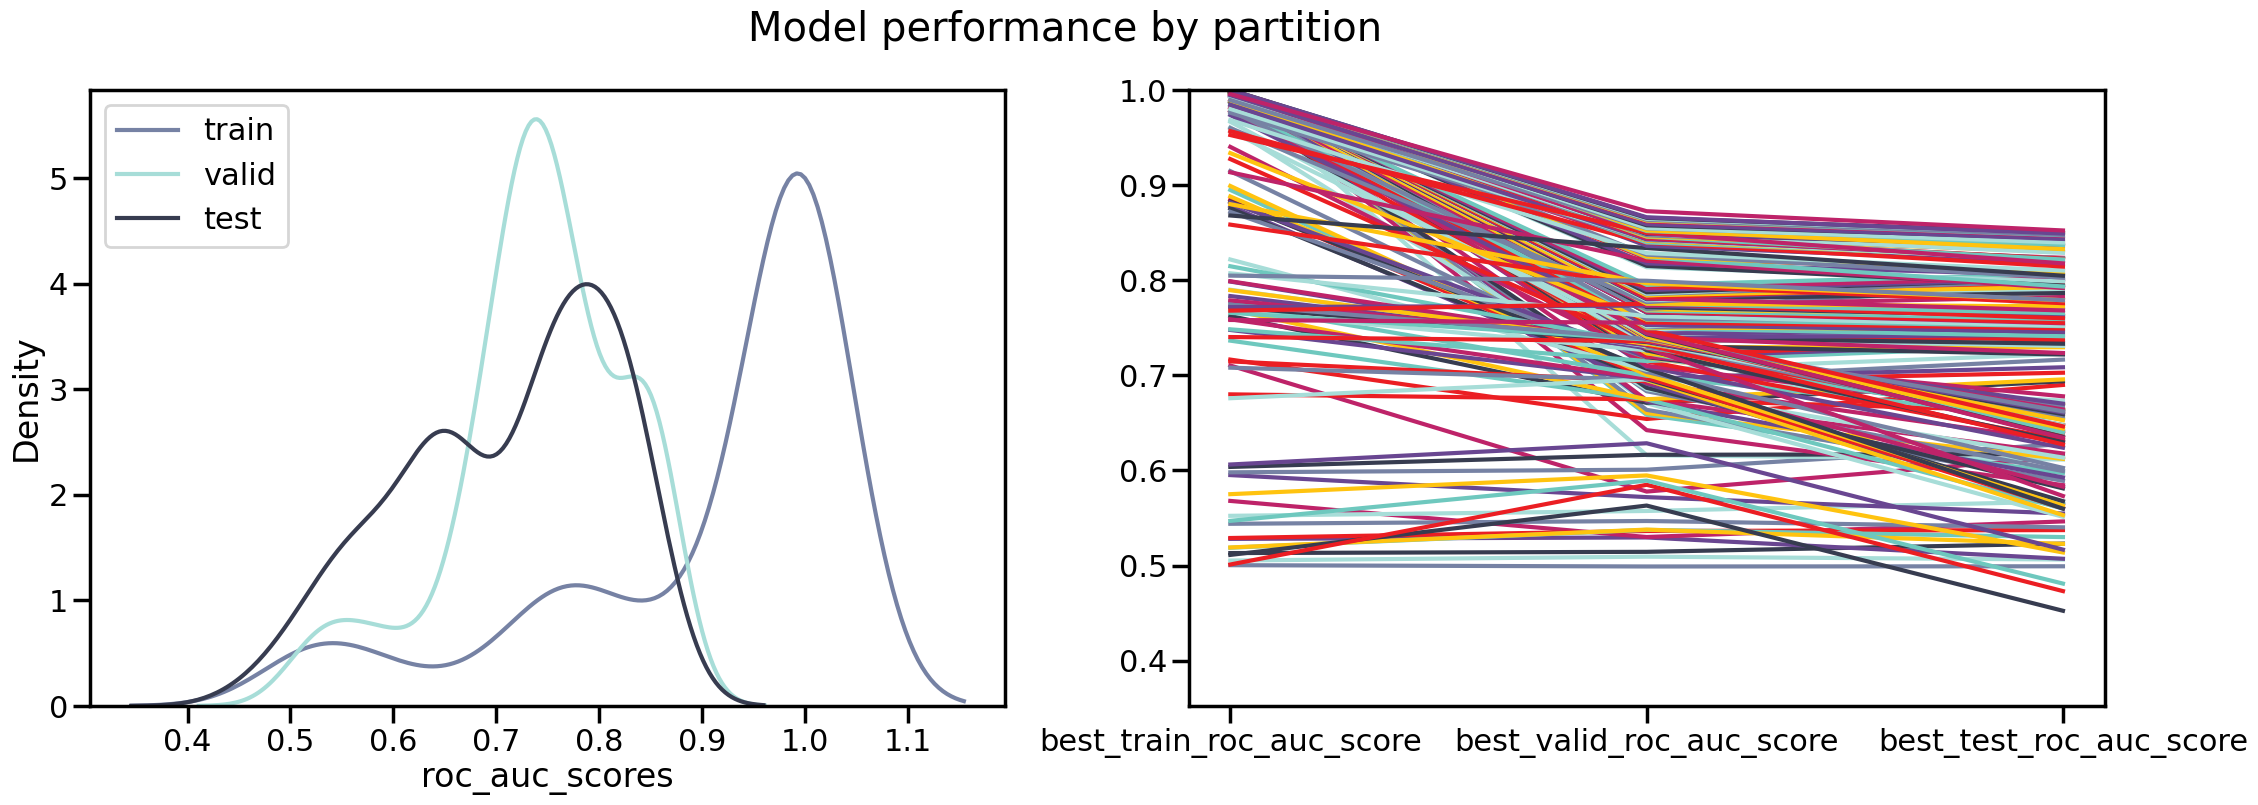

In [8]:
from atomsci.ddm.pipeline import hyper_perf_plots as hpp


hpp.plot_train_valid_test_scores(result_df_filtered, scoretype='roc_auc_score')

/home/jupyter/AMPL/atomsci/ddm/pipeline/hyper_perf_plots.py:288: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  g=sns.boxplot(x="features", y=selection_metric, # x="txptr_features" x="model_type"
/home/jupyter/AMPL/atomsci/ddm/pipeline/hyper_perf_plots.py:293: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels( g.get_xticklabels(), rotation=30, ha='right', rotation_mode='anchor' )
/home/jupyter/AMPL/atomsci/ddm/pipeline/hyper_perf_plots.py:288: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  g=sns.boxplot(x="features", y=selection_metric, # x="txptr_features" x="model_type"
/home/jupyter/AMPL/atomsci/ddm/pipeline/hyper_perf_plots.py:293: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels( g.get_xtick

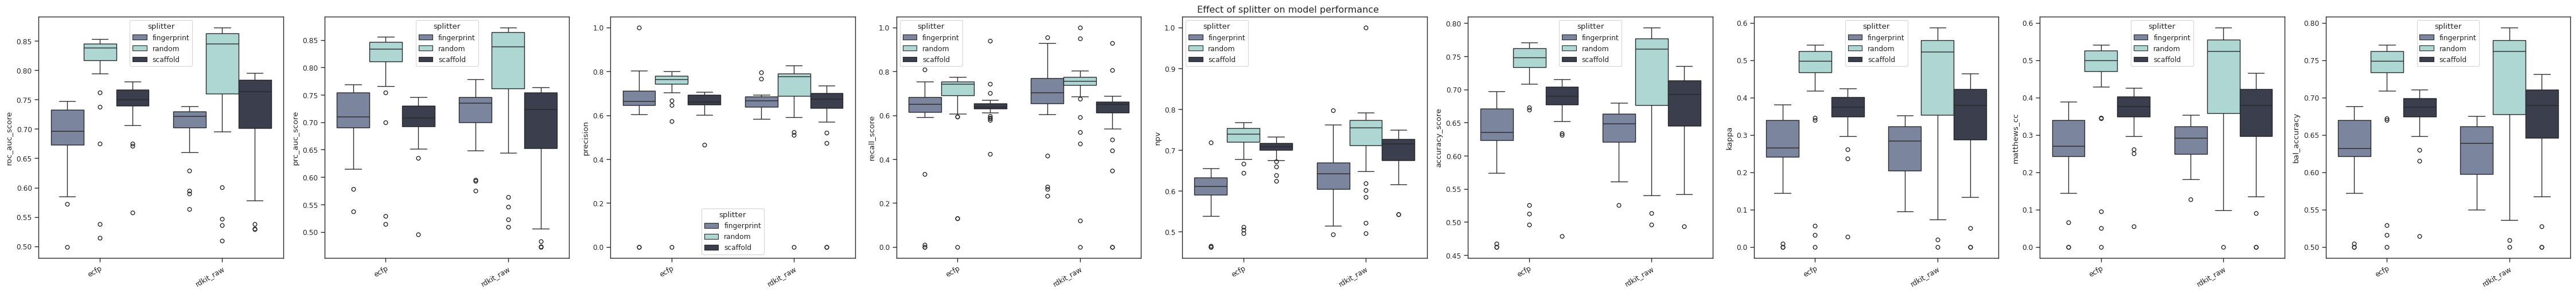

In [9]:
hpp.plot_split_perf(result_df_filtered, scoretype='roc_auc_score', subset='valid')

/home/jupyter/AMPL/atomsci/ddm/pipeline/hyper_perf_plots.py:232: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=feat1, y=winnertype, palette=sns.cubehelix_palette(len(plotdf2[feat1].unique()), rot=0, start=0.40), data=plotdf2,    ax=ax[0,0]); ax[0,0].tick_params(rotation=0);  ax[0,0].set_xlabel('NN dropouts')
/home/jupyter/AMPL/atomsci/ddm/pipeline/hyper_perf_plots.py:232: UserWarning: The palette list has more values (33) than needed (32), which may not be intended.
  sns.boxplot(x=feat1, y=winnertype, palette=sns.cubehelix_palette(len(plotdf2[feat1].unique()), rot=0, start=0.40), data=plotdf2,    ax=ax[0,0]); ax[0,0].tick_params(rotation=0);  ax[0,0].set_xlabel('NN dropouts')
/home/jupyter/AMPL/atomsci/ddm/pipeline/hyper_perf_plots.py:233: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in 

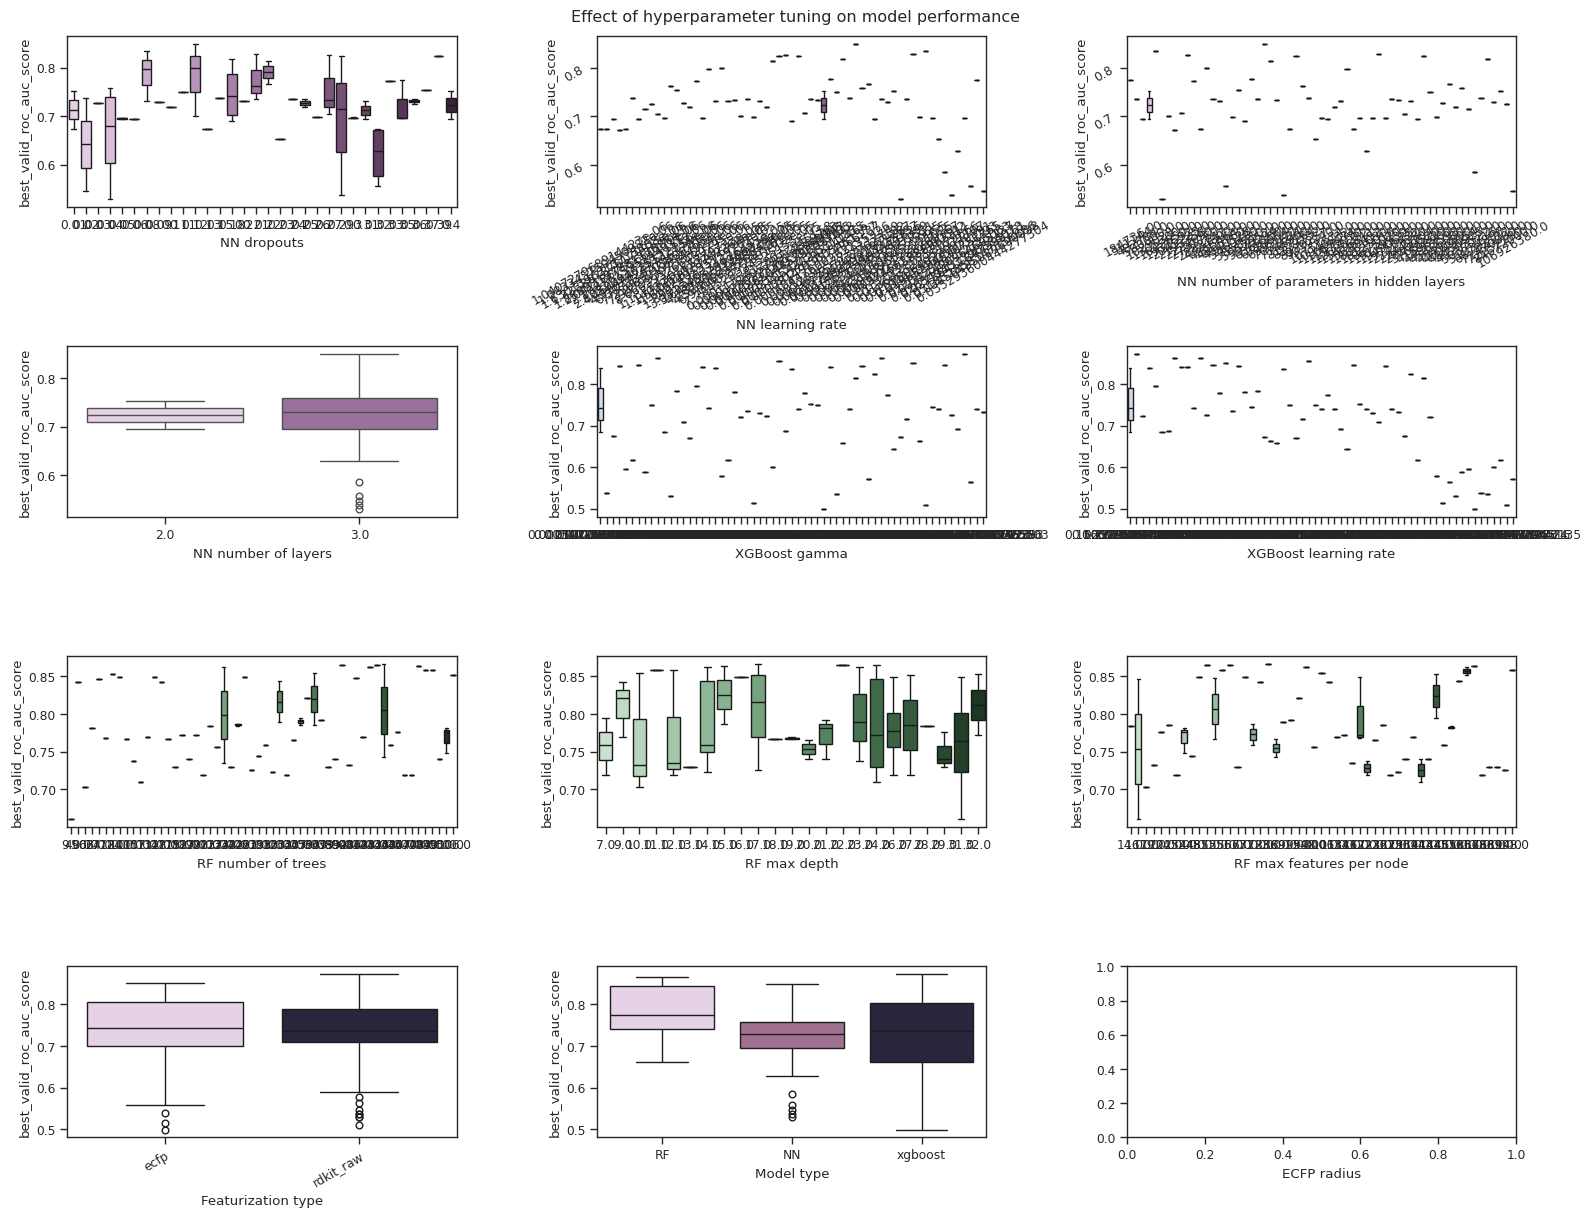

In [13]:
hpp.plot_rf_nn_xg_perf(result_df_filtered, scoretype = 'roc_auc_score', subset='valid')

In [17]:
hpp.get_score_types()

['roc_auc_score', 'prc_auc_score', 'precision', 'recall_score', 'npv', 'accuracy_score', 'kappa', 'matthews_cc', 'bal_accuracy']
['r2_score', 'mae_score', 'rms_score']


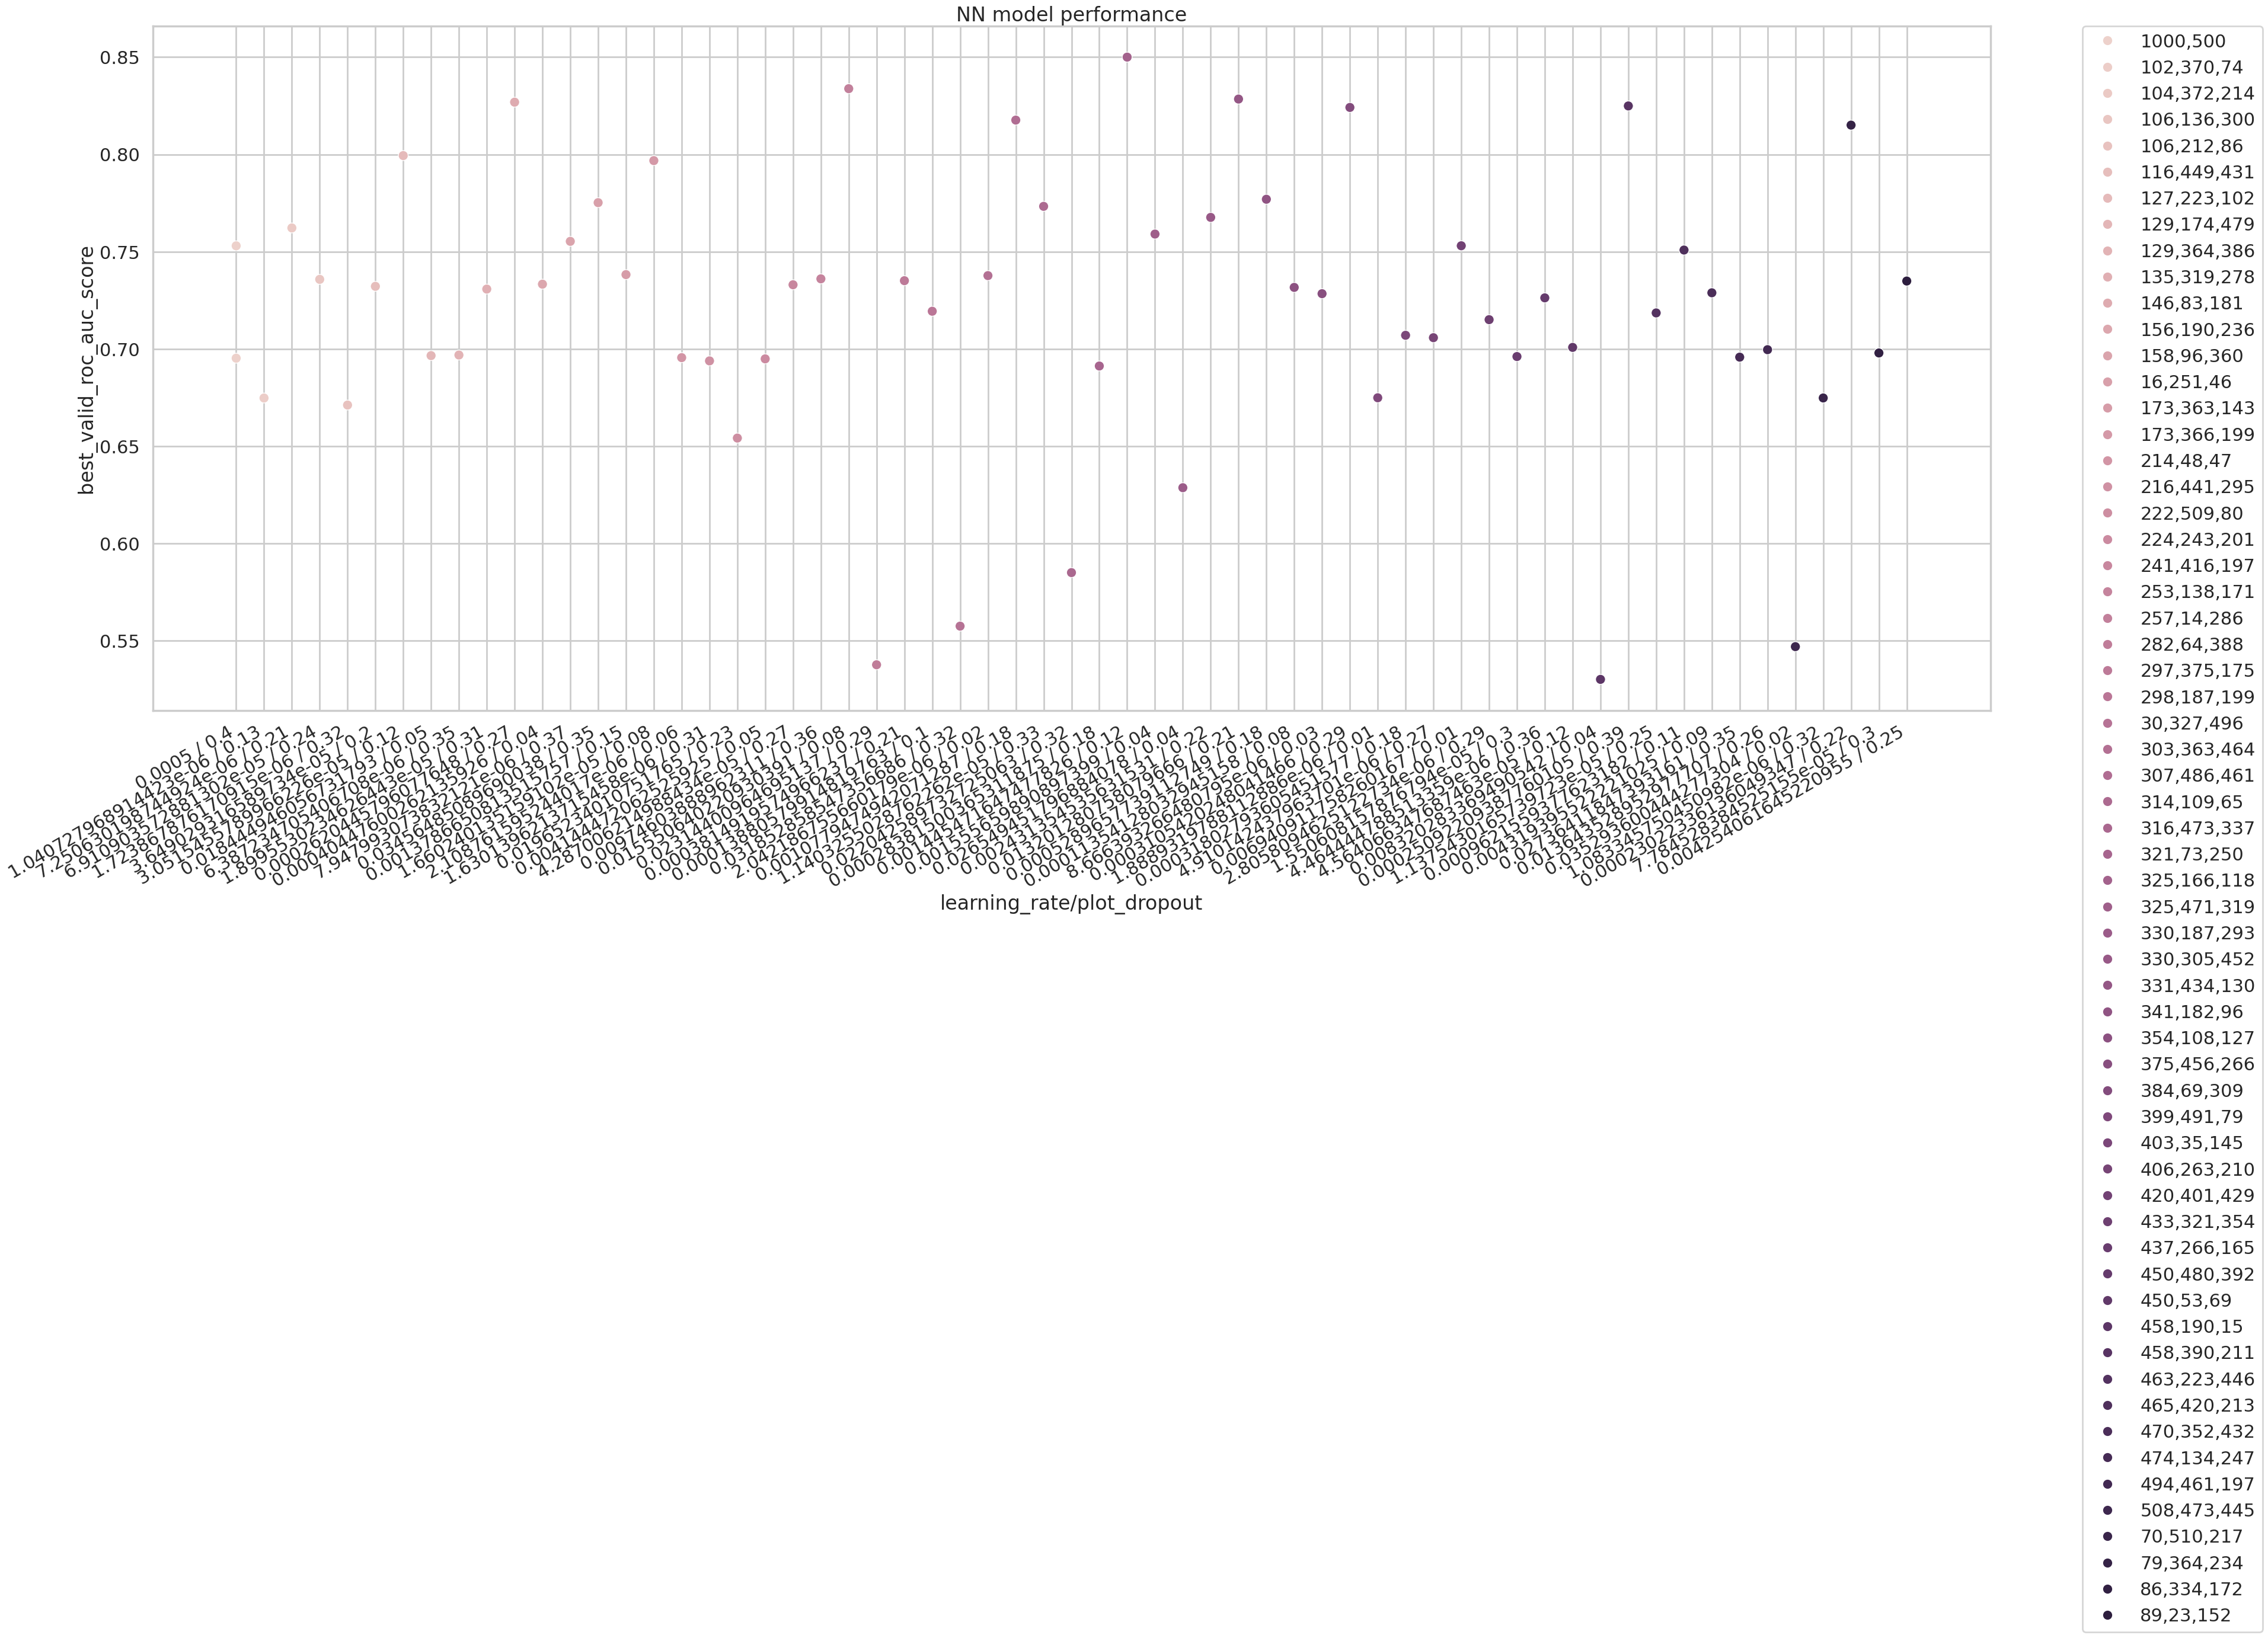

In [32]:
hpp.plot_nn_perf(result_df,scoretype='roc_auc_score',subset='valid')

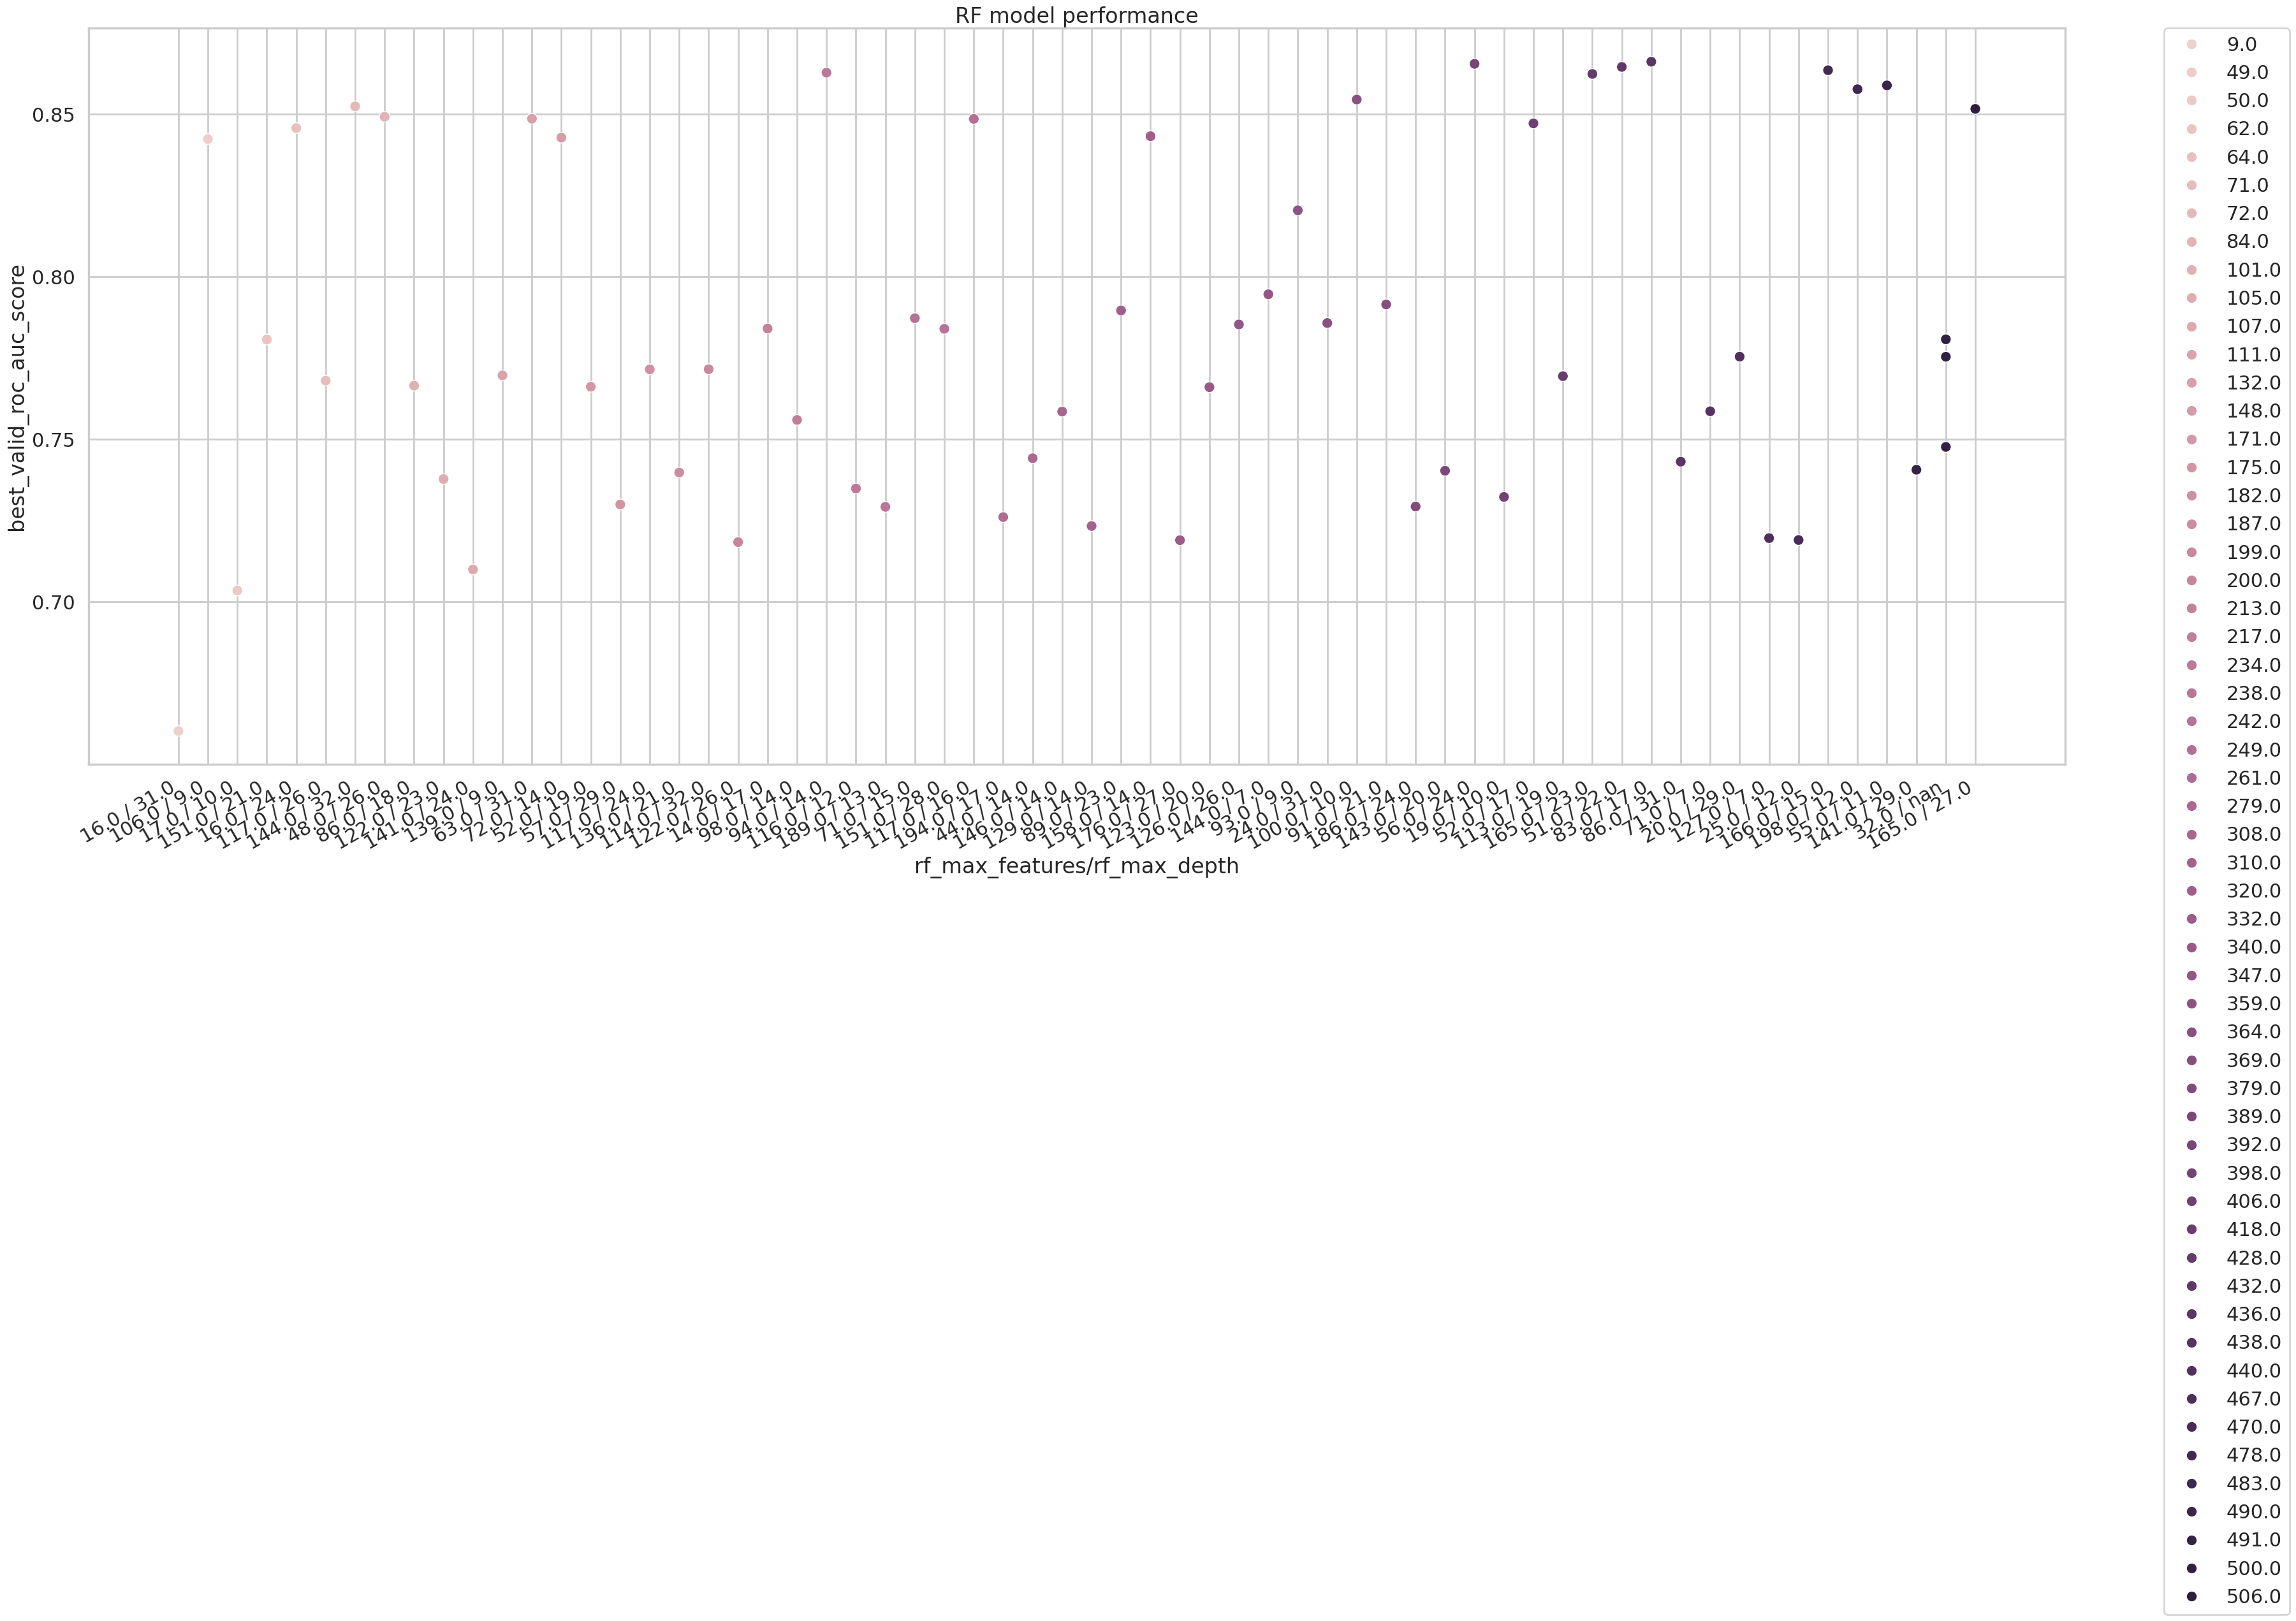

In [34]:
hpp.plot_rf_perf(result_df,scoretype='roc_auc_score',subset='valid')

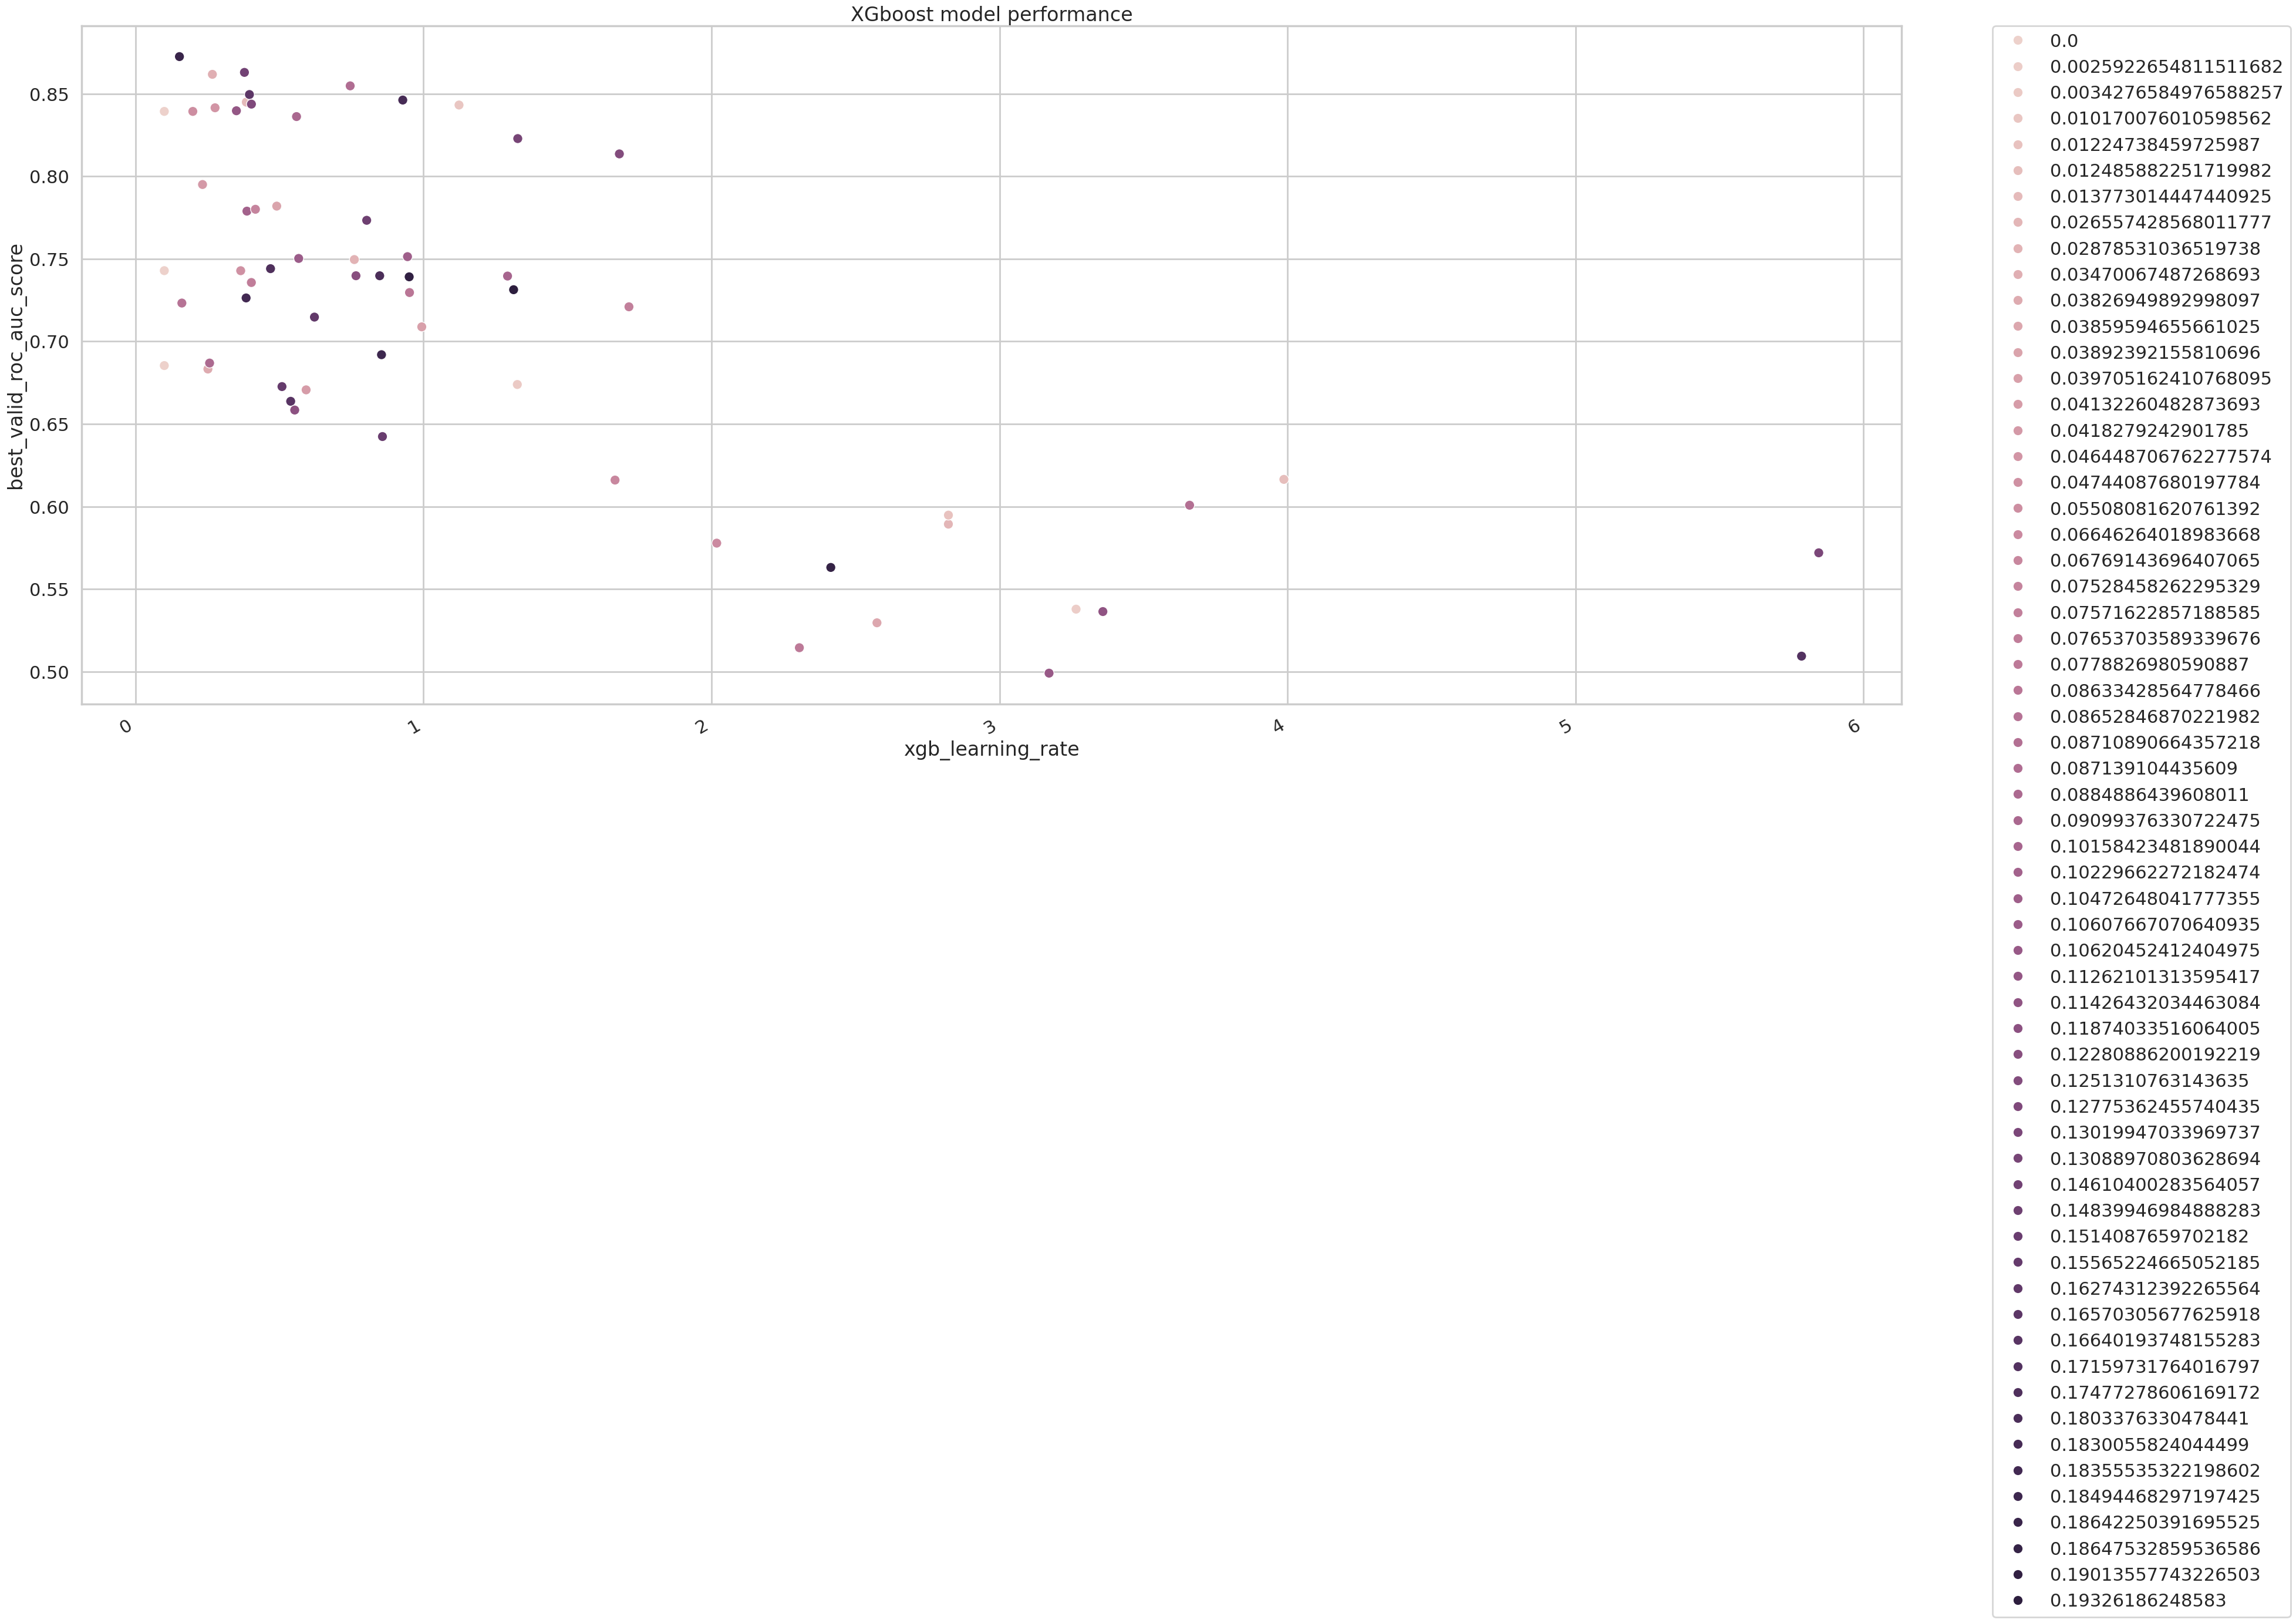

In [35]:
hpp.plot_xg_perf(result_df,scoretype='roc_auc_score',subset='valid')

/home/jupyter/AMPL/atomsci/ddm/pipeline/hyper_perf_plots.py:288: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  g=sns.boxplot(x="features", y=selection_metric, # x="txptr_features" x="model_type"
/home/jupyter/AMPL/atomsci/ddm/pipeline/hyper_perf_plots.py:293: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels( g.get_xticklabels(), rotation=30, ha='right', rotation_mode='anchor' )
/home/jupyter/AMPL/atomsci/ddm/pipeline/hyper_perf_plots.py:288: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  g=sns.boxplot(x="features", y=selection_metric, # x="txptr_features" x="model_type"
/home/jupyter/AMPL/atomsci/ddm/pipeline/hyper_perf_plots.py:293: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels( g.get_xtick

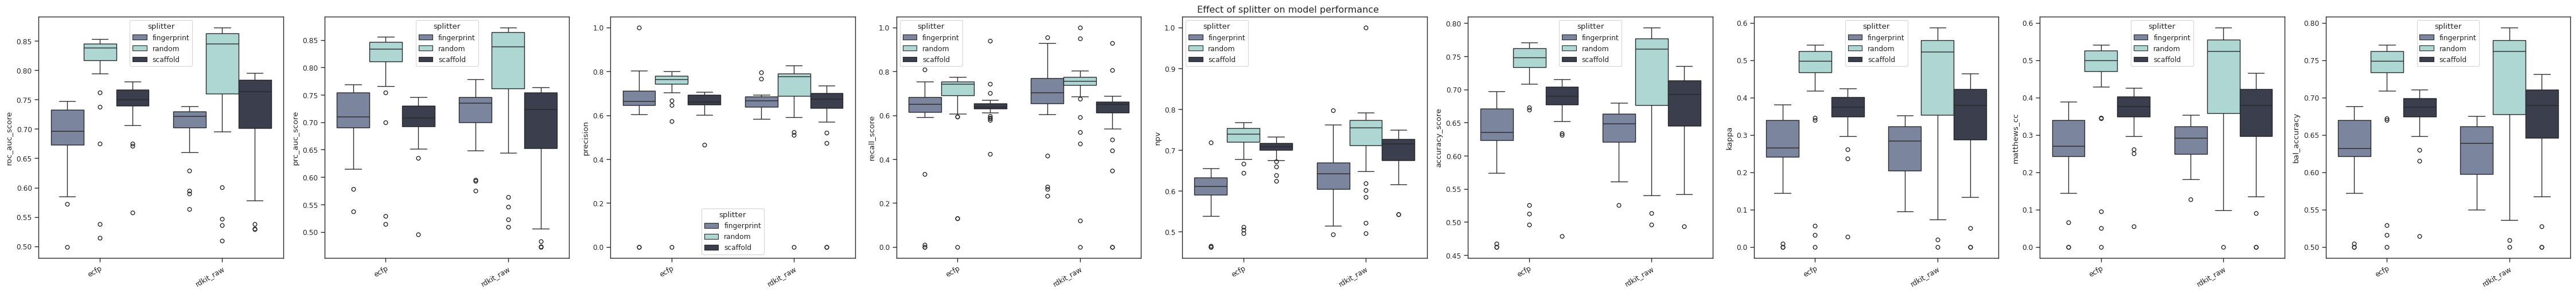

In [36]:
hpp.plot_split_perf(result_df,scoretype='roc_auc_score',subset='valid')

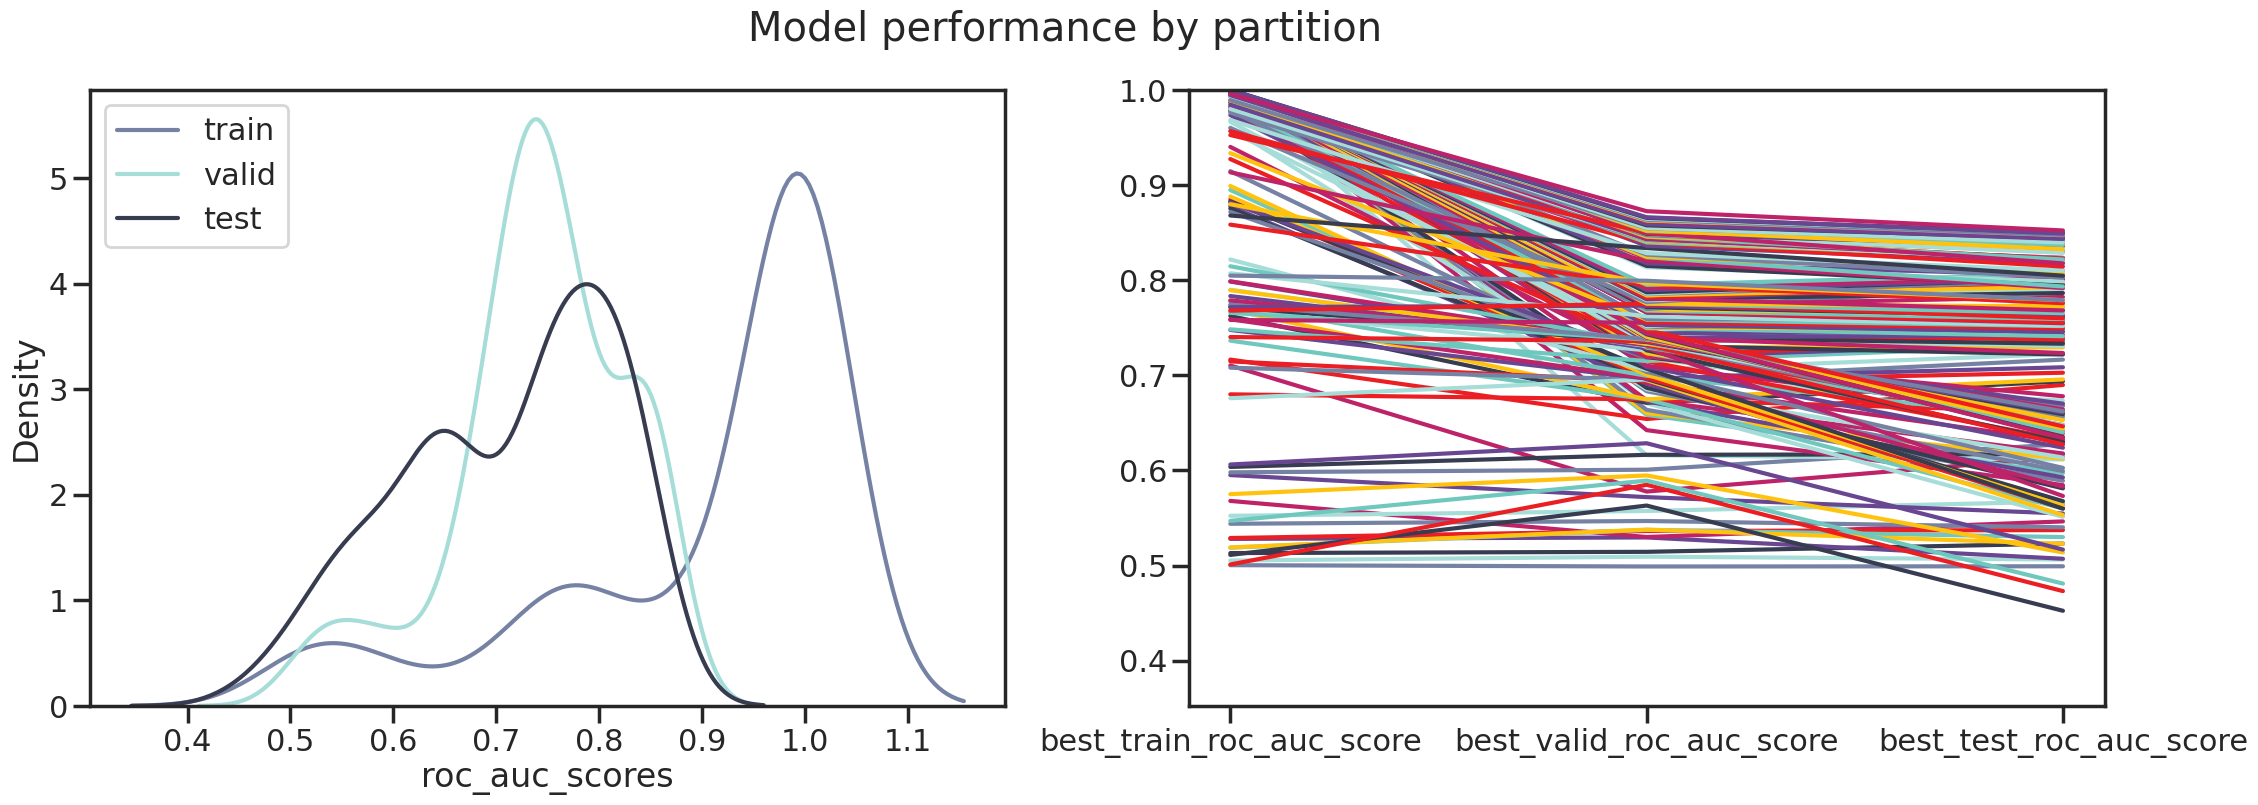

In [37]:
hpp.plot_train_valid_test_scores(result_df,scoretype='roc_auc_score')

/home/jupyter/AMPL/atomsci/ddm/pipeline/hyper_perf_plots.py:288: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  g=sns.boxplot(x="features", y=selection_metric, # x="txptr_features" x="model_type"
/home/jupyter/AMPL/atomsci/ddm/pipeline/hyper_perf_plots.py:293: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels( g.get_xticklabels(), rotation=30, ha='right', rotation_mode='anchor' )
/home/jupyter/AMPL/atomsci/ddm/pipeline/hyper_perf_plots.py:288: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  g=sns.boxplot(x="features", y=selection_metric, # x="txptr_features" x="model_type"
/home/jupyter/AMPL/atomsci/ddm/pipeline/hyper_perf_plots.py:293: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels( g.get_xtick

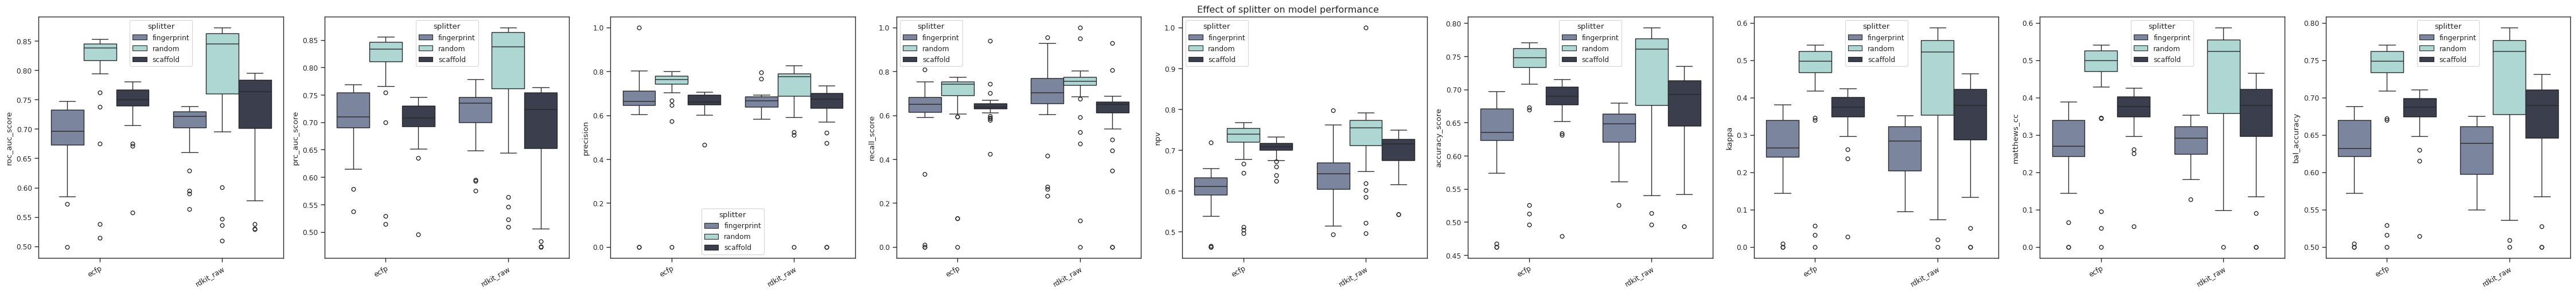

In [39]:
hpp.plot_split_perf(result_df,scoretype='roc_auc_score')

In [41]:
hpp._prep_perf_df(result_df)

model_uuid  \
146  51d232f4-5c52-4b7e-a7e0-922504cbba8b   
180  6e72b866-c48c-42f6-adbf-992de82c654a   
187  2543ccf6-0d4c-41a6-a4d5-123111a91970   
183  2e35f56a-341a-485a-a27e-be87cb3c81bc   
185  a99cfa4e-2caf-43cd-9c7e-5055a715ea77   
..                                    ...   
13   e7825c5e-f2ce-4e20-a972-552fabb50c2c   
80   568819ab-e9c4-4222-b2bb-bb2764414af2   
60   f439618a-6100-424b-b5d1-9a1c2e8bae58   
139  3dc8819e-829e-40c5-84dc-0c94c676c14e   
151  a7c95957-d4a1-44de-bb45-58ba910c277f   

                                            model_path ampl_version  \
146  /home/jupyter/hERG_Analysis/Models/herg_chembl...        1.6.0   
180  /home/jupyter/hERG_Analysis/Models/herg_chembl...        1.6.0   
187  /home/jupyter/hERG_Analysis/Models/herg_chembl...        1.6.0   
183  /home/jupyter/hERG_Analysis/Models/herg_chembl...        1.6.0   
185  /home/jupyter/hERG_Analysis/Models/herg_chembl...        1.6.0   
..                                                 ...          ...   
13   /home/jupyter/hERG_Analysis/Models/herg_chembl...        1.6.0   
80   /home/jupyter/hERG_Analysis/Models/herg_chembl...        1.6.0   
60   /home/jupyter/hERG_Analysis/Models/herg_chembl...        1.6.0   
139  /home/jupyter/hERG_Analysis/Models/herg_chembl...        1.6.0   
151  /home/jupyter/hERG_Analysis/Models/herg_chembl...        1.6.0   

    model_type                                        dataset_key   features  \
146    xgboost  /home/jupyter/hERG_Analysis/herg_chembl_curate...  rdkit_raw   
180         RF  /home/jupyter/hERG_Analysis/herg_chembl_curate...  rdkit_raw   
187         RF  /home/jupyter/hERG_Analysis/herg_chembl_curate...  rdkit_raw   
183         RF  /home/jupyter/hERG_Analysis/herg_chembl_curate...  rdkit_raw   
185         RF  /home/jupyter/hERG_Analysis/herg_chembl_curate...  rdkit_raw   
..         ...                                                ...        ...   
13          NN  /home/jupyter/hERG_Analysis/herg_chembl_curate...  rdkit_raw   
80     xgboost  /home/jupyter/hERG_Analysis/herg_chembl_curate...  rdkit_raw   
60     xgboost  /home/jupyter/hERG_Analysis/herg_chembl_curate...       ecfp   
139    xgboost  /home/jupyter/hERG_Analysis/herg_chembl_curate...  rdkit_raw   
151    xgboost  /home/jupyter/hERG_Analysis/herg_chembl_curate...       ecfp   

        splitter    split_strategy model_score_type feature_transform_type  \
146       random  train_valid_test          roc_auc          normalization   
180       random  train_valid_test          roc_auc          normalization   
187       random  train_valid_test          roc_auc          normalization   
183       random  train_valid_test          roc_auc          normalization   
185       random  train_valid_test          roc_auc          normalization   
..           ...               ...              ...                    ...   
13      scaffold  train_valid_test          roc_auc          normalization   
80      scaffold  train_valid_test          roc_auc          normalization   
60        random  train_valid_test          roc_auc          normalization   
139       random  train_valid_test          roc_auc          normalization   
151  fingerprint  train_valid_test          roc_auc          normalization   

     ...  xgb_max_depth  xgb_colsample_bytree  xgb_subsample  \
146  ...            6.0                   1.0            1.0   
180  ...            NaN                   NaN            NaN   
187  ...            NaN                   NaN            NaN   
183  ...            NaN                   NaN            NaN   
185  ...            NaN                   NaN            NaN   
..   ...            ...                   ...            ...   
13   ...            NaN                   NaN            NaN   
80   ...            6.0                   1.0            1.0   
60   ...            6.0                   1.0            1.0   
139  ...            6.0                   1.0            1.0   
151  ...            6.0            

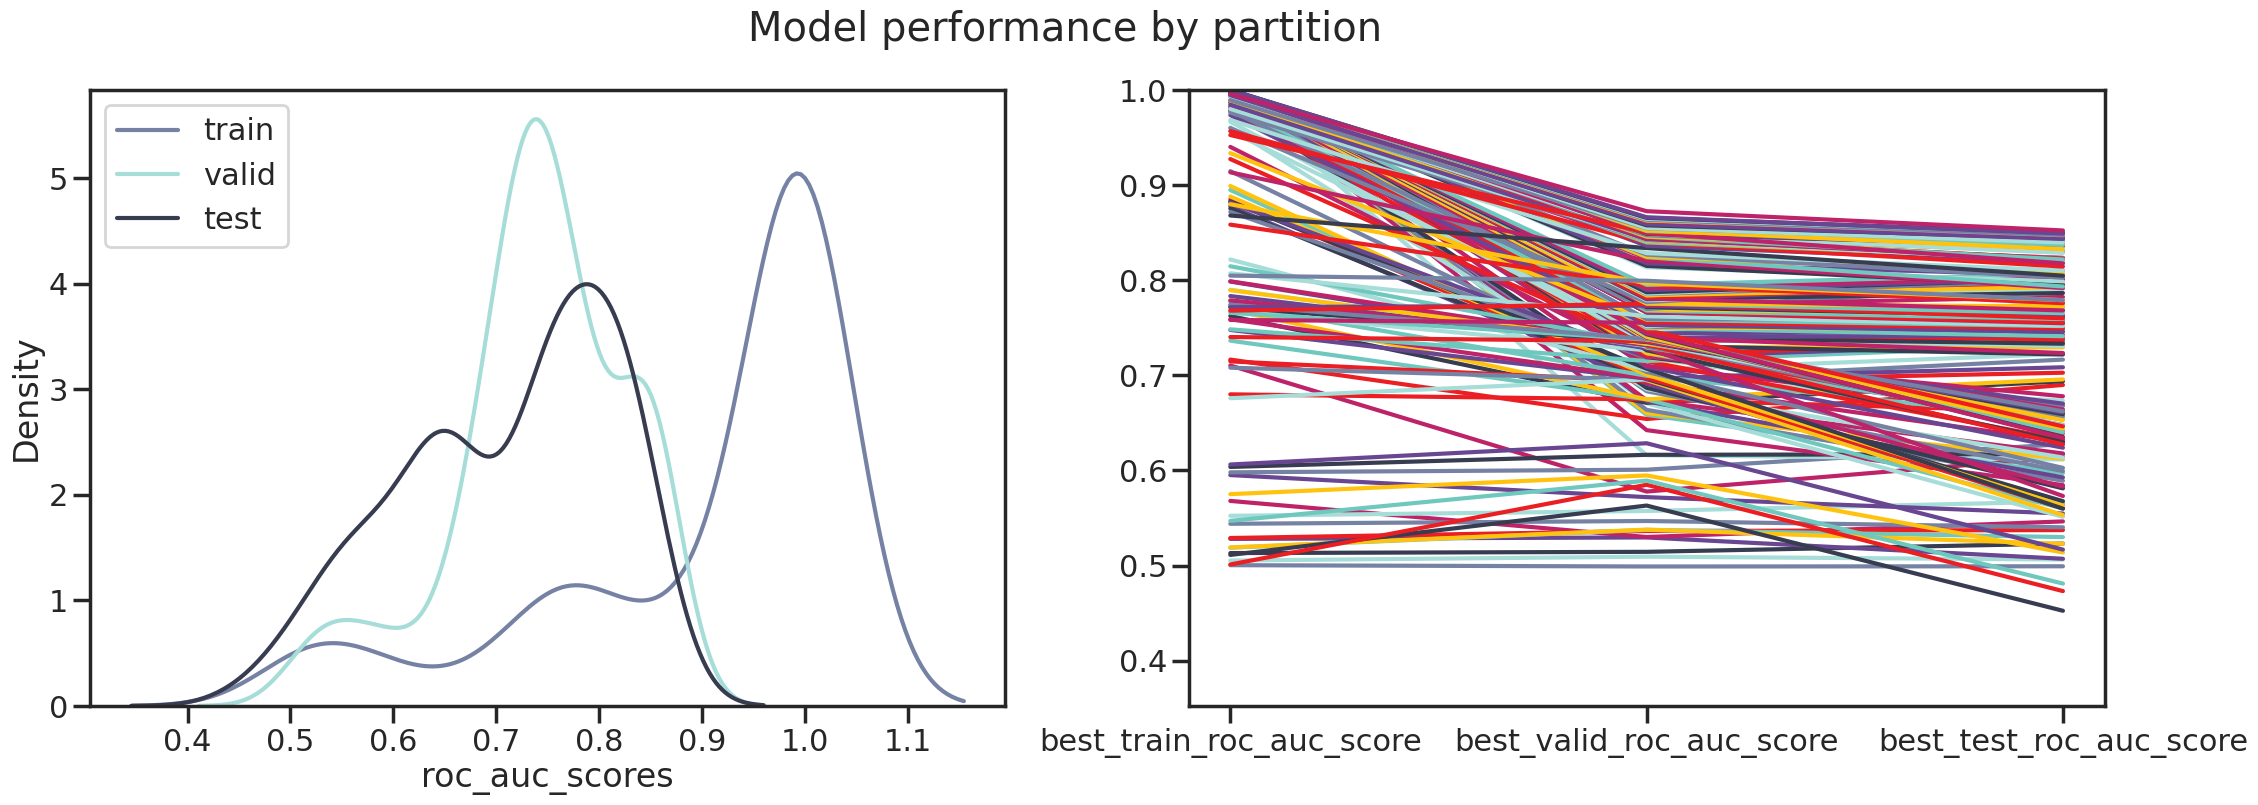

In [42]:
hpp.plot_train_valid_test_scores(result_df,scoretype='roc_auc_score')

In [43]:
# Group data based on random, scaffold, fingerprint 

# Split the DataFrame into three separate DataFrames based on the 'Splitter' column
dfs = {}
for splitter, group in result_df.groupby('splitter'):
    dfs[splitter] = group

# Access the individual DataFrames
random_df = dfs.get('random', pd.DataFrame())
scaffold_df = dfs.get('scaffold', pd.DataFrame())
fingerprint_df = dfs.get('fingerprint', pd.DataFrame())
random_df
scaffold_df
fingerprint_df

model_uuid  \
88   87273377-c53f-4210-a1a0-5ae7dda4fbaf   
86   c9c4f333-94e3-406d-8651-2d96de2dcd29   
85   eb5a9159-0b0e-4934-afae-d4c20f8713bc   
90   a2b533bb-f0dc-49c0-8b84-7d412b4a3e6c   
84   bcb14714-b0ed-42d6-929d-0b6b3804027c   
..                                    ...   
118  30fadd15-1427-439f-915c-c2c55002f2fd   
2    544923c7-d4c6-409a-84a6-169c48550c0a   
150  8522e35f-2c11-4d7f-8dae-65c8de7f9118   
124  60887183-3a5d-41b0-b9b8-d5892e723dc2   
151  a7c95957-d4a1-44de-bb45-58ba910c277f   

                                            model_path ampl_version  \
88   /home/jupyter/hERG_Analysis/Models/herg_chembl...        1.6.0   
86   /home/jupyter/hERG_Analysis/Models/herg_chembl...        1.6.0   
85   /home/jupyter/hERG_Analysis/Models/herg_chembl...        1.6.0   
90   /home/jupyter/hERG_Analysis/Models/herg_chembl...        1.6.0   
84   /home/jupyter/hERG_Analysis/Models/herg_chembl...        1.6.0   
..                                                 ...          ...   
118  /home/jupyter/hERG_Analysis/Models/herg_chembl...        1.6.0   
2    /home/jupyter/hERG_Analysis/Models/herg_chembl...        1.6.0   
150  /home/jupyter/hERG_Analysis/Models/herg_chembl...        1.6.0   
124  /home/jupyter/hERG_Analysis/Models/herg_chembl...        1.6.0   
151  /home/jupyter/hERG_Analysis/Models/herg_chembl...        1.6.0   

    model_type                                        dataset_key   features  \
88          RF  /home/jupyter/hERG_Analysis/herg_chembl_curate...       ecfp   
86          RF  /home/jupyter/hERG_Analysis/herg_chembl_curate...       ecfp   
85          RF  /home/jupyter/hERG_Analysis/herg_chembl_curate...       ecfp   
90          RF  /home/jupyter/hERG_Analysis/herg_chembl_curate...       ecfp   
84          RF  /home/jupyter/hERG_Analysis/herg_chembl_curate...       ecfp   
..         ...                                                ...        ...   
118    xgboost  /home/jupyter/hERG_Analysis/herg_chembl_curate...  rdkit_raw   
2           NN  /home/jupyter/hERG_Analysis/herg_chembl_curate...       ecfp   
150    xgboost  /home/jupyter/hERG_Analysis/herg_chembl_curate...       ecfp   
124    xgboost  /home/jupyter/hERG_Analysis/herg_chembl_curate...  rdkit_raw   
151    xgboost  /home/jupyter/hERG_Analysis/herg_chembl_curate...       ecfp   

        splitter    split_strategy model_score_type feature_transform_type  \
88   fingerprint  train_valid_test          roc_auc          normalization   
86   fingerprint  train_valid_test          roc_auc          normalization   
85   fingerprint  train_valid_test          roc_auc          normalization   
90   fingerprint  train_valid_test          roc_auc          normalization   
84   fingerprint  train_valid_test          roc_auc          normalization   
..           ...               ...              ...                    ...   
118  fingerprint  train_valid_test          roc_auc          normalization   
2    fingerprint  train_valid_test          roc_auc          normalization   
150  fingerprint  train_valid_test          roc_auc          normalization   
124  fingerprint  train_valid_test          roc_auc          normalization   
151  fingerprint  train_valid_test          roc_auc          normalization   

     ...  rf_max_depth  xgb_gamma  xgb_learning_rate  xgb_max_depth  \
88   ...           NaN        NaN                NaN            NaN   
86   ...          14.0        NaN                NaN            NaN   
85   ...          31.0        NaN                NaN            NaN   
90   ...          29.0        NaN                NaN            NaN   
84   ...          20.0        NaN                NaN            NaN   
..   ...           ...        ...                ...            ...   
118  ...           NaN   0.026557           2.822443            6.0   
2    ...           NaN        NaN                NaN            NaN   
150  ...           NaN   0.130199           5.844399            6.0   
124  ...           NaN   0.18

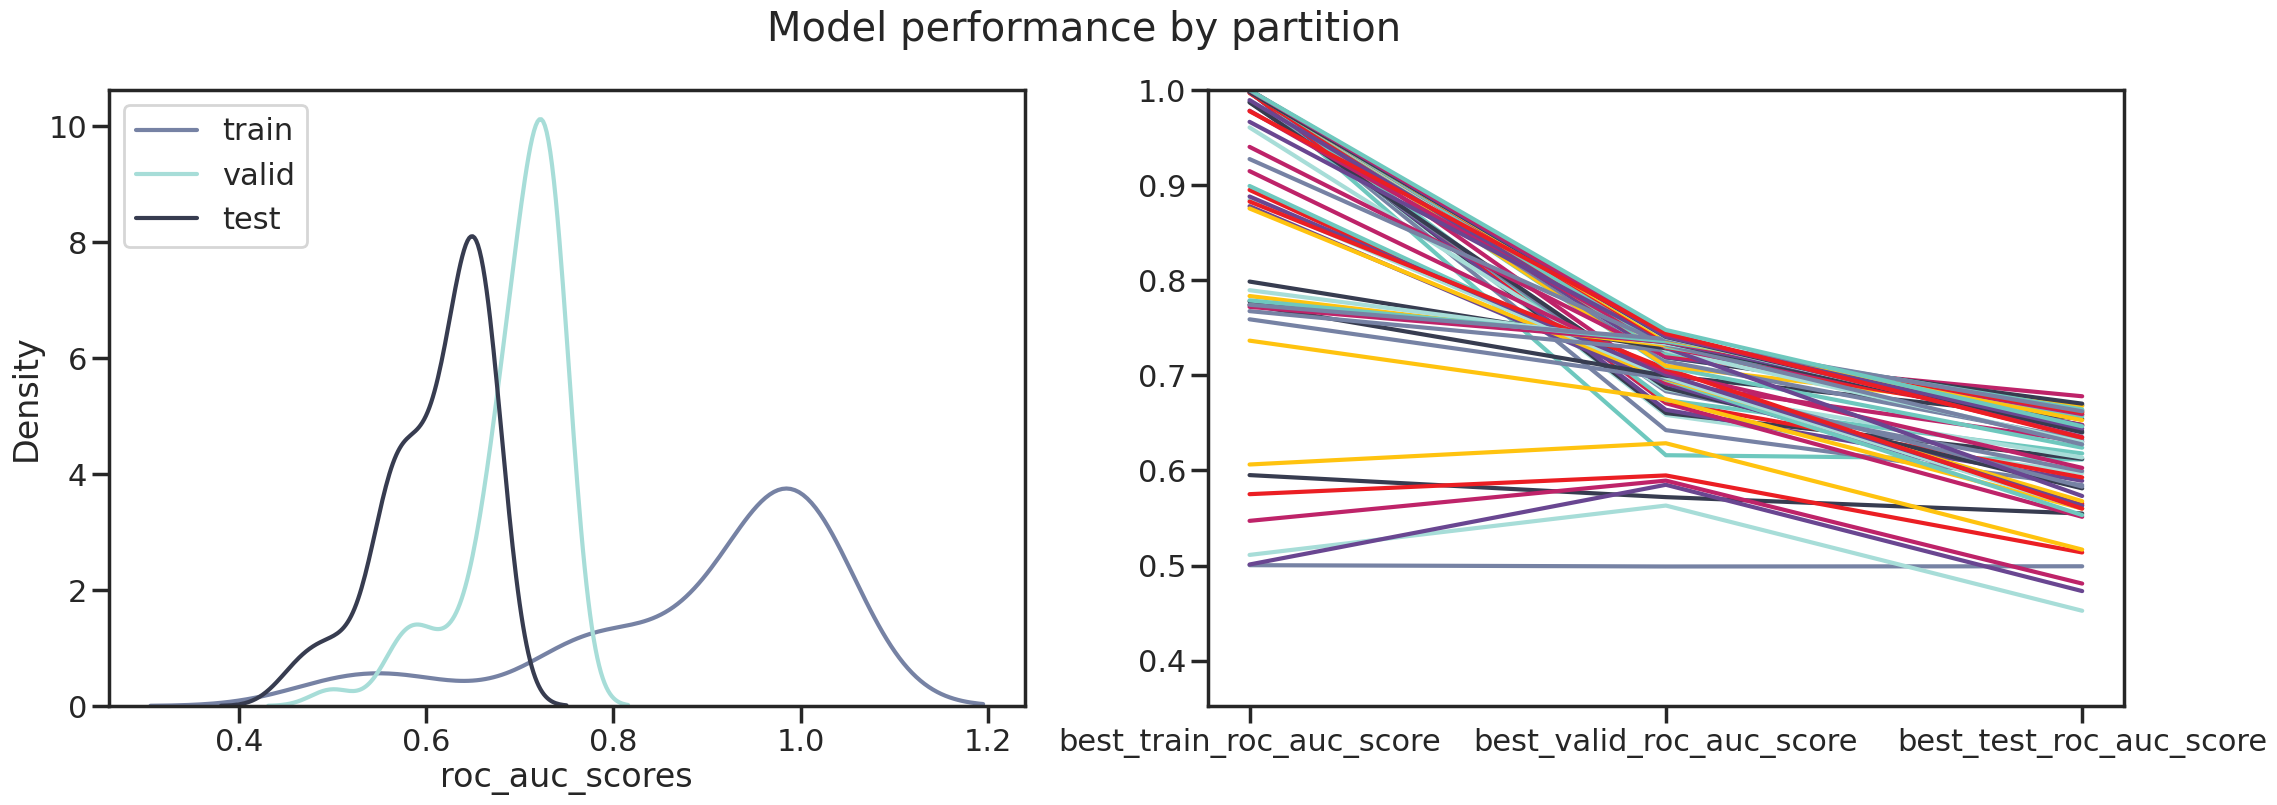

In [44]:
hpp.plot_train_valid_test_scores(fingerprint_df,scoretype='roc_auc_score')

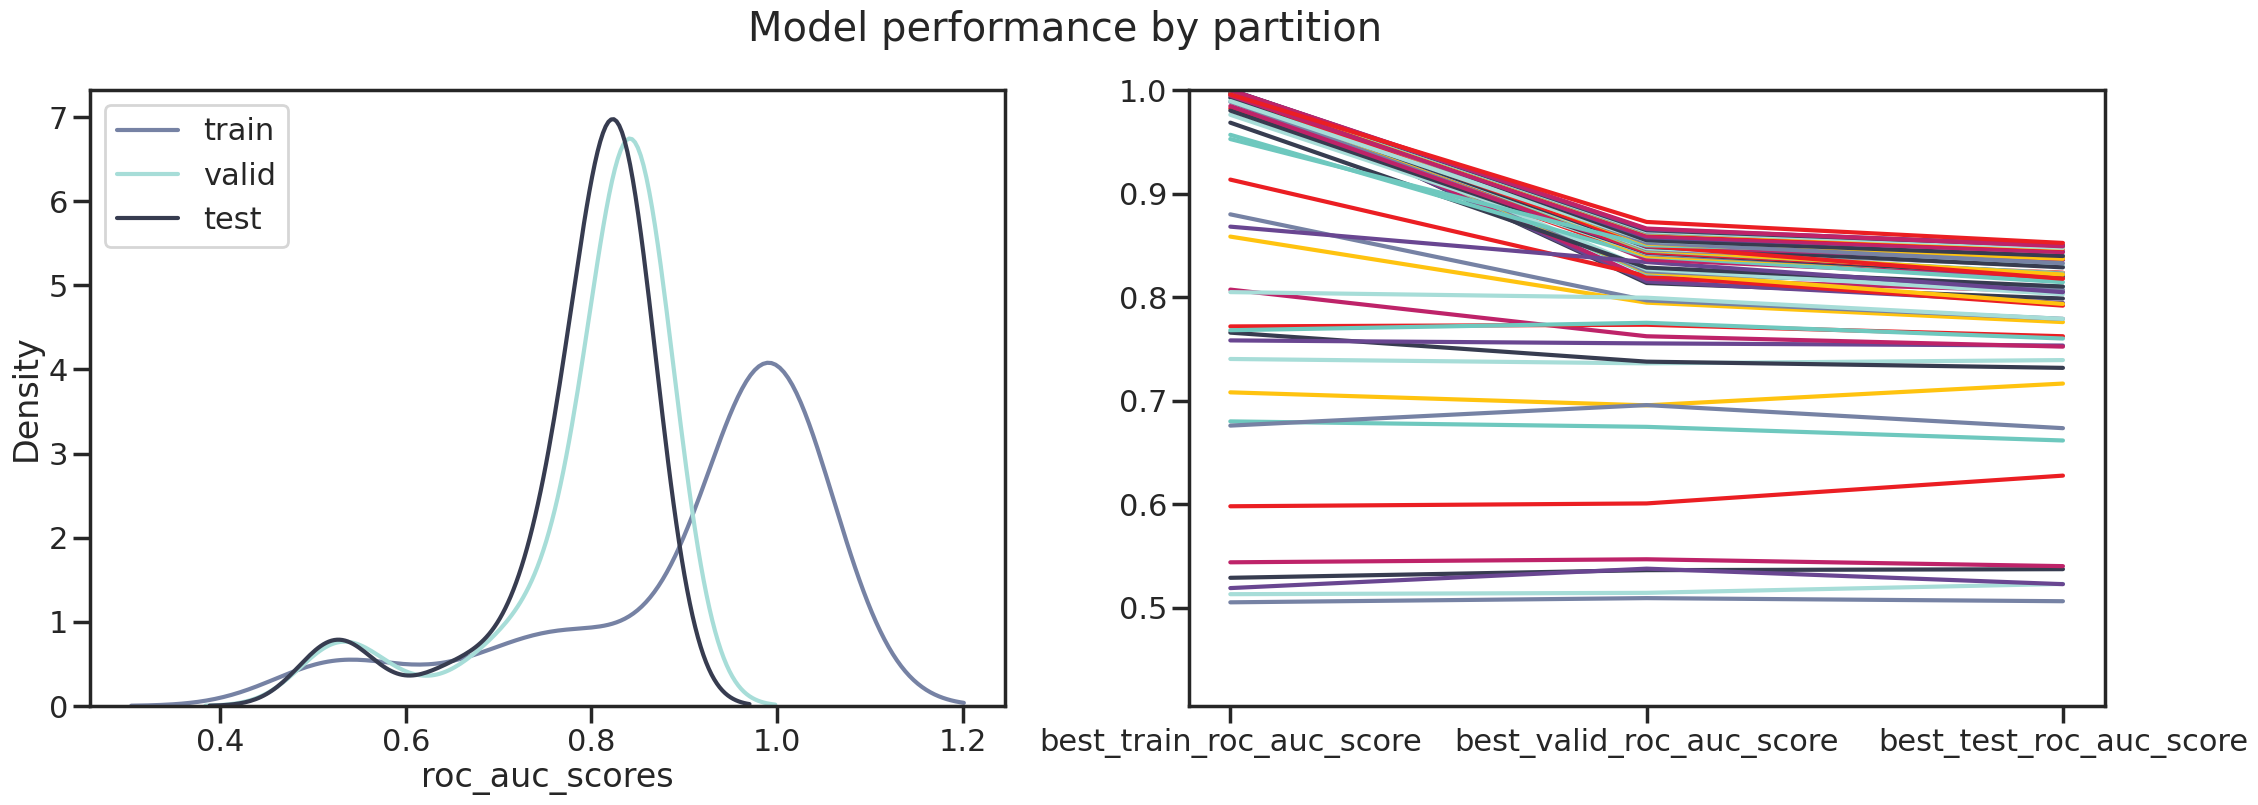

In [45]:
hpp.plot_train_valid_test_scores(random_df,scoretype='roc_auc_score')

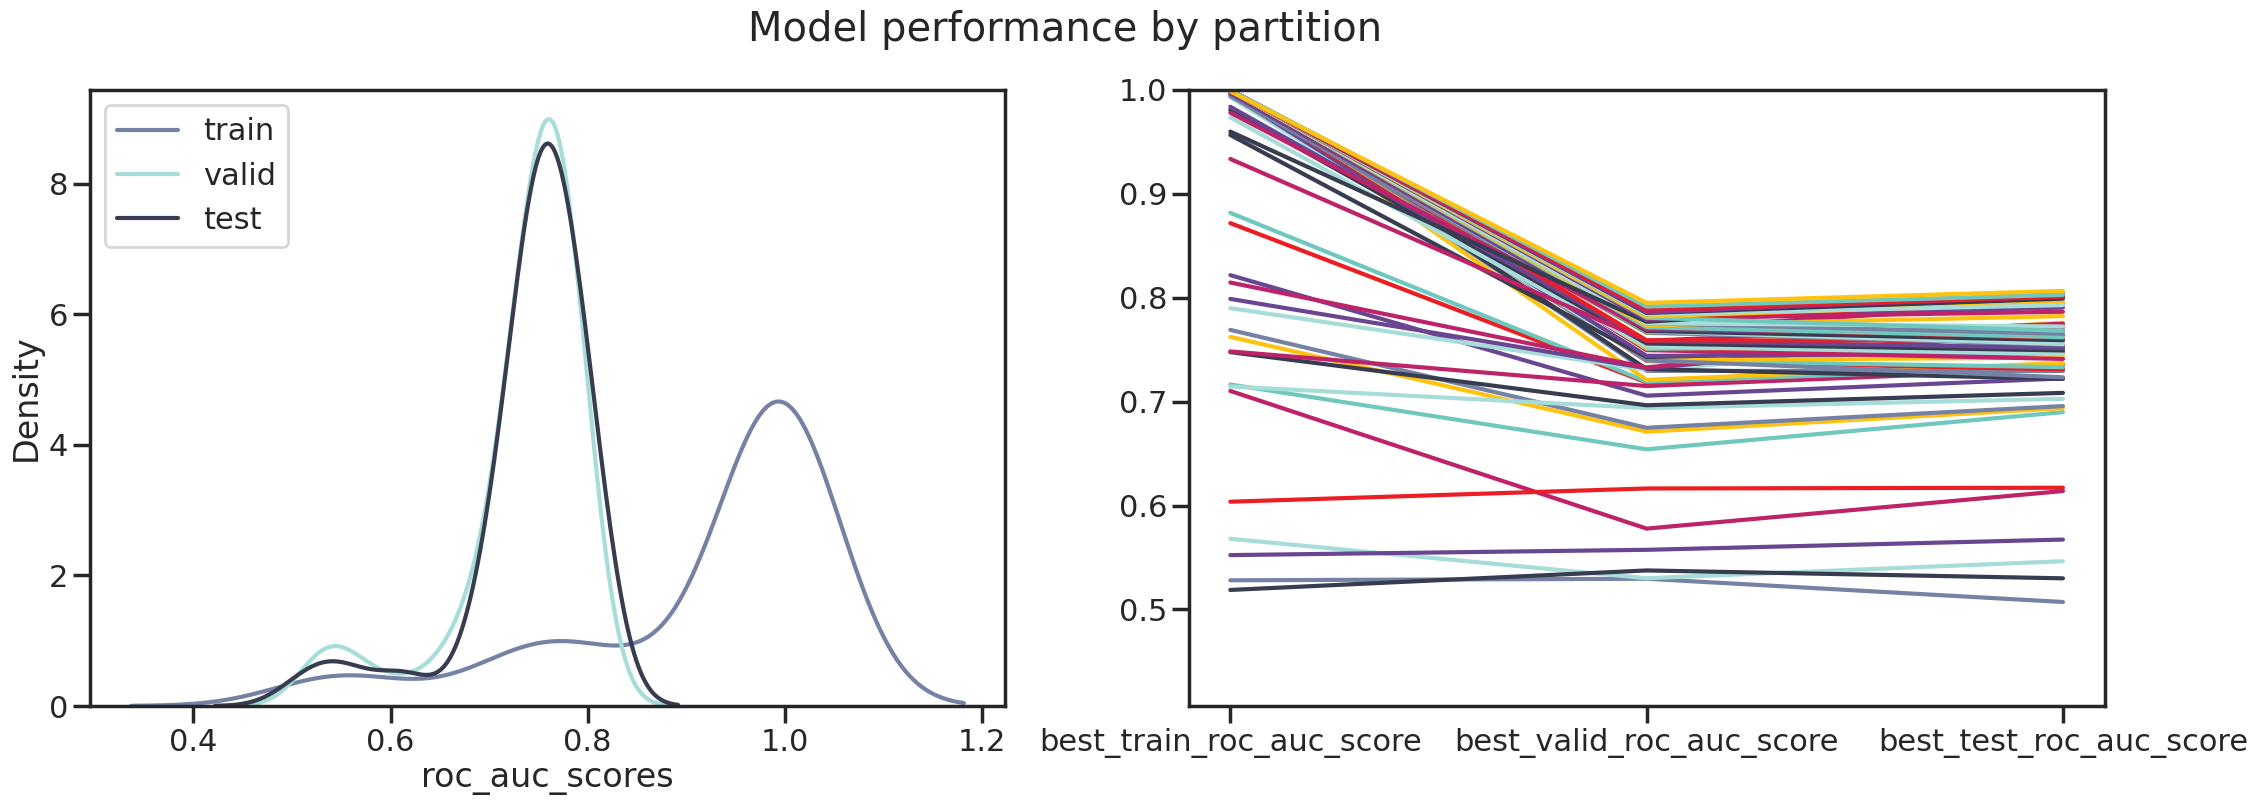

In [46]:
hpp.plot_train_valid_test_scores(scaffold_df,scoretype='roc_auc_score')